In [2]:
from modAL.models import ActiveLearner
from modAL.models import Committee
from modAL.uncertainty import classifier_uncertainty
from modAL.uncertainty import entropy_sampling, uncertainty_sampling, margin_sampling
from modAL.disagreement import vote_entropy
from modAL.disagreement import KL_max_disagreement
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import datasets
import numpy as np
import pandas as pd

## Data Loading

In [4]:
data = pd.read_csv('Data/pendigits.tra').to_numpy()
x = data[:,:16]
y = data[:,16]

## Stream Based Sampling with Uncertainity

In [14]:
def active_single_stream_based(x_pre,y_pre,query_strategy): 
    accuracy_list = []
    num_queried = 0
    num_ignored = 0
    
    #initial 10 percent points
    idx_10_percent = np.random.choice(range(x_pre.shape[0]),size=int(0.1*x_pre.shape[0]),replace=False)
    x_10 = x_pre[idx_10_percent]
    y_10 = y_pre[idx_10_percent]
    
    #initial_learning
    learner = ActiveLearner(estimator=LogisticRegression(),X_training=x_10,y_training=y_10,query_strategy=query_strategy)
    
    while learner.score(x_pre, y_pre) < 0.96:

          #choose a point randomly to check - simulate a stream
        point = np.random.choice(range(len(x_pre)))
        if classifier_uncertainty(learner, x_pre[point].reshape(1, -1)) >= 0.3:

         #learning again after every query; might avoid it if the trainnig is time consuming
            learner.teach(x_pre[point].reshape(1, -1), y_pre[point].reshape(-1, ))
            updated_acc = learner.score(x_pre, y_pre)
            accuracy_list.append(updated_acc)
            num_queried += 1
            print(f"Point updated: {point}; Accuracy achieved: {updated_acc}")

        else:
            num_ignored += 1
            print(f"Ignored this point from labelling: {point}") 
    return accuracy_list, num_queried, num_ignored

## Stream Based Sampling QBC

In [18]:
def active_committee_stream_based(x_pre,y_pre,n_committee,query_strategy):
    accuracy_list = []
    num_queried = 0
    num_ignored = 0
    
    #initial 10 percent points
    idx_10_percent = np.random.choice(range(x_pre.shape[0]),size=int(0.1*x_pre.shape[0]),replace=False)
    x_10 = x_pre[idx_10_percent]
    y_10 = y_pre[idx_10_percent]
    
    learners = []
    for i in range(n_committee):
        learner = ActiveLearner(estimator=LogisticRegression(),X_training=x_10,y_training=y_10)
        learners.append(learner)
        
    committee = Committee(learner_list=learners,query_strategy=query_strategy)
    comm_perform = []
    comm_perform.append(committee.score(x_pre,y_pre))
    
    while committee.score(x_pre, y_pre) < 0.96:

          #choose a point randomly to check - simulate a stream
        point = np.random.choice(range(len(x_pre)))
        if classifier_uncertainty(committee, x_pre[point].reshape(1, -1)) >= 0.3:

         #learning again after every query; might avoid it if the trainnig is time consuming
            committee.teach(x_pre[point].reshape(1, -1), y_pre[point].reshape(-1, ))
            updated_acc = committee.score(x_pre, y_pre)
            comm_perform.append(updated_acc)
            num_queried += 1
            print(f"Point updated: {point}; Accuracy achieved: {updated_acc}")

        else:
            num_ignored += 1
            print(f"Ignored this point from labelling: {point}") 
    return comm_perform, num_queried, num_ignored

## Evaluation & Graphing

In [24]:
#uncertainity evaluation
least_confident_track = active_single_stream_based(x,y,uncertainty_sampling)
margin_sampling_track = active_single_stream_based(x,y,margin_sampling)
entropy_track = active_single_stream_based(x,y,entropy_sampling)

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Ignored this point from labelling: 5480
Ignored this point from labelling: 4917
Ignored this point from labelling: 3705
Ignored this point from labelling: 653
Ignored this point from labelling: 4470
Ignored this point from labelling: 353
Ignored this point from labelling: 5460
Ignored this point from labelling: 2484
Ignored this point from labelling: 7127
Ignored this point from labelling: 7334
Ignored this point from labelling: 986
Ignored this point from labelling: 4663
Ignored this point from labelling: 4976
Ignored this point from labelling: 5862
Ignored this point from labelling: 234
Ignored this point from labelling: 4788
Ignored this point from labelling: 2187
Point updated: 6363; Accuracy achieved: 0.9287334845856132
Ignored this point from labelling: 5516
Ignored this point from labelling: 3870
Ignored this point from labelling: 2946
Ignored this point from labelling: 3255
Ignored this point from labelling: 2910
Ignored this point from labelling: 3587
Ignored this point from l

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 28; Accuracy achieved: 0.9259308688108902
Ignored this point from labelling: 3904
Ignored this point from labelling: 4462
Ignored this point from labelling: 2562
Ignored this point from labelling: 4375
Ignored this point from labelling: 6694
Ignored this point from labelling: 551
Point updated: 6674; Accuracy achieved: 0.9307353529961298
Ignored this point from labelling: 1326
Ignored this point from labelling: 291
Ignored this point from labelling: 6041
Ignored this point from labelling: 5802
Ignored this point from labelling: 2832
Ignored this point from labelling: 3983
Ignored this point from labelling: 2440
Ignored this point from labelling: 5643
Ignored this point from labelling: 2397
Ignored this point from labelling: 1921
Ignored this point from labelling: 3912
Ignored this point from labelling: 2411
Ignored this point from labelling: 6291
Ignored this point from labelling: 1774
Ignored this point from labelling: 110
Ignored this point from labelling: 795
Ignored 

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 2724; Accuracy achieved: 0.9300680635259576
Ignored this point from labelling: 5432
Ignored this point from labelling: 4471
Ignored this point from labelling: 5207
Ignored this point from labelling: 2751
Ignored this point from labelling: 3291
Ignored this point from labelling: 410
Ignored this point from labelling: 5607
Ignored this point from labelling: 7351
Ignored this point from labelling: 4492
Ignored this point from labelling: 3817
Ignored this point from labelling: 4480
Ignored this point from labelling: 2345
Ignored this point from labelling: 3534
Ignored this point from labelling: 4979
Ignored this point from labelling: 4672
Ignored this point from labelling: 931
Ignored this point from labelling: 7354
Ignored this point from labelling: 1435
Ignored this point from labelling: 6144
Ignored this point from labelling: 7444
Ignored this point from labelling: 3615
Ignored this point from labelling: 5722
Ignored this point from labelling: 3621
Ignored this point from

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Ignored this point from labelling: 49
Ignored this point from labelling: 5200
Ignored this point from labelling: 3223
Ignored this point from labelling: 3624
Ignored this point from labelling: 2550
Ignored this point from labelling: 3473
Ignored this point from labelling: 4109
Ignored this point from labelling: 6162
Ignored this point from labelling: 5809
Ignored this point from labelling: 459
Ignored this point from labelling: 2071
Ignored this point from labelling: 3003
Ignored this point from labelling: 3759
Ignored this point from labelling: 7299
Ignored this point from labelling: 5981
Ignored this point from labelling: 2081
Ignored this point from labelling: 264
Ignored this point from labelling: 2472
Ignored this point from labelling: 1932
Ignored this point from labelling: 2229
Ignored this point from labelling: 4818
Ignored this point from labelling: 1034
Ignored this point from labelling: 6370
Ignored this point from labelling: 6179
Ignored this point from labelling: 4983
Poin

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Ignored this point from labelling: 5421
Ignored this point from labelling: 4824
Ignored this point from labelling: 6926
Ignored this point from labelling: 4241
Ignored this point from labelling: 6143
Ignored this point from labelling: 6720
Ignored this point from labelling: 5812
Ignored this point from labelling: 1926
Ignored this point from labelling: 1460
Ignored this point from labelling: 350
Ignored this point from labelling: 852
Ignored this point from labelling: 3156
Ignored this point from labelling: 422
Ignored this point from labelling: 3230
Ignored this point from labelling: 7356
Point updated: 4594; Accuracy achieved: 0.9271319898572
Point updated: 3867; Accuracy achieved: 0.9244628319765114
Ignored this point from labelling: 6584
Ignored this point from labelling: 4603
Ignored this point from labelling: 7470
Ignored this point from labelling: 2328
Ignored this point from labelling: 2895
Ignored this point from labelling: 1517
Ignored this point from labelling: 385
Ignored t

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Ignored this point from labelling: 5720
Ignored this point from labelling: 3578
Ignored this point from labelling: 6441
Ignored this point from labelling: 6493
Ignored this point from labelling: 2155
Ignored this point from labelling: 4695
Ignored this point from labelling: 1414
Ignored this point from labelling: 7130
Ignored this point from labelling: 4065
Ignored this point from labelling: 2273
Ignored this point from labelling: 7175
Ignored this point from labelling: 6168
Ignored this point from labelling: 2774
Ignored this point from labelling: 1319
Ignored this point from labelling: 7018
Ignored this point from labelling: 5666
Ignored this point from labelling: 5713
Ignored this point from labelling: 4388
Ignored this point from labelling: 5890
Ignored this point from labelling: 3118
Ignored this point from labelling: 3408
Ignored this point from labelling: 3117
Ignored this point from labelling: 2182
Ignored this point from labelling: 2370
Ignored this point from labelling: 7039


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Point updated: 5757; Accuracy achieved: 0.9275323635393034
Ignored this point from labelling: 853
Ignored this point from labelling: 6001
Ignored this point from labelling: 1197
Ignored this point from labelling: 3743
Ignored this point from labelling: 3157
Ignored this point from labelling: 5035
Ignored this point from labelling: 7030
Ignored this point from labelling: 7011
Ignored this point from labelling: 5840
Ignored this point from labelling: 1840
Ignored this point from labelling: 4842
Ignored this point from labelling: 392
Ignored this point from labelling: 4232
Ignored this point from labelling: 3123
Ignored this point from labelling: 3503
Ignored this point from labelling: 5272
Ignored this point from labelling: 5573
Ignored this point from labelling: 6209
Ignored this point from labelling: 4748
Ignored this point from labelling: 4391
Ignored this point from labelling: 4895
Ignored this point from labelling: 1634
Ignored this point from labelling: 5840
Ignored this point from

Ignored this point from labelling: 4682
Ignored this point from labelling: 5085
Point updated: 2174; Accuracy achieved: 0.9319364740424396
Ignored this point from labelling: 2530
Ignored this point from labelling: 6929
Ignored this point from labelling: 3066
Ignored this point from labelling: 3688
Ignored this point from labelling: 2809
Ignored this point from labelling: 2182
Ignored this point from labelling: 4465
Ignored this point from labelling: 2037
Ignored this point from labelling: 4488
Ignored this point from labelling: 115
Ignored this point from labelling: 7434
Ignored this point from labelling: 2046
Ignored this point from labelling: 106
Ignored this point from labelling: 5700
Ignored this point from labelling: 3115
Ignored this point from labelling: 3241
Ignored this point from labelling: 1663
Ignored this point from labelling: 6538
Ignored this point from labelling: 2564
Ignored this point from labelling: 3817
Point updated: 3220; Accuracy achieved: 0.9303349793140264
Igno

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Ignored this point from labelling: 3740
Ignored this point from labelling: 5294
Ignored this point from labelling: 1726
Ignored this point from labelling: 3888
Ignored this point from labelling: 2891
Ignored this point from labelling: 234
Ignored this point from labelling: 1482
Ignored this point from labelling: 484
Ignored this point from labelling: 2481
Ignored this point from labelling: 1626
Ignored this point from labelling: 5997
Ignored this point from labelling: 3054
Ignored this point from labelling: 6577
Ignored this point from labelling: 6920
Ignored this point from labelling: 1104
Ignored this point from labelling: 3205
Ignored this point from labelling: 1451
Ignored this point from labelling: 4184
Ignored this point from labelling: 1728
Ignored this point from labelling: 4525
Ignored this point from labelling: 907
Ignored this point from labelling: 7107
Point updated: 6941; Accuracy achieved: 0.9296676898438543
Ignored this point from labelling: 5842
Ignored this point from 

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Ignored this point from labelling: 871
Ignored this point from labelling: 3426
Ignored this point from labelling: 4453
Ignored this point from labelling: 619
Ignored this point from labelling: 2938
Ignored this point from labelling: 5264
Ignored this point from labelling: 6547
Ignored this point from labelling: 6085
Ignored this point from labelling: 4489
Ignored this point from labelling: 5578
Ignored this point from labelling: 7406
Ignored this point from labelling: 4601
Ignored this point from labelling: 2683
Ignored this point from labelling: 410
Ignored this point from labelling: 2289
Ignored this point from labelling: 692
Ignored this point from labelling: 5247
Ignored this point from labelling: 1130
Ignored this point from labelling: 6966
Ignored this point from labelling: 1783
Ignored this point from labelling: 4994
Ignored this point from labelling: 1664
Ignored this point from labelling: 4995
Ignored this point from labelling: 7176
Ignored this point from labelling: 5617
Igno

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Ignored this point from labelling: 124
Ignored this point from labelling: 294
Ignored this point from labelling: 3601
Ignored this point from labelling: 4039
Ignored this point from labelling: 1398
Ignored this point from labelling: 5287
Ignored this point from labelling: 1518
Ignored this point from labelling: 632
Ignored this point from labelling: 3945
Ignored this point from labelling: 5016
Ignored this point from labelling: 1920
Ignored this point from labelling: 5479
Ignored this point from labelling: 3331
Ignored this point from labelling: 1791
Ignored this point from labelling: 6899
Ignored this point from labelling: 2968
Ignored this point from labelling: 5888
Ignored this point from labelling: 3486
Ignored this point from labelling: 7148
Ignored this point from labelling: 850
Ignored this point from labelling: 1847
Ignored this point from labelling: 5287
Ignored this point from labelling: 5166
Ignored this point from labelling: 1730
Ignored this point from labelling: 3465
Igno

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 1610; Accuracy achieved: 0.927398905645269
Ignored this point from labelling: 1810
Ignored this point from labelling: 6310
Ignored this point from labelling: 4466
Ignored this point from labelling: 6295
Ignored this point from labelling: 5482
Ignored this point from labelling: 757
Ignored this point from labelling: 1650
Ignored this point from labelling: 718
Ignored this point from labelling: 1081
Ignored this point from labelling: 7434
Ignored this point from labelling: 6538
Ignored this point from labelling: 3642
Ignored this point from labelling: 4606
Ignored this point from labelling: 69
Point updated: 3756; Accuracy achieved: 0.9272654477512345
Ignored this point from labelling: 4527
Ignored this point from labelling: 2817
Ignored this point from labelling: 2712
Point updated: 6064; Accuracy achieved: 0.9281996530094755
Ignored this point from labelling: 4343
Ignored this point from labelling: 6175
Ignored this point from labelling: 2283
Ignored this point from labe

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Point updated: 5833; Accuracy achieved: 0.9277992793273722
Ignored this point from labelling: 2944
Ignored this point from labelling: 205
Ignored this point from labelling: 6874
Ignored this point from labelling: 5219
Ignored this point from labelling: 2895
Ignored this point from labelling: 5367
Ignored this point from labelling: 4517
Ignored this point from labelling: 4264
Ignored this point from labelling: 3911
Ignored this point from labelling: 6748
Ignored this point from labelling: 1995
Ignored this point from labelling: 577
Ignored this point from labelling: 6610
Ignored this point from labelling: 7177
Ignored this point from labelling: 5676
Ignored this point from labelling: 2093
Ignored this point from labelling: 6544
Ignored this point from labelling: 5216
Ignored this point from labelling: 912
Ignored this point from labelling: 6574
Ignored this point from labelling: 2986
Ignored this point from labelling: 7277
Ignored this point from labelling: 5669
Ignored this point from 

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Ignored this point from labelling: 2268
Ignored this point from labelling: 5977
Ignored this point from labelling: 7395
Ignored this point from labelling: 6369
Ignored this point from labelling: 1737
Ignored this point from labelling: 2028
Ignored this point from labelling: 5766
Ignored this point from labelling: 5850
Ignored this point from labelling: 5193
Ignored this point from labelling: 396
Ignored this point from labelling: 5087
Ignored this point from labelling: 573
Ignored this point from labelling: 2727
Ignored this point from labelling: 4855
Ignored this point from labelling: 4403
Ignored this point from labelling: 5311
Ignored this point from labelling: 5369
Ignored this point from labelling: 2331
Ignored this point from labelling: 4783
Ignored this point from labelling: 70
Ignored this point from labelling: 2904
Ignored this point from labelling: 4842
Ignored this point from labelling: 2048
Ignored this point from labelling: 2594
Ignored this point from labelling: 6673
Igno

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 2341; Accuracy achieved: 0.9298011477378887
Ignored this point from labelling: 7253
Ignored this point from labelling: 701
Point updated: 5519; Accuracy achieved: 0.9283331109035099
Ignored this point from labelling: 128
Ignored this point from labelling: 6920
Ignored this point from labelling: 6671
Ignored this point from labelling: 1965
Ignored this point from labelling: 236
Ignored this point from labelling: 6089
Ignored this point from labelling: 4073
Ignored this point from labelling: 6926
Ignored this point from labelling: 7269
Ignored this point from labelling: 1525
Ignored this point from labelling: 936
Ignored this point from labelling: 3421
Ignored this point from labelling: 441
Ignored this point from labelling: 1776
Ignored this point from labelling: 1174
Ignored this point from labelling: 1890
Ignored this point from labelling: 6386
Ignored this point from labelling: 2094
Ignored this point from labelling: 4340
Ignored this point from labelling: 1353
Ignored

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Ignored this point from labelling: 540
Ignored this point from labelling: 5206
Ignored this point from labelling: 5318
Ignored this point from labelling: 5074
Ignored this point from labelling: 2483
Ignored this point from labelling: 1437
Ignored this point from labelling: 2351
Ignored this point from labelling: 781
Ignored this point from labelling: 4901
Ignored this point from labelling: 61
Ignored this point from labelling: 6437
Ignored this point from labelling: 3558
Ignored this point from labelling: 6284
Ignored this point from labelling: 694
Ignored this point from labelling: 6914
Ignored this point from labelling: 2967
Ignored this point from labelling: 2682
Ignored this point from labelling: 3355
Ignored this point from labelling: 875
Ignored this point from labelling: 3154
Ignored this point from labelling: 693
Ignored this point from labelling: 3088
Ignored this point from labelling: 4946
Ignored this point from labelling: 3654
Ignored this point from labelling: 7242
Ignored

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Ignored this point from labelling: 458
Ignored this point from labelling: 3965
Ignored this point from labelling: 5165
Ignored this point from labelling: 602
Ignored this point from labelling: 3734
Ignored this point from labelling: 6565
Ignored this point from labelling: 5522
Ignored this point from labelling: 1246
Ignored this point from labelling: 687
Ignored this point from labelling: 6866
Ignored this point from labelling: 2443
Ignored this point from labelling: 55
Ignored this point from labelling: 4424
Ignored this point from labelling: 5500
Ignored this point from labelling: 1553
Ignored this point from labelling: 7324
Ignored this point from labelling: 6466
Ignored this point from labelling: 6440
Ignored this point from labelling: 7343
Ignored this point from labelling: 1908
Ignored this point from labelling: 6381
Ignored this point from labelling: 4401
Ignored this point from labelling: 3750
Ignored this point from labelling: 2363
Ignored this point from labelling: 3678
Ignor

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Ignored this point from labelling: 1180
Ignored this point from labelling: 3769
Ignored this point from labelling: 6711
Ignored this point from labelling: 1828
Ignored this point from labelling: 3562
Ignored this point from labelling: 7375
Ignored this point from labelling: 877
Ignored this point from labelling: 4910
Ignored this point from labelling: 6311
Ignored this point from labelling: 2286
Ignored this point from labelling: 7422
Ignored this point from labelling: 4474
Ignored this point from labelling: 3692
Ignored this point from labelling: 5823
Ignored this point from labelling: 5745
Ignored this point from labelling: 2397
Ignored this point from labelling: 4864
Ignored this point from labelling: 7068
Ignored this point from labelling: 7440
Ignored this point from labelling: 6477
Ignored this point from labelling: 707
Ignored this point from labelling: 2236
Ignored this point from labelling: 1611
Ignored this point from labelling: 157
Ignored this point from labelling: 2852
Ign

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Ignored this point from labelling: 3431
Ignored this point from labelling: 2444
Ignored this point from labelling: 155
Ignored this point from labelling: 3905
Ignored this point from labelling: 1774
Ignored this point from labelling: 3548
Ignored this point from labelling: 5022
Point updated: 4653; Accuracy achieved: 0.9299346056319231
Ignored this point from labelling: 1472
Ignored this point from labelling: 1805
Ignored this point from labelling: 1315
Ignored this point from labelling: 7465
Ignored this point from labelling: 6550
Ignored this point from labelling: 868
Ignored this point from labelling: 5039
Ignored this point from labelling: 843
Ignored this point from labelling: 2427
Ignored this point from labelling: 1992
Ignored this point from labelling: 1923
Ignored this point from labelling: 970
Ignored this point from labelling: 7177
Ignored this point from labelling: 4930
Ignored this point from labelling: 586
Ignored this point from labelling: 5901
Ignored this point from la

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Ignored this point from labelling: 3447
Ignored this point from labelling: 455
Ignored this point from labelling: 7084
Ignored this point from labelling: 4885
Ignored this point from labelling: 6472
Ignored this point from labelling: 7159
Ignored this point from labelling: 6156
Ignored this point from labelling: 7294
Ignored this point from labelling: 4456
Ignored this point from labelling: 585
Ignored this point from labelling: 6278
Ignored this point from labelling: 3631
Ignored this point from labelling: 1429
Ignored this point from labelling: 5016
Ignored this point from labelling: 4662
Ignored this point from labelling: 2473
Ignored this point from labelling: 5722
Ignored this point from labelling: 1373
Ignored this point from labelling: 510
Ignored this point from labelling: 3720
Ignored this point from labelling: 7217
Ignored this point from labelling: 6556
Ignored this point from labelling: 5037
Ignored this point from labelling: 3668
Ignored this point from labelling: 410
Igno

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Ignored this point from labelling: 1097
Ignored this point from labelling: 423
Ignored this point from labelling: 2533
Ignored this point from labelling: 2298
Ignored this point from labelling: 4140
Ignored this point from labelling: 1895
Ignored this point from labelling: 415
Ignored this point from labelling: 6653
Ignored this point from labelling: 2820
Ignored this point from labelling: 7156
Ignored this point from labelling: 3070
Ignored this point from labelling: 3412
Ignored this point from labelling: 6499
Ignored this point from labelling: 7096
Ignored this point from labelling: 4859
Ignored this point from labelling: 2303
Ignored this point from labelling: 7288
Ignored this point from labelling: 4642
Ignored this point from labelling: 2843
Ignored this point from labelling: 3986
Ignored this point from labelling: 2275
Ignored this point from labelling: 7262
Ignored this point from labelling: 5048
Ignored this point from labelling: 2693
Ignored this point from labelling: 5230
Ig

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 136; Accuracy achieved: 0.9310022687841986
Ignored this point from labelling: 6873
Ignored this point from labelling: 6131
Ignored this point from labelling: 141
Ignored this point from labelling: 3359
Ignored this point from labelling: 6133
Ignored this point from labelling: 1788
Ignored this point from labelling: 6140
Ignored this point from labelling: 5447
Ignored this point from labelling: 1607
Ignored this point from labelling: 5239
Point updated: 3551; Accuracy achieved: 0.9298011477378887
Ignored this point from labelling: 5924
Ignored this point from labelling: 4113
Ignored this point from labelling: 5914
Ignored this point from labelling: 3952
Ignored this point from labelling: 1850
Ignored this point from labelling: 6397
Ignored this point from labelling: 5303
Ignored this point from labelling: 2726
Ignored this point from labelling: 345
Ignored this point from labelling: 4107
Point updated: 3176; Accuracy achieved: 0.9316695582543707
Ignored this point from la

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Ignored this point from labelling: 1918
Ignored this point from labelling: 3484
Ignored this point from labelling: 3278
Ignored this point from labelling: 4473
Ignored this point from labelling: 7442
Ignored this point from labelling: 451
Ignored this point from labelling: 1432
Ignored this point from labelling: 1695
Ignored this point from labelling: 7469
Ignored this point from labelling: 5741
Ignored this point from labelling: 1617
Point updated: 3056; Accuracy achieved: 0.931135726678233
Ignored this point from labelling: 179
Ignored this point from labelling: 1555
Ignored this point from labelling: 3733
Ignored this point from labelling: 6753
Ignored this point from labelling: 128
Ignored this point from labelling: 5435
Ignored this point from labelling: 456
Ignored this point from labelling: 1714
Ignored this point from labelling: 6472
Ignored this point from labelling: 1215
Ignored this point from labelling: 4350
Ignored this point from labelling: 3433
Ignored this point from la

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Ignored this point from labelling: 647
Ignored this point from labelling: 1775
Ignored this point from labelling: 6247
Ignored this point from labelling: 2792
Ignored this point from labelling: 1264
Ignored this point from labelling: 3652
Ignored this point from labelling: 5760
Ignored this point from labelling: 2870
Ignored this point from labelling: 1594
Ignored this point from labelling: 4630
Ignored this point from labelling: 6455
Ignored this point from labelling: 7167
Ignored this point from labelling: 6858
Ignored this point from labelling: 6512
Ignored this point from labelling: 1563
Ignored this point from labelling: 7222
Ignored this point from labelling: 4417
Ignored this point from labelling: 1116
Ignored this point from labelling: 1397
Ignored this point from labelling: 4777
Ignored this point from labelling: 7288
Ignored this point from labelling: 1009
Ignored this point from labelling: 4032
Ignored this point from labelling: 4770
Ignored this point from labelling: 5641
I

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 5232; Accuracy achieved: 0.9340718003469906
Ignored this point from labelling: 78
Ignored this point from labelling: 2466
Ignored this point from labelling: 4
Ignored this point from labelling: 5451
Ignored this point from labelling: 6621
Ignored this point from labelling: 227
Ignored this point from labelling: 4532
Ignored this point from labelling: 7399
Ignored this point from labelling: 779
Ignored this point from labelling: 1551
Ignored this point from labelling: 3064
Ignored this point from labelling: 6628
Ignored this point from labelling: 5359
Ignored this point from labelling: 3890
Ignored this point from labelling: 7016
Ignored this point from labelling: 5883
Ignored this point from labelling: 7329
Ignored this point from labelling: 3205
Ignored this point from labelling: 6015
Ignored this point from labelling: 1615
Ignored this point from labelling: 2577
Ignored this point from labelling: 7462
Ignored this point from labelling: 17
Ignored this point from labell

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Ignored this point from labelling: 6490
Ignored this point from labelling: 7284
Ignored this point from labelling: 6515
Ignored this point from labelling: 2762
Ignored this point from labelling: 5001
Ignored this point from labelling: 2816
Ignored this point from labelling: 6761
Ignored this point from labelling: 411
Ignored this point from labelling: 164
Ignored this point from labelling: 6419
Ignored this point from labelling: 5233
Ignored this point from labelling: 3571
Ignored this point from labelling: 3726
Ignored this point from labelling: 1678
Ignored this point from labelling: 2596
Ignored this point from labelling: 3651
Ignored this point from labelling: 1857
Ignored this point from labelling: 5912
Ignored this point from labelling: 260
Ignored this point from labelling: 4040
Ignored this point from labelling: 1562
Ignored this point from labelling: 4861
Ignored this point from labelling: 6133
Ignored this point from labelling: 4765
Ignored this point from labelling: 5584
Ign

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 5192; Accuracy achieved: 0.9344721740290938
Ignored this point from labelling: 7305
Ignored this point from labelling: 1841
Ignored this point from labelling: 3771
Ignored this point from labelling: 5292
Ignored this point from labelling: 560
Ignored this point from labelling: 4005
Ignored this point from labelling: 222
Ignored this point from labelling: 2315
Ignored this point from labelling: 2119
Ignored this point from labelling: 7177
Ignored this point from labelling: 5796
Ignored this point from labelling: 6263
Ignored this point from labelling: 2155
Ignored this point from labelling: 5437
Ignored this point from labelling: 3318
Ignored this point from labelling: 6161
Ignored this point from labelling: 4518
Ignored this point from labelling: 2132
Ignored this point from labelling: 2537
Ignored this point from labelling: 562
Ignored this point from labelling: 2582
Ignored this point from labelling: 7380
Point updated: 6031; Accuracy achieved: 0.9343387161350594
Ignor

Ignored this point from labelling: 2285
Ignored this point from labelling: 390
Ignored this point from labelling: 5635
Ignored this point from labelling: 971
Ignored this point from labelling: 5450
Ignored this point from labelling: 554
Ignored this point from labelling: 6951
Ignored this point from labelling: 4840
Ignored this point from labelling: 3445
Ignored this point from labelling: 4724
Ignored this point from labelling: 3605
Ignored this point from labelling: 6020
Ignored this point from labelling: 5794
Ignored this point from labelling: 2710
Ignored this point from labelling: 5660
Ignored this point from labelling: 168
Point updated: 3729; Accuracy achieved: 0.9330041371947151
Ignored this point from labelling: 704
Ignored this point from labelling: 1580
Ignored this point from labelling: 3869
Ignored this point from labelling: 7249
Ignored this point from labelling: 5477
Ignored this point from labelling: 2025
Ignored this point from labelling: 6597
Ignored this point from la

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Ignored this point from labelling: 2714
Ignored this point from labelling: 5005
Ignored this point from labelling: 5486
Ignored this point from labelling: 6067
Ignored this point from labelling: 2099
Ignored this point from labelling: 6180
Ignored this point from labelling: 2985
Ignored this point from labelling: 4031
Ignored this point from labelling: 786
Ignored this point from labelling: 2226
Ignored this point from labelling: 3286
Ignored this point from labelling: 3803
Ignored this point from labelling: 3695
Ignored this point from labelling: 4072
Ignored this point from labelling: 6608
Ignored this point from labelling: 179
Ignored this point from labelling: 7480
Ignored this point from labelling: 7336
Ignored this point from labelling: 1235
Ignored this point from labelling: 7399
Ignored this point from labelling: 2771
Ignored this point from labelling: 4111
Ignored this point from labelling: 5638
Ignored this point from labelling: 3963
Ignored this point from labelling: 2941
Ig

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 1900; Accuracy achieved: 0.9344721740290938
Ignored this point from labelling: 2043
Ignored this point from labelling: 909
Ignored this point from labelling: 6891
Ignored this point from labelling: 538
Ignored this point from labelling: 3461
Ignored this point from labelling: 2735
Point updated: 2995; Accuracy achieved: 0.9332710529827839
Ignored this point from labelling: 2657
Ignored this point from labelling: 7467
Ignored this point from labelling: 5630
Ignored this point from labelling: 6690
Ignored this point from labelling: 2107
Ignored this point from labelling: 2758
Ignored this point from labelling: 4188
Ignored this point from labelling: 2794
Ignored this point from labelling: 2962
Ignored this point from labelling: 2995
Ignored this point from labelling: 6637
Ignored this point from labelling: 5416
Ignored this point from labelling: 4145
Ignored this point from labelling: 1782
Ignored this point from labelling: 1342
Ignored this point from labelling: 1995
Igno

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 4435; Accuracy achieved: 0.9356732950754038
Ignored this point from labelling: 6784
Ignored this point from labelling: 5931
Ignored this point from labelling: 2934
Ignored this point from labelling: 5797
Ignored this point from labelling: 5426
Ignored this point from labelling: 1092
Ignored this point from labelling: 4988
Ignored this point from labelling: 6935
Ignored this point from labelling: 3197
Ignored this point from labelling: 2217
Ignored this point from labelling: 5523
Ignored this point from labelling: 2748
Ignored this point from labelling: 4694
Ignored this point from labelling: 4154
Ignored this point from labelling: 314
Ignored this point from labelling: 3137
Ignored this point from labelling: 4006
Ignored this point from labelling: 1030
Ignored this point from labelling: 2212
Ignored this point from labelling: 4954
Ignored this point from labelling: 1275
Point updated: 4695; Accuracy achieved: 0.9335379687708528
Ignored this point from labelling: 5313
Ign

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Ignored this point from labelling: 2729
Ignored this point from labelling: 4216
Ignored this point from labelling: 4725
Ignored this point from labelling: 4047
Ignored this point from labelling: 24
Ignored this point from labelling: 3499
Ignored this point from labelling: 3445
Ignored this point from labelling: 2947
Ignored this point from labelling: 2725
Ignored this point from labelling: 1689
Ignored this point from labelling: 5145
Ignored this point from labelling: 1391
Ignored this point from labelling: 2061
Ignored this point from labelling: 6918
Ignored this point from labelling: 4305
Ignored this point from labelling: 5450
Ignored this point from labelling: 2174
Ignored this point from labelling: 1426
Ignored this point from labelling: 6715
Ignored this point from labelling: 1026
Ignored this point from labelling: 5384
Ignored this point from labelling: 2090
Ignored this point from labelling: 2338
Ignored this point from labelling: 4388
Ignored this point from labelling: 7005
Ig

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 7079; Accuracy achieved: 0.9336714266648872
Ignored this point from labelling: 2238
Ignored this point from labelling: 195
Ignored this point from labelling: 5649
Ignored this point from labelling: 1551
Ignored this point from labelling: 3429
Ignored this point from labelling: 5224
Ignored this point from labelling: 2890
Ignored this point from labelling: 6156
Ignored this point from labelling: 4559
Ignored this point from labelling: 3735
Ignored this point from labelling: 2969
Ignored this point from labelling: 3914
Ignored this point from labelling: 5167
Ignored this point from labelling: 3071
Ignored this point from labelling: 4207
Ignored this point from labelling: 2889
Ignored this point from labelling: 2476
Ignored this point from labelling: 1404
Ignored this point from labelling: 3393
Ignored this point from labelling: 1028
Ignored this point from labelling: 6395
Ignored this point from labelling: 3318
Ignored this point from labelling: 6517
Ignored this point fro

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 3519; Accuracy achieved: 0.9372747898038168
Ignored this point from labelling: 3742
Ignored this point from labelling: 2115
Ignored this point from labelling: 3776
Ignored this point from labelling: 353
Ignored this point from labelling: 127
Ignored this point from labelling: 4256
Ignored this point from labelling: 1181
Ignored this point from labelling: 355
Ignored this point from labelling: 2482
Ignored this point from labelling: 6283
Ignored this point from labelling: 5323
Ignored this point from labelling: 4476
Ignored this point from labelling: 6019
Ignored this point from labelling: 855
Ignored this point from labelling: 423
Ignored this point from labelling: 4058
Ignored this point from labelling: 7221
Ignored this point from labelling: 1892
Ignored this point from labelling: 4528
Ignored this point from labelling: 6498
Ignored this point from labelling: 5228
Ignored this point from labelling: 3673
Ignored this point from labelling: 5577
Ignored this point from la

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Ignored this point from labelling: 3062
Ignored this point from labelling: 6070
Ignored this point from labelling: 7325
Ignored this point from labelling: 6214
Ignored this point from labelling: 4690
Ignored this point from labelling: 3624
Ignored this point from labelling: 785
Ignored this point from labelling: 598
Ignored this point from labelling: 5469
Ignored this point from labelling: 441
Point updated: 4061; Accuracy achieved: 0.9372747898038168
Ignored this point from labelling: 7275
Ignored this point from labelling: 4425
Ignored this point from labelling: 3050
Ignored this point from labelling: 6364
Ignored this point from labelling: 4513
Ignored this point from labelling: 2988
Ignored this point from labelling: 4630
Ignored this point from labelling: 5325
Ignored this point from labelling: 220
Ignored this point from labelling: 2317
Ignored this point from labelling: 921
Ignored this point from labelling: 2008
Ignored this point from labelling: 249
Ignored this point from lab

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 2486; Accuracy achieved: 0.9368744161217136
Ignored this point from labelling: 5502
Ignored this point from labelling: 1115
Ignored this point from labelling: 7385
Ignored this point from labelling: 3892
Ignored this point from labelling: 1045
Ignored this point from labelling: 7300
Ignored this point from labelling: 3189
Ignored this point from labelling: 1310
Ignored this point from labelling: 2771
Ignored this point from labelling: 3744
Ignored this point from labelling: 6232
Ignored this point from labelling: 2136
Ignored this point from labelling: 4649
Ignored this point from labelling: 5839
Ignored this point from labelling: 6823
Ignored this point from labelling: 6834
Ignored this point from labelling: 13
Ignored this point from labelling: 2274
Ignored this point from labelling: 6455
Ignored this point from labelling: 3418
Ignored this point from labelling: 5220
Ignored this point from labelling: 5036
Ignored this point from labelling: 3809
Ignored this point from

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 5602; Accuracy achieved: 0.9378086213799546
Ignored this point from labelling: 7037
Ignored this point from labelling: 6573
Ignored this point from labelling: 105
Ignored this point from labelling: 3662
Ignored this point from labelling: 2340
Ignored this point from labelling: 604
Ignored this point from labelling: 847
Ignored this point from labelling: 6948
Ignored this point from labelling: 2046
Ignored this point from labelling: 5472
Ignored this point from labelling: 2706
Ignored this point from labelling: 3589
Ignored this point from labelling: 331
Ignored this point from labelling: 3375
Ignored this point from labelling: 5887
Ignored this point from labelling: 2349
Ignored this point from labelling: 861
Ignored this point from labelling: 4128
Ignored this point from labelling: 4552
Ignored this point from labelling: 989
Ignored this point from labelling: 6164
Ignored this point from labelling: 210
Ignored this point from labelling: 2138
Ignored this point from labe

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Ignored this point from labelling: 3359
Ignored this point from labelling: 501
Ignored this point from labelling: 1654
Ignored this point from labelling: 5998
Ignored this point from labelling: 598
Ignored this point from labelling: 5601
Ignored this point from labelling: 684
Ignored this point from labelling: 2552
Ignored this point from labelling: 5632
Ignored this point from labelling: 6705
Ignored this point from labelling: 1245
Ignored this point from labelling: 5185
Ignored this point from labelling: 5516
Ignored this point from labelling: 2156
Ignored this point from labelling: 4783
Ignored this point from labelling: 244
Ignored this point from labelling: 4590
Ignored this point from labelling: 2786
Ignored this point from labelling: 2538
Ignored this point from labelling: 207
Ignored this point from labelling: 5128
Ignored this point from labelling: 6528
Ignored this point from labelling: 6965
Ignored this point from labelling: 753
Ignored this point from labelling: 2228
Ignore

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 3768; Accuracy achieved: 0.9374082476978514
Ignored this point from labelling: 4525
Ignored this point from labelling: 829
Ignored this point from labelling: 987
Ignored this point from labelling: 4418
Ignored this point from labelling: 3378
Ignored this point from labelling: 5257
Ignored this point from labelling: 5525
Ignored this point from labelling: 2061
Ignored this point from labelling: 2287
Ignored this point from labelling: 6613
Ignored this point from labelling: 853
Ignored this point from labelling: 4501
Ignored this point from labelling: 3204
Ignored this point from labelling: 316
Ignored this point from labelling: 2186
Ignored this point from labelling: 6016
Ignored this point from labelling: 6518
Ignored this point from labelling: 192
Ignored this point from labelling: 2597
Ignored this point from labelling: 4827
Ignored this point from labelling: 6696
Point updated: 5021; Accuracy achieved: 0.9371413319097824
Ignored this point from labelling: 5939
Point u

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Ignored this point from labelling: 4482
Ignored this point from labelling: 6512
Ignored this point from labelling: 6333
Ignored this point from labelling: 4251
Point updated: 590; Accuracy achieved: 0.9394101161083678
Ignored this point from labelling: 2896
Ignored this point from labelling: 7037
Ignored this point from labelling: 1829
Ignored this point from labelling: 5940
Ignored this point from labelling: 1125
Ignored this point from labelling: 5843
Ignored this point from labelling: 3775
Ignored this point from labelling: 1973
Ignored this point from labelling: 3610
Ignored this point from labelling: 6184
Ignored this point from labelling: 480
Ignored this point from labelling: 7334
Ignored this point from labelling: 4576
Ignored this point from labelling: 3291
Ignored this point from labelling: 2698
Ignored this point from labelling: 2541
Ignored this point from labelling: 6646
Ignored this point from labelling: 2118
Ignored this point from labelling: 5668
Ignored this point from

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 3053; Accuracy achieved: 0.9395435740024023
Ignored this point from labelling: 5907
Ignored this point from labelling: 6401
Ignored this point from labelling: 785
Ignored this point from labelling: 5413
Ignored this point from labelling: 3433
Ignored this point from labelling: 2682
Ignored this point from labelling: 5251
Ignored this point from labelling: 462
Ignored this point from labelling: 5708
Ignored this point from labelling: 6566
Ignored this point from labelling: 152
Ignored this point from labelling: 1446
Ignored this point from labelling: 3336
Ignored this point from labelling: 7371
Ignored this point from labelling: 2149
Ignored this point from labelling: 4532
Ignored this point from labelling: 2736
Ignored this point from labelling: 4453
Ignored this point from labelling: 2131
Ignored this point from labelling: 3202
Ignored this point from labelling: 7046
Point updated: 4278; Accuracy achieved: 0.9402108634725744
Ignored this point from labelling: 7136
Ignor

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Ignored this point from labelling: 4185
Ignored this point from labelling: 5180
Ignored this point from labelling: 6058
Point updated: 4798; Accuracy achieved: 0.9390097424262646
Ignored this point from labelling: 6466
Ignored this point from labelling: 164
Ignored this point from labelling: 558
Ignored this point from labelling: 406
Ignored this point from labelling: 1742
Ignored this point from labelling: 3938
Ignored this point from labelling: 3740
Ignored this point from labelling: 4562
Ignored this point from labelling: 7224
Ignored this point from labelling: 5853
Ignored this point from labelling: 413
Ignored this point from labelling: 3315
Ignored this point from labelling: 670
Ignored this point from labelling: 1269
Ignored this point from labelling: 4524
Ignored this point from labelling: 7460
Ignored this point from labelling: 347
Ignored this point from labelling: 7165
Ignored this point from labelling: 6023
Ignored this point from labelling: 5107
Ignored this point from lab

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Ignored this point from labelling: 5645
Ignored this point from labelling: 2521
Ignored this point from labelling: 4953
Ignored this point from labelling: 6892
Ignored this point from labelling: 550
Ignored this point from labelling: 5295
Ignored this point from labelling: 7400
Ignored this point from labelling: 6388
Ignored this point from labelling: 5326
Ignored this point from labelling: 6170
Ignored this point from labelling: 5836
Ignored this point from labelling: 3320
Ignored this point from labelling: 3308
Ignored this point from labelling: 787
Ignored this point from labelling: 1066
Ignored this point from labelling: 6128
Ignored this point from labelling: 673
Ignored this point from labelling: 1375
Ignored this point from labelling: 6484
Ignored this point from labelling: 5927
Ignored this point from labelling: 3220
Ignored this point from labelling: 5622
Ignored this point from labelling: 5149
Ignored this point from labelling: 274
Ignored this point from labelling: 6077
Igno

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Ignored this point from labelling: 1449
Ignored this point from labelling: 1630
Ignored this point from labelling: 3448
Ignored this point from labelling: 5650
Ignored this point from labelling: 6748
Ignored this point from labelling: 6074
Ignored this point from labelling: 3018
Ignored this point from labelling: 3870
Ignored this point from labelling: 3244
Ignored this point from labelling: 7454
Ignored this point from labelling: 6995
Ignored this point from labelling: 1001
Ignored this point from labelling: 6802
Ignored this point from labelling: 4606
Ignored this point from labelling: 6105
Ignored this point from labelling: 6926
Ignored this point from labelling: 1302
Ignored this point from labelling: 5555
Ignored this point from labelling: 2356
Ignored this point from labelling: 3688
Ignored this point from labelling: 826
Ignored this point from labelling: 2928
Ignored this point from labelling: 164
Ignored this point from labelling: 4658
Ignored this point from labelling: 2749
Ig

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Ignored this point from labelling: 444
Ignored this point from labelling: 2512
Ignored this point from labelling: 4725
Ignored this point from labelling: 734
Ignored this point from labelling: 6264
Ignored this point from labelling: 1435
Ignored this point from labelling: 3337
Ignored this point from labelling: 2553
Ignored this point from labelling: 6750
Ignored this point from labelling: 5758
Ignored this point from labelling: 2165
Ignored this point from labelling: 3771
Ignored this point from labelling: 2652
Ignored this point from labelling: 1046
Ignored this point from labelling: 684
Ignored this point from labelling: 401
Ignored this point from labelling: 4421
Ignored this point from labelling: 4505
Point updated: 4426; Accuracy achieved: 0.9387428266381956
Ignored this point from labelling: 2513
Ignored this point from labelling: 5151
Ignored this point from labelling: 1383
Ignored this point from labelling: 5281
Ignored this point from labelling: 3089
Ignored this point from l

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Ignored this point from labelling: 5122
Ignored this point from labelling: 5140
Ignored this point from labelling: 1698
Ignored this point from labelling: 5860
Ignored this point from labelling: 2859
Ignored this point from labelling: 5034
Ignored this point from labelling: 7200
Ignored this point from labelling: 2699
Ignored this point from labelling: 3945
Ignored this point from labelling: 1267
Point updated: 6471; Accuracy achieved: 0.9407446950487122
Ignored this point from labelling: 1817
Ignored this point from labelling: 1293
Ignored this point from labelling: 4109
Ignored this point from labelling: 4736
Ignored this point from labelling: 1792
Point updated: 4768; Accuracy achieved: 0.9400774055785399
Ignored this point from labelling: 6560
Ignored this point from labelling: 3441
Ignored this point from labelling: 5986
Ignored this point from labelling: 1163
Ignored this point from labelling: 2823
Ignored this point from labelling: 2783
Ignored this point from labelling: 7264
Ig

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Ignored this point from labelling: 5872
Ignored this point from labelling: 2509
Ignored this point from labelling: 148
Ignored this point from labelling: 7173
Ignored this point from labelling: 5740
Ignored this point from labelling: 4399
Ignored this point from labelling: 2738
Ignored this point from labelling: 3210
Ignored this point from labelling: 5983
Ignored this point from labelling: 695
Ignored this point from labelling: 3014
Ignored this point from labelling: 5309
Ignored this point from labelling: 3919
Ignored this point from labelling: 3569
Ignored this point from labelling: 3454
Ignored this point from labelling: 2050
Ignored this point from labelling: 1731
Ignored this point from labelling: 2786
Ignored this point from labelling: 5222
Ignored this point from labelling: 312
Ignored this point from labelling: 7421
Ignored this point from labelling: 446
Point updated: 1238; Accuracy achieved: 0.9386093687441612
Ignored this point from labelling: 6338
Ignored this point from l

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 5847; Accuracy achieved: 0.9407446950487122
Ignored this point from labelling: 4938
Ignored this point from labelling: 6650
Ignored this point from labelling: 4674
Ignored this point from labelling: 1264
Ignored this point from labelling: 1893
Ignored this point from labelling: 6002
Ignored this point from labelling: 4865
Ignored this point from labelling: 3410
Ignored this point from labelling: 3285
Ignored this point from labelling: 6474
Ignored this point from labelling: 167
Ignored this point from labelling: 6743
Ignored this point from labelling: 6635
Ignored this point from labelling: 6260
Ignored this point from labelling: 180
Ignored this point from labelling: 1556
Ignored this point from labelling: 5364
Ignored this point from labelling: 561
Ignored this point from labelling: 2193
Ignored this point from labelling: 4739
Ignored this point from labelling: 4450
Ignored this point from labelling: 1844
Ignored this point from labelling: 4033
Ignored this point from 

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Ignored this point from labelling: 5590
Ignored this point from labelling: 3922
Ignored this point from labelling: 1645
Ignored this point from labelling: 2131
Ignored this point from labelling: 4656
Ignored this point from labelling: 1908
Ignored this point from labelling: 6612
Ignored this point from labelling: 4700
Ignored this point from labelling: 5027
Ignored this point from labelling: 3569
Ignored this point from labelling: 7198
Ignored this point from labelling: 3642
Ignored this point from labelling: 4440
Ignored this point from labelling: 7376
Ignored this point from labelling: 625
Ignored this point from labelling: 1985
Ignored this point from labelling: 3538
Ignored this point from labelling: 2586
Ignored this point from labelling: 4055
Ignored this point from labelling: 5706
Ignored this point from labelling: 7224
Ignored this point from labelling: 1188
Ignored this point from labelling: 816
Ignored this point from labelling: 1491
Ignored this point from labelling: 4765
Ig

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Ignored this point from labelling: 5564
Point updated: 5709; Accuracy achieved: 0.9398104897904711
Ignored this point from labelling: 5708
Ignored this point from labelling: 6116
Ignored this point from labelling: 5915
Ignored this point from labelling: 3796
Ignored this point from labelling: 391
Ignored this point from labelling: 3642
Ignored this point from labelling: 2820
Ignored this point from labelling: 1919
Ignored this point from labelling: 941
Ignored this point from labelling: 2122
Ignored this point from labelling: 508
Ignored this point from labelling: 1779
Ignored this point from labelling: 4504
Ignored this point from labelling: 5059
Ignored this point from labelling: 900
Ignored this point from labelling: 2648
Ignored this point from labelling: 2085
Ignored this point from labelling: 3561
Ignored this point from labelling: 5368
Ignored this point from labelling: 6441
Ignored this point from labelling: 6498
Ignored this point from labelling: 4461
Ignored this point from l

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Ignored this point from labelling: 6088
Ignored this point from labelling: 1488
Ignored this point from labelling: 7251
Ignored this point from labelling: 3657
Ignored this point from labelling: 1223
Ignored this point from labelling: 2518
Ignored this point from labelling: 4414
Ignored this point from labelling: 4357
Ignored this point from labelling: 684
Ignored this point from labelling: 6554
Ignored this point from labelling: 6238
Ignored this point from labelling: 4298
Ignored this point from labelling: 1009
Ignored this point from labelling: 293
Ignored this point from labelling: 1738
Ignored this point from labelling: 4365
Ignored this point from labelling: 6857
Ignored this point from labelling: 2659
Ignored this point from labelling: 1427
Ignored this point from labelling: 816
Ignored this point from labelling: 6606
Ignored this point from labelling: 2659
Ignored this point from labelling: 7174
Ignored this point from labelling: 6946
Ignored this point from labelling: 2995
Ign

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Ignored this point from labelling: 1127
Ignored this point from labelling: 6092
Ignored this point from labelling: 5925
Ignored this point from labelling: 5724
Ignored this point from labelling: 1160
Ignored this point from labelling: 5788
Ignored this point from labelling: 7283
Ignored this point from labelling: 7451
Ignored this point from labelling: 7276
Ignored this point from labelling: 4606
Ignored this point from labelling: 5796
Ignored this point from labelling: 5098
Ignored this point from labelling: 109
Ignored this point from labelling: 2111
Ignored this point from labelling: 1860
Ignored this point from labelling: 3850
Ignored this point from labelling: 5583
Ignored this point from labelling: 6857
Ignored this point from labelling: 7416
Ignored this point from labelling: 1846
Ignored this point from labelling: 477
Ignored this point from labelling: 1059
Ignored this point from labelling: 1267
Ignored this point from labelling: 1033
Ignored this point from labelling: 828
Ign

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Ignored this point from labelling: 5249
Ignored this point from labelling: 5939
Ignored this point from labelling: 5218
Ignored this point from labelling: 14
Ignored this point from labelling: 6382
Ignored this point from labelling: 2696
Ignored this point from labelling: 7476
Ignored this point from labelling: 1083
Ignored this point from labelling: 832
Ignored this point from labelling: 5850
Ignored this point from labelling: 1554
Ignored this point from labelling: 395
Ignored this point from labelling: 661
Ignored this point from labelling: 2926
Ignored this point from labelling: 2370
Ignored this point from labelling: 3519
Ignored this point from labelling: 448
Ignored this point from labelling: 3906
Ignored this point from labelling: 6315
Ignored this point from labelling: 3937
Ignored this point from labelling: 107
Ignored this point from labelling: 2859
Ignored this point from labelling: 6291
Ignored this point from labelling: 5448
Ignored this point from labelling: 4855
Ignored

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Ignored this point from labelling: 1263
Ignored this point from labelling: 1248
Ignored this point from labelling: 5020
Ignored this point from labelling: 5278
Ignored this point from labelling: 2339
Ignored this point from labelling: 6146
Ignored this point from labelling: 5399
Ignored this point from labelling: 1459
Ignored this point from labelling: 1297
Ignored this point from labelling: 4571
Ignored this point from labelling: 2270
Ignored this point from labelling: 4019
Ignored this point from labelling: 6577
Ignored this point from labelling: 564
Ignored this point from labelling: 6444
Ignored this point from labelling: 818
Ignored this point from labelling: 4290
Point updated: 5833; Accuracy achieved: 0.9411450687308154
Ignored this point from labelling: 6901
Ignored this point from labelling: 3022
Ignored this point from labelling: 3850
Ignored this point from labelling: 2606
Ignored this point from labelling: 2810
Point updated: 3607; Accuracy achieved: 0.93887628453223
Ignore

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Ignored this point from labelling: 420
Ignored this point from labelling: 2618
Ignored this point from labelling: 2246
Ignored this point from labelling: 6991
Ignored this point from labelling: 6128
Ignored this point from labelling: 164
Ignored this point from labelling: 5616
Ignored this point from labelling: 3233
Ignored this point from labelling: 6376
Ignored this point from labelling: 5567
Ignored this point from labelling: 259
Ignored this point from labelling: 3184
Ignored this point from labelling: 2566
Point updated: 5207; Accuracy achieved: 0.9382089950620579
Ignored this point from labelling: 4527
Ignored this point from labelling: 1945
Ignored this point from labelling: 81
Ignored this point from labelling: 3946
Ignored this point from labelling: 3172
Ignored this point from labelling: 2246
Ignored this point from labelling: 6434
Ignored this point from labelling: 5053
Ignored this point from labelling: 3178
Ignored this point from labelling: 1592
Ignored this point from la

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 2929; Accuracy achieved: 0.939143200320299
Ignored this point from labelling: 5019
Ignored this point from labelling: 6351
Ignored this point from labelling: 100
Ignored this point from labelling: 6706
Ignored this point from labelling: 6897
Ignored this point from labelling: 1617
Ignored this point from labelling: 5220
Ignored this point from labelling: 4906
Ignored this point from labelling: 5048
Ignored this point from labelling: 4341
Ignored this point from labelling: 5999
Ignored this point from labelling: 6328
Ignored this point from labelling: 647
Ignored this point from labelling: 1223
Ignored this point from labelling: 4006
Ignored this point from labelling: 1681
Ignored this point from labelling: 7360
Ignored this point from labelling: 5813
Ignored this point from labelling: 4576
Ignored this point from labelling: 3796
Ignored this point from labelling: 3749
Ignored this point from labelling: 6028
Ignored this point from labelling: 6731
Ignored this point from 

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 1621; Accuracy achieved: 0.9418123582009876
Ignored this point from labelling: 2691
Ignored this point from labelling: 250
Ignored this point from labelling: 2184
Ignored this point from labelling: 1488
Ignored this point from labelling: 5537
Ignored this point from labelling: 6189
Ignored this point from labelling: 3905
Ignored this point from labelling: 6747
Ignored this point from labelling: 157
Ignored this point from labelling: 4219
Ignored this point from labelling: 6326
Ignored this point from labelling: 224
Ignored this point from labelling: 4942
Ignored this point from labelling: 5958
Ignored this point from labelling: 917
Ignored this point from labelling: 2012
Ignored this point from labelling: 5686
Ignored this point from labelling: 1784
Ignored this point from labelling: 6295
Ignored this point from labelling: 5509
Ignored this point from labelling: 5000
Ignored this point from labelling: 1051
Ignored this point from labelling: 4012
Ignored this point from l

Ignored this point from labelling: 1343
Ignored this point from labelling: 902
Ignored this point from labelling: 434
Ignored this point from labelling: 5047
Ignored this point from labelling: 1564
Ignored this point from labelling: 235
Ignored this point from labelling: 786
Ignored this point from labelling: 4577
Ignored this point from labelling: 148
Ignored this point from labelling: 1145
Ignored this point from labelling: 388
Ignored this point from labelling: 6570
Ignored this point from labelling: 2237
Ignored this point from labelling: 2703
Ignored this point from labelling: 3822
Ignored this point from labelling: 4004
Ignored this point from labelling: 2149
Ignored this point from labelling: 1065
Ignored this point from labelling: 660
Ignored this point from labelling: 6388
Ignored this point from labelling: 4814
Ignored this point from labelling: 6803
Ignored this point from labelling: 3137
Ignored this point from labelling: 5087
Ignored this point from labelling: 2447
Ignored

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Ignored this point from labelling: 7402
Ignored this point from labelling: 5823
Ignored this point from labelling: 5940
Ignored this point from labelling: 6410
Ignored this point from labelling: 355
Ignored this point from labelling: 4467
Ignored this point from labelling: 4581
Ignored this point from labelling: 1606
Ignored this point from labelling: 1617
Ignored this point from labelling: 1004
Ignored this point from labelling: 3650
Ignored this point from labelling: 5376
Ignored this point from labelling: 177
Ignored this point from labelling: 3729
Ignored this point from labelling: 7324
Ignored this point from labelling: 5143
Ignored this point from labelling: 3432
Ignored this point from labelling: 6481
Ignored this point from labelling: 1882
Ignored this point from labelling: 2713
Ignored this point from labelling: 2919
Ignored this point from labelling: 2210
Ignored this point from labelling: 7121
Point updated: 3168; Accuracy achieved: 0.9398104897904711
Ignored this point from

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 4881; Accuracy achieved: 0.9394101161083678
Ignored this point from labelling: 7335
Ignored this point from labelling: 1984
Ignored this point from labelling: 6789
Ignored this point from labelling: 6274
Ignored this point from labelling: 2964
Ignored this point from labelling: 5755
Ignored this point from labelling: 5213
Ignored this point from labelling: 3664
Ignored this point from labelling: 3934
Ignored this point from labelling: 3302
Ignored this point from labelling: 5245
Ignored this point from labelling: 1549
Ignored this point from labelling: 5930
Ignored this point from labelling: 1770
Ignored this point from labelling: 981
Ignored this point from labelling: 591
Ignored this point from labelling: 3941
Ignored this point from labelling: 4779
Ignored this point from labelling: 3204
Ignored this point from labelling: 3638
Ignored this point from labelling: 6074
Ignored this point from labelling: 729
Ignored this point from labelling: 2858
Ignored this point from 

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Ignored this point from labelling: 3342
Ignored this point from labelling: 4590
Ignored this point from labelling: 2265
Ignored this point from labelling: 3727
Ignored this point from labelling: 7194
Ignored this point from labelling: 2404
Ignored this point from labelling: 5509
Ignored this point from labelling: 6386
Ignored this point from labelling: 975
Ignored this point from labelling: 408
Ignored this point from labelling: 962
Ignored this point from labelling: 6901
Ignored this point from labelling: 7065
Ignored this point from labelling: 432
Ignored this point from labelling: 2483
Ignored this point from labelling: 5234
Ignored this point from labelling: 3524
Ignored this point from labelling: 2377
Ignored this point from labelling: 861
Ignored this point from labelling: 435
Ignored this point from labelling: 7338
Ignored this point from labelling: 5776
Ignored this point from labelling: 4279
Ignored this point from labelling: 2521
Ignored this point from labelling: 3432
Ignore

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Point updated: 5618; Accuracy achieved: 0.9396770318964367
Ignored this point from labelling: 231
Ignored this point from labelling: 5366
Ignored this point from labelling: 2448
Ignored this point from labelling: 2105
Ignored this point from labelling: 1937
Ignored this point from labelling: 5262
Ignored this point from labelling: 5242
Ignored this point from labelling: 5917
Ignored this point from labelling: 7281
Ignored this point from labelling: 4205
Ignored this point from labelling: 4844
Ignored this point from labelling: 6140
Ignored this point from labelling: 5322
Ignored this point from labelling: 774
Ignored this point from labelling: 6335
Ignored this point from labelling: 1836
Ignored this point from labelling: 6086
Ignored this point from labelling: 3358
Ignored this point from labelling: 5240
Ignored this point from labelling: 2351
Ignored this point from labelling: 1873
Ignored this point from labelling: 1721
Ignored this point from labelling: 6058
Ignored this point from

Ignored this point from labelling: 5263
Ignored this point from labelling: 5528
Ignored this point from labelling: 4330
Ignored this point from labelling: 7434
Ignored this point from labelling: 6533
Ignored this point from labelling: 5366
Ignored this point from labelling: 4437
Ignored this point from labelling: 1956
Ignored this point from labelling: 6929
Ignored this point from labelling: 133
Ignored this point from labelling: 4785
Ignored this point from labelling: 3464
Ignored this point from labelling: 4230
Ignored this point from labelling: 4275
Ignored this point from labelling: 2424
Ignored this point from labelling: 3325
Ignored this point from labelling: 6533
Ignored this point from labelling: 7270
Ignored this point from labelling: 6614
Ignored this point from labelling: 6245
Ignored this point from labelling: 6460
Ignored this point from labelling: 2115
Ignored this point from labelling: 343
Ignored this point from labelling: 1164
Point updated: 2331; Accuracy achieved: 0.

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Ignored this point from labelling: 5116
Ignored this point from labelling: 5362
Ignored this point from labelling: 1719
Ignored this point from labelling: 3574
Ignored this point from labelling: 6505
Ignored this point from labelling: 7488
Ignored this point from labelling: 4417
Ignored this point from labelling: 508
Ignored this point from labelling: 1129
Ignored this point from labelling: 4999
Ignored this point from labelling: 764
Ignored this point from labelling: 1682
Ignored this point from labelling: 4710
Ignored this point from labelling: 4464
Ignored this point from labelling: 5141
Ignored this point from labelling: 4733
Ignored this point from labelling: 563
Ignored this point from labelling: 2519
Ignored this point from labelling: 7186
Ignored this point from labelling: 5236
Ignored this point from labelling: 982
Ignored this point from labelling: 3077
Ignored this point from labelling: 5575
Ignored this point from labelling: 4818
Ignored this point from labelling: 4807
Igno

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Ignored this point from labelling: 3003
Ignored this point from labelling: 6006
Ignored this point from labelling: 7338
Ignored this point from labelling: 719
Ignored this point from labelling: 7238
Ignored this point from labelling: 694
Ignored this point from labelling: 7015
Ignored this point from labelling: 6962
Ignored this point from labelling: 1498
Ignored this point from labelling: 2490
Ignored this point from labelling: 5571
Ignored this point from labelling: 7149
Ignored this point from labelling: 5383
Ignored this point from labelling: 3428
Ignored this point from labelling: 6021
Ignored this point from labelling: 5978
Ignored this point from labelling: 5228
Ignored this point from labelling: 4249
Ignored this point from labelling: 5167
Ignored this point from labelling: 4927
Ignored this point from labelling: 6432
Ignored this point from labelling: 6435
Ignored this point from labelling: 3058
Ignored this point from labelling: 1329
Ignored this point from labelling: 5302
Ig

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Point updated: 1656; Accuracy achieved: 0.9394101161083678
Ignored this point from labelling: 1201
Ignored this point from labelling: 3353
Ignored this point from labelling: 5288
Ignored this point from labelling: 5771
Ignored this point from labelling: 3535
Ignored this point from labelling: 2943
Ignored this point from labelling: 6021
Ignored this point from labelling: 396
Ignored this point from labelling: 170
Ignored this point from labelling: 5261
Ignored this point from labelling: 2648
Ignored this point from labelling: 375
Ignored this point from labelling: 6145
Ignored this point from labelling: 5547
Ignored this point from labelling: 6132
Ignored this point from labelling: 4709
Ignored this point from labelling: 2241
Ignored this point from labelling: 4333
Ignored this point from labelling: 6288
Ignored this point from labelling: 5692
Ignored this point from labelling: 1751
Ignored this point from labelling: 5596
Ignored this point from labelling: 4590
Ignored this point from 

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 4495; Accuracy achieved: 0.9416789003069531
Ignored this point from labelling: 7116
Ignored this point from labelling: 3780
Ignored this point from labelling: 479
Ignored this point from labelling: 5983
Ignored this point from labelling: 2355
Ignored this point from labelling: 2303
Ignored this point from labelling: 7152
Ignored this point from labelling: 2398
Ignored this point from labelling: 5399
Ignored this point from labelling: 6836
Ignored this point from labelling: 3037
Ignored this point from labelling: 4168
Ignored this point from labelling: 1056
Ignored this point from labelling: 6886
Ignored this point from labelling: 5705
Ignored this point from labelling: 4611
Ignored this point from labelling: 4766
Ignored this point from labelling: 865
Ignored this point from labelling: 669
Ignored this point from labelling: 6100
Ignored this point from labelling: 4309
Ignored this point from labelling: 2934
Ignored this point from labelling: 3662
Ignored this point from 

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Point updated: 3781; Accuracy achieved: 0.9394101161083678
Ignored this point from labelling: 338
Ignored this point from labelling: 4384
Ignored this point from labelling: 7132
Ignored this point from labelling: 5403
Ignored this point from labelling: 3326
Ignored this point from labelling: 1965
Ignored this point from labelling: 5513
Ignored this point from labelling: 4267
Ignored this point from labelling: 3061
Ignored this point from labelling: 500
Ignored this point from labelling: 4763
Ignored this point from labelling: 3781
Ignored this point from labelling: 6821
Ignored this point from labelling: 6381
Ignored this point from labelling: 5671
Ignored this point from labelling: 5422
Ignored this point from labelling: 2037
Ignored this point from labelling: 6865
Ignored this point from labelling: 6460
Ignored this point from labelling: 1497
Ignored this point from labelling: 3659
Ignored this point from labelling: 2551
Ignored this point from labelling: 3248
Ignored this point from

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Ignored this point from labelling: 7433
Ignored this point from labelling: 6481
Ignored this point from labelling: 3219
Ignored this point from labelling: 3265
Ignored this point from labelling: 3539
Ignored this point from labelling: 6187
Ignored this point from labelling: 3826
Ignored this point from labelling: 5405
Ignored this point from labelling: 3083
Ignored this point from labelling: 5772
Ignored this point from labelling: 3485
Ignored this point from labelling: 3937
Ignored this point from labelling: 1885
Ignored this point from labelling: 358
Ignored this point from labelling: 788
Ignored this point from labelling: 6082
Ignored this point from labelling: 6844
Ignored this point from labelling: 4260
Ignored this point from labelling: 2300
Ignored this point from labelling: 6280
Ignored this point from labelling: 3700
Ignored this point from labelling: 7199
Ignored this point from labelling: 4846
Ignored this point from labelling: 3170
Ignored this point from labelling: 6163
Ig

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 775; Accuracy achieved: 0.9403443213666088
Ignored this point from labelling: 2433
Ignored this point from labelling: 4957
Ignored this point from labelling: 3874
Ignored this point from labelling: 236
Ignored this point from labelling: 6336
Ignored this point from labelling: 2395
Ignored this point from labelling: 5478
Ignored this point from labelling: 4426
Ignored this point from labelling: 2734
Ignored this point from labelling: 3882
Ignored this point from labelling: 4077
Ignored this point from labelling: 4964
Ignored this point from labelling: 2093
Ignored this point from labelling: 6064
Ignored this point from labelling: 2987
Ignored this point from labelling: 2870
Ignored this point from labelling: 6417
Ignored this point from labelling: 1135
Ignored this point from labelling: 1371
Ignored this point from labelling: 613
Ignored this point from labelling: 909
Ignored this point from labelling: 5639
Ignored this point from labelling: 5066
Ignored this point from l

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Ignored this point from labelling: 223
Ignored this point from labelling: 2847
Ignored this point from labelling: 2181
Ignored this point from labelling: 4801
Ignored this point from labelling: 3548
Ignored this point from labelling: 5962
Ignored this point from labelling: 4208
Ignored this point from labelling: 1638
Ignored this point from labelling: 801
Ignored this point from labelling: 4562
Ignored this point from labelling: 6395
Ignored this point from labelling: 4446
Ignored this point from labelling: 2536
Ignored this point from labelling: 2794
Ignored this point from labelling: 2610
Ignored this point from labelling: 527
Ignored this point from labelling: 5881
Ignored this point from labelling: 753
Ignored this point from labelling: 6982
Ignored this point from labelling: 6265
Ignored this point from labelling: 7416
Ignored this point from labelling: 5556
Ignored this point from labelling: 3718
Ignored this point from labelling: 4891
Ignored this point from labelling: 2799
Igno

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Point updated: 5636; Accuracy achieved: 0.9423461897771254
Ignored this point from labelling: 2673
Ignored this point from labelling: 3542
Ignored this point from labelling: 2625
Ignored this point from labelling: 3934
Ignored this point from labelling: 4318
Ignored this point from labelling: 4408
Ignored this point from labelling: 1348
Ignored this point from labelling: 2574
Ignored this point from labelling: 1430
Ignored this point from labelling: 4426
Ignored this point from labelling: 5111
Ignored this point from labelling: 357
Ignored this point from labelling: 1832
Ignored this point from labelling: 5453
Ignored this point from labelling: 4535
Ignored this point from labelling: 680
Ignored this point from labelling: 6949
Ignored this point from labelling: 4534
Ignored this point from labelling: 1057
Ignored this point from labelling: 3541
Ignored this point from labelling: 7075
Ignored this point from labelling: 1361
Ignored this point from labelling: 4984
Ignored this point from

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Point updated: 3168; Accuracy achieved: 0.9412785266248499
Ignored this point from labelling: 4322
Ignored this point from labelling: 7242
Ignored this point from labelling: 1038
Ignored this point from labelling: 1592
Ignored this point from labelling: 3875
Ignored this point from labelling: 2245
Ignored this point from labelling: 1189
Ignored this point from labelling: 6408
Ignored this point from labelling: 2708
Ignored this point from labelling: 3610
Ignored this point from labelling: 1172
Ignored this point from labelling: 6417
Ignored this point from labelling: 935
Ignored this point from labelling: 5743
Ignored this point from labelling: 5617
Ignored this point from labelling: 6343
Ignored this point from labelling: 1475
Ignored this point from labelling: 1655
Ignored this point from labelling: 6247
Ignored this point from labelling: 790
Ignored this point from labelling: 6805
Ignored this point from labelling: 1119
Ignored this point from labelling: 4077
Ignored this point from

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Ignored this point from labelling: 4994
Ignored this point from labelling: 5705
Ignored this point from labelling: 5987
Ignored this point from labelling: 208
Ignored this point from labelling: 2170
Ignored this point from labelling: 4598
Ignored this point from labelling: 6099
Ignored this point from labelling: 4447
Ignored this point from labelling: 6963
Ignored this point from labelling: 518
Ignored this point from labelling: 2831
Ignored this point from labelling: 160
Ignored this point from labelling: 1340
Ignored this point from labelling: 7004
Ignored this point from labelling: 2288
Ignored this point from labelling: 594
Ignored this point from labelling: 4768
Ignored this point from labelling: 5709
Ignored this point from labelling: 3515
Ignored this point from labelling: 2949
Ignored this point from labelling: 5530
Ignored this point from labelling: 1150
Ignored this point from labelling: 1100
Ignored this point from labelling: 525
Ignored this point from labelling: 7369
Ignor

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 4653; Accuracy achieved: 0.9432803950353663
Ignored this point from labelling: 3944
Ignored this point from labelling: 5268
Ignored this point from labelling: 7153
Ignored this point from labelling: 5650
Ignored this point from labelling: 1024
Ignored this point from labelling: 5004
Ignored this point from labelling: 470
Ignored this point from labelling: 3726
Ignored this point from labelling: 3314
Ignored this point from labelling: 6728
Ignored this point from labelling: 2751
Ignored this point from labelling: 1213
Ignored this point from labelling: 846
Ignored this point from labelling: 4574
Ignored this point from labelling: 1925
Ignored this point from labelling: 2667
Ignored this point from labelling: 5378
Ignored this point from labelling: 569
Ignored this point from labelling: 1653
Ignored this point from labelling: 6255
Ignored this point from labelling: 5183
Ignored this point from labelling: 6599
Ignored this point from labelling: 1689
Ignored this point from 

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Point updated: 1916; Accuracy achieved: 0.9420792739890564
Ignored this point from labelling: 1528
Ignored this point from labelling: 6358
Ignored this point from labelling: 4036
Ignored this point from labelling: 6973
Ignored this point from labelling: 1591
Ignored this point from labelling: 5687
Ignored this point from labelling: 4050
Ignored this point from labelling: 2338
Ignored this point from labelling: 3867
Ignored this point from labelling: 3854
Ignored this point from labelling: 7490
Ignored this point from labelling: 5358
Ignored this point from labelling: 7311
Ignored this point from labelling: 6896
Ignored this point from labelling: 7030
Ignored this point from labelling: 4933
Ignored this point from labelling: 68
Ignored this point from labelling: 7216
Ignored this point from labelling: 4515
Ignored this point from labelling: 6268
Ignored this point from labelling: 5110
Ignored this point from labelling: 6140
Ignored this point from labelling: 5661
Ignored this point from

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 5332; Accuracy achieved: 0.9411450687308154
Ignored this point from labelling: 2996
Ignored this point from labelling: 3003
Ignored this point from labelling: 5312
Ignored this point from labelling: 460
Ignored this point from labelling: 6905
Ignored this point from labelling: 3323
Ignored this point from labelling: 111
Ignored this point from labelling: 7157
Ignored this point from labelling: 401
Ignored this point from labelling: 1761
Point updated: 2766; Accuracy achieved: 0.9412785266248499
Ignored this point from labelling: 6693
Ignored this point from labelling: 6336
Ignored this point from labelling: 6895
Ignored this point from labelling: 2462
Ignored this point from labelling: 2711
Ignored this point from labelling: 6413
Ignored this point from labelling: 5132
Ignored this point from labelling: 4492
Ignored this point from labelling: 2229
Ignored this point from labelling: 843
Ignored this point from labelling: 3419
Ignored this point from labelling: 2032
Ignore

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Ignored this point from labelling: 7172
Ignored this point from labelling: 372
Ignored this point from labelling: 412
Ignored this point from labelling: 462
Ignored this point from labelling: 1721
Ignored this point from labelling: 3395
Point updated: 4080; Accuracy achieved: 0.9415454424129187
Ignored this point from labelling: 6531
Ignored this point from labelling: 7043
Ignored this point from labelling: 3299
Ignored this point from labelling: 4205
Ignored this point from labelling: 1455
Ignored this point from labelling: 497
Ignored this point from labelling: 1346
Ignored this point from labelling: 86
Ignored this point from labelling: 3458
Ignored this point from labelling: 1056
Ignored this point from labelling: 3914
Ignored this point from labelling: 5379
Ignored this point from labelling: 866
Ignored this point from labelling: 3149
Ignored this point from labelling: 875
Ignored this point from labelling: 3045
Ignored this point from labelling: 6539
Ignored this point from label

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 4856; Accuracy achieved: 0.9424796476711598
Ignored this point from labelling: 4120
Ignored this point from labelling: 1182
Ignored this point from labelling: 6191
Ignored this point from labelling: 2429
Ignored this point from labelling: 7122
Ignored this point from labelling: 897
Ignored this point from labelling: 481
Ignored this point from labelling: 355
Ignored this point from labelling: 6558
Ignored this point from labelling: 7368
Ignored this point from labelling: 3952
Ignored this point from labelling: 936
Ignored this point from labelling: 1975
Ignored this point from labelling: 6917
Ignored this point from labelling: 5872
Ignored this point from labelling: 81
Ignored this point from labelling: 6404
Ignored this point from labelling: 1500
Ignored this point from labelling: 6433
Ignored this point from labelling: 5586
Ignored this point from labelling: 7158
Ignored this point from labelling: 792
Ignored this point from labelling: 5802
Ignored this point from labe

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 159; Accuracy achieved: 0.9434138529294007
Point updated: 557; Accuracy achieved: 0.9452822634458828
Ignored this point from labelling: 7061
Ignored this point from labelling: 5301
Ignored this point from labelling: 5856
Ignored this point from labelling: 961
Ignored this point from labelling: 4944
Ignored this point from labelling: 4689
Ignored this point from labelling: 2934
Ignored this point from labelling: 766
Ignored this point from labelling: 1107
Ignored this point from labelling: 7112
Ignored this point from labelling: 683
Ignored this point from labelling: 1366
Ignored this point from labelling: 3538
Ignored this point from labelling: 6594
Ignored this point from labelling: 2011
Ignored this point from labelling: 668
Ignored this point from labelling: 2417
Ignored this point from labelling: 4500
Ignored this point from labelling: 3018
Ignored this point from labelling: 4845
Ignored this point from labelling: 300
Ignored this point from labelling: 7075
Ignored t

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 746; Accuracy achieved: 0.9448818897637795
Ignored this point from labelling: 2282
Ignored this point from labelling: 1138
Ignored this point from labelling: 7466
Ignored this point from labelling: 6803
Ignored this point from labelling: 953
Ignored this point from labelling: 3741
Ignored this point from labelling: 7107
Ignored this point from labelling: 4972
Ignored this point from labelling: 6917
Ignored this point from labelling: 4102
Ignored this point from labelling: 5785
Ignored this point from labelling: 1870
Ignored this point from labelling: 5431
Ignored this point from labelling: 2953
Ignored this point from labelling: 5157
Ignored this point from labelling: 1584
Ignored this point from labelling: 835
Ignored this point from labelling: 3880
Ignored this point from labelling: 5732
Ignored this point from labelling: 6243
Ignored this point from labelling: 6800
Ignored this point from labelling: 5957
Ignored this point from labelling: 4573
Ignored this point from 

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 3435; Accuracy achieved: 0.9436807687174696
Point updated: 7011; Accuracy achieved: 0.9448818897637795
Point updated: 557; Accuracy achieved: 0.9462164687041239
Ignored this point from labelling: 4564
Ignored this point from labelling: 5394
Ignored this point from labelling: 2748
Ignored this point from labelling: 5888
Ignored this point from labelling: 5196
Ignored this point from labelling: 371
Ignored this point from labelling: 6956
Ignored this point from labelling: 7197
Ignored this point from labelling: 50
Ignored this point from labelling: 3139
Ignored this point from labelling: 627
Ignored this point from labelling: 2486
Ignored this point from labelling: 891
Ignored this point from labelling: 890
Ignored this point from labelling: 1821
Ignored this point from labelling: 2127
Ignored this point from labelling: 6628
Ignored this point from labelling: 3368
Ignored this point from labelling: 639
Ignored this point from labelling: 1882
Ignored this point from labelli

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Ignored this point from labelling: 7366
Ignored this point from labelling: 5378
Ignored this point from labelling: 5427
Ignored this point from labelling: 974
Ignored this point from labelling: 3045
Ignored this point from labelling: 7040
Ignored this point from labelling: 2664
Ignored this point from labelling: 3962
Ignored this point from labelling: 6318
Ignored this point from labelling: 6647
Ignored this point from labelling: 2951
Ignored this point from labelling: 6147
Ignored this point from labelling: 6632
Ignored this point from labelling: 5015
Ignored this point from labelling: 2610
Ignored this point from labelling: 4930
Ignored this point from labelling: 5249
Ignored this point from labelling: 435
Ignored this point from labelling: 7224
Ignored this point from labelling: 5899
Ignored this point from labelling: 7341
Ignored this point from labelling: 5978
Ignored this point from labelling: 1519
Ignored this point from labelling: 6540
Ignored this point from labelling: 3387
Ig

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Ignored this point from labelling: 5456
Ignored this point from labelling: 4808
Ignored this point from labelling: 253
Ignored this point from labelling: 3268
Ignored this point from labelling: 1348
Ignored this point from labelling: 7300
Ignored this point from labelling: 7238
Ignored this point from labelling: 7124
Ignored this point from labelling: 6189
Ignored this point from labelling: 1032
Point updated: 7306; Accuracy achieved: 0.9448818897637795
Ignored this point from labelling: 5927
Ignored this point from labelling: 1262
Point updated: 3416; Accuracy achieved: 0.9458160950220206
Ignored this point from labelling: 2255
Ignored this point from labelling: 2327
Ignored this point from labelling: 3591
Ignored this point from labelling: 52
Ignored this point from labelling: 1873
Ignored this point from labelling: 2198
Ignored this point from labelling: 5886
Ignored this point from labelling: 5144
Ignored this point from labelling: 6634
Ignored this point from labelling: 926
Ignore

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Ignored this point from labelling: 207
Ignored this point from labelling: 3062
Ignored this point from labelling: 2380
Ignored this point from labelling: 1849
Ignored this point from labelling: 5280
Ignored this point from labelling: 5555
Ignored this point from labelling: 7314
Ignored this point from labelling: 6604
Ignored this point from labelling: 4287
Ignored this point from labelling: 104
Ignored this point from labelling: 7374
Ignored this point from labelling: 6372
Ignored this point from labelling: 3583
Ignored this point from labelling: 5883
Ignored this point from labelling: 1294
Ignored this point from labelling: 5387
Ignored this point from labelling: 1299
Ignored this point from labelling: 5535
Ignored this point from labelling: 5879
Ignored this point from labelling: 140
Ignored this point from labelling: 7297
Ignored this point from labelling: 4845
Ignored this point from labelling: 2412
Ignored this point from labelling: 1735
Ignored this point from labelling: 3238
Ign

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Point updated: 3566; Accuracy achieved: 0.9444815160816762
Ignored this point from labelling: 6679
Ignored this point from labelling: 4867
Ignored this point from labelling: 3043
Ignored this point from labelling: 3634
Ignored this point from labelling: 1417
Ignored this point from labelling: 3725
Ignored this point from labelling: 2078
Ignored this point from labelling: 552
Ignored this point from labelling: 2323
Ignored this point from labelling: 2513
Ignored this point from labelling: 4123
Ignored this point from labelling: 784
Ignored this point from labelling: 67
Ignored this point from labelling: 3923
Ignored this point from labelling: 1942
Ignored this point from labelling: 813
Ignored this point from labelling: 1120
Ignored this point from labelling: 2690
Ignored this point from labelling: 3298
Ignored this point from labelling: 6212
Ignored this point from labelling: 4420
Ignored this point from labelling: 128
Ignored this point from labelling: 2922
Ignored this point from lab

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Point updated: 5174; Accuracy achieved: 0.9444815160816762
Ignored this point from labelling: 3191
Ignored this point from labelling: 5142
Ignored this point from labelling: 4273
Ignored this point from labelling: 4063
Ignored this point from labelling: 102
Ignored this point from labelling: 416
Ignored this point from labelling: 3486
Ignored this point from labelling: 3058
Ignored this point from labelling: 1617
Ignored this point from labelling: 2316
Ignored this point from labelling: 3979
Ignored this point from labelling: 5381
Ignored this point from labelling: 4300
Ignored this point from labelling: 4980
Ignored this point from labelling: 5525
Ignored this point from labelling: 1965
Ignored this point from labelling: 4610
Ignored this point from labelling: 2346
Ignored this point from labelling: 2975
Ignored this point from labelling: 1143
Ignored this point from labelling: 5360
Ignored this point from labelling: 2652
Ignored this point from labelling: 4027
Ignored this point from

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 1275; Accuracy achieved: 0.9455491792339517
Ignored this point from labelling: 3317
Ignored this point from labelling: 2436
Ignored this point from labelling: 444
Ignored this point from labelling: 1711
Ignored this point from labelling: 4216
Ignored this point from labelling: 1382
Point updated: 6467; Accuracy achieved: 0.946883758174296
Ignored this point from labelling: 1406
Ignored this point from labelling: 5628
Ignored this point from labelling: 6314
Ignored this point from labelling: 5489
Ignored this point from labelling: 2589
Ignored this point from labelling: 1511
Ignored this point from labelling: 3699
Ignored this point from labelling: 7182
Ignored this point from labelling: 3519
Ignored this point from labelling: 5100
Ignored this point from labelling: 742
Ignored this point from labelling: 3427
Ignored this point from labelling: 2139
Ignored this point from labelling: 4787
Ignored this point from labelling: 2478
Ignored this point from labelling: 4864
Ignor

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 323; Accuracy achieved: 0.9480848792206059
Ignored this point from labelling: 6603
Ignored this point from labelling: 6741
Ignored this point from labelling: 2746
Ignored this point from labelling: 2642
Ignored this point from labelling: 4166
Ignored this point from labelling: 7060
Ignored this point from labelling: 3761
Ignored this point from labelling: 4452
Ignored this point from labelling: 4433
Ignored this point from labelling: 3138
Ignored this point from labelling: 5930
Ignored this point from labelling: 1240
Ignored this point from labelling: 5914
Ignored this point from labelling: 7234
Point updated: 5558; Accuracy achieved: 0.9474175897504338
Ignored this point from labelling: 2312
Ignored this point from labelling: 1509
Ignored this point from labelling: 4907
Ignored this point from labelling: 3560
Ignored this point from labelling: 6625
Ignored this point from labelling: 5601
Ignored this point from labelling: 2845
Ignored this point from labelling: 3136
Ign

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Ignored this point from labelling: 4431
Ignored this point from labelling: 5147
Ignored this point from labelling: 2680
Ignored this point from labelling: 4923
Ignored this point from labelling: 1686
Ignored this point from labelling: 7102
Ignored this point from labelling: 655
Ignored this point from labelling: 4355
Ignored this point from labelling: 5457
Ignored this point from labelling: 2685
Ignored this point from labelling: 6384
Ignored this point from labelling: 6244
Ignored this point from labelling: 720
Ignored this point from labelling: 6305
Ignored this point from labelling: 5272
Ignored this point from labelling: 5968
Ignored this point from labelling: 3748
Ignored this point from labelling: 6835
Ignored this point from labelling: 7096
Ignored this point from labelling: 767
Ignored this point from labelling: 5386
Ignored this point from labelling: 5217
Ignored this point from labelling: 1889
Ignored this point from labelling: 5654
Ignored this point from labelling: 6717
Ign

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Ignored this point from labelling: 1567
Ignored this point from labelling: 1064
Ignored this point from labelling: 2090
Ignored this point from labelling: 1132
Ignored this point from labelling: 2373
Ignored this point from labelling: 1293
Ignored this point from labelling: 7262
Ignored this point from labelling: 4333
Ignored this point from labelling: 2054
Ignored this point from labelling: 3088
Ignored this point from labelling: 395
Ignored this point from labelling: 1344
Ignored this point from labelling: 6720
Ignored this point from labelling: 2484
Ignored this point from labelling: 2423
Ignored this point from labelling: 3326
Ignored this point from labelling: 1682
Ignored this point from labelling: 3612
Ignored this point from labelling: 6812
Ignored this point from labelling: 451
Ignored this point from labelling: 5759
Ignored this point from labelling: 259
Ignored this point from labelling: 6028
Ignored this point from labelling: 533
Ignored this point from labelling: 579
Ignor

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Point updated: 3373; Accuracy achieved: 0.9466168423862271
Ignored this point from labelling: 6011
Ignored this point from labelling: 1452
Ignored this point from labelling: 7288
Ignored this point from labelling: 1288
Ignored this point from labelling: 7245
Ignored this point from labelling: 3506
Ignored this point from labelling: 6482
Ignored this point from labelling: 3976
Ignored this point from labelling: 1003
Ignored this point from labelling: 5339
Ignored this point from labelling: 1681
Ignored this point from labelling: 4579
Ignored this point from labelling: 7094
Ignored this point from labelling: 7140
Ignored this point from labelling: 1320
Ignored this point from labelling: 2220
Ignored this point from labelling: 6156
Ignored this point from labelling: 2982
Ignored this point from labelling: 2214
Ignored this point from labelling: 5627
Ignored this point from labelling: 2358
Ignored this point from labelling: 4959
Ignored this point from labelling: 4286
Ignored this point fr

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 6701; Accuracy achieved: 0.9456826371279862
Ignored this point from labelling: 3973
Ignored this point from labelling: 366
Ignored this point from labelling: 64
Ignored this point from labelling: 2981
Ignored this point from labelling: 6839
Ignored this point from labelling: 2439
Ignored this point from labelling: 7277
Ignored this point from labelling: 3298
Ignored this point from labelling: 262
Ignored this point from labelling: 7490
Ignored this point from labelling: 3436
Ignored this point from labelling: 6400
Ignored this point from labelling: 1209
Ignored this point from labelling: 2957
Ignored this point from labelling: 6008
Ignored this point from labelling: 3379
Ignored this point from labelling: 6258
Ignored this point from labelling: 4831
Ignored this point from labelling: 6032
Point updated: 3600; Accuracy achieved: 0.9472841318563993
Ignored this point from labelling: 6479
Ignored this point from labelling: 4722
Ignored this point from labelling: 5150
Ignore

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 3846; Accuracy achieved: 0.9492860002669158
Ignored this point from labelling: 397
Ignored this point from labelling: 3488
Ignored this point from labelling: 443
Ignored this point from labelling: 3349
Ignored this point from labelling: 5046
Ignored this point from labelling: 390
Ignored this point from labelling: 2702
Ignored this point from labelling: 1956
Ignored this point from labelling: 1265
Ignored this point from labelling: 5064
Ignored this point from labelling: 866
Ignored this point from labelling: 137
Point updated: 9; Accuracy achieved: 0.9482183371146403
Ignored this point from labelling: 4148
Ignored this point from labelling: 141
Point updated: 6919; Accuracy achieved: 0.9462164687041239
Ignored this point from labelling: 5202
Ignored this point from labelling: 2646
Ignored this point from labelling: 4781
Ignored this point from labelling: 453
Ignored this point from labelling: 6827
Ignored this point from labelling: 5785
Ignored this point from labelling

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 4500; Accuracy achieved: 0.9483517950086747
Ignored this point from labelling: 2264
Ignored this point from labelling: 4316
Ignored this point from labelling: 6246
Ignored this point from labelling: 5895
Ignored this point from labelling: 1999
Ignored this point from labelling: 6225
Ignored this point from labelling: 1448
Ignored this point from labelling: 854
Ignored this point from labelling: 1357
Ignored this point from labelling: 6016
Ignored this point from labelling: 3061
Ignored this point from labelling: 3923
Ignored this point from labelling: 6011
Ignored this point from labelling: 4529
Ignored this point from labelling: 2795
Ignored this point from labelling: 4201
Ignored this point from labelling: 6612
Ignored this point from labelling: 4360
Ignored this point from labelling: 3703
Ignored this point from labelling: 7095
Ignored this point from labelling: 5987
Ignored this point from labelling: 6966
Ignored this point from labelling: 3911
Ignored this point fro

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 6325; Accuracy achieved: 0.9482183371146403
Ignored this point from labelling: 2339
Ignored this point from labelling: 2136
Ignored this point from labelling: 1
Ignored this point from labelling: 309
Ignored this point from labelling: 2077
Ignored this point from labelling: 6846
Ignored this point from labelling: 3385
Ignored this point from labelling: 6634
Ignored this point from labelling: 6831
Ignored this point from labelling: 3890
Ignored this point from labelling: 1953
Ignored this point from labelling: 4614
Ignored this point from labelling: 3522
Ignored this point from labelling: 6963
Ignored this point from labelling: 5953
Ignored this point from labelling: 2131
Ignored this point from labelling: 1293
Ignored this point from labelling: 6975
Ignored this point from labelling: 3264
Ignored this point from labelling: 4363
Ignored this point from labelling: 6069
Ignored this point from labelling: 2972
Ignored this point from labelling: 5772
Ignored this point from l

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 6913; Accuracy achieved: 0.9471506739623649
Ignored this point from labelling: 4920
Ignored this point from labelling: 2419
Ignored this point from labelling: 6507
Ignored this point from labelling: 1813
Ignored this point from labelling: 767
Ignored this point from labelling: 2788
Ignored this point from labelling: 5712
Ignored this point from labelling: 1086
Ignored this point from labelling: 7410
Ignored this point from labelling: 5453
Ignored this point from labelling: 6703
Ignored this point from labelling: 7152
Ignored this point from labelling: 5538
Ignored this point from labelling: 2065
Ignored this point from labelling: 4878
Ignored this point from labelling: 5465
Ignored this point from labelling: 715
Ignored this point from labelling: 5923
Point updated: 5234; Accuracy achieved: 0.947817963432537
Ignored this point from labelling: 6439
Ignored this point from labelling: 2822
Ignored this point from labelling: 2468
Ignored this point from labelling: 6414
Ignor

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 1015; Accuracy achieved: 0.9462164687041239
Ignored this point from labelling: 6710
Ignored this point from labelling: 614
Ignored this point from labelling: 438
Ignored this point from labelling: 2031
Ignored this point from labelling: 2465
Point updated: 7278; Accuracy achieved: 0.9467503002802615
Ignored this point from labelling: 4797
Ignored this point from labelling: 7440
Ignored this point from labelling: 6714
Ignored this point from labelling: 7114
Ignored this point from labelling: 5204
Ignored this point from labelling: 153
Ignored this point from labelling: 1450
Ignored this point from labelling: 4802
Ignored this point from labelling: 1499
Ignored this point from labelling: 73
Ignored this point from labelling: 3966
Ignored this point from labelling: 1615
Ignored this point from labelling: 5386
Point updated: 5882; Accuracy achieved: 0.9467503002802615
Ignored this point from labelling: 247
Ignored this point from labelling: 5619
Ignored this point from label

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Ignored this point from labelling: 4314
Ignored this point from labelling: 5556
Ignored this point from labelling: 5334
Ignored this point from labelling: 296
Ignored this point from labelling: 4450
Ignored this point from labelling: 6103
Ignored this point from labelling: 3614
Ignored this point from labelling: 550
Ignored this point from labelling: 5435
Ignored this point from labelling: 2564
Ignored this point from labelling: 2060
Ignored this point from labelling: 6786
Ignored this point from labelling: 6804
Ignored this point from labelling: 1880
Ignored this point from labelling: 2908
Ignored this point from labelling: 2834
Ignored this point from labelling: 2210
Ignored this point from labelling: 6567
Ignored this point from labelling: 3176
Ignored this point from labelling: 1391
Ignored this point from labelling: 690
Ignored this point from labelling: 270
Ignored this point from labelling: 2935
Ignored this point from labelling: 6218
Ignored this point from labelling: 5625
Igno

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Ignored this point from labelling: 5396
Ignored this point from labelling: 2734
Ignored this point from labelling: 3679
Ignored this point from labelling: 2047
Ignored this point from labelling: 5900
Ignored this point from labelling: 6594
Ignored this point from labelling: 585
Ignored this point from labelling: 4248
Ignored this point from labelling: 4917
Ignored this point from labelling: 7378
Ignored this point from labelling: 550
Ignored this point from labelling: 3413
Ignored this point from labelling: 4826
Ignored this point from labelling: 4336
Ignored this point from labelling: 661
Ignored this point from labelling: 1907
Ignored this point from labelling: 4864
Ignored this point from labelling: 3398
Ignored this point from labelling: 1082
Ignored this point from labelling: 34
Ignored this point from labelling: 673
Ignored this point from labelling: 1352
Ignored this point from labelling: 1101
Ignored this point from labelling: 3181
Ignored this point from labelling: 6389
Point 

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 1724; Accuracy achieved: 0.9460830108100894
Ignored this point from labelling: 6248
Ignored this point from labelling: 3270
Ignored this point from labelling: 892
Ignored this point from labelling: 6644
Ignored this point from labelling: 6377
Ignored this point from labelling: 2189
Ignored this point from labelling: 6779
Ignored this point from labelling: 72
Ignored this point from labelling: 861
Ignored this point from labelling: 5725
Ignored this point from labelling: 5491
Ignored this point from labelling: 1150
Ignored this point from labelling: 14
Ignored this point from labelling: 3746
Ignored this point from labelling: 2728
Ignored this point from labelling: 1843
Ignored this point from labelling: 819
Ignored this point from labelling: 1699
Ignored this point from labelling: 7243
Ignored this point from labelling: 4270
Ignored this point from labelling: 1293
Ignored this point from labelling: 6563
Point updated: 5558; Accuracy achieved: 0.9472841318563993
Ignored t

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Ignored this point from labelling: 7384
Ignored this point from labelling: 5640
Ignored this point from labelling: 6596
Ignored this point from labelling: 1417
Ignored this point from labelling: 1947
Ignored this point from labelling: 96
Ignored this point from labelling: 3492
Ignored this point from labelling: 1293
Ignored this point from labelling: 6831
Ignored this point from labelling: 1534
Ignored this point from labelling: 6437
Ignored this point from labelling: 7032
Ignored this point from labelling: 3349
Ignored this point from labelling: 4351
Ignored this point from labelling: 6561
Point updated: 3290; Accuracy achieved: 0.9476845055385026
Ignored this point from labelling: 3522
Ignored this point from labelling: 4967
Ignored this point from labelling: 619
Ignored this point from labelling: 6676
Ignored this point from labelling: 6450
Ignored this point from labelling: 1529
Ignored this point from labelling: 1814
Ignored this point from labelling: 281
Ignored this point from l

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Ignored this point from labelling: 3763
Ignored this point from labelling: 1148
Ignored this point from labelling: 5893
Ignored this point from labelling: 491
Ignored this point from labelling: 7436
Ignored this point from labelling: 4544
Ignored this point from labelling: 7281
Ignored this point from labelling: 6555
Ignored this point from labelling: 167
Ignored this point from labelling: 5287
Ignored this point from labelling: 174
Ignored this point from labelling: 4529
Ignored this point from labelling: 3534
Ignored this point from labelling: 5025
Ignored this point from labelling: 3991
Ignored this point from labelling: 3283
Ignored this point from labelling: 6436
Ignored this point from labelling: 1768
Ignored this point from labelling: 3437
Ignored this point from labelling: 420
Ignored this point from labelling: 6696
Ignored this point from labelling: 3399
Ignored this point from labelling: 1409
Ignored this point from labelling: 4356
Ignored this point from labelling: 2234
Igno

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 986; Accuracy achieved: 0.9462164687041239
Ignored this point from labelling: 4950
Ignored this point from labelling: 6205
Ignored this point from labelling: 4863
Ignored this point from labelling: 3055
Ignored this point from labelling: 672
Ignored this point from labelling: 1485
Ignored this point from labelling: 4692
Ignored this point from labelling: 4598
Ignored this point from labelling: 1643
Ignored this point from labelling: 561
Ignored this point from labelling: 1322
Ignored this point from labelling: 6633
Point updated: 3960; Accuracy achieved: 0.9458160950220206
Ignored this point from labelling: 2954
Ignored this point from labelling: 6583
Ignored this point from labelling: 7372
Ignored this point from labelling: 3907
Ignored this point from labelling: 5309
Point updated: 3290; Accuracy achieved: 0.944081142399573
Ignored this point from labelling: 2483
Ignored this point from labelling: 4091
Ignored this point from labelling: 6769
Ignored this point from lab

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 4685; Accuracy achieved: 0.947817963432537
Ignored this point from labelling: 1282
Ignored this point from labelling: 6831
Ignored this point from labelling: 2052
Ignored this point from labelling: 633
Ignored this point from labelling: 3580
Ignored this point from labelling: 2427
Ignored this point from labelling: 1586
Point updated: 664; Accuracy achieved: 0.945949552916055
Ignored this point from labelling: 888
Ignored this point from labelling: 2359
Ignored this point from labelling: 7384
Ignored this point from labelling: 1731
Ignored this point from labelling: 3685
Ignored this point from labelling: 1462
Ignored this point from labelling: 7049
Ignored this point from labelling: 4176
Ignored this point from labelling: 7014
Ignored this point from labelling: 7032
Ignored this point from labelling: 1653
Ignored this point from labelling: 6746
Ignored this point from labelling: 4778
Ignored this point from labelling: 980
Ignored this point from labelling: 5300
Ignored 

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Point updated: 3112; Accuracy achieved: 0.9472841318563993
Ignored this point from labelling: 378
Ignored this point from labelling: 5696
Ignored this point from labelling: 1873
Ignored this point from labelling: 4494
Ignored this point from labelling: 2606
Ignored this point from labelling: 3707
Ignored this point from labelling: 433
Ignored this point from labelling: 5996
Ignored this point from labelling: 5586
Ignored this point from labelling: 1605
Ignored this point from labelling: 6462
Ignored this point from labelling: 5220
Ignored this point from labelling: 1176
Ignored this point from labelling: 5443
Ignored this point from labelling: 3824
Ignored this point from labelling: 2949
Ignored this point from labelling: 129
Ignored this point from labelling: 6636
Ignored this point from labelling: 403
Ignored this point from labelling: 1455
Ignored this point from labelling: 2807
Ignored this point from labelling: 7001
Ignored this point from labelling: 7487
Ignored this point from l

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Ignored this point from labelling: 2440
Ignored this point from labelling: 1157
Ignored this point from labelling: 5383
Ignored this point from labelling: 6839
Ignored this point from labelling: 1361
Ignored this point from labelling: 756
Ignored this point from labelling: 5042
Ignored this point from labelling: 5619
Point updated: 5195; Accuracy achieved: 0.9475510476444682
Ignored this point from labelling: 567
Ignored this point from labelling: 7440
Ignored this point from labelling: 7252
Ignored this point from labelling: 2683
Ignored this point from labelling: 2927
Ignored this point from labelling: 4887
Ignored this point from labelling: 6332
Ignored this point from labelling: 310
Ignored this point from labelling: 3951
Ignored this point from labelling: 7303
Ignored this point from labelling: 3069
Ignored this point from labelling: 5134
Ignored this point from labelling: 2398
Ignored this point from labelling: 5173
Ignored this point from labelling: 5356
Ignored this point from 

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 4202; Accuracy achieved: 0.9486187107967436
Ignored this point from labelling: 5248
Point updated: 871; Accuracy achieved: 0.9470172160683304
Ignored this point from labelling: 1058
Ignored this point from labelling: 176
Ignored this point from labelling: 723
Point updated: 4679; Accuracy achieved: 0.9476845055385026
Ignored this point from labelling: 2323
Ignored this point from labelling: 1694
Ignored this point from labelling: 5397
Ignored this point from labelling: 1708
Ignored this point from labelling: 3693
Ignored this point from labelling: 1496
Ignored this point from labelling: 1659
Ignored this point from labelling: 1411
Ignored this point from labelling: 2213
Ignored this point from labelling: 6922
Ignored this point from labelling: 6155
Ignored this point from labelling: 3071
Ignored this point from labelling: 3582
Ignored this point from labelling: 6494


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 4939; Accuracy achieved: 0.9472841318563993
Ignored this point from labelling: 1064
Ignored this point from labelling: 1753
Ignored this point from labelling: 4744
Ignored this point from labelling: 1944
Point updated: 4924; Accuracy achieved: 0.9470172160683304
Ignored this point from labelling: 471
Ignored this point from labelling: 4121
Ignored this point from labelling: 592
Point updated: 625; Accuracy achieved: 0.9483517950086747
Ignored this point from labelling: 4120
Ignored this point from labelling: 6937
Ignored this point from labelling: 2977
Ignored this point from labelling: 985
Ignored this point from labelling: 7034
Ignored this point from labelling: 1278
Ignored this point from labelling: 6421
Ignored this point from labelling: 4684
Ignored this point from labelling: 6125
Ignored this point from labelling: 3690
Ignored this point from labelling: 1607
Ignored this point from labelling: 6267
Ignored this point from labelling: 3125
Ignored this point from lab

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Ignored this point from labelling: 3020
Ignored this point from labelling: 3280
Ignored this point from labelling: 1345
Ignored this point from labelling: 4553
Ignored this point from labelling: 7263
Ignored this point from labelling: 24
Ignored this point from labelling: 654
Ignored this point from labelling: 2200
Ignored this point from labelling: 6003
Ignored this point from labelling: 4552
Ignored this point from labelling: 2448
Ignored this point from labelling: 5763
Ignored this point from labelling: 3123
Ignored this point from labelling: 2844
Ignored this point from labelling: 3312
Ignored this point from labelling: 3102
Ignored this point from labelling: 82
Ignored this point from labelling: 6209
Ignored this point from labelling: 6270
Ignored this point from labelling: 5
Ignored this point from labelling: 3850
Ignored this point from labelling: 6299
Ignored this point from labelling: 6108
Ignored this point from labelling: 6486
Ignored this point from labelling: 893
Ignored t

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Ignored this point from labelling: 5097
Ignored this point from labelling: 471
Ignored this point from labelling: 1953
Ignored this point from labelling: 6496
Ignored this point from labelling: 4892
Ignored this point from labelling: 5485
Ignored this point from labelling: 5299
Ignored this point from labelling: 3387
Ignored this point from labelling: 936
Ignored this point from labelling: 7131
Ignored this point from labelling: 2911
Ignored this point from labelling: 1575
Ignored this point from labelling: 6961
Ignored this point from labelling: 5880
Ignored this point from labelling: 4628
Ignored this point from labelling: 602
Point updated: 557; Accuracy achieved: 0.9492860002669158
Ignored this point from labelling: 6613
Ignored this point from labelling: 7352
Ignored this point from labelling: 668
Ignored this point from labelling: 685
Ignored this point from labelling: 6965
Ignored this point from labelling: 5548
Ignored this point from labelling: 2264
Ignored this point from lab

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 3185; Accuracy achieved: 0.949019084478847
Ignored this point from labelling: 1999
Ignored this point from labelling: 4360
Ignored this point from labelling: 4751
Ignored this point from labelling: 4668
Ignored this point from labelling: 3816
Ignored this point from labelling: 4523
Ignored this point from labelling: 3760
Ignored this point from labelling: 5327
Point updated: 1106; Accuracy achieved: 0.948752168690778
Ignored this point from labelling: 4192
Ignored this point from labelling: 1485
Ignored this point from labelling: 913
Ignored this point from labelling: 4488
Ignored this point from labelling: 6529
Ignored this point from labelling: 6477
Ignored this point from labelling: 3038
Ignored this point from labelling: 6878
Ignored this point from labelling: 6258
Ignored this point from labelling: 2471
Ignored this point from labelling: 3071
Ignored this point from labelling: 6214
Ignored this point from labelling: 2997
Ignored this point from labelling: 6303
Ignor

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Ignored this point from labelling: 1819
Point updated: 4153; Accuracy achieved: 0.9499532897370879
Ignored this point from labelling: 6505
Ignored this point from labelling: 5415
Ignored this point from labelling: 2400
Ignored this point from labelling: 3945
Ignored this point from labelling: 2077
Ignored this point from labelling: 7075
Ignored this point from labelling: 2855
Ignored this point from labelling: 5762
Point updated: 4932; Accuracy achieved: 0.945949552916055
Ignored this point from labelling: 6499
Ignored this point from labelling: 5257
Ignored this point from labelling: 5723
Ignored this point from labelling: 2949
Ignored this point from labelling: 5981


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 4036; Accuracy achieved: 0.9482183371146403
Ignored this point from labelling: 3267
Ignored this point from labelling: 2473
Ignored this point from labelling: 7328
Ignored this point from labelling: 2730
Ignored this point from labelling: 371
Ignored this point from labelling: 5989
Ignored this point from labelling: 1875
Ignored this point from labelling: 7218
Ignored this point from labelling: 1428
Ignored this point from labelling: 3945
Ignored this point from labelling: 1631
Ignored this point from labelling: 6462
Ignored this point from labelling: 2643
Ignored this point from labelling: 3134
Ignored this point from labelling: 7470
Ignored this point from labelling: 4515
Ignored this point from labelling: 3788
Ignored this point from labelling: 6520
Ignored this point from labelling: 6320
Ignored this point from labelling: 4470
Ignored this point from labelling: 353
Ignored this point from labelling: 3242
Ignored this point from labelling: 3140
Ignored this point from

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Ignored this point from labelling: 5407
Ignored this point from labelling: 1937
Ignored this point from labelling: 5354
Ignored this point from labelling: 4155
Ignored this point from labelling: 6804
Ignored this point from labelling: 5780
Ignored this point from labelling: 502
Ignored this point from labelling: 6409
Ignored this point from labelling: 4833
Ignored this point from labelling: 7463
Ignored this point from labelling: 4443
Ignored this point from labelling: 5754
Ignored this point from labelling: 2932
Point updated: 60; Accuracy achieved: 0.9486187107967436
Ignored this point from labelling: 7110
Ignored this point from labelling: 2456
Ignored this point from labelling: 1575
Ignored this point from labelling: 190
Ignored this point from labelling: 972
Ignored this point from labelling: 5567
Ignored this point from labelling: 2769
Ignored this point from labelling: 483
Ignored this point from labelling: 565
Ignored this point from labelling: 2248
Ignored this point from labe

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Ignored this point from labelling: 2691
Ignored this point from labelling: 1315
Ignored this point from labelling: 1591
Ignored this point from labelling: 4328
Ignored this point from labelling: 3453
Ignored this point from labelling: 1802
Ignored this point from labelling: 1716
Ignored this point from labelling: 4746
Ignored this point from labelling: 5227
Ignored this point from labelling: 4487
Ignored this point from labelling: 5921
Ignored this point from labelling: 4411
Ignored this point from labelling: 3005
Ignored this point from labelling: 2827
Ignored this point from labelling: 861
Ignored this point from labelling: 6293
Ignored this point from labelling: 558
Ignored this point from labelling: 2979
Ignored this point from labelling: 300
Ignored this point from labelling: 4252
Ignored this point from labelling: 6953
Ignored this point from labelling: 6269
Ignored this point from labelling: 5279
Ignored this point from labelling: 3901
Ignored this point from labelling: 405
Igno

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 6039; Accuracy achieved: 0.9495529160549846
Ignored this point from labelling: 5453
Ignored this point from labelling: 3208
Ignored this point from labelling: 3946
Ignored this point from labelling: 5223
Ignored this point from labelling: 6559
Ignored this point from labelling: 2932
Ignored this point from labelling: 569
Ignored this point from labelling: 5175
Ignored this point from labelling: 7153
Ignored this point from labelling: 7038
Ignored this point from labelling: 3608
Ignored this point from labelling: 3383
Ignored this point from labelling: 6849
Ignored this point from labelling: 4231
Ignored this point from labelling: 5185
Ignored this point from labelling: 2284
Ignored this point from labelling: 4779
Ignored this point from labelling: 1433
Ignored this point from labelling: 1759
Ignored this point from labelling: 2578
Ignored this point from labelling: 1510
Ignored this point from labelling: 5165
Ignored this point from labelling: 7174
Ignored this point fro

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 6472; Accuracy achieved: 0.9486187107967436
Ignored this point from labelling: 5852
Ignored this point from labelling: 3583
Ignored this point from labelling: 3540
Ignored this point from labelling: 874
Ignored this point from labelling: 2706
Ignored this point from labelling: 555
Ignored this point from labelling: 5733
Ignored this point from labelling: 2890
Ignored this point from labelling: 4143
Ignored this point from labelling: 2080
Ignored this point from labelling: 5277
Ignored this point from labelling: 3912
Ignored this point from labelling: 2217
Ignored this point from labelling: 5484
Ignored this point from labelling: 5770
Ignored this point from labelling: 667
Ignored this point from labelling: 4072
Ignored this point from labelling: 5652
Ignored this point from labelling: 46
Ignored this point from labelling: 2361
Ignored this point from labelling: 2926
Ignored this point from labelling: 7085
Ignored this point from labelling: 5248
Ignored this point from la

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 1721; Accuracy achieved: 0.9479514213265715
Ignored this point from labelling: 4126
Ignored this point from labelling: 1655
Ignored this point from labelling: 4303
Ignored this point from labelling: 4243
Ignored this point from labelling: 3581
Ignored this point from labelling: 3480
Ignored this point from labelling: 7358
Ignored this point from labelling: 1082
Ignored this point from labelling: 5333
Ignored this point from labelling: 3000
Ignored this point from labelling: 4247
Ignored this point from labelling: 7213
Ignored this point from labelling: 5482
Ignored this point from labelling: 4937
Ignored this point from labelling: 5088
Ignored this point from labelling: 3019
Ignored this point from labelling: 5146
Point updated: 3955; Accuracy achieved: 0.9494194581609502
Ignored this point from labelling: 5919
Ignored this point from labelling: 1162
Ignored this point from labelling: 2357
Ignored this point from labelling: 4753
Ignored this point from labelling: 3428
Ig

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 1030; Accuracy achieved: 0.9498198318430535
Ignored this point from labelling: 7425
Ignored this point from labelling: 2484
Ignored this point from labelling: 4072
Ignored this point from labelling: 7232
Ignored this point from labelling: 1831
Ignored this point from labelling: 2246
Ignored this point from labelling: 3418
Ignored this point from labelling: 696
Ignored this point from labelling: 343
Ignored this point from labelling: 4696
Ignored this point from labelling: 1525
Ignored this point from labelling: 3349
Ignored this point from labelling: 5620
Ignored this point from labelling: 4696
Ignored this point from labelling: 5941
Ignored this point from labelling: 1838
Ignored this point from labelling: 5542
Ignored this point from labelling: 2905
Ignored this point from labelling: 4585
Point updated: 714; Accuracy achieved: 0.9479514213265715
Ignored this point from labelling: 4160
Ignored this point from labelling: 7484
Ignored this point from labelling: 3800
Ignor

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 1557; Accuracy achieved: 0.9506205792072601
Ignored this point from labelling: 4780
Ignored this point from labelling: 3153
Ignored this point from labelling: 5200
Ignored this point from labelling: 1523
Ignored this point from labelling: 5761
Ignored this point from labelling: 450
Ignored this point from labelling: 2309
Ignored this point from labelling: 2336
Ignored this point from labelling: 950
Ignored this point from labelling: 1618
Point updated: 2435; Accuracy achieved: 0.9496863739490191
Ignored this point from labelling: 33
Ignored this point from labelling: 3115
Ignored this point from labelling: 2529
Ignored this point from labelling: 1912
Ignored this point from labelling: 7060
Ignored this point from labelling: 2314
Ignored this point from labelling: 1972
Ignored this point from labelling: 7381
Ignored this point from labelling: 1537
Ignored this point from labelling: 4272
Ignored this point from labelling: 6663
Point updated: 7115; Accuracy achieved: 0.9495

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Ignored this point from labelling: 1575
Ignored this point from labelling: 4955
Ignored this point from labelling: 6268
Ignored this point from labelling: 5675
Ignored this point from labelling: 2079
Ignored this point from labelling: 6083
Ignored this point from labelling: 1284
Ignored this point from labelling: 2834
Ignored this point from labelling: 1533
Ignored this point from labelling: 4074
Ignored this point from labelling: 333
Ignored this point from labelling: 1224
Ignored this point from labelling: 2369
Ignored this point from labelling: 397
Point updated: 4932; Accuracy achieved: 0.9482183371146403
Ignored this point from labelling: 826
Ignored this point from labelling: 7155
Ignored this point from labelling: 3630
Ignored this point from labelling: 4897
Ignored this point from labelling: 4661
Ignored this point from labelling: 3964
Ignored this point from labelling: 5435
Ignored this point from labelling: 7230
Ignored this point from labelling: 4671
Ignored this point from 

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 5833; Accuracy achieved: 0.950887494995329
Ignored this point from labelling: 1088
Ignored this point from labelling: 1533
Ignored this point from labelling: 4040
Ignored this point from labelling: 4013
Ignored this point from labelling: 2635
Ignored this point from labelling: 977
Ignored this point from labelling: 4935
Ignored this point from labelling: 6707
Ignored this point from labelling: 440
Ignored this point from labelling: 5885
Ignored this point from labelling: 1703
Ignored this point from labelling: 1848
Ignored this point from labelling: 6902
Ignored this point from labelling: 5520
Ignored this point from labelling: 6818
Ignored this point from labelling: 2099
Ignored this point from labelling: 495
Ignored this point from labelling: 4783
Ignored this point from labelling: 3377
Ignored this point from labelling: 938
Ignored this point from labelling: 3317
Ignored this point from labelling: 2474
Ignored this point from labelling: 5684
Ignored this point from la

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 6533; Accuracy achieved: 0.9512878686774323
Ignored this point from labelling: 2958
Ignored this point from labelling: 4138
Ignored this point from labelling: 5837
Ignored this point from labelling: 1272
Point updated: 447; Accuracy achieved: 0.9495529160549846
Ignored this point from labelling: 1685
Ignored this point from labelling: 6818
Ignored this point from labelling: 5224
Ignored this point from labelling: 3645
Ignored this point from labelling: 5367
Ignored this point from labelling: 5210
Ignored this point from labelling: 5204
Ignored this point from labelling: 1221
Point updated: 5778; Accuracy achieved: 0.9507540371012946
Ignored this point from labelling: 3793
Ignored this point from labelling: 7190
Ignored this point from labelling: 6372


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 5481; Accuracy achieved: 0.9515547844655011
Ignored this point from labelling: 6634
Ignored this point from labelling: 281
Ignored this point from labelling: 508
Point updated: 5636; Accuracy achieved: 0.9515547844655011
Ignored this point from labelling: 5581
Ignored this point from labelling: 7480
Ignored this point from labelling: 2485
Ignored this point from labelling: 5384
Ignored this point from labelling: 4787
Ignored this point from labelling: 286
Point updated: 2461; Accuracy achieved: 0.9512878686774323
Ignored this point from labelling: 6919
Ignored this point from labelling: 5134
Ignored this point from labelling: 2803
Ignored this point from labelling: 691
Ignored this point from labelling: 6477
Ignored this point from labelling: 4259
Ignored this point from labelling: 5682
Ignored this point from labelling: 3738
Ignored this point from labelling: 5528
Ignored this point from labelling: 4451
Ignored this point from labelling: 4830
Ignored this point from lab

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Ignored this point from labelling: 4961
Ignored this point from labelling: 6331
Ignored this point from labelling: 6773
Ignored this point from labelling: 963
Ignored this point from labelling: 5514
Ignored this point from labelling: 7212
Ignored this point from labelling: 1867
Ignored this point from labelling: 6235
Ignored this point from labelling: 6457
Point updated: 6164; Accuracy achieved: 0.9514213265714667
Ignored this point from labelling: 94
Point updated: 1551; Accuracy achieved: 0.9512878686774323
Ignored this point from labelling: 1593
Ignored this point from labelling: 1324
Ignored this point from labelling: 1353


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Ignored this point from labelling: 5936
Ignored this point from labelling: 4167
Ignored this point from labelling: 6060
Point updated: 5720; Accuracy achieved: 0.9511544107833978
Ignored this point from labelling: 6667
Ignored this point from labelling: 7417
Ignored this point from labelling: 1006
Ignored this point from labelling: 5670
Ignored this point from labelling: 7104
Ignored this point from labelling: 887
Ignored this point from labelling: 3559
Ignored this point from labelling: 6624
Ignored this point from labelling: 3821
Ignored this point from labelling: 4166
Ignored this point from labelling: 3847
Ignored this point from labelling: 1179
Ignored this point from labelling: 251
Ignored this point from labelling: 7244
Ignored this point from labelling: 6856
Ignored this point from labelling: 919
Ignored this point from labelling: 6421
Ignored this point from labelling: 2141
Ignored this point from labelling: 2315
Ignored this point from labelling: 5429
Ignored this point from 

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 5518; Accuracy achieved: 0.9512878686774323
Ignored this point from labelling: 1786
Ignored this point from labelling: 4705
Ignored this point from labelling: 283
Ignored this point from labelling: 7095
Point updated: 3873; Accuracy achieved: 0.9512878686774323
Ignored this point from labelling: 3007
Ignored this point from labelling: 4503
Ignored this point from labelling: 1846
Ignored this point from labelling: 2430
Ignored this point from labelling: 6962
Ignored this point from labelling: 5918
Ignored this point from labelling: 6124
Ignored this point from labelling: 5438
Ignored this point from labelling: 6528
Ignored this point from labelling: 3371
Ignored this point from labelling: 6958
Ignored this point from labelling: 3008
Ignored this point from labelling: 4822
Ignored this point from labelling: 4394
Ignored this point from labelling: 2801
Ignored this point from labelling: 1122
Ignored this point from labelling: 5566
Ignored this point from labelling: 7273
Ign

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 2262; Accuracy achieved: 0.9522220739356733
Ignored this point from labelling: 3206
Ignored this point from labelling: 2894
Point updated: 694; Accuracy achieved: 0.9516882423595355
Point updated: 1362; Accuracy achieved: 0.9515547844655011
Ignored this point from labelling: 3036
Ignored this point from labelling: 323
Ignored this point from labelling: 2168
Ignored this point from labelling: 3666
Ignored this point from labelling: 843
Ignored this point from labelling: 4855
Ignored this point from labelling: 2168
Ignored this point from labelling: 5460
Ignored this point from labelling: 7230
Ignored this point from labelling: 2471


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 6023; Accuracy achieved: 0.9526224476177766
Ignored this point from labelling: 3357
Ignored this point from labelling: 4104
Ignored this point from labelling: 1322
Ignored this point from labelling: 6542
Ignored this point from labelling: 6303
Ignored this point from labelling: 560
Ignored this point from labelling: 7037
Ignored this point from labelling: 1467
Ignored this point from labelling: 1026
Ignored this point from labelling: 5746
Ignored this point from labelling: 7158
Ignored this point from labelling: 6765
Ignored this point from labelling: 2916
Point updated: 1656; Accuracy achieved: 0.9522220739356733
Ignored this point from labelling: 935
Ignored this point from labelling: 264
Point updated: 6039; Accuracy achieved: 0.9512878686774323
Ignored this point from labelling: 4210
Ignored this point from labelling: 1847
Ignored this point from labelling: 6121
Ignored this point from labelling: 1453
Ignored this point from labelling: 1555
Ignored this point from la

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Ignored this point from labelling: 4536
Ignored this point from labelling: 4448
Ignored this point from labelling: 6101
Ignored this point from labelling: 7310
Point updated: 4782; Accuracy achieved: 0.952755905511811
Ignored this point from labelling: 1571
Ignored this point from labelling: 700
Ignored this point from labelling: 6672
Ignored this point from labelling: 2778
Ignored this point from labelling: 6746
Ignored this point from labelling: 4432
Ignored this point from labelling: 3774
Ignored this point from labelling: 6086
Ignored this point from labelling: 2173
Ignored this point from labelling: 7490
Ignored this point from labelling: 6596
Ignored this point from labelling: 4978
Ignored this point from labelling: 4335
Ignored this point from labelling: 973
Ignored this point from labelling: 2500
Ignored this point from labelling: 2628
Ignored this point from labelling: 461
Ignored this point from labelling: 641
Ignored this point from labelling: 4947
Ignored this point from la

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 2815; Accuracy achieved: 0.9516882423595355
Ignored this point from labelling: 4280
Ignored this point from labelling: 6387
Ignored this point from labelling: 6036
Ignored this point from labelling: 2773
Ignored this point from labelling: 6360
Ignored this point from labelling: 5552
Ignored this point from labelling: 5655
Ignored this point from labelling: 1614
Ignored this point from labelling: 4336
Ignored this point from labelling: 7472
Ignored this point from labelling: 221
Point updated: 1583; Accuracy achieved: 0.9528893634058454
Ignored this point from labelling: 3324
Ignored this point from labelling: 5378
Ignored this point from labelling: 5812
Point updated: 5192; Accuracy achieved: 0.9524889897237422
Ignored this point from labelling: 1
Ignored this point from labelling: 5673
Ignored this point from labelling: 2663
Ignored this point from labelling: 5267
Ignored this point from labelling: 3813
Ignored this point from labelling: 1029
Ignored this point from lab

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 5892; Accuracy achieved: 0.9524889897237422
Ignored this point from labelling: 3398
Ignored this point from labelling: 2531
Ignored this point from labelling: 6466
Ignored this point from labelling: 5194
Ignored this point from labelling: 6639
Ignored this point from labelling: 3122
Ignored this point from labelling: 6355
Ignored this point from labelling: 2416
Ignored this point from labelling: 2360
Ignored this point from labelling: 793
Ignored this point from labelling: 433
Ignored this point from labelling: 4545
Ignored this point from labelling: 1359
Ignored this point from labelling: 3181
Ignored this point from labelling: 3965
Ignored this point from labelling: 201
Point updated: 5331; Accuracy achieved: 0.9515547844655011
Ignored this point from labelling: 4262
Ignored this point from labelling: 2495
Ignored this point from labelling: 1266
Ignored this point from labelling: 4163
Ignored this point from labelling: 1045
Ignored this point from labelling: 1918
Ignor

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Ignored this point from labelling: 2857
Ignored this point from labelling: 6359
Ignored this point from labelling: 5902
Ignored this point from labelling: 86
Ignored this point from labelling: 2492
Ignored this point from labelling: 4642
Ignored this point from labelling: 5651
Ignored this point from labelling: 62
Ignored this point from labelling: 6872
Ignored this point from labelling: 3619
Ignored this point from labelling: 2508
Ignored this point from labelling: 2734
Ignored this point from labelling: 3670
Ignored this point from labelling: 960
Ignored this point from labelling: 367
Ignored this point from labelling: 772
Ignored this point from labelling: 4845
Ignored this point from labelling: 3382
Ignored this point from labelling: 183
Ignored this point from labelling: 5695
Ignored this point from labelling: 6577
Ignored this point from labelling: 1158
Ignored this point from labelling: 251
Ignored this point from labelling: 3466
Ignored this point from labelling: 3918
Point upd

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Ignored this point from labelling: 3192
Ignored this point from labelling: 5807
Ignored this point from labelling: 674
Ignored this point from labelling: 5188
Ignored this point from labelling: 6164
Ignored this point from labelling: 396
Ignored this point from labelling: 3028
Ignored this point from labelling: 2256
Ignored this point from labelling: 1426
Ignored this point from labelling: 1363
Ignored this point from labelling: 2174
Ignored this point from labelling: 5692
Ignored this point from labelling: 1416
Ignored this point from labelling: 3447
Ignored this point from labelling: 2780
Ignored this point from labelling: 6679
Ignored this point from labelling: 534
Ignored this point from labelling: 1782
Ignored this point from labelling: 7025
Ignored this point from labelling: 7488
Ignored this point from labelling: 51
Ignored this point from labelling: 2707
Ignored this point from labelling: 6757
Ignored this point from labelling: 3574
Ignored this point from labelling: 1587
Ignor

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Ignored this point from labelling: 5923
Point updated: 1153; Accuracy achieved: 0.9530228212998799
Ignored this point from labelling: 5599
Ignored this point from labelling: 2493
Ignored this point from labelling: 4711
Ignored this point from labelling: 2113
Ignored this point from labelling: 4905
Ignored this point from labelling: 7451
Ignored this point from labelling: 1294
Ignored this point from labelling: 2774
Ignored this point from labelling: 3029
Ignored this point from labelling: 1082
Ignored this point from labelling: 2131
Point updated: 5526; Accuracy achieved: 0.9524889897237422
Ignored this point from labelling: 6101
Ignored this point from labelling: 4883
Ignored this point from labelling: 7042


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 2950; Accuracy achieved: 0.9522220739356733
Ignored this point from labelling: 4857
Ignored this point from labelling: 936
Ignored this point from labelling: 1813
Ignored this point from labelling: 4802
Ignored this point from labelling: 2771
Ignored this point from labelling: 6048
Ignored this point from labelling: 6709
Ignored this point from labelling: 2914
Ignored this point from labelling: 4109
Ignored this point from labelling: 4326
Ignored this point from labelling: 5925
Ignored this point from labelling: 5443
Ignored this point from labelling: 718
Ignored this point from labelling: 5273
Ignored this point from labelling: 3698
Ignored this point from labelling: 1700
Ignored this point from labelling: 5904
Ignored this point from labelling: 4127
Ignored this point from labelling: 4551
Ignored this point from labelling: 4711
Ignored this point from labelling: 591
Ignored this point from labelling: 1159
Ignored this point from labelling: 4729
Ignored this point from 

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Ignored this point from labelling: 2804
Ignored this point from labelling: 3304
Ignored this point from labelling: 5113
Ignored this point from labelling: 2196
Ignored this point from labelling: 231
Ignored this point from labelling: 3995
Ignored this point from labelling: 1688
Ignored this point from labelling: 7005
Ignored this point from labelling: 2450
Ignored this point from labelling: 3188
Ignored this point from labelling: 4722
Ignored this point from labelling: 7436
Ignored this point from labelling: 4549
Ignored this point from labelling: 901
Ignored this point from labelling: 2835
Ignored this point from labelling: 5966
Ignored this point from labelling: 1750
Ignored this point from labelling: 5407
Ignored this point from labelling: 809
Ignored this point from labelling: 2376
Ignored this point from labelling: 3769
Ignored this point from labelling: 2699
Ignored this point from labelling: 5380
Ignored this point from labelling: 6801
Ignored this point from labelling: 7286
Ign

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 1825; Accuracy achieved: 0.9531562791939143
Ignored this point from labelling: 3101
Ignored this point from labelling: 4032
Point updated: 4364; Accuracy achieved: 0.9523555318297078
Ignored this point from labelling: 2479
Ignored this point from labelling: 5059
Ignored this point from labelling: 5596
Ignored this point from labelling: 4480
Ignored this point from labelling: 7476
Ignored this point from labelling: 5023
Ignored this point from labelling: 1740
Ignored this point from labelling: 2025
Ignored this point from labelling: 6312
Ignored this point from labelling: 1060
Ignored this point from labelling: 3799
Ignored this point from labelling: 34
Ignored this point from labelling: 7089
Ignored this point from labelling: 2579
Ignored this point from labelling: 4991
Ignored this point from labelling: 5761
Ignored this point from labelling: 1307
Ignored this point from labelling: 4999
Point updated: 702; Accuracy achieved: 0.9524889897237422
Ignored this point from la

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Ignored this point from labelling: 1673
Ignored this point from labelling: 5591
Ignored this point from labelling: 6015
Ignored this point from labelling: 7368
Ignored this point from labelling: 5721
Ignored this point from labelling: 3685
Ignored this point from labelling: 2147
Ignored this point from labelling: 3459
Ignored this point from labelling: 3835
Ignored this point from labelling: 1367
Ignored this point from labelling: 5193
Ignored this point from labelling: 2729
Ignored this point from labelling: 3482
Ignored this point from labelling: 4732
Ignored this point from labelling: 1476
Ignored this point from labelling: 2722
Ignored this point from labelling: 6282
Ignored this point from labelling: 1059
Ignored this point from labelling: 5781
Ignored this point from labelling: 6682
Ignored this point from labelling: 7454
Ignored this point from labelling: 5067
Ignored this point from labelling: 4855
Ignored this point from labelling: 5925
Ignored this point from labelling: 555
I

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 7426; Accuracy achieved: 0.9530228212998799
Ignored this point from labelling: 6387
Point updated: 830; Accuracy achieved: 0.9516882423595355
Ignored this point from labelling: 18
Ignored this point from labelling: 1054
Ignored this point from labelling: 5405
Ignored this point from labelling: 1355
Ignored this point from labelling: 7414
Ignored this point from labelling: 7080
Ignored this point from labelling: 6154
Ignored this point from labelling: 2892
Ignored this point from labelling: 3088
Ignored this point from labelling: 2388
Ignored this point from labelling: 7041
Ignored this point from labelling: 4222
Ignored this point from labelling: 4865
Ignored this point from labelling: 2709
Ignored this point from labelling: 3278
Ignored this point from labelling: 1516
Ignored this point from labelling: 3360
Ignored this point from labelling: 924
Ignored this point from labelling: 1518
Ignored this point from labelling: 1041
Ignored this point from labelling: 6899
Ignore

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 1015; Accuracy achieved: 0.9522220739356733
Ignored this point from labelling: 1047
Ignored this point from labelling: 4797
Ignored this point from labelling: 187
Ignored this point from labelling: 6358
Ignored this point from labelling: 6945
Ignored this point from labelling: 1929
Ignored this point from labelling: 6582
Ignored this point from labelling: 5894
Ignored this point from labelling: 39
Ignored this point from labelling: 1660
Ignored this point from labelling: 6474
Ignored this point from labelling: 7413
Ignored this point from labelling: 3309
Ignored this point from labelling: 2622
Ignored this point from labelling: 2219
Ignored this point from labelling: 4843
Ignored this point from labelling: 3646
Ignored this point from labelling: 7077
Ignored this point from labelling: 1242
Ignored this point from labelling: 4332
Ignored this point from labelling: 2356
Ignored this point from labelling: 6784
Ignored this point from labelling: 1772
Point updated: 6782; Acc

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 2547; Accuracy achieved: 0.9526224476177766
Ignored this point from labelling: 38
Ignored this point from labelling: 2774
Ignored this point from labelling: 2553
Ignored this point from labelling: 1374
Ignored this point from labelling: 5391
Ignored this point from labelling: 4283
Ignored this point from labelling: 5189
Point updated: 1275; Accuracy achieved: 0.9519551581476045
Ignored this point from labelling: 2805
Ignored this point from labelling: 6474
Ignored this point from labelling: 3883
Ignored this point from labelling: 2786
Ignored this point from labelling: 5387
Ignored this point from labelling: 1658
Ignored this point from labelling: 2403
Ignored this point from labelling: 4872
Ignored this point from labelling: 5079
Ignored this point from labelling: 5154
Ignored this point from labelling: 5154
Ignored this point from labelling: 5527
Ignored this point from labelling: 2006
Ignored this point from labelling: 2856
Ignored this point from labelling: 5491
Igno

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 3873; Accuracy achieved: 0.9526224476177766
Ignored this point from labelling: 2425
Point updated: 5751; Accuracy achieved: 0.9531562791939143
Ignored this point from labelling: 5295
Ignored this point from labelling: 181
Ignored this point from labelling: 5174
Ignored this point from labelling: 2490
Ignored this point from labelling: 3442
Ignored this point from labelling: 6197
Ignored this point from labelling: 1351
Ignored this point from labelling: 5803
Ignored this point from labelling: 3229
Ignored this point from labelling: 880
Ignored this point from labelling: 2699
Ignored this point from labelling: 7220
Ignored this point from labelling: 1252
Ignored this point from labelling: 2377
Ignored this point from labelling: 1048
Ignored this point from labelling: 1672
Ignored this point from labelling: 4046
Ignored this point from labelling: 3455
Ignored this point from labelling: 4902
Ignored this point from labelling: 3942
Ignored this point from labelling: 5219
Igno

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 6010; Accuracy achieved: 0.9536901107700521
Ignored this point from labelling: 6310
Ignored this point from labelling: 3546
Ignored this point from labelling: 3559
Ignored this point from labelling: 6564
Ignored this point from labelling: 3383
Ignored this point from labelling: 1843
Ignored this point from labelling: 4474
Ignored this point from labelling: 1678
Ignored this point from labelling: 2663
Ignored this point from labelling: 5622
Ignored this point from labelling: 320
Ignored this point from labelling: 560
Ignored this point from labelling: 3852
Ignored this point from labelling: 4241
Ignored this point from labelling: 3747
Ignored this point from labelling: 1112
Ignored this point from labelling: 4483
Ignored this point from labelling: 6652
Ignored this point from labelling: 7171
Ignored this point from labelling: 3687
Ignored this point from labelling: 6650
Ignored this point from labelling: 961
Ignored this point from labelling: 7250
Point updated: 4153; Acc

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 693; Accuracy achieved: 0.9531562791939143
Ignored this point from labelling: 1488
Ignored this point from labelling: 4145
Ignored this point from labelling: 1715
Ignored this point from labelling: 3277
Ignored this point from labelling: 4739
Ignored this point from labelling: 951
Ignored this point from labelling: 1558
Ignored this point from labelling: 3949
Ignored this point from labelling: 1814
Ignored this point from labelling: 2669
Ignored this point from labelling: 3946
Ignored this point from labelling: 2494
Ignored this point from labelling: 6207
Point updated: 4932; Accuracy achieved: 0.9534231949819831
Ignored this point from labelling: 5219
Ignored this point from labelling: 1464
Ignored this point from labelling: 4827
Ignored this point from labelling: 5260
Ignored this point from labelling: 24
Ignored this point from labelling: 5898
Ignored this point from labelling: 5824
Ignored this point from labelling: 6563
Ignored this point from labelling: 134
Ignored

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 3246; Accuracy achieved: 0.9535566528760177
Ignored this point from labelling: 4441
Ignored this point from labelling: 2131
Ignored this point from labelling: 4378
Ignored this point from labelling: 66
Ignored this point from labelling: 4235
Ignored this point from labelling: 2880
Ignored this point from labelling: 2400
Ignored this point from labelling: 5547
Ignored this point from labelling: 1671
Ignored this point from labelling: 444
Ignored this point from labelling: 3397
Ignored this point from labelling: 982
Ignored this point from labelling: 1133
Ignored this point from labelling: 6058
Ignored this point from labelling: 1796
Ignored this point from labelling: 3370
Ignored this point from labelling: 4703
Ignored this point from labelling: 3016
Ignored this point from labelling: 5105
Ignored this point from labelling: 5393
Ignored this point from labelling: 6436
Ignored this point from labelling: 782
Ignored this point from labelling: 2767
Ignored this point from la

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Ignored this point from labelling: 6110
Ignored this point from labelling: 2713
Ignored this point from labelling: 4340
Ignored this point from labelling: 4320
Ignored this point from labelling: 2191
Ignored this point from labelling: 1581
Ignored this point from labelling: 4957
Ignored this point from labelling: 2662
Ignored this point from labelling: 5262
Ignored this point from labelling: 1255
Ignored this point from labelling: 5302
Ignored this point from labelling: 6515
Ignored this point from labelling: 5179
Ignored this point from labelling: 3060
Ignored this point from labelling: 7202
Ignored this point from labelling: 4629
Ignored this point from labelling: 897
Ignored this point from labelling: 3679
Ignored this point from labelling: 658
Ignored this point from labelling: 1759
Ignored this point from labelling: 6962
Ignored this point from labelling: 5593
Ignored this point from labelling: 4038
Ignored this point from labelling: 258
Ignored this point from labelling: 1223
Ign

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 6817; Accuracy achieved: 0.9523555318297078
Ignored this point from labelling: 6853
Ignored this point from labelling: 1112
Ignored this point from labelling: 826
Ignored this point from labelling: 1978
Ignored this point from labelling: 261
Ignored this point from labelling: 1885
Ignored this point from labelling: 5451
Point updated: 4720; Accuracy achieved: 0.9524889897237422
Point updated: 4478; Accuracy achieved: 0.9523555318297078
Ignored this point from labelling: 2660
Ignored this point from labelling: 1797
Ignored this point from labelling: 5233
Ignored this point from labelling: 314
Ignored this point from labelling: 6579
Ignored this point from labelling: 571
Ignored this point from labelling: 6759
Ignored this point from labelling: 6348
Ignored this point from labelling: 1190
Ignored this point from labelling: 4465


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Point updated: 60; Accuracy achieved: 0.9526224476177766
Ignored this point from labelling: 1940
Ignored this point from labelling: 3071
Ignored this point from labelling: 6641
Ignored this point from labelling: 1328
Ignored this point from labelling: 3359
Ignored this point from labelling: 736
Ignored this point from labelling: 3954
Ignored this point from labelling: 6118
Ignored this point from labelling: 3156
Ignored this point from labelling: 6450
Ignored this point from labelling: 4672
Ignored this point from labelling: 4533
Ignored this point from labelling: 6715
Ignored this point from labelling: 2124
Ignored this point from labelling: 2778
Ignored this point from labelling: 2224
Ignored this point from labelling: 983
Ignored this point from labelling: 520
Ignored this point from labelling: 4637
Ignored this point from labelling: 5434
Ignored this point from labelling: 6381
Ignored this point from labelling: 3489
Ignored this point from labelling: 760
Ignored this point from lab

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 1079; Accuracy achieved: 0.9519551581476045
Ignored this point from labelling: 2670
Ignored this point from labelling: 4394
Ignored this point from labelling: 4589
Ignored this point from labelling: 1617
Ignored this point from labelling: 370
Ignored this point from labelling: 4166
Ignored this point from labelling: 7015
Ignored this point from labelling: 3822
Ignored this point from labelling: 2697
Ignored this point from labelling: 7162
Ignored this point from labelling: 1817
Ignored this point from labelling: 6272
Ignored this point from labelling: 5799
Ignored this point from labelling: 3877
Ignored this point from labelling: 2412
Ignored this point from labelling: 869
Ignored this point from labelling: 317
Ignored this point from labelling: 2258
Ignored this point from labelling: 5267
Ignored this point from labelling: 2016
Ignored this point from labelling: 213
Ignored this point from labelling: 2372
Ignored this point from labelling: 6708
Ignored this point from l

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 3414; Accuracy achieved: 0.9539570265581209
Ignored this point from labelling: 6994
Ignored this point from labelling: 6635
Ignored this point from labelling: 5973
Ignored this point from labelling: 7479
Ignored this point from labelling: 1629
Ignored this point from labelling: 1697
Ignored this point from labelling: 5107
Ignored this point from labelling: 3689
Ignored this point from labelling: 6550
Ignored this point from labelling: 2845
Ignored this point from labelling: 1914
Point updated: 5526; Accuracy achieved: 0.9543574002402242
Ignored this point from labelling: 653
Ignored this point from labelling: 4887
Ignored this point from labelling: 4289
Ignored this point from labelling: 5337
Ignored this point from labelling: 7154
Ignored this point from labelling: 5315
Ignored this point from labelling: 5195
Ignored this point from labelling: 290
Ignored this point from labelling: 4418
Ignored this point from labelling: 5238
Ignored this point from labelling: 5512
Igno

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 5751; Accuracy achieved: 0.9536901107700521
Ignored this point from labelling: 5077
Ignored this point from labelling: 3332
Ignored this point from labelling: 4158
Ignored this point from labelling: 1147
Ignored this point from labelling: 4460
Ignored this point from labelling: 2301
Ignored this point from labelling: 3270
Ignored this point from labelling: 2735
Ignored this point from labelling: 6205
Ignored this point from labelling: 1463
Ignored this point from labelling: 3638
Ignored this point from labelling: 4252
Ignored this point from labelling: 6984
Ignored this point from labelling: 5593
Point updated: 830; Accuracy achieved: 0.9534231949819831
Ignored this point from labelling: 1155
Ignored this point from labelling: 3402
Ignored this point from labelling: 7480
Ignored this point from labelling: 6827
Ignored this point from labelling: 2515
Ignored this point from labelling: 5486
Ignored this point from labelling: 4861
Ignored this point from labelling: 1382
Ign

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Point updated: 4707; Accuracy achieved: 0.9542239423461898
Ignored this point from labelling: 6196
Ignored this point from labelling: 2051
Ignored this point from labelling: 5850
Ignored this point from labelling: 5128
Ignored this point from labelling: 4794
Ignored this point from labelling: 3799
Ignored this point from labelling: 2280
Ignored this point from labelling: 692
Ignored this point from labelling: 4072
Ignored this point from labelling: 1151
Ignored this point from labelling: 3052
Ignored this point from labelling: 6144
Ignored this point from labelling: 44
Ignored this point from labelling: 6468
Ignored this point from labelling: 1364
Ignored this point from labelling: 5835
Ignored this point from labelling: 3055
Ignored this point from labelling: 3998
Ignored this point from labelling: 912
Ignored this point from labelling: 2773
Ignored this point from labelling: 2243
Ignored this point from labelling: 1936
Ignored this point from labelling: 3177
Ignored this point from l

Ignored this point from labelling: 7384
Ignored this point from labelling: 3963
Ignored this point from labelling: 5308
Ignored this point from labelling: 2769
Ignored this point from labelling: 5332
Ignored this point from labelling: 3255
Ignored this point from labelling: 3553
Ignored this point from labelling: 2864
Ignored this point from labelling: 5156
Ignored this point from labelling: 1485
Ignored this point from labelling: 5645
Ignored this point from labelling: 5363
Ignored this point from labelling: 5130
Ignored this point from labelling: 1510
Ignored this point from labelling: 807
Ignored this point from labelling: 5392
Ignored this point from labelling: 7439
Ignored this point from labelling: 3417
Ignored this point from labelling: 5545
Ignored this point from labelling: 1714
Ignored this point from labelling: 1352
Ignored this point from labelling: 561
Point updated: 2150; Accuracy achieved: 0.9530228212998799
Ignored this point from labelling: 86
Ignored this point from l

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 4939; Accuracy achieved: 0.9538235686640865
Ignored this point from labelling: 2966
Ignored this point from labelling: 2658
Ignored this point from labelling: 5796
Ignored this point from labelling: 1137
Ignored this point from labelling: 6002
Ignored this point from labelling: 1905
Ignored this point from labelling: 408
Ignored this point from labelling: 297
Ignored this point from labelling: 234
Ignored this point from labelling: 3379
Ignored this point from labelling: 3184
Ignored this point from labelling: 3187
Ignored this point from labelling: 2861
Ignored this point from labelling: 3314
Ignored this point from labelling: 1688
Ignored this point from labelling: 5690
Ignored this point from labelling: 7316
Ignored this point from labelling: 2959
Ignored this point from labelling: 3628
Ignored this point from labelling: 2072
Ignored this point from labelling: 1276
Ignored this point from labelling: 7468
Ignored this point from labelling: 103
Ignored this point from l

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Ignored this point from labelling: 6917
Ignored this point from labelling: 438
Point updated: 1763; Accuracy achieved: 0.9528893634058454
Ignored this point from labelling: 1468
Ignored this point from labelling: 166
Ignored this point from labelling: 1482
Ignored this point from labelling: 757
Ignored this point from labelling: 5762
Ignored this point from labelling: 592
Ignored this point from labelling: 6966
Ignored this point from labelling: 2181
Ignored this point from labelling: 3625
Ignored this point from labelling: 95
Ignored this point from labelling: 243
Ignored this point from labelling: 273
Ignored this point from labelling: 1817
Ignored this point from labelling: 5909
Ignored this point from labelling: 1681
Ignored this point from labelling: 4865
Ignored this point from labelling: 5818
Ignored this point from labelling: 5392
Ignored this point from labelling: 4561
Ignored this point from labelling: 5928
Ignored this point from labelling: 3470
Ignored this point from label

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 5006; Accuracy achieved: 0.9531562791939143
Ignored this point from labelling: 4329
Ignored this point from labelling: 6305
Ignored this point from labelling: 6624
Ignored this point from labelling: 3205
Ignored this point from labelling: 6571
Ignored this point from labelling: 5035
Ignored this point from labelling: 2084
Ignored this point from labelling: 5990
Ignored this point from labelling: 2205
Ignored this point from labelling: 6877
Ignored this point from labelling: 4766
Ignored this point from labelling: 3026
Ignored this point from labelling: 4283
Ignored this point from labelling: 50
Ignored this point from labelling: 986
Point updated: 6413; Accuracy achieved: 0.9542239423461898
Ignored this point from labelling: 4803
Ignored this point from labelling: 6823
Ignored this point from labelling: 1759
Ignored this point from labelling: 5147
Ignored this point from labelling: 5341
Ignored this point from labelling: 3440
Ignored this point from labelling: 116
Ignore

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 7359; Accuracy achieved: 0.9544908581342586
Ignored this point from labelling: 2788
Ignored this point from labelling: 3687
Ignored this point from labelling: 63
Ignored this point from labelling: 1297
Ignored this point from labelling: 6672
Ignored this point from labelling: 3383
Ignored this point from labelling: 7199
Ignored this point from labelling: 4039
Ignored this point from labelling: 5716
Ignored this point from labelling: 7097
Ignored this point from labelling: 2092
Ignored this point from labelling: 268
Ignored this point from labelling: 5904
Ignored this point from labelling: 1372
Ignored this point from labelling: 3633
Ignored this point from labelling: 4188
Ignored this point from labelling: 1008
Ignored this point from labelling: 655
Ignored this point from labelling: 3741
Ignored this point from labelling: 6883
Ignored this point from labelling: 1560
Point updated: 3764; Accuracy achieved: 0.9530228212998799
Ignored this point from labelling: 5593
Ignore

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 6137; Accuracy achieved: 0.9534231949819831
Ignored this point from labelling: 3218
Ignored this point from labelling: 5948
Ignored this point from labelling: 6390
Ignored this point from labelling: 3664
Ignored this point from labelling: 1217
Ignored this point from labelling: 5115
Ignored this point from labelling: 6002
Ignored this point from labelling: 3692
Ignored this point from labelling: 3148
Ignored this point from labelling: 2662
Ignored this point from labelling: 1685
Ignored this point from labelling: 484
Ignored this point from labelling: 5552
Ignored this point from labelling: 5308
Ignored this point from labelling: 2691
Ignored this point from labelling: 3454
Ignored this point from labelling: 3798
Point updated: 1580; Accuracy achieved: 0.9534231949819831
Ignored this point from labelling: 113
Ignored this point from labelling: 5393
Ignored this point from labelling: 3652
Ignored this point from labelling: 3903
Ignored this point from labelling: 495
Ignor

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 4699; Accuracy achieved: 0.9536901107700521
Ignored this point from labelling: 3546
Ignored this point from labelling: 2840
Ignored this point from labelling: 708
Ignored this point from labelling: 257
Point updated: 3252; Accuracy achieved: 0.9539570265581209
Ignored this point from labelling: 4690
Ignored this point from labelling: 54
Ignored this point from labelling: 323
Ignored this point from labelling: 5337
Ignored this point from labelling: 7295
Point updated: 7157; Accuracy achieved: 0.9536901107700521
Ignored this point from labelling: 6963
Ignored this point from labelling: 1604
Ignored this point from labelling: 6075
Ignored this point from labelling: 1372
Ignored this point from labelling: 6033
Ignored this point from labelling: 811
Ignored this point from labelling: 5348
Ignored this point from labelling: 65
Ignored this point from labelling: 5610
Ignored this point from labelling: 6563
Ignored this point from labelling: 747
Ignored this point from labellin

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Ignored this point from labelling: 1706
Ignored this point from labelling: 706
Ignored this point from labelling: 7003
Ignored this point from labelling: 4167
Ignored this point from labelling: 863
Point updated: 1079; Accuracy achieved: 0.9552916054984653
Ignored this point from labelling: 663
Ignored this point from labelling: 309
Ignored this point from labelling: 4704
Ignored this point from labelling: 4041
Ignored this point from labelling: 1884
Ignored this point from labelling: 3743
Ignored this point from labelling: 7315
Ignored this point from labelling: 119
Ignored this point from labelling: 2388
Ignored this point from labelling: 4302
Ignored this point from labelling: 6646
Ignored this point from labelling: 7454
Ignored this point from labelling: 5206
Point updated: 1580; Accuracy achieved: 0.9540904844521554


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Ignored this point from labelling: 700
Ignored this point from labelling: 5286
Ignored this point from labelling: 5886
Ignored this point from labelling: 6554
Ignored this point from labelling: 1322
Ignored this point from labelling: 6868
Ignored this point from labelling: 1459
Ignored this point from labelling: 5285
Ignored this point from labelling: 6249
Ignored this point from labelling: 5144
Ignored this point from labelling: 2524
Ignored this point from labelling: 6778
Ignored this point from labelling: 5789
Ignored this point from labelling: 6373
Ignored this point from labelling: 3797
Ignored this point from labelling: 2014
Ignored this point from labelling: 5590
Point updated: 5526; Accuracy achieved: 0.9550246897103963
Ignored this point from labelling: 2534
Ignored this point from labelling: 1412
Ignored this point from labelling: 5977
Ignored this point from labelling: 1579
Ignored this point from labelling: 4108


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 1075; Accuracy achieved: 0.9554250633924997
Point updated: 4135; Accuracy achieved: 0.9554250633924997
Ignored this point from labelling: 1188
Ignored this point from labelling: 1550
Ignored this point from labelling: 5811
Ignored this point from labelling: 409
Ignored this point from labelling: 6993
Ignored this point from labelling: 1768
Ignored this point from labelling: 6083
Ignored this point from labelling: 4143
Ignored this point from labelling: 5078
Ignored this point from labelling: 4881
Ignored this point from labelling: 566
Ignored this point from labelling: 6161
Ignored this point from labelling: 6515
Ignored this point from labelling: 6335
Ignored this point from labelling: 1930
Ignored this point from labelling: 3219
Ignored this point from labelling: 2778
Ignored this point from labelling: 856
Ignored this point from labelling: 4411


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 5006; Accuracy achieved: 0.9551581476044309
Ignored this point from labelling: 7418
Ignored this point from labelling: 5724
Ignored this point from labelling: 285
Ignored this point from labelling: 4767
Ignored this point from labelling: 686
Ignored this point from labelling: 266
Ignored this point from labelling: 1730
Ignored this point from labelling: 5905
Ignored this point from labelling: 4671
Ignored this point from labelling: 5026
Ignored this point from labelling: 756
Ignored this point from labelling: 7337
Ignored this point from labelling: 3095
Ignored this point from labelling: 4597
Ignored this point from labelling: 915
Ignored this point from labelling: 2502
Ignored this point from labelling: 94
Ignored this point from labelling: 3263
Ignored this point from labelling: 943
Ignored this point from labelling: 2922
Point updated: 5617; Accuracy achieved: 0.9544908581342586
Ignored this point from labelling: 4730
Ignored this point from labelling: 6076
Ignored th

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 1015; Accuracy achieved: 0.9544908581342586
Ignored this point from labelling: 2020
Ignored this point from labelling: 3858
Ignored this point from labelling: 4186
Ignored this point from labelling: 3082
Ignored this point from labelling: 2270
Ignored this point from labelling: 2052
Ignored this point from labelling: 542
Ignored this point from labelling: 2092
Ignored this point from labelling: 2109
Ignored this point from labelling: 2790
Ignored this point from labelling: 5542
Ignored this point from labelling: 2335
Ignored this point from labelling: 3412
Ignored this point from labelling: 3737
Ignored this point from labelling: 942
Ignored this point from labelling: 5169
Ignored this point from labelling: 6241
Ignored this point from labelling: 1535
Ignored this point from labelling: 6514
Ignored this point from labelling: 1098
Ignored this point from labelling: 7105
Ignored this point from labelling: 2257
Ignored this point from labelling: 3728
Ignored this point from

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 6804; Accuracy achieved: 0.9546243160282931
Ignored this point from labelling: 7144
Ignored this point from labelling: 5891
Ignored this point from labelling: 5273
Ignored this point from labelling: 3862
Ignored this point from labelling: 4703
Ignored this point from labelling: 2134
Ignored this point from labelling: 5417
Ignored this point from labelling: 936
Ignored this point from labelling: 7456
Ignored this point from labelling: 6251
Ignored this point from labelling: 944
Ignored this point from labelling: 1460
Ignored this point from labelling: 1098
Ignored this point from labelling: 971
Ignored this point from labelling: 156
Ignored this point from labelling: 5135
Ignored this point from labelling: 2330
Ignored this point from labelling: 5871
Ignored this point from labelling: 2811
Ignored this point from labelling: 3858
Ignored this point from labelling: 4781
Ignored this point from labelling: 6990
Point updated: 3721; Accuracy achieved: 0.9554250633924997
Ignore

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Point updated: 3334; Accuracy achieved: 0.9554250633924997
Ignored this point from labelling: 1411
Ignored this point from labelling: 2892
Ignored this point from labelling: 7216
Ignored this point from labelling: 2009
Ignored this point from labelling: 180
Ignored this point from labelling: 4791
Ignored this point from labelling: 3925
Ignored this point from labelling: 3848
Ignored this point from labelling: 462
Ignored this point from labelling: 7084
Ignored this point from labelling: 2956
Ignored this point from labelling: 4826
Ignored this point from labelling: 6449
Ignored this point from labelling: 6739
Ignored this point from labelling: 6057
Ignored this point from labelling: 6682
Ignored this point from labelling: 6102
Ignored this point from labelling: 7292
Ignored this point from labelling: 4075
Ignored this point from labelling: 5401
Ignored this point from labelling: 1913
Ignored this point from labelling: 6039
Ignored this point from labelling: 7053
Ignored this point from

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 1763; Accuracy achieved: 0.9550246897103963
Ignored this point from labelling: 3311
Ignored this point from labelling: 2736
Ignored this point from labelling: 6400
Ignored this point from labelling: 6216
Ignored this point from labelling: 4300
Ignored this point from labelling: 2979
Ignored this point from labelling: 1867
Ignored this point from labelling: 5344
Ignored this point from labelling: 163
Ignored this point from labelling: 2343
Ignored this point from labelling: 203
Ignored this point from labelling: 6079
Ignored this point from labelling: 5984
Ignored this point from labelling: 909
Ignored this point from labelling: 2920
Ignored this point from labelling: 3141
Ignored this point from labelling: 6071
Ignored this point from labelling: 4752
Ignored this point from labelling: 5066
Ignored this point from labelling: 908
Point updated: 5060; Accuracy achieved: 0.9570265581209129
Ignored this point from labelling: 5075
Ignored this point from labelling: 7068
Ignore

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 195; Accuracy achieved: 0.9547577739223275
Ignored this point from labelling: 918
Ignored this point from labelling: 267
Ignored this point from labelling: 2255
Ignored this point from labelling: 721
Ignored this point from labelling: 2949
Ignored this point from labelling: 4916
Ignored this point from labelling: 1087
Ignored this point from labelling: 1675
Ignored this point from labelling: 776
Ignored this point from labelling: 3275
Point updated: 2973; Accuracy achieved: 0.9554250633924997
Point updated: 2544; Accuracy achieved: 0.9554250633924997
Ignored this point from labelling: 4596
Ignored this point from labelling: 1642
Ignored this point from labelling: 6203
Ignored this point from labelling: 3353
Ignored this point from labelling: 1051
Ignored this point from labelling: 569
Ignored this point from labelling: 1133
Ignored this point from labelling: 3474
Ignored this point from labelling: 3426
Ignored this point from labelling: 330
Ignored this point from labell

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 6675; Accuracy achieved: 0.9559588949686374
Ignored this point from labelling: 544
Point updated: 6323; Accuracy achieved: 0.9559588949686374
Ignored this point from labelling: 2872
Ignored this point from labelling: 94
Point updated: 6413; Accuracy achieved: 0.9568931002268785
Ignored this point from labelling: 1398
Ignored this point from labelling: 70
Ignored this point from labelling: 3116
Ignored this point from labelling: 5685
Ignored this point from labelling: 3616
Ignored this point from labelling: 4407
Ignored this point from labelling: 3297
Ignored this point from labelling: 6474
Ignored this point from labelling: 4406
Ignored this point from labelling: 7429
Ignored this point from labelling: 5319
Ignored this point from labelling: 7234
Ignored this point from labelling: 2034
Ignored this point from labelling: 649
Ignored this point from labelling: 7347
Ignored this point from labelling: 6046
Ignored this point from labelling: 4072
Ignored this point from label

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Ignored this point from labelling: 4134
Point updated: 714; Accuracy achieved: 0.9555585212865341
Ignored this point from labelling: 4261
Ignored this point from labelling: 3336
Ignored this point from labelling: 3940
Ignored this point from labelling: 27
Ignored this point from labelling: 4100
Ignored this point from labelling: 790
Ignored this point from labelling: 3961
Ignored this point from labelling: 4246
Ignored this point from labelling: 3756
Ignored this point from labelling: 6958
Ignored this point from labelling: 2574
Ignored this point from labelling: 4901
Ignored this point from labelling: 6566
Ignored this point from labelling: 3633
Ignored this point from labelling: 6978
Ignored this point from labelling: 545
Ignored this point from labelling: 5501
Ignored this point from labelling: 302
Ignored this point from labelling: 546
Ignored this point from labelling: 1132
Ignored this point from labelling: 2691
Ignored this point from labelling: 4257
Ignored this point from labe

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 2305; Accuracy achieved: 0.9567596423328439
Ignored this point from labelling: 7465
Ignored this point from labelling: 4062
Ignored this point from labelling: 6835
Ignored this point from labelling: 6044
Ignored this point from labelling: 5380
Ignored this point from labelling: 1889
Ignored this point from labelling: 1922
Ignored this point from labelling: 7107
Ignored this point from labelling: 5541
Ignored this point from labelling: 2714
Ignored this point from labelling: 6619
Ignored this point from labelling: 2734
Ignored this point from labelling: 6951
Ignored this point from labelling: 673
Ignored this point from labelling: 5266
Ignored this point from labelling: 7303
Ignored this point from labelling: 1908
Ignored this point from labelling: 7134
Ignored this point from labelling: 2866
Ignored this point from labelling: 6383
Ignored this point from labelling: 2564
Ignored this point from labelling: 4880
Ignored this point from labelling: 122
Ignored this point from

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Ignored this point from labelling: 5184
Ignored this point from labelling: 2485
Ignored this point from labelling: 7034
Point updated: 3213; Accuracy achieved: 0.9556919791805686
Ignored this point from labelling: 363
Ignored this point from labelling: 6575
Ignored this point from labelling: 1933
Ignored this point from labelling: 7342
Ignored this point from labelling: 1459
Point updated: 4277; Accuracy achieved: 0.955825437074603
Ignored this point from labelling: 7192


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Ignored this point from labelling: 6486
Ignored this point from labelling: 205
Ignored this point from labelling: 5536
Ignored this point from labelling: 145
Ignored this point from labelling: 450
Ignored this point from labelling: 1717
Ignored this point from labelling: 4195
Ignored this point from labelling: 5568
Ignored this point from labelling: 3989
Ignored this point from labelling: 1515
Ignored this point from labelling: 1592
Ignored this point from labelling: 3564
Ignored this point from labelling: 7307
Ignored this point from labelling: 3686
Ignored this point from labelling: 6285
Ignored this point from labelling: 4831
Ignored this point from labelling: 3653
Ignored this point from labelling: 1156
Ignored this point from labelling: 3766
Point updated: 3213; Accuracy achieved: 0.9564927265447751
Ignored this point from labelling: 5749
Ignored this point from labelling: 5680
Ignored this point from labelling: 3828
Ignored this point from labelling: 4334
Ignored this point from 

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Ignored this point from labelling: 5643
Ignored this point from labelling: 2376
Ignored this point from labelling: 1722
Ignored this point from labelling: 1854
Ignored this point from labelling: 2965
Ignored this point from labelling: 404
Ignored this point from labelling: 1874
Ignored this point from labelling: 2812
Ignored this point from labelling: 5446
Ignored this point from labelling: 3139
Point updated: 6685; Accuracy achieved: 0.9566261844388095
Ignored this point from labelling: 356
Ignored this point from labelling: 6407
Ignored this point from labelling: 1302
Ignored this point from labelling: 3870
Ignored this point from labelling: 3281
Ignored this point from labelling: 1354
Ignored this point from labelling: 5564
Ignored this point from labelling: 5208
Ignored this point from labelling: 6344
Ignored this point from labelling: 401
Ignored this point from labelling: 277
Ignored this point from labelling: 6599
Ignored this point from labelling: 6367
Ignored this point from l

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 6363; Accuracy achieved: 0.9566261844388095
Ignored this point from labelling: 4666
Ignored this point from labelling: 5733
Ignored this point from labelling: 2009
Ignored this point from labelling: 4459
Ignored this point from labelling: 1971
Ignored this point from labelling: 5790
Ignored this point from labelling: 103
Ignored this point from labelling: 495
Ignored this point from labelling: 674
Ignored this point from labelling: 7324
Ignored this point from labelling: 6021
Ignored this point from labelling: 5869
Ignored this point from labelling: 4355
Ignored this point from labelling: 1476
Ignored this point from labelling: 1486
Ignored this point from labelling: 1327
Point updated: 4798; Accuracy achieved: 0.9567596423328439
Ignored this point from labelling: 354
Ignored this point from labelling: 6130
Ignored this point from labelling: 3480
Ignored this point from labelling: 4420
Point updated: 3977; Accuracy achieved: 0.955825437074603
Ignored this point from labe

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 4121; Accuracy achieved: 0.9556919791805686
Ignored this point from labelling: 3245
Ignored this point from labelling: 3108
Ignored this point from labelling: 2072
Ignored this point from labelling: 7105
Ignored this point from labelling: 67
Ignored this point from labelling: 1386
Ignored this point from labelling: 708
Ignored this point from labelling: 6703
Ignored this point from labelling: 5399
Ignored this point from labelling: 1760
Ignored this point from labelling: 5039
Ignored this point from labelling: 762
Point updated: 7011; Accuracy achieved: 0.9550246897103963
Ignored this point from labelling: 3265
Point updated: 420; Accuracy achieved: 0.9567596423328439
Ignored this point from labelling: 6933
Ignored this point from labelling: 4511
Ignored this point from labelling: 5027
Ignored this point from labelling: 2231


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Ignored this point from labelling: 1559
Ignored this point from labelling: 2765
Ignored this point from labelling: 4018
Ignored this point from labelling: 2560
Ignored this point from labelling: 2684
Ignored this point from labelling: 1412
Ignored this point from labelling: 2212
Ignored this point from labelling: 3060
Ignored this point from labelling: 7477
Ignored this point from labelling: 6189
Ignored this point from labelling: 5697
Ignored this point from labelling: 4832
Ignored this point from labelling: 1311
Ignored this point from labelling: 6160
Ignored this point from labelling: 990
Ignored this point from labelling: 2479
Ignored this point from labelling: 4484
Ignored this point from labelling: 6220
Ignored this point from labelling: 2621
Ignored this point from labelling: 1733
Ignored this point from labelling: 1542
Ignored this point from labelling: 4845
Ignored this point from labelling: 2662
Ignored this point from labelling: 7368
Ignored this point from labelling: 6940
I

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 2856; Accuracy achieved: 0.9560923528626718
Ignored this point from labelling: 4225
Ignored this point from labelling: 6300
Ignored this point from labelling: 273
Ignored this point from labelling: 6319
Ignored this point from labelling: 212
Ignored this point from labelling: 2332
Ignored this point from labelling: 6508
Ignored this point from labelling: 1641
Ignored this point from labelling: 6557
Ignored this point from labelling: 3934
Ignored this point from labelling: 2282
Ignored this point from labelling: 594
Ignored this point from labelling: 5210
Ignored this point from labelling: 6741
Ignored this point from labelling: 1818
Ignored this point from labelling: 6645
Ignored this point from labelling: 7086
Ignored this point from labelling: 4876
Ignored this point from labelling: 1117
Ignored this point from labelling: 6375
Ignored this point from labelling: 6505
Ignored this point from labelling: 3369
Ignored this point from labelling: 4712
Ignored this point from 

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 3252; Accuracy achieved: 0.9566261844388095
Ignored this point from labelling: 2504
Ignored this point from labelling: 5255
Ignored this point from labelling: 1871
Ignored this point from labelling: 6196
Ignored this point from labelling: 7272
Ignored this point from labelling: 5244
Ignored this point from labelling: 3005
Point updated: 5934; Accuracy achieved: 0.9571600160149473
Ignored this point from labelling: 900
Ignored this point from labelling: 3578
Ignored this point from labelling: 5255
Ignored this point from labelling: 6595
Ignored this point from labelling: 2106
Ignored this point from labelling: 3192
Ignored this point from labelling: 5948
Ignored this point from labelling: 107
Ignored this point from labelling: 1291
Ignored this point from labelling: 3835
Ignored this point from labelling: 5933
Ignored this point from labelling: 2323
Ignored this point from labelling: 1779
Ignored this point from labelling: 5875
Ignored this point from labelling: 6108
Igno

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 3519; Accuracy achieved: 0.9570265581209129
Ignored this point from labelling: 2434
Ignored this point from labelling: 2836
Ignored this point from labelling: 3562
Ignored this point from labelling: 1712
Ignored this point from labelling: 3192
Ignored this point from labelling: 5912
Ignored this point from labelling: 6640
Ignored this point from labelling: 348
Ignored this point from labelling: 6609
Ignored this point from labelling: 5903
Ignored this point from labelling: 5606
Ignored this point from labelling: 5437
Ignored this point from labelling: 7209
Ignored this point from labelling: 6059
Ignored this point from labelling: 2103
Ignored this point from labelling: 5247
Ignored this point from labelling: 1497
Ignored this point from labelling: 5361
Ignored this point from labelling: 2038
Ignored this point from labelling: 1989
Ignored this point from labelling: 1953
Ignored this point from labelling: 1087
Ignored this point from labelling: 2982
Ignored this point fro

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 6413; Accuracy achieved: 0.9583611370612571
Ignored this point from labelling: 4667
Ignored this point from labelling: 4188
Ignored this point from labelling: 1853
Ignored this point from labelling: 1071
Ignored this point from labelling: 6351
Ignored this point from labelling: 6375
Ignored this point from labelling: 2896
Ignored this point from labelling: 6111
Ignored this point from labelling: 1496
Ignored this point from labelling: 4269
Ignored this point from labelling: 4613
Ignored this point from labelling: 5420
Ignored this point from labelling: 5937
Ignored this point from labelling: 1914
Ignored this point from labelling: 268
Ignored this point from labelling: 4065
Ignored this point from labelling: 2416
Ignored this point from labelling: 2155
Ignored this point from labelling: 647
Ignored this point from labelling: 5005
Ignored this point from labelling: 5857
Ignored this point from labelling: 5449
Ignored this point from labelling: 7202
Ignored this point from

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 3063; Accuracy achieved: 0.9575603896970506
Ignored this point from labelling: 6243
Ignored this point from labelling: 6631
Ignored this point from labelling: 3817
Ignored this point from labelling: 163
Ignored this point from labelling: 77
Ignored this point from labelling: 4002
Ignored this point from labelling: 6830
Ignored this point from labelling: 68
Ignored this point from labelling: 3862
Ignored this point from labelling: 230
Ignored this point from labelling: 38
Ignored this point from labelling: 2975
Ignored this point from labelling: 7329
Ignored this point from labelling: 1782
Ignored this point from labelling: 3940
Ignored this point from labelling: 5184
Ignored this point from labelling: 4929
Ignored this point from labelling: 202
Ignored this point from labelling: 6306
Point updated: 5203; Accuracy achieved: 0.9582276791672227
Ignored this point from labelling: 7386
Ignored this point from labelling: 1569
Ignored this point from labelling: 5333
Ignored thi

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Point updated: 195; Accuracy achieved: 0.9572934739089817
Ignored this point from labelling: 50
Ignored this point from labelling: 3358
Ignored this point from labelling: 4930
Ignored this point from labelling: 6974
Ignored this point from labelling: 2420
Ignored this point from labelling: 1806
Ignored this point from labelling: 6689
Ignored this point from labelling: 6974
Ignored this point from labelling: 3692
Ignored this point from labelling: 5796
Ignored this point from labelling: 3458
Ignored this point from labelling: 6042
Ignored this point from labelling: 2596
Ignored this point from labelling: 6876
Ignored this point from labelling: 6504
Ignored this point from labelling: 15
Ignored this point from labelling: 7405
Ignored this point from labelling: 1577
Ignored this point from labelling: 644
Ignored this point from labelling: 6053
Ignored this point from labelling: 961
Ignored this point from labelling: 2274
Ignored this point from labelling: 4456
Ignored this point from labe

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Point updated: 2056; Accuracy achieved: 0.9566261844388095
Ignored this point from labelling: 1731
Ignored this point from labelling: 5880
Ignored this point from labelling: 5470
Ignored this point from labelling: 2825
Ignored this point from labelling: 7444
Ignored this point from labelling: 7368
Ignored this point from labelling: 124
Ignored this point from labelling: 6203
Ignored this point from labelling: 5659
Ignored this point from labelling: 4474
Ignored this point from labelling: 2745
Ignored this point from labelling: 3105
Ignored this point from labelling: 952
Ignored this point from labelling: 6582
Ignored this point from labelling: 317
Ignored this point from labelling: 5274
Ignored this point from labelling: 51
Ignored this point from labelling: 4281
Ignored this point from labelling: 5638
Ignored this point from labelling: 177
Ignored this point from labelling: 5981
Ignored this point from labelling: 4616
Ignored this point from labelling: 1701
Ignored this point from lab

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 4854; Accuracy achieved: 0.957693847591085
Ignored this point from labelling: 3838
Ignored this point from labelling: 1139
Ignored this point from labelling: 1442
Ignored this point from labelling: 1124
Ignored this point from labelling: 5422
Ignored this point from labelling: 6690
Ignored this point from labelling: 3057
Point updated: 1736; Accuracy achieved: 0.9570265581209129
Ignored this point from labelling: 2754
Ignored this point from labelling: 7409
Ignored this point from labelling: 3666
Ignored this point from labelling: 7349
Ignored this point from labelling: 5980
Ignored this point from labelling: 511
Ignored this point from labelling: 5407
Ignored this point from labelling: 6
Ignored this point from labelling: 3935
Ignored this point from labelling: 7165
Ignored this point from labelling: 5979
Ignored this point from labelling: 1617
Ignored this point from labelling: 5067
Ignored this point from labelling: 7194
Ignored this point from labelling: 207
Ignored 

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 3607; Accuracy achieved: 0.9570265581209129
Ignored this point from labelling: 2634
Ignored this point from labelling: 2146
Ignored this point from labelling: 1509
Ignored this point from labelling: 7309
Ignored this point from labelling: 6049
Ignored this point from labelling: 704
Ignored this point from labelling: 5459
Ignored this point from labelling: 6093
Ignored this point from labelling: 4511
Ignored this point from labelling: 2480
Ignored this point from labelling: 6450
Ignored this point from labelling: 2029
Ignored this point from labelling: 1367
Ignored this point from labelling: 7379
Ignored this point from labelling: 2976
Ignored this point from labelling: 353
Ignored this point from labelling: 3979
Ignored this point from labelling: 72
Ignored this point from labelling: 4102
Ignored this point from labelling: 1355
Ignored this point from labelling: 3827
Ignored this point from labelling: 2591
Ignored this point from labelling: 7144
Ignored this point from l

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 3479; Accuracy achieved: 0.9566261844388095
Ignored this point from labelling: 5172
Ignored this point from labelling: 4399
Ignored this point from labelling: 1525
Ignored this point from labelling: 418
Ignored this point from labelling: 4927
Ignored this point from labelling: 5448
Ignored this point from labelling: 36
Ignored this point from labelling: 2549
Ignored this point from labelling: 3493
Ignored this point from labelling: 3073
Ignored this point from labelling: 7362
Ignored this point from labelling: 4569
Ignored this point from labelling: 2944
Ignored this point from labelling: 4401
Ignored this point from labelling: 6343
Ignored this point from labelling: 3321
Point updated: 7146; Accuracy achieved: 0.9564927265447751
Ignored this point from labelling: 3586
Ignored this point from labelling: 4310
Ignored this point from labelling: 5077
Ignored this point from labelling: 845
Ignored this point from labelling: 4332
Ignored this point from labelling: 5884


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 1538; Accuracy achieved: 0.9570265581209129
Ignored this point from labelling: 5813
Ignored this point from labelling: 6567
Ignored this point from labelling: 103
Ignored this point from labelling: 487
Ignored this point from labelling: 6156
Ignored this point from labelling: 3337
Ignored this point from labelling: 7018
Ignored this point from labelling: 7429
Ignored this point from labelling: 5705
Ignored this point from labelling: 3924
Ignored this point from labelling: 4572
Ignored this point from labelling: 6851
Ignored this point from labelling: 2323
Ignored this point from labelling: 625
Ignored this point from labelling: 4596
Ignored this point from labelling: 7222
Ignored this point from labelling: 5321
Point updated: 7087; Accuracy achieved: 0.9579607633791539
Ignored this point from labelling: 3950
Ignored this point from labelling: 3002
Ignored this point from labelling: 4945
Ignored this point from labelling: 7444
Ignored this point from labelling: 2099


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 1157; Accuracy achieved: 0.9574269318030162
Ignored this point from labelling: 125
Ignored this point from labelling: 1172
Ignored this point from labelling: 492
Ignored this point from labelling: 2671
Point updated: 4319; Accuracy achieved: 0.9587615107433605
Ignored this point from labelling: 747
Ignored this point from labelling: 5723
Ignored this point from labelling: 2752
Ignored this point from labelling: 5346
Ignored this point from labelling: 129
Ignored this point from labelling: 2420
Ignored this point from labelling: 3601
Ignored this point from labelling: 5256
Ignored this point from labelling: 624
Ignored this point from labelling: 6893
Point updated: 4200; Accuracy achieved: 0.9586280528493261
Ignored this point from labelling: 1884
Ignored this point from labelling: 2436
Ignored this point from labelling: 2448
Ignored this point from labelling: 931
Ignored this point from labelling: 7156
Ignored this point from labelling: 1952
Ignored this point from label

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Ignored this point from labelling: 1790
Point updated: 2007; Accuracy achieved: 0.9584945949552917
Ignored this point from labelling: 5208
Ignored this point from labelling: 2021
Ignored this point from labelling: 4503
Ignored this point from labelling: 132
Ignored this point from labelling: 241
Ignored this point from labelling: 4349
Ignored this point from labelling: 7077
Ignored this point from labelling: 293
Ignored this point from labelling: 2738
Ignored this point from labelling: 6217
Ignored this point from labelling: 6988
Ignored this point from labelling: 860
Ignored this point from labelling: 893
Ignored this point from labelling: 3502
Ignored this point from labelling: 2177
Ignored this point from labelling: 3932
Ignored this point from labelling: 1293
Ignored this point from labelling: 738
Ignored this point from labelling: 7401
Ignored this point from labelling: 1386
Ignored this point from labelling: 3249


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 4203; Accuracy achieved: 0.9588949686373949
Ignored this point from labelling: 494
Ignored this point from labelling: 5334
Point updated: 3096; Accuracy achieved: 0.9579607633791539
Ignored this point from labelling: 262
Ignored this point from labelling: 6736
Ignored this point from labelling: 6932
Ignored this point from labelling: 1568
Ignored this point from labelling: 4045
Ignored this point from labelling: 332
Ignored this point from labelling: 6240
Ignored this point from labelling: 6434
Ignored this point from labelling: 7121
Ignored this point from labelling: 3581
Ignored this point from labelling: 989
Ignored this point from labelling: 5132
Ignored this point from labelling: 1035
Ignored this point from labelling: 7357
Ignored this point from labelling: 6120
Ignored this point from labelling: 355
Ignored this point from labelling: 2447
Ignored this point from labelling: 1602
Ignored this point from labelling: 5742
Ignored this point from labelling: 1277
Ignored

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 2688; Accuracy achieved: 0.9580942212731883
Ignored this point from labelling: 7091
Ignored this point from labelling: 1500
Ignored this point from labelling: 6767
Ignored this point from labelling: 2806
Ignored this point from labelling: 38
Ignored this point from labelling: 5956
Ignored this point from labelling: 3520
Ignored this point from labelling: 565
Ignored this point from labelling: 6486
Ignored this point from labelling: 3128
Ignored this point from labelling: 200
Ignored this point from labelling: 266
Point updated: 1075; Accuracy achieved: 0.9580942212731883
Ignored this point from labelling: 4644
Ignored this point from labelling: 3233
Ignored this point from labelling: 4527
Ignored this point from labelling: 6235
Ignored this point from labelling: 4128
Ignored this point from labelling: 5635
Ignored this point from labelling: 4926
Ignored this point from labelling: 2437
Ignored this point from labelling: 1416
Ignored this point from labelling: 4124
Ignored

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 1477; Accuracy achieved: 0.9583611370612571
Ignored this point from labelling: 4701
Ignored this point from labelling: 424
Ignored this point from labelling: 6267
Ignored this point from labelling: 4424
Ignored this point from labelling: 3014
Ignored this point from labelling: 442
Ignored this point from labelling: 6625
Ignored this point from labelling: 936
Ignored this point from labelling: 1901
Ignored this point from labelling: 3534
Ignored this point from labelling: 4266
Ignored this point from labelling: 874
Ignored this point from labelling: 423
Ignored this point from labelling: 3656
Ignored this point from labelling: 3542
Ignored this point from labelling: 1532
Ignored this point from labelling: 2315
Ignored this point from labelling: 323
Ignored this point from labelling: 4681
Ignored this point from labelling: 5740
Ignored this point from labelling: 5110
Ignored this point from labelling: 490
Ignored this point from labelling: 6890
Ignored this point from labe

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Ignored this point from labelling: 1809
Ignored this point from labelling: 5467
Ignored this point from labelling: 4952
Ignored this point from labelling: 1176
Ignored this point from labelling: 6327
Ignored this point from labelling: 2587
Ignored this point from labelling: 860
Ignored this point from labelling: 97
Ignored this point from labelling: 2271
Ignored this point from labelling: 5004
Ignored this point from labelling: 880
Ignored this point from labelling: 4035
Ignored this point from labelling: 3734
Ignored this point from labelling: 7263
Ignored this point from labelling: 5547
Ignored this point from labelling: 2696
Ignored this point from labelling: 1708
Ignored this point from labelling: 2243
Ignored this point from labelling: 3037
Ignored this point from labelling: 1456
Ignored this point from labelling: 5191
Ignored this point from labelling: 2912
Ignored this point from labelling: 5209
Ignored this point from labelling: 498
Ignored this point from labelling: 5599
Ignor

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Ignored this point from labelling: 6665
Ignored this point from labelling: 1710
Ignored this point from labelling: 7100
Ignored this point from labelling: 4476
Ignored this point from labelling: 6225
Ignored this point from labelling: 5418
Ignored this point from labelling: 7421
Ignored this point from labelling: 5012
Ignored this point from labelling: 3888
Ignored this point from labelling: 5989
Ignored this point from labelling: 4720
Ignored this point from labelling: 3497
Ignored this point from labelling: 5084
Ignored this point from labelling: 5792
Ignored this point from labelling: 7277
Ignored this point from labelling: 5509
Ignored this point from labelling: 7349
Ignored this point from labelling: 28
Ignored this point from labelling: 6070
Ignored this point from labelling: 2221
Ignored this point from labelling: 7072
Ignored this point from labelling: 4603
Ignored this point from labelling: 3502
Ignored this point from labelling: 4799
Ignored this point from labelling: 4810
Ig

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 1649; Accuracy achieved: 0.9584945949552917
Ignored this point from labelling: 1276
Ignored this point from labelling: 2224
Ignored this point from labelling: 2601
Ignored this point from labelling: 5257
Ignored this point from labelling: 4324
Ignored this point from labelling: 540
Ignored this point from labelling: 5399
Ignored this point from labelling: 472
Ignored this point from labelling: 4414
Ignored this point from labelling: 2508
Ignored this point from labelling: 7219
Ignored this point from labelling: 3904
Ignored this point from labelling: 6043
Ignored this point from labelling: 7181
Ignored this point from labelling: 2382
Ignored this point from labelling: 2193
Ignored this point from labelling: 1602
Ignored this point from labelling: 1584
Ignored this point from labelling: 7390
Ignored this point from labelling: 5819
Ignored this point from labelling: 7003
Ignored this point from labelling: 324
Ignored this point from labelling: 1842
Ignored this point from 

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 7146; Accuracy achieved: 0.9594288002135326
Ignored this point from labelling: 3361
Ignored this point from labelling: 6368
Ignored this point from labelling: 3342
Ignored this point from labelling: 1413
Ignored this point from labelling: 1127
Ignored this point from labelling: 5457
Ignored this point from labelling: 1226
Ignored this point from labelling: 2533
Ignored this point from labelling: 7304
Ignored this point from labelling: 3731
Ignored this point from labelling: 3593
Ignored this point from labelling: 7023
Ignored this point from labelling: 2303
Ignored this point from labelling: 5979
Ignored this point from labelling: 2846
Ignored this point from labelling: 4227
Ignored this point from labelling: 2777
Ignored this point from labelling: 5639
Ignored this point from labelling: 5913
Ignored this point from labelling: 2011
Ignored this point from labelling: 2644
Ignored this point from labelling: 641
Ignored this point from labelling: 6033
Ignored this point fro

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Ignored this point from labelling: 7258
Ignored this point from labelling: 7163
Ignored this point from labelling: 1756
Ignored this point from labelling: 4772
Ignored this point from labelling: 1826
Ignored this point from labelling: 2045
Ignored this point from labelling: 4275
Ignored this point from labelling: 51
Ignored this point from labelling: 2171
Ignored this point from labelling: 1735
Ignored this point from labelling: 423
Ignored this point from labelling: 2961
Ignored this point from labelling: 7473
Ignored this point from labelling: 6343
Ignored this point from labelling: 2624
Ignored this point from labelling: 5769
Ignored this point from labelling: 985
Ignored this point from labelling: 4722
Ignored this point from labelling: 287
Ignored this point from labelling: 4458
Ignored this point from labelling: 1650
Ignored this point from labelling: 3795
Ignored this point from labelling: 6951
Point updated: 5359; Accuracy achieved: 0.9594288002135326
Ignored this point from la

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Point updated: 6524; Accuracy achieved: 0.9580942212731883
Ignored this point from labelling: 1174
Ignored this point from labelling: 6249
Ignored this point from labelling: 6941
Ignored this point from labelling: 3782
Ignored this point from labelling: 4262
Ignored this point from labelling: 6595
Ignored this point from labelling: 2187
Ignored this point from labelling: 6106
Ignored this point from labelling: 6081
Ignored this point from labelling: 225
Ignored this point from labelling: 3112
Ignored this point from labelling: 1296
Ignored this point from labelling: 4133
Ignored this point from labelling: 4896
Ignored this point from labelling: 1102
Ignored this point from labelling: 2562
Ignored this point from labelling: 4686
Ignored this point from labelling: 6536
Ignored this point from labelling: 3195
Ignored this point from labelling: 4953
Ignored this point from labelling: 2457
Ignored this point from labelling: 5235
Ignored this point from labelling: 2288
Ignored this point fro

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 1030; Accuracy achieved: 0.9592953423194982
Ignored this point from labelling: 6548
Point updated: 6825; Accuracy achieved: 0.9586280528493261
Ignored this point from labelling: 7009
Ignored this point from labelling: 5101
Ignored this point from labelling: 6427
Ignored this point from labelling: 3818
Ignored this point from labelling: 6530
Ignored this point from labelling: 5459
Ignored this point from labelling: 5109
Ignored this point from labelling: 1838
Ignored this point from labelling: 3542
Ignored this point from labelling: 5621
Ignored this point from labelling: 6219
Ignored this point from labelling: 5196
Ignored this point from labelling: 2540
Ignored this point from labelling: 575
Ignored this point from labelling: 7204
Ignored this point from labelling: 4305
Ignored this point from labelling: 4226
Ignored this point from labelling: 7439
Ignored this point from labelling: 822


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Point updated: 3166; Accuracy achieved: 0.9599626317896703
Ignored this point from labelling: 6624
Ignored this point from labelling: 1024
Ignored this point from labelling: 4288
Ignored this point from labelling: 37
Ignored this point from labelling: 3219
Ignored this point from labelling: 7207
Ignored this point from labelling: 3049
Ignored this point from labelling: 3752
Ignored this point from labelling: 1080
Ignored this point from labelling: 6884
Ignored this point from labelling: 2406
Ignored this point from labelling: 5954
Ignored this point from labelling: 5560
Ignored this point from labelling: 513
Ignored this point from labelling: 3475
Ignored this point from labelling: 4093
Ignored this point from labelling: 1612
Ignored this point from labelling: 1327
Ignored this point from labelling: 1908
Ignored this point from labelling: 2906
Ignored this point from labelling: 892
Ignored this point from labelling: 4074
Ignored this point from labelling: 455
Ignored this point from la

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 6686; Accuracy achieved: 0.9592953423194982
Ignored this point from labelling: 7145
Ignored this point from labelling: 3858
Ignored this point from labelling: 2795
Ignored this point from labelling: 4376
Ignored this point from labelling: 5720
Ignored this point from labelling: 5337
Ignored this point from labelling: 4056
Ignored this point from labelling: 5057
Ignored this point from labelling: 5244
Ignored this point from labelling: 824
Ignored this point from labelling: 2471
Ignored this point from labelling: 2471
Ignored this point from labelling: 285
Ignored this point from labelling: 3810
Ignored this point from labelling: 5557
Ignored this point from labelling: 6838
Ignored this point from labelling: 1018
Ignored this point from labelling: 3051
Ignored this point from labelling: 4694
Ignored this point from labelling: 2909
Ignored this point from labelling: 6990
Ignored this point from labelling: 186
Ignored this point from labelling: 2741
Ignored this point from 

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 5143; Accuracy achieved: 0.9598291738956359
Ignored this point from labelling: 2168
Ignored this point from labelling: 4070
Ignored this point from labelling: 1040
Point updated: 1079; Accuracy achieved: 0.9592953423194982
Ignored this point from labelling: 107
Point updated: 7157; Accuracy achieved: 0.9588949686373949
Ignored this point from labelling: 2385
Ignored this point from labelling: 6085
Ignored this point from labelling: 3786
Ignored this point from labelling: 389
Ignored this point from labelling: 4639
Ignored this point from labelling: 2578
Ignored this point from labelling: 4008
Ignored this point from labelling: 5639
Ignored this point from labelling: 6852
Ignored this point from labelling: 6419
Ignored this point from labelling: 412
Ignored this point from labelling: 7352
Ignored this point from labelling: 1051
Ignored this point from labelling: 6916
Ignored this point from labelling: 759
Ignored this point from labelling: 1906
Point updated: 445; Accurac

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Ignored this point from labelling: 4023
Ignored this point from labelling: 7160
Ignored this point from labelling: 580
Ignored this point from labelling: 3588
Ignored this point from labelling: 5687
Ignored this point from labelling: 5509
Ignored this point from labelling: 6373
Ignored this point from labelling: 1978
Ignored this point from labelling: 4231
Ignored this point from labelling: 1270
Ignored this point from labelling: 6447
Ignored this point from labelling: 4079
Ignored this point from labelling: 7239
Ignored this point from labelling: 4409
Ignored this point from labelling: 6259
Ignored this point from labelling: 2267
Ignored this point from labelling: 2818
Ignored this point from labelling: 1368
Ignored this point from labelling: 2717
Point updated: 2974; Accuracy achieved: 0.9591618844254638
Ignored this point from labelling: 4078
Ignored this point from labelling: 602
Ignored this point from labelling: 7152
Ignored this point from labelling: 3400
Ignored this point from

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 3955; Accuracy achieved: 0.9594288002135326
Point updated: 1816; Accuracy achieved: 0.9590284265314293
Ignored this point from labelling: 1391
Ignored this point from labelling: 116
Ignored this point from labelling: 6289
Ignored this point from labelling: 4421
Ignored this point from labelling: 1434
Ignored this point from labelling: 603
Point updated: 3607; Accuracy achieved: 0.9590284265314293
Ignored this point from labelling: 1341
Ignored this point from labelling: 2348
Ignored this point from labelling: 707
Ignored this point from labelling: 3856
Ignored this point from labelling: 37
Ignored this point from labelling: 3124
Ignored this point from labelling: 5099
Ignored this point from labelling: 3453


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 1466; Accuracy achieved: 0.9596957160016015
Ignored this point from labelling: 3205
Ignored this point from labelling: 3174
Ignored this point from labelling: 1869
Ignored this point from labelling: 429
Ignored this point from labelling: 6761
Ignored this point from labelling: 4467
Ignored this point from labelling: 6655
Ignored this point from labelling: 5587
Ignored this point from labelling: 5565
Ignored this point from labelling: 1942
Ignored this point from labelling: 6849
Ignored this point from labelling: 2583
Ignored this point from labelling: 4004
Point updated: 960; Accuracy achieved: 0.9594288002135326
Ignored this point from labelling: 1503
Ignored this point from labelling: 5177
Ignored this point from labelling: 7106
Ignored this point from labelling: 4316
Ignored this point from labelling: 6614
Ignored this point from labelling: 6695
Ignored this point from labelling: 3885
Ignored this point from labelling: 3809
Ignored this point from labelling: 6041
Igno

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 3778; Accuracy achieved: 0.9599626317896703
Ignored this point from labelling: 3319
Ignored this point from labelling: 3924
Ignored this point from labelling: 3216
Ignored this point from labelling: 2294
Ignored this point from labelling: 3268
Ignored this point from labelling: 1416
Ignored this point from labelling: 3433
Point updated: 6325; Accuracy achieved: 0.9591618844254638
Ignored this point from labelling: 4082
Ignored this point from labelling: 5000
Ignored this point from labelling: 1914
Ignored this point from labelling: 6037
Ignored this point from labelling: 1869
Point updated: 4277; Accuracy achieved: 0.9586280528493261


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Ignored this point from labelling: 4233
Ignored this point from labelling: 6390
Ignored this point from labelling: 6060
Ignored this point from labelling: 1263
Ignored this point from labelling: 845
Point updated: 1075; Accuracy achieved: 0.9586280528493261
Ignored this point from labelling: 1590
Ignored this point from labelling: 1718
Ignored this point from labelling: 6603
Ignored this point from labelling: 122
Ignored this point from labelling: 4723
Ignored this point from labelling: 1919
Ignored this point from labelling: 21
Ignored this point from labelling: 5589
Ignored this point from labelling: 7085
Ignored this point from labelling: 276
Ignored this point from labelling: 2433
Ignored this point from labelling: 3149
Ignored this point from labelling: 2222
Ignored this point from labelling: 730
Ignored this point from labelling: 5551
Ignored this point from labelling: 4558
Ignored this point from labelling: 549
Ignored this point from labelling: 6125
Ignored this point from labe

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 4932; Accuracy achieved: 0.9588949686373949
Ignored this point from labelling: 6464
Ignored this point from labelling: 5516
Ignored this point from labelling: 3531
Ignored this point from labelling: 2822
Ignored this point from labelling: 5487
Point updated: 4699; Accuracy achieved: 0.9588949686373949
Ignored this point from labelling: 2597
Ignored this point from labelling: 4155
Ignored this point from labelling: 7028
Ignored this point from labelling: 5297
Ignored this point from labelling: 3730
Ignored this point from labelling: 5918
Ignored this point from labelling: 4969
Ignored this point from labelling: 4076
Ignored this point from labelling: 2553
Ignored this point from labelling: 3566
Ignored this point from labelling: 1017
Ignored this point from labelling: 5790
Ignored this point from labelling: 826
Ignored this point from labelling: 4858
Ignored this point from labelling: 5389
Ignored this point from labelling: 3731
Ignored this point from labelling: 3083
Ign

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Ignored this point from labelling: 3212
Ignored this point from labelling: 3445
Ignored this point from labelling: 4951
Ignored this point from labelling: 6099
Ignored this point from labelling: 7161
Ignored this point from labelling: 2524
Point updated: 2004; Accuracy achieved: 0.9592953423194982
Ignored this point from labelling: 7312
Ignored this point from labelling: 3856
Ignored this point from labelling: 6242
Ignored this point from labelling: 2076
Ignored this point from labelling: 7166
Point updated: 6322; Accuracy achieved: 0.9606299212598425


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Ignored this point from labelling: 7015
Ignored this point from labelling: 4651
Ignored this point from labelling: 743
Ignored this point from labelling: 4597
Ignored this point from labelling: 4462
Ignored this point from labelling: 3492
Ignored this point from labelling: 570
Ignored this point from labelling: 1989
Ignored this point from labelling: 2348
Ignored this point from labelling: 1619
Ignored this point from labelling: 3571
Ignored this point from labelling: 6317
Ignored this point from labelling: 5612
Ignored this point from labelling: 7377
Ignored this point from labelling: 3642
Ignored this point from labelling: 2421
Ignored this point from labelling: 5997
Ignored this point from labelling: 4467
Ignored this point from labelling: 4895
Ignored this point from labelling: 532
Ignored this point from labelling: 2591
Ignored this point from labelling: 4953
Point updated: 6413; Accuracy achieved: 0.9318030161484052
Ignored this point from labelling: 3371
Ignored this point from 

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 445; Accuracy achieved: 0.9316695582543707
Ignored this point from labelling: 3210
Point updated: 4380; Accuracy achieved: 0.9328706793006807
Ignored this point from labelling: 6714
Ignored this point from labelling: 3340
Ignored this point from labelling: 1202
Ignored this point from labelling: 4114
Ignored this point from labelling: 2224
Ignored this point from labelling: 5188
Ignored this point from labelling: 3861
Ignored this point from labelling: 4495
Ignored this point from labelling: 1702
Ignored this point from labelling: 598
Ignored this point from labelling: 6558
Ignored this point from labelling: 2027
Ignored this point from labelling: 6630
Ignored this point from labelling: 3690
Ignored this point from labelling: 1300
Ignored this point from labelling: 686
Ignored this point from labelling: 4417
Ignored this point from labelling: 2262
Ignored this point from labelling: 610
Ignored this point from labelling: 2880
Ignored this point from labelling: 1294
Ignore

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Ignored this point from labelling: 1288
Ignored this point from labelling: 1787
Ignored this point from labelling: 2930
Ignored this point from labelling: 443
Ignored this point from labelling: 1815
Ignored this point from labelling: 3305
Ignored this point from labelling: 6224
Ignored this point from labelling: 7026
Ignored this point from labelling: 5780
Ignored this point from labelling: 3196
Ignored this point from labelling: 1849
Ignored this point from labelling: 7000
Ignored this point from labelling: 2058
Ignored this point from labelling: 1004
Ignored this point from labelling: 949
Ignored this point from labelling: 6456
Ignored this point from labelling: 4295
Ignored this point from labelling: 388
Ignored this point from labelling: 3091
Ignored this point from labelling: 4489
Ignored this point from labelling: 4680
Ignored this point from labelling: 1161
Ignored this point from labelling: 5328
Ignored this point from labelling: 4071
Ignored this point from labelling: 4707
Ign

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 2200; Accuracy achieved: 0.9347390898171627
Ignored this point from labelling: 6496
Ignored this point from labelling: 7335
Ignored this point from labelling: 7476
Ignored this point from labelling: 6664
Ignored this point from labelling: 1649
Ignored this point from labelling: 2278
Ignored this point from labelling: 14
Ignored this point from labelling: 1673
Ignored this point from labelling: 5675
Ignored this point from labelling: 3889
Ignored this point from labelling: 5280
Ignored this point from labelling: 3163
Ignored this point from labelling: 2125
Ignored this point from labelling: 1011
Ignored this point from labelling: 1772
Ignored this point from labelling: 946
Ignored this point from labelling: 6008
Ignored this point from labelling: 5620
Ignored this point from labelling: 1733
Ignored this point from labelling: 590
Ignored this point from labelling: 755
Ignored this point from labelling: 518
Ignored this point from labelling: 5872
Ignored this point from lab

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Ignored this point from labelling: 916
Ignored this point from labelling: 50
Ignored this point from labelling: 5212
Ignored this point from labelling: 3811
Ignored this point from labelling: 1870
Ignored this point from labelling: 124
Ignored this point from labelling: 4977
Ignored this point from labelling: 3505
Ignored this point from labelling: 816
Ignored this point from labelling: 3731
Ignored this point from labelling: 36
Ignored this point from labelling: 1248
Ignored this point from labelling: 6317
Ignored this point from labelling: 1322
Ignored this point from labelling: 3941
Ignored this point from labelling: 2058
Ignored this point from labelling: 5552
Ignored this point from labelling: 3206
Ignored this point from labelling: 4211
Ignored this point from labelling: 2476
Ignored this point from labelling: 2886
Ignored this point from labelling: 6357
Ignored this point from labelling: 1302
Ignored this point from labelling: 631
Ignored this point from labelling: 5959
Ignored 

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 1264; Accuracy achieved: 0.9352729213933004
Ignored this point from labelling: 489
Ignored this point from labelling: 2836
Ignored this point from labelling: 6226
Ignored this point from labelling: 3525
Ignored this point from labelling: 2271
Ignored this point from labelling: 2963
Ignored this point from labelling: 4905
Ignored this point from labelling: 4211
Ignored this point from labelling: 7234
Ignored this point from labelling: 5151
Ignored this point from labelling: 2764
Ignored this point from labelling: 924
Ignored this point from labelling: 1430
Ignored this point from labelling: 6229
Ignored this point from labelling: 4951
Ignored this point from labelling: 72
Ignored this point from labelling: 588
Ignored this point from labelling: 666
Ignored this point from labelling: 3513
Ignored this point from labelling: 5100
Ignored this point from labelling: 2433
Ignored this point from labelling: 3788
Ignored this point from labelling: 4483
Ignored this point from lab

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 6326; Accuracy achieved: 0.9344721740290938
Ignored this point from labelling: 363
Ignored this point from labelling: 4552
Ignored this point from labelling: 3818
Ignored this point from labelling: 6076
Ignored this point from labelling: 6374
Ignored this point from labelling: 5830
Ignored this point from labelling: 5783
Ignored this point from labelling: 366
Ignored this point from labelling: 2120
Ignored this point from labelling: 1725
Ignored this point from labelling: 2815
Ignored this point from labelling: 5553
Ignored this point from labelling: 6251
Ignored this point from labelling: 122
Ignored this point from labelling: 185
Ignored this point from labelling: 2290
Ignored this point from labelling: 713
Ignored this point from labelling: 3398
Point updated: 2547; Accuracy achieved: 0.9368744161217136
Ignored this point from labelling: 7373
Ignored this point from labelling: 4168
Ignored this point from labelling: 3924
Ignored this point from labelling: 6718
Ignored

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Ignored this point from labelling: 5780
Ignored this point from labelling: 4375
Ignored this point from labelling: 4889
Point updated: 4624; Accuracy achieved: 0.9394101161083678
Ignored this point from labelling: 3857
Ignored this point from labelling: 2571
Ignored this point from labelling: 4718
Ignored this point from labelling: 5880
Ignored this point from labelling: 6120
Ignored this point from labelling: 5360
Ignored this point from labelling: 2408
Ignored this point from labelling: 6270
Ignored this point from labelling: 2404
Ignored this point from labelling: 140
Ignored this point from labelling: 3560
Ignored this point from labelling: 477
Ignored this point from labelling: 3577
Ignored this point from labelling: 7160
Ignored this point from labelling: 6557
Ignored this point from labelling: 1019
Ignored this point from labelling: 5088
Ignored this point from labelling: 2629
Ignored this point from labelling: 4686
Ignored this point from labelling: 189
Ignored this point from 

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Ignored this point from labelling: 301
Ignored this point from labelling: 1732
Ignored this point from labelling: 6144
Ignored this point from labelling: 433
Ignored this point from labelling: 7289
Ignored this point from labelling: 948
Ignored this point from labelling: 2436
Ignored this point from labelling: 5298
Ignored this point from labelling: 3981
Ignored this point from labelling: 2343
Ignored this point from labelling: 170
Ignored this point from labelling: 1234
Ignored this point from labelling: 2957
Ignored this point from labelling: 1884
Ignored this point from labelling: 7075
Ignored this point from labelling: 6688
Ignored this point from labelling: 1413
Ignored this point from labelling: 320
Ignored this point from labelling: 7
Ignored this point from labelling: 5526
Ignored this point from labelling: 2763
Ignored this point from labelling: 1682
Ignored this point from labelling: 7453
Ignored this point from labelling: 5640
Ignored this point from labelling: 4544
Ignored 

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Ignored this point from labelling: 177
Ignored this point from labelling: 4907
Ignored this point from labelling: 901
Ignored this point from labelling: 6295
Ignored this point from labelling: 2944
Ignored this point from labelling: 3060
Ignored this point from labelling: 3988
Ignored this point from labelling: 6182
Ignored this point from labelling: 2964
Point updated: 912; Accuracy achieved: 0.9404777792606432
Ignored this point from labelling: 2087
Ignored this point from labelling: 2900
Ignored this point from labelling: 7193
Ignored this point from labelling: 4825
Ignored this point from labelling: 6554
Ignored this point from labelling: 6543
Ignored this point from labelling: 625
Ignored this point from labelling: 7150
Ignored this point from labelling: 6327
Ignored this point from labelling: 2330
Ignored this point from labelling: 4885
Ignored this point from labelling: 3617
Ignored this point from labelling: 6617
Ignored this point from labelling: 4900
Point updated: 5462; Accu

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 438; Accuracy achieved: 0.9383424529560923
Ignored this point from labelling: 6337
Ignored this point from labelling: 3270
Ignored this point from labelling: 4335
Ignored this point from labelling: 7098
Ignored this point from labelling: 594
Ignored this point from labelling: 378
Ignored this point from labelling: 3052
Ignored this point from labelling: 2670
Ignored this point from labelling: 6994
Ignored this point from labelling: 6969
Ignored this point from labelling: 6851
Ignored this point from labelling: 6272
Ignored this point from labelling: 2223
Ignored this point from labelling: 1374
Ignored this point from labelling: 4960
Ignored this point from labelling: 1719
Ignored this point from labelling: 895
Ignored this point from labelling: 6353
Ignored this point from labelling: 1327
Ignored this point from labelling: 7308
Ignored this point from labelling: 1289
Ignored this point from labelling: 1792
Ignored this point from labelling: 6220
Ignored this point from l

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 941; Accuracy achieved: 0.9411450687308154
Ignored this point from labelling: 4175
Ignored this point from labelling: 1545
Ignored this point from labelling: 1568
Ignored this point from labelling: 4502
Ignored this point from labelling: 5538
Ignored this point from labelling: 571
Ignored this point from labelling: 4878
Ignored this point from labelling: 2528
Ignored this point from labelling: 7283
Ignored this point from labelling: 307
Ignored this point from labelling: 4195
Ignored this point from labelling: 5831
Ignored this point from labelling: 867
Ignored this point from labelling: 6310
Ignored this point from labelling: 2240
Ignored this point from labelling: 4538
Ignored this point from labelling: 6661
Point updated: 4847; Accuracy achieved: 0.9384759108501268
Ignored this point from labelling: 6503
Ignored this point from labelling: 2772
Ignored this point from labelling: 1586
Ignored this point from labelling: 1756
Ignored this point from labelling: 3231
Ignore

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 7482; Accuracy achieved: 0.9398104897904711
Ignored this point from labelling: 2447
Ignored this point from labelling: 5840
Ignored this point from labelling: 3502
Ignored this point from labelling: 5194
Ignored this point from labelling: 4203
Ignored this point from labelling: 1680
Ignored this point from labelling: 377
Ignored this point from labelling: 3556
Ignored this point from labelling: 7198
Ignored this point from labelling: 5739
Ignored this point from labelling: 684
Ignored this point from labelling: 1808
Ignored this point from labelling: 2662
Ignored this point from labelling: 3964
Ignored this point from labelling: 4102
Ignored this point from labelling: 810
Ignored this point from labelling: 4522
Ignored this point from labelling: 5158
Ignored this point from labelling: 2287
Ignored this point from labelling: 346
Ignored this point from labelling: 3898
Ignored this point from labelling: 5702
Ignored this point from labelling: 7401
Ignored this point from l

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Ignored this point from labelling: 1195
Ignored this point from labelling: 1339
Ignored this point from labelling: 6722
Ignored this point from labelling: 4571
Ignored this point from labelling: 3984
Ignored this point from labelling: 2039
Ignored this point from labelling: 1619
Ignored this point from labelling: 7331
Ignored this point from labelling: 1754
Ignored this point from labelling: 6593
Ignored this point from labelling: 1178
Ignored this point from labelling: 6560
Ignored this point from labelling: 2018
Ignored this point from labelling: 1759
Ignored this point from labelling: 514
Ignored this point from labelling: 5319
Ignored this point from labelling: 4964
Ignored this point from labelling: 3234
Ignored this point from labelling: 5853
Ignored this point from labelling: 320
Ignored this point from labelling: 5027
Ignored this point from labelling: 1805
Ignored this point from labelling: 4348
Ignored this point from labelling: 2629
Ignored this point from labelling: 5680
Ig

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 5331; Accuracy achieved: 0.9398104897904711
Ignored this point from labelling: 61
Ignored this point from labelling: 1552
Ignored this point from labelling: 4610
Ignored this point from labelling: 1547
Ignored this point from labelling: 5391
Point updated: 5976; Accuracy achieved: 0.9407446950487122
Ignored this point from labelling: 7184
Ignored this point from labelling: 5988
Ignored this point from labelling: 135
Ignored this point from labelling: 3800
Ignored this point from labelling: 6468
Ignored this point from labelling: 4705
Ignored this point from labelling: 3478
Ignored this point from labelling: 6641
Ignored this point from labelling: 675
Ignored this point from labelling: 1871
Ignored this point from labelling: 5756
Ignored this point from labelling: 6848
Ignored this point from labelling: 1581
Ignored this point from labelling: 4702
Ignored this point from labelling: 1481
Ignored this point from labelling: 5185
Ignored this point from labelling: 1857
Ignore

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 5823; Accuracy achieved: 0.9420792739890564
Ignored this point from labelling: 5638
Ignored this point from labelling: 6582
Ignored this point from labelling: 2054
Ignored this point from labelling: 2547
Ignored this point from labelling: 770
Ignored this point from labelling: 267
Ignored this point from labelling: 6922
Ignored this point from labelling: 6040
Ignored this point from labelling: 4783
Ignored this point from labelling: 4502
Ignored this point from labelling: 5185
Ignored this point from labelling: 903
Ignored this point from labelling: 5539
Ignored this point from labelling: 566
Ignored this point from labelling: 7162
Ignored this point from labelling: 754
Ignored this point from labelling: 6011
Ignored this point from labelling: 2089
Ignored this point from labelling: 5145
Ignored this point from labelling: 5842
Ignored this point from labelling: 44
Ignored this point from labelling: 2286
Ignored this point from labelling: 3616
Ignored this point from labe

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Ignored this point from labelling: 5305
Ignored this point from labelling: 4119
Ignored this point from labelling: 4324
Ignored this point from labelling: 1170
Ignored this point from labelling: 4916
Ignored this point from labelling: 2182
Ignored this point from labelling: 2924
Ignored this point from labelling: 5498
Ignored this point from labelling: 5158
Ignored this point from labelling: 5652
Ignored this point from labelling: 7213
Ignored this point from labelling: 5683
Ignored this point from labelling: 7344
Ignored this point from labelling: 4226
Ignored this point from labelling: 2573
Ignored this point from labelling: 319
Ignored this point from labelling: 5374
Point updated: 2578; Accuracy achieved: 0.9423461897771254
Ignored this point from labelling: 2442
Ignored this point from labelling: 5216
Point updated: 4720; Accuracy achieved: 0.9430134792472975
Ignored this point from labelling: 3692
Ignored this point from labelling: 5729
Ignored this point from labelling: 2457
Ign

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Ignored this point from labelling: 120
Ignored this point from labelling: 4530
Ignored this point from labelling: 3563
Ignored this point from labelling: 5546
Ignored this point from labelling: 1984
Ignored this point from labelling: 822
Ignored this point from labelling: 5088
Ignored this point from labelling: 5797
Ignored this point from labelling: 4738
Ignored this point from labelling: 5946
Ignored this point from labelling: 4093
Ignored this point from labelling: 5818
Ignored this point from labelling: 6850
Ignored this point from labelling: 1325
Ignored this point from labelling: 3481
Ignored this point from labelling: 2889
Ignored this point from labelling: 3543
Ignored this point from labelling: 3575
Ignored this point from labelling: 2111
Ignored this point from labelling: 1123
Ignored this point from labelling: 6597
Ignored this point from labelling: 2671
Ignored this point from labelling: 123
Ignored this point from labelling: 1063
Ignored this point from labelling: 5484
Ign

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 3416; Accuracy achieved: 0.9463499265981583
Ignored this point from labelling: 1415
Ignored this point from labelling: 5458
Ignored this point from labelling: 1796
Ignored this point from labelling: 3913
Ignored this point from labelling: 2853
Ignored this point from labelling: 1462
Ignored this point from labelling: 4698
Ignored this point from labelling: 7068
Point updated: 644; Accuracy achieved: 0.9427465634592286
Ignored this point from labelling: 1332
Ignored this point from labelling: 2615
Ignored this point from labelling: 2767
Ignored this point from labelling: 4908
Ignored this point from labelling: 6382
Ignored this point from labelling: 4069
Ignored this point from labelling: 1971
Ignored this point from labelling: 3728
Ignored this point from labelling: 4786
Ignored this point from labelling: 240
Ignored this point from labelling: 953
Ignored this point from labelling: 4997
Ignored this point from labelling: 406
Ignored this point from labelling: 7237
Ignore

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Point updated: 3817; Accuracy achieved: 0.9432803950353663
Ignored this point from labelling: 7060
Ignored this point from labelling: 7055
Ignored this point from labelling: 6994
Ignored this point from labelling: 5689
Ignored this point from labelling: 3267
Ignored this point from labelling: 286
Ignored this point from labelling: 3692
Ignored this point from labelling: 2657
Ignored this point from labelling: 3148
Ignored this point from labelling: 86
Ignored this point from labelling: 712
Ignored this point from labelling: 5667
Ignored this point from labelling: 5260
Ignored this point from labelling: 1686
Ignored this point from labelling: 538
Ignored this point from labelling: 1618
Ignored this point from labelling: 760
Ignored this point from labelling: 1285
Ignored this point from labelling: 2719
Ignored this point from labelling: 2048
Ignored this point from labelling: 5855
Ignored this point from labelling: 4505
Ignored this point from labelling: 3796
Ignored this point from lab

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 2015; Accuracy achieved: 0.9430134792472975
Ignored this point from labelling: 4506
Ignored this point from labelling: 1982
Ignored this point from labelling: 1327
Ignored this point from labelling: 4955
Ignored this point from labelling: 5090
Ignored this point from labelling: 323
Ignored this point from labelling: 4124
Ignored this point from labelling: 2227
Ignored this point from labelling: 6804
Ignored this point from labelling: 3843
Ignored this point from labelling: 7005
Ignored this point from labelling: 2170
Ignored this point from labelling: 4954
Ignored this point from labelling: 209
Ignored this point from labelling: 544
Ignored this point from labelling: 3251
Point updated: 1620; Accuracy achieved: 0.9454157213399172
Ignored this point from labelling: 740
Ignored this point from labelling: 3997
Ignored this point from labelling: 2500
Ignored this point from labelling: 6207
Ignored this point from labelling: 5985
Ignored this point from labelling: 6188
Ignore

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 5196; Accuracy achieved: 0.9428800213532631
Ignored this point from labelling: 7036
Ignored this point from labelling: 3896
Ignored this point from labelling: 1740
Ignored this point from labelling: 2980
Point updated: 2848; Accuracy achieved: 0.9466168423862271
Ignored this point from labelling: 2437
Ignored this point from labelling: 1895
Ignored this point from labelling: 4405
Ignored this point from labelling: 5838
Ignored this point from labelling: 4879
Ignored this point from labelling: 711
Ignored this point from labelling: 1726
Ignored this point from labelling: 2815
Ignored this point from labelling: 2428
Ignored this point from labelling: 1893
Ignored this point from labelling: 552
Ignored this point from labelling: 2447
Ignored this point from labelling: 5838
Ignored this point from labelling: 5495
Ignored this point from labelling: 4733
Ignored this point from labelling: 1668
Ignored this point from labelling: 5177
Ignored this point from labelling: 1828
Igno

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Ignored this point from labelling: 3701
Ignored this point from labelling: 2020
Ignored this point from labelling: 1178
Ignored this point from labelling: 3327
Ignored this point from labelling: 3945
Ignored this point from labelling: 2186
Ignored this point from labelling: 1844
Ignored this point from labelling: 6640
Ignored this point from labelling: 140
Ignored this point from labelling: 3553
Ignored this point from labelling: 6655
Ignored this point from labelling: 6166
Ignored this point from labelling: 6185
Ignored this point from labelling: 7106
Ignored this point from labelling: 7319
Ignored this point from labelling: 273
Ignored this point from labelling: 2379
Ignored this point from labelling: 208
Ignored this point from labelling: 5224
Ignored this point from labelling: 2498
Ignored this point from labelling: 5837
Ignored this point from labelling: 4988
Ignored this point from labelling: 6449
Ignored this point from labelling: 7228
Ignored this point from labelling: 2890
Ign

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Ignored this point from labelling: 993
Ignored this point from labelling: 4741
Ignored this point from labelling: 794
Ignored this point from labelling: 5664
Ignored this point from labelling: 3087
Ignored this point from labelling: 5530
Ignored this point from labelling: 1543
Ignored this point from labelling: 3181
Ignored this point from labelling: 387
Ignored this point from labelling: 949
Ignored this point from labelling: 4647
Ignored this point from labelling: 5847
Point updated: 3721; Accuracy achieved: 0.9479514213265715
Ignored this point from labelling: 6833
Ignored this point from labelling: 1913
Ignored this point from labelling: 5341
Ignored this point from labelling: 458
Ignored this point from labelling: 4096
Ignored this point from labelling: 4701
Ignored this point from labelling: 249
Ignored this point from labelling: 1989
Ignored this point from labelling: 3437
Ignored this point from labelling: 654
Ignored this point from labelling: 3027
Ignored this point from labe

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Ignored this point from labelling: 5219
Ignored this point from labelling: 4686
Ignored this point from labelling: 4321
Ignored this point from labelling: 2147
Ignored this point from labelling: 4842
Ignored this point from labelling: 2678
Ignored this point from labelling: 4668
Ignored this point from labelling: 6414
Ignored this point from labelling: 4787
Ignored this point from labelling: 2990
Ignored this point from labelling: 7139
Ignored this point from labelling: 2574
Ignored this point from labelling: 4131
Ignored this point from labelling: 7470
Ignored this point from labelling: 772
Ignored this point from labelling: 1257
Ignored this point from labelling: 7098
Ignored this point from labelling: 971
Ignored this point from labelling: 1290
Ignored this point from labelling: 202
Ignored this point from labelling: 5868
Ignored this point from labelling: 5177
Point updated: 4923; Accuracy achieved: 0.9444815160816762
Ignored this point from labelling: 824
Ignored this point from l

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Ignored this point from labelling: 1645
Ignored this point from labelling: 1964
Ignored this point from labelling: 6047
Ignored this point from labelling: 249
Ignored this point from labelling: 6823
Ignored this point from labelling: 5710
Ignored this point from labelling: 870
Ignored this point from labelling: 4345
Ignored this point from labelling: 6546
Ignored this point from labelling: 239
Ignored this point from labelling: 5000
Ignored this point from labelling: 4184
Ignored this point from labelling: 3004
Ignored this point from labelling: 4439
Ignored this point from labelling: 6162
Ignored this point from labelling: 4213
Ignored this point from labelling: 7176
Ignored this point from labelling: 385
Ignored this point from labelling: 4813
Ignored this point from labelling: 4849
Ignored this point from labelling: 571
Ignored this point from labelling: 4569
Ignored this point from labelling: 4633
Ignored this point from labelling: 6060
Ignored this point from labelling: 591
Ignore

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 7095; Accuracy achieved: 0.9434138529294007
Ignored this point from labelling: 6036
Ignored this point from labelling: 6214
Ignored this point from labelling: 266
Ignored this point from labelling: 4050
Ignored this point from labelling: 4584
Ignored this point from labelling: 1892
Ignored this point from labelling: 5633
Ignored this point from labelling: 3304
Ignored this point from labelling: 5872
Ignored this point from labelling: 6149
Ignored this point from labelling: 212
Point updated: 3168; Accuracy achieved: 0.9476845055385026
Ignored this point from labelling: 15
Ignored this point from labelling: 4452
Ignored this point from labelling: 3982
Ignored this point from labelling: 7357
Ignored this point from labelling: 6343
Ignored this point from labelling: 545
Ignored this point from labelling: 1560
Ignored this point from labelling: 6125
Ignored this point from labelling: 3769
Ignored this point from labelling: 1420
Ignored this point from labelling: 484
Ignored 

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 4623; Accuracy achieved: 0.943814226611504
Ignored this point from labelling: 761
Ignored this point from labelling: 4028
Ignored this point from labelling: 1406
Ignored this point from labelling: 4371
Ignored this point from labelling: 443
Ignored this point from labelling: 7290
Ignored this point from labelling: 6998
Ignored this point from labelling: 6406
Ignored this point from labelling: 4605
Ignored this point from labelling: 6702
Ignored this point from labelling: 5147
Ignored this point from labelling: 3633
Ignored this point from labelling: 3199
Ignored this point from labelling: 7076
Ignored this point from labelling: 6127
Ignored this point from labelling: 7160
Ignored this point from labelling: 2099
Ignored this point from labelling: 4472
Ignored this point from labelling: 5552
Ignored this point from labelling: 3522
Ignored this point from labelling: 6350
Ignored this point from labelling: 6299
Ignored this point from labelling: 3297
Ignored this point from 

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Point updated: 5302; Accuracy achieved: 0.9439476845055385
Ignored this point from labelling: 1584
Ignored this point from labelling: 4234
Ignored this point from labelling: 808
Ignored this point from labelling: 1669
Ignored this point from labelling: 7143
Ignored this point from labelling: 2006
Ignored this point from labelling: 6310
Ignored this point from labelling: 6200
Ignored this point from labelling: 3954
Ignored this point from labelling: 7252
Ignored this point from labelling: 6218
Ignored this point from labelling: 7256
Ignored this point from labelling: 6273
Ignored this point from labelling: 2631
Ignored this point from labelling: 4120
Ignored this point from labelling: 3629
Ignored this point from labelling: 4046
Ignored this point from labelling: 1978
Ignored this point from labelling: 4747
Ignored this point from labelling: 4782
Ignored this point from labelling: 665
Ignored this point from labelling: 7098
Ignored this point from labelling: 5722
Ignored this point from

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 5771; Accuracy achieved: 0.9452822634458828
Ignored this point from labelling: 2133
Ignored this point from labelling: 3195
Point updated: 2973; Accuracy achieved: 0.9446149739757107
Ignored this point from labelling: 1564
Ignored this point from labelling: 1330
Ignored this point from labelling: 2775
Ignored this point from labelling: 3427
Ignored this point from labelling: 5994
Ignored this point from labelling: 3395
Ignored this point from labelling: 2514
Ignored this point from labelling: 1003
Ignored this point from labelling: 3237
Ignored this point from labelling: 7297
Ignored this point from labelling: 3735
Ignored this point from labelling: 4178
Ignored this point from labelling: 2055
Ignored this point from labelling: 4247
Ignored this point from labelling: 322
Ignored this point from labelling: 6484
Ignored this point from labelling: 730
Ignored this point from labelling: 6154
Ignored this point from labelling: 4017
Ignored this point from labelling: 2821
Igno

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Ignored this point from labelling: 71
Ignored this point from labelling: 650
Ignored this point from labelling: 1975
Ignored this point from labelling: 2790
Ignored this point from labelling: 2661
Ignored this point from labelling: 6055
Ignored this point from labelling: 5301
Ignored this point from labelling: 5684
Ignored this point from labelling: 6705
Ignored this point from labelling: 3492
Ignored this point from labelling: 4745
Ignored this point from labelling: 4833
Ignored this point from labelling: 5708
Ignored this point from labelling: 2250
Ignored this point from labelling: 5797
Ignored this point from labelling: 6647
Ignored this point from labelling: 6920
Ignored this point from labelling: 7222
Ignored this point from labelling: 6883
Ignored this point from labelling: 1751
Ignored this point from labelling: 4840
Ignored this point from labelling: 5083
Point updated: 6681; Accuracy achieved: 0.9466168423862271
Ignored this point from labelling: 6320
Ignored this point from 

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Ignored this point from labelling: 375
Ignored this point from labelling: 5100
Ignored this point from labelling: 3884
Ignored this point from labelling: 5119
Ignored this point from labelling: 1439
Ignored this point from labelling: 1902
Ignored this point from labelling: 2023
Ignored this point from labelling: 4718
Ignored this point from labelling: 4036
Ignored this point from labelling: 1680
Ignored this point from labelling: 4253
Ignored this point from labelling: 5864
Ignored this point from labelling: 5686
Ignored this point from labelling: 1016
Ignored this point from labelling: 2707
Ignored this point from labelling: 1210
Ignored this point from labelling: 4321
Ignored this point from labelling: 2639
Ignored this point from labelling: 545
Ignored this point from labelling: 6593
Ignored this point from labelling: 311
Ignored this point from labelling: 1604
Ignored this point from labelling: 3948
Ignored this point from labelling: 6462
Ignored this point from labelling: 5311
Ign

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Ignored this point from labelling: 6870
Ignored this point from labelling: 2199
Ignored this point from labelling: 1869
Ignored this point from labelling: 3607
Ignored this point from labelling: 1982
Ignored this point from labelling: 3961
Ignored this point from labelling: 1718
Ignored this point from labelling: 5162
Ignored this point from labelling: 5710
Ignored this point from labelling: 3849
Ignored this point from labelling: 4232
Ignored this point from labelling: 4935
Ignored this point from labelling: 589
Ignored this point from labelling: 4095
Ignored this point from labelling: 5502
Ignored this point from labelling: 6767
Ignored this point from labelling: 4515
Ignored this point from labelling: 1073
Ignored this point from labelling: 1028
Ignored this point from labelling: 6312
Ignored this point from labelling: 4906
Ignored this point from labelling: 1995
Ignored this point from labelling: 7183
Ignored this point from labelling: 5060
Ignored this point from labelling: 1274
I

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 4478; Accuracy achieved: 0.9483517950086747
Ignored this point from labelling: 6578
Ignored this point from labelling: 4110
Ignored this point from labelling: 827
Ignored this point from labelling: 646
Ignored this point from labelling: 4426
Ignored this point from labelling: 4434
Ignored this point from labelling: 2738
Ignored this point from labelling: 1197
Ignored this point from labelling: 6491
Ignored this point from labelling: 3236
Ignored this point from labelling: 5885
Ignored this point from labelling: 2890
Ignored this point from labelling: 7038
Ignored this point from labelling: 910
Ignored this point from labelling: 1509
Point updated: 48; Accuracy achieved: 0.9483517950086747
Ignored this point from labelling: 4815
Ignored this point from labelling: 3426
Ignored this point from labelling: 432
Ignored this point from labelling: 2191
Ignored this point from labelling: 5996
Ignored this point from labelling: 2208
Ignored this point from labelling: 6738
Ignored 

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 4932; Accuracy achieved: 0.950887494995329
Ignored this point from labelling: 4568
Ignored this point from labelling: 7085
Ignored this point from labelling: 3788
Ignored this point from labelling: 5251
Ignored this point from labelling: 5103
Ignored this point from labelling: 5857
Point updated: 1477; Accuracy achieved: 0.9494194581609502
Ignored this point from labelling: 2882
Ignored this point from labelling: 3080
Ignored this point from labelling: 1872
Ignored this point from labelling: 7404
Ignored this point from labelling: 6893
Ignored this point from labelling: 1685
Ignored this point from labelling: 2314
Ignored this point from labelling: 7402
Ignored this point from labelling: 7331
Ignored this point from labelling: 912
Ignored this point from labelling: 548
Ignored this point from labelling: 2749
Ignored this point from labelling: 3747
Ignored this point from labelling: 7484
Ignored this point from labelling: 1574
Ignored this point from labelling: 1628
Ignor

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Ignored this point from labelling: 4016
Ignored this point from labelling: 894
Ignored this point from labelling: 4084
Ignored this point from labelling: 5109
Ignored this point from labelling: 5787
Ignored this point from labelling: 5185
Ignored this point from labelling: 3461
Ignored this point from labelling: 5334
Ignored this point from labelling: 4067
Ignored this point from labelling: 4899
Ignored this point from labelling: 5044
Ignored this point from labelling: 2488
Ignored this point from labelling: 1540
Ignored this point from labelling: 4636
Ignored this point from labelling: 6840
Ignored this point from labelling: 2199
Ignored this point from labelling: 3231
Ignored this point from labelling: 269
Ignored this point from labelling: 2957
Ignored this point from labelling: 6677
Ignored this point from labelling: 2806
Ignored this point from labelling: 845
Ignored this point from labelling: 1669
Ignored this point from labelling: 5528
Ignored this point from labelling: 1745
Ign

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Ignored this point from labelling: 2444
Ignored this point from labelling: 1970
Ignored this point from labelling: 267
Ignored this point from labelling: 6247
Ignored this point from labelling: 7311
Ignored this point from labelling: 3212
Ignored this point from labelling: 1719
Ignored this point from labelling: 61
Ignored this point from labelling: 4863
Ignored this point from labelling: 663
Ignored this point from labelling: 4779
Ignored this point from labelling: 2675
Point updated: 281; Accuracy achieved: 0.9514213265714667
Ignored this point from labelling: 2982
Ignored this point from labelling: 7291
Ignored this point from labelling: 5901
Ignored this point from labelling: 6238
Ignored this point from labelling: 3909
Ignored this point from labelling: 3501
Ignored this point from labelling: 6227
Ignored this point from labelling: 4217
Ignored this point from labelling: 2738
Ignored this point from labelling: 5899
Ignored this point from labelling: 695
Ignored this point from lab

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 640; Accuracy achieved: 0.9500867476311223
Ignored this point from labelling: 5
Ignored this point from labelling: 4108
Ignored this point from labelling: 6979
Ignored this point from labelling: 6912
Ignored this point from labelling: 1127
Ignored this point from labelling: 2518
Ignored this point from labelling: 6421
Ignored this point from labelling: 6259
Ignored this point from labelling: 3658
Ignored this point from labelling: 4780
Ignored this point from labelling: 4193
Ignored this point from labelling: 5505
Ignored this point from labelling: 7389
Ignored this point from labelling: 3611
Ignored this point from labelling: 5467
Ignored this point from labelling: 4486
Ignored this point from labelling: 4627
Ignored this point from labelling: 7231
Ignored this point from labelling: 3796
Ignored this point from labelling: 3635
Ignored this point from labelling: 4859
Ignored this point from labelling: 3105
Ignored this point from labelling: 5252
Ignored this point from l

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Ignored this point from labelling: 7087
Ignored this point from labelling: 1883
Ignored this point from labelling: 375
Ignored this point from labelling: 6831
Ignored this point from labelling: 7009
Ignored this point from labelling: 4246
Ignored this point from labelling: 6369
Ignored this point from labelling: 872
Ignored this point from labelling: 6816
Ignored this point from labelling: 6882
Ignored this point from labelling: 4174
Ignored this point from labelling: 117
Ignored this point from labelling: 1170
Ignored this point from labelling: 859
Ignored this point from labelling: 6668
Ignored this point from labelling: 5724
Ignored this point from labelling: 3733
Ignored this point from labelling: 4179
Ignored this point from labelling: 1104
Ignored this point from labelling: 4574
Ignored this point from labelling: 6173
Ignored this point from labelling: 6840
Ignored this point from labelling: 1143
Ignored this point from labelling: 6001
Ignored this point from labelling: 3719
Igno

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Point updated: 2814; Accuracy achieved: 0.9503536634191913
Ignored this point from labelling: 1823
Ignored this point from labelling: 4183
Ignored this point from labelling: 3819
Ignored this point from labelling: 3197
Ignored this point from labelling: 7385
Ignored this point from labelling: 5921
Ignored this point from labelling: 4098
Ignored this point from labelling: 5251
Ignored this point from labelling: 6420
Ignored this point from labelling: 1447
Ignored this point from labelling: 1999
Ignored this point from labelling: 5311
Ignored this point from labelling: 1284
Ignored this point from labelling: 4337
Ignored this point from labelling: 6027
Ignored this point from labelling: 3110
Ignored this point from labelling: 6506
Ignored this point from labelling: 5754
Ignored this point from labelling: 6928
Ignored this point from labelling: 5582
Ignored this point from labelling: 1916
Ignored this point from labelling: 742
Ignored this point from labelling: 125
Ignored this point from

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Ignored this point from labelling: 6681
Ignored this point from labelling: 6293
Ignored this point from labelling: 7492
Ignored this point from labelling: 2066
Ignored this point from labelling: 4312
Ignored this point from labelling: 120
Ignored this point from labelling: 3603
Ignored this point from labelling: 1538
Ignored this point from labelling: 942
Ignored this point from labelling: 5508
Ignored this point from labelling: 5727
Ignored this point from labelling: 246
Ignored this point from labelling: 5489
Point updated: 3185; Accuracy achieved: 0.9496863739490191
Ignored this point from labelling: 1740
Ignored this point from labelling: 4924
Ignored this point from labelling: 1127
Ignored this point from labelling: 4915
Ignored this point from labelling: 5662
Ignored this point from labelling: 3442
Ignored this point from labelling: 6774
Ignored this point from labelling: 754
Ignored this point from labelling: 1096
Ignored this point from labelling: 7200
Ignored this point from l

Ignored this point from labelling: 2365
Ignored this point from labelling: 2467
Point updated: 6701; Accuracy achieved: 0.9484852529027092
Ignored this point from labelling: 5716
Ignored this point from labelling: 1065
Ignored this point from labelling: 1245
Ignored this point from labelling: 6239
Ignored this point from labelling: 3296
Ignored this point from labelling: 1825
Ignored this point from labelling: 2318
Point updated: 3609; Accuracy achieved: 0.9491525423728814
Ignored this point from labelling: 6868
Ignored this point from labelling: 991
Ignored this point from labelling: 5299
Ignored this point from labelling: 4659
Ignored this point from labelling: 810
Ignored this point from labelling: 1295
Ignored this point from labelling: 5134
Ignored this point from labelling: 3965
Ignored this point from labelling: 802
Ignored this point from labelling: 7074
Ignored this point from labelling: 7483
Ignored this point from labelling: 730
Ignored this point from labelling: 1211
Ignore

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Ignored this point from labelling: 6206
Ignored this point from labelling: 3086
Ignored this point from labelling: 2175
Ignored this point from labelling: 4055
Ignored this point from labelling: 1445
Ignored this point from labelling: 6417
Ignored this point from labelling: 3366
Ignored this point from labelling: 4779
Ignored this point from labelling: 3027
Ignored this point from labelling: 6948
Ignored this point from labelling: 4718
Ignored this point from labelling: 942
Ignored this point from labelling: 7032
Ignored this point from labelling: 3545
Ignored this point from labelling: 1696
Ignored this point from labelling: 4166
Ignored this point from labelling: 2379
Ignored this point from labelling: 6381
Ignored this point from labelling: 4944
Ignored this point from labelling: 4914
Ignored this point from labelling: 2994
Ignored this point from labelling: 1389
Ignored this point from labelling: 4481
Ignored this point from labelling: 5152
Ignored this point from labelling: 5913
I

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Ignored this point from labelling: 3761
Ignored this point from labelling: 5654
Ignored this point from labelling: 553
Ignored this point from labelling: 5617
Ignored this point from labelling: 1560
Ignored this point from labelling: 1760
Ignored this point from labelling: 3756
Ignored this point from labelling: 6975
Ignored this point from labelling: 1039
Ignored this point from labelling: 601
Ignored this point from labelling: 1059
Ignored this point from labelling: 530
Ignored this point from labelling: 2763
Ignored this point from labelling: 4779
Ignored this point from labelling: 360
Ignored this point from labelling: 4544
Ignored this point from labelling: 3056
Ignored this point from labelling: 194
Ignored this point from labelling: 2561
Ignored this point from labelling: 6246
Ignored this point from labelling: 1388
Ignored this point from labelling: 4194
Ignored this point from labelling: 1536
Ignored this point from labelling: 5657
Point updated: 554; Accuracy achieved: 0.9494

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Ignored this point from labelling: 1059
Ignored this point from labelling: 3445
Ignored this point from labelling: 5831
Ignored this point from labelling: 2294
Ignored this point from labelling: 2931
Ignored this point from labelling: 2779
Ignored this point from labelling: 4473
Ignored this point from labelling: 3280
Ignored this point from labelling: 7259
Ignored this point from labelling: 3075
Ignored this point from labelling: 2798
Ignored this point from labelling: 1953
Ignored this point from labelling: 3375
Ignored this point from labelling: 6379
Ignored this point from labelling: 3834
Point updated: 6941; Accuracy achieved: 0.9511544107833978
Point updated: 4039; Accuracy achieved: 0.95182170025357
Ignored this point from labelling: 1627
Ignored this point from labelling: 2202
Ignored this point from labelling: 5051
Ignored this point from labelling: 368
Ignored this point from labelling: 4505
Ignored this point from labelling: 3253
Ignored this point from labelling: 6207
Ignor

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Ignored this point from labelling: 390
Ignored this point from labelling: 3006
Ignored this point from labelling: 4534
Ignored this point from labelling: 4063
Ignored this point from labelling: 3474
Ignored this point from labelling: 4866
Ignored this point from labelling: 194
Ignored this point from labelling: 3690
Ignored this point from labelling: 486
Ignored this point from labelling: 7156
Ignored this point from labelling: 5547
Point updated: 1491; Accuracy achieved: 0.9511544107833978
Ignored this point from labelling: 7205
Ignored this point from labelling: 6370
Ignored this point from labelling: 2979
Ignored this point from labelling: 2246
Ignored this point from labelling: 5561
Ignored this point from labelling: 2618
Ignored this point from labelling: 4508
Ignored this point from labelling: 6360
Ignored this point from labelling: 6087
Ignored this point from labelling: 5782
Ignored this point from labelling: 6950
Ignored this point from labelling: 404
Ignored this point from l

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Point updated: 5383; Accuracy achieved: 0.9500867476311223
Ignored this point from labelling: 6807
Ignored this point from labelling: 2469
Ignored this point from labelling: 3015
Ignored this point from labelling: 3448
Ignored this point from labelling: 2067
Ignored this point from labelling: 1227
Ignored this point from labelling: 3485
Ignored this point from labelling: 5842
Ignored this point from labelling: 587
Ignored this point from labelling: 1531
Ignored this point from labelling: 1107
Ignored this point from labelling: 2995
Ignored this point from labelling: 1544
Ignored this point from labelling: 4281
Ignored this point from labelling: 4794
Ignored this point from labelling: 243
Ignored this point from labelling: 4236
Ignored this point from labelling: 3043
Ignored this point from labelling: 6854
Ignored this point from labelling: 4577
Ignored this point from labelling: 5519
Ignored this point from labelling: 5341
Ignored this point from labelling: 7139
Ignored this point from

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Point updated: 5454; Accuracy achieved: 0.9498198318430535
Ignored this point from labelling: 682
Ignored this point from labelling: 3358
Ignored this point from labelling: 5590
Ignored this point from labelling: 7280
Ignored this point from labelling: 3207
Ignored this point from labelling: 6225
Ignored this point from labelling: 5528
Ignored this point from labelling: 6476
Ignored this point from labelling: 5108
Ignored this point from labelling: 4665
Ignored this point from labelling: 6301
Ignored this point from labelling: 286
Ignored this point from labelling: 4194
Ignored this point from labelling: 2292
Ignored this point from labelling: 34
Ignored this point from labelling: 2312
Ignored this point from labelling: 7358
Ignored this point from labelling: 3331
Ignored this point from labelling: 1920
Ignored this point from labelling: 7133
Ignored this point from labelling: 2619
Ignored this point from labelling: 6145
Ignored this point from labelling: 3801
Ignored this point from l

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Point updated: 2848; Accuracy achieved: 0.9496863739490191
Ignored this point from labelling: 4333
Ignored this point from labelling: 6883
Ignored this point from labelling: 2366
Ignored this point from labelling: 5118
Ignored this point from labelling: 5642
Ignored this point from labelling: 3848
Ignored this point from labelling: 2118
Ignored this point from labelling: 6627
Ignored this point from labelling: 2687
Ignored this point from labelling: 1141
Ignored this point from labelling: 1416
Ignored this point from labelling: 6007
Ignored this point from labelling: 1686
Ignored this point from labelling: 5866
Ignored this point from labelling: 125
Ignored this point from labelling: 7204
Ignored this point from labelling: 7265
Ignored this point from labelling: 4857
Ignored this point from labelling: 7142
Ignored this point from labelling: 4046
Ignored this point from labelling: 6762
Ignored this point from labelling: 4000
Ignored this point from labelling: 4067
Ignored this point fro

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 6468; Accuracy achieved: 0.9507540371012946
Ignored this point from labelling: 3121
Ignored this point from labelling: 4017
Ignored this point from labelling: 5770
Ignored this point from labelling: 3630
Ignored this point from labelling: 2797
Ignored this point from labelling: 3270
Ignored this point from labelling: 7078
Point updated: 2727; Accuracy achieved: 0.95182170025357
Ignored this point from labelling: 5750
Ignored this point from labelling: 6960
Ignored this point from labelling: 6374
Ignored this point from labelling: 6699
Ignored this point from labelling: 3103
Ignored this point from labelling: 5223
Ignored this point from labelling: 7233
Ignored this point from labelling: 6514
Ignored this point from labelling: 6941
Ignored this point from labelling: 7132
Ignored this point from labelling: 6879
Ignored this point from labelling: 4827
Ignored this point from labelling: 5466
Ignored this point from labelling: 4812
Ignored this point from labelling: 6799
Igno

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Ignored this point from labelling: 3570
Ignored this point from labelling: 746
Ignored this point from labelling: 1736
Ignored this point from labelling: 470
Ignored this point from labelling: 677
Ignored this point from labelling: 831
Ignored this point from labelling: 6646
Ignored this point from labelling: 411
Ignored this point from labelling: 1463
Ignored this point from labelling: 2181
Ignored this point from labelling: 2687
Ignored this point from labelling: 5281
Ignored this point from labelling: 6538
Ignored this point from labelling: 738
Ignored this point from labelling: 2116
Ignored this point from labelling: 3710
Ignored this point from labelling: 4024
Ignored this point from labelling: 6567
Ignored this point from labelling: 2732
Ignored this point from labelling: 6497
Ignored this point from labelling: 342
Ignored this point from labelling: 6382
Ignored this point from labelling: 2039
Ignored this point from labelling: 7165
Ignored this point from labelling: 5676
Ignored

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 871; Accuracy achieved: 0.9532897370879487
Ignored this point from labelling: 120
Ignored this point from labelling: 759
Ignored this point from labelling: 911
Ignored this point from labelling: 3130
Ignored this point from labelling: 1887
Ignored this point from labelling: 6192
Ignored this point from labelling: 2361
Ignored this point from labelling: 4170
Ignored this point from labelling: 363
Ignored this point from labelling: 5731
Ignored this point from labelling: 817
Ignored this point from labelling: 243
Ignored this point from labelling: 2292
Ignored this point from labelling: 2247
Ignored this point from labelling: 2788
Ignored this point from labelling: 3384
Ignored this point from labelling: 35
Ignored this point from labelling: 1724
Ignored this point from labelling: 6107
Ignored this point from labelling: 2509
Ignored this point from labelling: 503
Ignored this point from labelling: 1598
Ignored this point from labelling: 6855
Ignored this point from labelli

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 459; Accuracy achieved: 0.9531562791939143
Ignored this point from labelling: 343
Ignored this point from labelling: 5212
Ignored this point from labelling: 1513
Ignored this point from labelling: 3037
Ignored this point from labelling: 5883
Ignored this point from labelling: 3650
Ignored this point from labelling: 5709
Ignored this point from labelling: 4469
Ignored this point from labelling: 1115
Ignored this point from labelling: 4900
Ignored this point from labelling: 2922
Point updated: 4135; Accuracy achieved: 0.9524889897237422
Ignored this point from labelling: 5056
Ignored this point from labelling: 499
Ignored this point from labelling: 6210
Ignored this point from labelling: 2763
Ignored this point from labelling: 465
Ignored this point from labelling: 7414
Ignored this point from labelling: 4576
Ignored this point from labelling: 622
Ignored this point from labelling: 4454
Ignored this point from labelling: 5232
Ignored this point from labelling: 3108
Ignored

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 1910; Accuracy achieved: 0.9526224476177766
Ignored this point from labelling: 2932
Ignored this point from labelling: 2209
Ignored this point from labelling: 2889
Ignored this point from labelling: 2702
Ignored this point from labelling: 3785
Ignored this point from labelling: 1607
Ignored this point from labelling: 5676
Ignored this point from labelling: 1229
Ignored this point from labelling: 1971
Ignored this point from labelling: 6457
Ignored this point from labelling: 3163
Ignored this point from labelling: 243
Ignored this point from labelling: 1298
Ignored this point from labelling: 1693
Ignored this point from labelling: 1951
Ignored this point from labelling: 1398
Ignored this point from labelling: 6561
Ignored this point from labelling: 435
Ignored this point from labelling: 1897
Ignored this point from labelling: 5490
Ignored this point from labelling: 369
Ignored this point from labelling: 4144
Ignored this point from labelling: 6681
Ignored this point from 

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 3084; Accuracy achieved: 0.9531562791939143
Ignored this point from labelling: 297
Ignored this point from labelling: 331
Ignored this point from labelling: 2986
Ignored this point from labelling: 4225
Ignored this point from labelling: 7006
Ignored this point from labelling: 6531
Ignored this point from labelling: 2974
Ignored this point from labelling: 638
Ignored this point from labelling: 5330
Ignored this point from labelling: 1535
Point updated: 7464; Accuracy achieved: 0.9539570265581209
Ignored this point from labelling: 1058
Ignored this point from labelling: 6436
Ignored this point from labelling: 4109
Ignored this point from labelling: 5735
Ignored this point from labelling: 4744
Ignored this point from labelling: 6530
Ignored this point from labelling: 2622
Ignored this point from labelling: 2890
Ignored this point from labelling: 3354
Ignored this point from labelling: 1797
Ignored this point from labelling: 1914
Ignored this point from labelling: 4539
Ignor

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Ignored this point from labelling: 2489
Ignored this point from labelling: 6179
Ignored this point from labelling: 3491
Ignored this point from labelling: 845
Ignored this point from labelling: 7094
Ignored this point from labelling: 3423
Ignored this point from labelling: 7292
Ignored this point from labelling: 5270
Ignored this point from labelling: 1800
Ignored this point from labelling: 6587
Ignored this point from labelling: 5759
Ignored this point from labelling: 5242
Ignored this point from labelling: 6783
Ignored this point from labelling: 6116
Ignored this point from labelling: 1493
Ignored this point from labelling: 5017
Ignored this point from labelling: 4750
Ignored this point from labelling: 334
Ignored this point from labelling: 5334
Ignored this point from labelling: 4832
Ignored this point from labelling: 2143
Ignored this point from labelling: 1253
Ignored this point from labelling: 2465
Ignored this point from labelling: 1415
Ignored this point from labelling: 4221
Ig

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Ignored this point from labelling: 2317
Ignored this point from labelling: 1415
Ignored this point from labelling: 3566
Ignored this point from labelling: 3374
Ignored this point from labelling: 820
Ignored this point from labelling: 6612
Ignored this point from labelling: 126
Ignored this point from labelling: 6573
Ignored this point from labelling: 4816
Ignored this point from labelling: 6042
Ignored this point from labelling: 2374
Ignored this point from labelling: 4787
Ignored this point from labelling: 3858
Ignored this point from labelling: 2221
Ignored this point from labelling: 1299
Ignored this point from labelling: 1663
Ignored this point from labelling: 1683
Ignored this point from labelling: 7035
Ignored this point from labelling: 6792
Ignored this point from labelling: 1941
Ignored this point from labelling: 4012
Ignored this point from labelling: 531
Ignored this point from labelling: 6346
Ignored this point from labelling: 5384
Ignored this point from labelling: 215
Igno

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 3028; Accuracy achieved: 0.9547577739223275
Ignored this point from labelling: 1163
Ignored this point from labelling: 1268
Ignored this point from labelling: 5711
Ignored this point from labelling: 3898
Ignored this point from labelling: 4486
Point updated: 4351; Accuracy achieved: 0.9555585212865341
Ignored this point from labelling: 3227
Ignored this point from labelling: 3093
Ignored this point from labelling: 7372
Ignored this point from labelling: 5258
Ignored this point from labelling: 1339
Ignored this point from labelling: 1172
Ignored this point from labelling: 4611
Ignored this point from labelling: 4135
Ignored this point from labelling: 1962
Point updated: 1794; Accuracy achieved: 0.9555585212865341
Ignored this point from labelling: 6687
Ignored this point from labelling: 5844
Ignored this point from labelling: 6677
Ignored this point from labelling: 6442
Ignored this point from labelling: 3641
Ignored this point from labelling: 6616
Ignored this point from

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 6164; Accuracy achieved: 0.9554250633924997
Ignored this point from labelling: 2064
Ignored this point from labelling: 1044
Point updated: 3680; Accuracy achieved: 0.9559588949686374
Ignored this point from labelling: 7449
Ignored this point from labelling: 1335
Ignored this point from labelling: 4984
Ignored this point from labelling: 5251
Ignored this point from labelling: 5583
Ignored this point from labelling: 6089
Ignored this point from labelling: 3212
Ignored this point from labelling: 2088
Ignored this point from labelling: 3761
Point updated: 1275; Accuracy achieved: 0.9562258107567062
Ignored this point from labelling: 1560
Ignored this point from labelling: 5520
Ignored this point from labelling: 3751
Ignored this point from labelling: 1342
Ignored this point from labelling: 242
Ignored this point from labelling: 7166
Ignored this point from labelling: 4145
Ignored this point from labelling: 4777
Ignored this point from labelling: 3823
Ignored this point from 

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Ignored this point from labelling: 5408
Ignored this point from labelling: 2243
Ignored this point from labelling: 3763
Ignored this point from labelling: 3405
Ignored this point from labelling: 4857
Ignored this point from labelling: 19
Ignored this point from labelling: 6678
Ignored this point from labelling: 2638
Ignored this point from labelling: 6450
Ignored this point from labelling: 2123
Ignored this point from labelling: 4102
Ignored this point from labelling: 6669
Ignored this point from labelling: 1453
Ignored this point from labelling: 2490
Ignored this point from labelling: 6773
Ignored this point from labelling: 4100
Ignored this point from labelling: 6872
Ignored this point from labelling: 3594
Ignored this point from labelling: 750
Ignored this point from labelling: 5931
Ignored this point from labelling: 1796
Ignored this point from labelling: 6585
Ignored this point from labelling: 2057
Ignored this point from labelling: 2023
Ignored this point from labelling: 6062
Ign

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 5423; Accuracy achieved: 0.9550246897103963
Ignored this point from labelling: 526
Ignored this point from labelling: 4712
Point updated: 4478; Accuracy achieved: 0.9563592686507407
Ignored this point from labelling: 3456
Ignored this point from labelling: 354
Ignored this point from labelling: 5622
Ignored this point from labelling: 137
Ignored this point from labelling: 1035
Ignored this point from labelling: 1752
Ignored this point from labelling: 4978
Ignored this point from labelling: 3354
Ignored this point from labelling: 7376
Ignored this point from labelling: 5958
Ignored this point from labelling: 2562
Ignored this point from labelling: 6078
Ignored this point from labelling: 133
Ignored this point from labelling: 6674
Ignored this point from labelling: 5112
Ignored this point from labelling: 2454
Ignored this point from labelling: 2513
Ignored this point from labelling: 5871
Ignored this point from labelling: 378
Ignored this point from labelling: 2422
Ignored

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 6919; Accuracy achieved: 0.9552916054984653
Ignored this point from labelling: 2907
Ignored this point from labelling: 7390
Ignored this point from labelling: 2183
Ignored this point from labelling: 1752
Ignored this point from labelling: 3672
Ignored this point from labelling: 5205
Ignored this point from labelling: 4623
Ignored this point from labelling: 7475
Ignored this point from labelling: 2441
Ignored this point from labelling: 7009
Ignored this point from labelling: 4710
Ignored this point from labelling: 5432
Ignored this point from labelling: 5506
Ignored this point from labelling: 1555
Ignored this point from labelling: 3167
Ignored this point from labelling: 4948
Ignored this point from labelling: 2077
Ignored this point from labelling: 1811
Ignored this point from labelling: 98
Ignored this point from labelling: 3178
Ignored this point from labelling: 200
Ignored this point from labelling: 3518
Ignored this point from labelling: 1359
Ignored this point from 

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 323; Accuracy achieved: 0.9554250633924997
Ignored this point from labelling: 3237
Ignored this point from labelling: 893
Ignored this point from labelling: 4002
Ignored this point from labelling: 583
Ignored this point from labelling: 1452
Ignored this point from labelling: 1688
Ignored this point from labelling: 2608
Ignored this point from labelling: 2316
Ignored this point from labelling: 4418
Ignored this point from labelling: 3662
Point updated: 4241; Accuracy achieved: 0.955825437074603
Ignored this point from labelling: 4541
Ignored this point from labelling: 5102
Ignored this point from labelling: 2324
Ignored this point from labelling: 6961
Ignored this point from labelling: 4885
Ignored this point from labelling: 976
Ignored this point from labelling: 7145
Ignored this point from labelling: 7270
Ignored this point from labelling: 2337
Ignored this point from labelling: 1122
Ignored this point from labelling: 3019
Ignored this point from labelling: 6769
Ignored

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 4897; Accuracy achieved: 0.9564927265447751
Ignored this point from labelling: 5015
Ignored this point from labelling: 5196
Ignored this point from labelling: 7165
Ignored this point from labelling: 5650
Ignored this point from labelling: 6699
Ignored this point from labelling: 5253
Ignored this point from labelling: 2820
Ignored this point from labelling: 6563
Ignored this point from labelling: 7366
Ignored this point from labelling: 4095
Ignored this point from labelling: 2040
Ignored this point from labelling: 3652
Ignored this point from labelling: 4919
Ignored this point from labelling: 1609
Ignored this point from labelling: 7201
Ignored this point from labelling: 6691
Ignored this point from labelling: 7474
Ignored this point from labelling: 1208
Ignored this point from labelling: 1053
Ignored this point from labelling: 2810
Ignored this point from labelling: 3495
Ignored this point from labelling: 6819
Ignored this point from labelling: 3944
Ignored this point fr

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Ignored this point from labelling: 2798
Ignored this point from labelling: 279
Ignored this point from labelling: 7317
Ignored this point from labelling: 5855
Ignored this point from labelling: 4418
Ignored this point from labelling: 3062
Ignored this point from labelling: 6502
Ignored this point from labelling: 2753
Ignored this point from labelling: 2237
Ignored this point from labelling: 5796
Ignored this point from labelling: 3936
Ignored this point from labelling: 380
Ignored this point from labelling: 1607
Ignored this point from labelling: 4682
Ignored this point from labelling: 5697
Ignored this point from labelling: 3937
Ignored this point from labelling: 393
Ignored this point from labelling: 4903
Ignored this point from labelling: 6926
Ignored this point from labelling: 7189
Ignored this point from labelling: 5810
Ignored this point from labelling: 835
Ignored this point from labelling: 6964
Ignored this point from labelling: 2526
Ignored this point from labelling: 3765
Igno

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 5040; Accuracy achieved: 0.9556919791805686
Ignored this point from labelling: 1645
Ignored this point from labelling: 2511
Ignored this point from labelling: 2423
Ignored this point from labelling: 4092
Ignored this point from labelling: 692
Ignored this point from labelling: 4375
Ignored this point from labelling: 3840
Ignored this point from labelling: 2286
Ignored this point from labelling: 5810
Ignored this point from labelling: 3473
Ignored this point from labelling: 3407
Ignored this point from labelling: 1428
Ignored this point from labelling: 2229
Ignored this point from labelling: 4520
Ignored this point from labelling: 5154
Point updated: 5614; Accuracy achieved: 0.955825437074603
Ignored this point from labelling: 3854
Ignored this point from labelling: 3230
Ignored this point from labelling: 2579
Ignored this point from labelling: 5235
Ignored this point from labelling: 1583
Ignored this point from labelling: 4537
Ignored this point from labelling: 6971
Igno

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Ignored this point from labelling: 6295
Ignored this point from labelling: 50
Ignored this point from labelling: 2819
Ignored this point from labelling: 479
Ignored this point from labelling: 2677
Ignored this point from labelling: 2128
Ignored this point from labelling: 3676
Ignored this point from labelling: 3228
Ignored this point from labelling: 1969
Ignored this point from labelling: 4538
Ignored this point from labelling: 7451
Ignored this point from labelling: 2010
Ignored this point from labelling: 3852
Ignored this point from labelling: 3572
Ignored this point from labelling: 3525
Ignored this point from labelling: 797
Ignored this point from labelling: 2972
Ignored this point from labelling: 5571
Ignored this point from labelling: 2464
Ignored this point from labelling: 4549
Ignored this point from labelling: 1256
Ignored this point from labelling: 7408
Ignored this point from labelling: 3867
Ignored this point from labelling: 918
Ignored this point from labelling: 368
Ignore

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Point updated: 6103; Accuracy achieved: 0.955825437074603
Ignored this point from labelling: 844
Ignored this point from labelling: 554
Ignored this point from labelling: 2039
Ignored this point from labelling: 7320
Ignored this point from labelling: 3154
Ignored this point from labelling: 6923
Ignored this point from labelling: 1304
Ignored this point from labelling: 1618
Ignored this point from labelling: 6816
Ignored this point from labelling: 1195
Ignored this point from labelling: 7292
Ignored this point from labelling: 959
Ignored this point from labelling: 5900
Ignored this point from labelling: 485
Ignored this point from labelling: 1717
Ignored this point from labelling: 6064
Ignored this point from labelling: 5096
Ignored this point from labelling: 6324
Ignored this point from labelling: 7287
Ignored this point from labelling: 913
Ignored this point from labelling: 5809
Ignored this point from labelling: 3791
Ignored this point from labelling: 1818
Ignored this point from lab

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Ignored this point from labelling: 5158
Ignored this point from labelling: 6309
Ignored this point from labelling: 6374
Ignored this point from labelling: 6111
Ignored this point from labelling: 4758
Ignored this point from labelling: 2740
Ignored this point from labelling: 7084
Ignored this point from labelling: 5057
Ignored this point from labelling: 241
Ignored this point from labelling: 363
Ignored this point from labelling: 4136
Ignored this point from labelling: 5208
Ignored this point from labelling: 5172
Ignored this point from labelling: 602
Ignored this point from labelling: 5516
Ignored this point from labelling: 2565
Ignored this point from labelling: 4402
Ignored this point from labelling: 345
Ignored this point from labelling: 7000
Ignored this point from labelling: 7141
Ignored this point from labelling: 891
Ignored this point from labelling: 3684
Ignored this point from labelling: 7394
Ignored this point from labelling: 7119
Ignored this point from labelling: 2293
Ignor

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 5969; Accuracy achieved: 0.9552916054984653
Ignored this point from labelling: 3314
Ignored this point from labelling: 3892
Ignored this point from labelling: 7086
Ignored this point from labelling: 2126
Ignored this point from labelling: 6546
Ignored this point from labelling: 2561
Ignored this point from labelling: 4294
Ignored this point from labelling: 2697
Ignored this point from labelling: 885
Ignored this point from labelling: 6848
Ignored this point from labelling: 430
Ignored this point from labelling: 1931
Ignored this point from labelling: 4885
Ignored this point from labelling: 2289
Ignored this point from labelling: 4885
Ignored this point from labelling: 7421
Ignored this point from labelling: 4592
Ignored this point from labelling: 4292
Ignored this point from labelling: 4240
Ignored this point from labelling: 6125
Ignored this point from labelling: 3617
Ignored this point from labelling: 1841
Ignored this point from labelling: 1973
Ignored this point from

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Ignored this point from labelling: 1433
Ignored this point from labelling: 522
Ignored this point from labelling: 6758
Ignored this point from labelling: 6506
Ignored this point from labelling: 4252
Ignored this point from labelling: 6270
Ignored this point from labelling: 2894
Ignored this point from labelling: 7083
Ignored this point from labelling: 724
Ignored this point from labelling: 1493
Ignored this point from labelling: 4636
Ignored this point from labelling: 6848
Ignored this point from labelling: 1067
Ignored this point from labelling: 6619
Ignored this point from labelling: 5257
Ignored this point from labelling: 6333
Ignored this point from labelling: 6621
Ignored this point from labelling: 2839
Point updated: 6471; Accuracy achieved: 0.9571600160149473
Ignored this point from labelling: 4424
Ignored this point from labelling: 2545
Ignored this point from labelling: 2246
Ignored this point from labelling: 2832
Ignored this point from labelling: 2762
Ignored this point from

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 3717; Accuracy achieved: 0.9564927265447751
Ignored this point from labelling: 2325
Ignored this point from labelling: 1025
Ignored this point from labelling: 7429
Ignored this point from labelling: 6901
Ignored this point from labelling: 7419
Ignored this point from labelling: 1699
Ignored this point from labelling: 3214
Ignored this point from labelling: 1748
Ignored this point from labelling: 886
Ignored this point from labelling: 4901
Ignored this point from labelling: 5860
Ignored this point from labelling: 4302
Ignored this point from labelling: 656
Ignored this point from labelling: 3095
Ignored this point from labelling: 6635
Ignored this point from labelling: 4916
Ignored this point from labelling: 2717
Point updated: 3416; Accuracy achieved: 0.9559588949686374
Ignored this point from labelling: 1683
Ignored this point from labelling: 132
Ignored this point from labelling: 6144
Ignored this point from labelling: 2697
Ignored this point from labelling: 1812
Ignor

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Ignored this point from labelling: 1259
Ignored this point from labelling: 6531
Ignored this point from labelling: 6127
Ignored this point from labelling: 5202
Ignored this point from labelling: 4243
Ignored this point from labelling: 1872
Ignored this point from labelling: 4206
Ignored this point from labelling: 577
Ignored this point from labelling: 6021
Ignored this point from labelling: 1865
Ignored this point from labelling: 2346
Ignored this point from labelling: 2504
Ignored this point from labelling: 6499
Ignored this point from labelling: 4751
Ignored this point from labelling: 5370
Point updated: 1908; Accuracy achieved: 0.9559588949686374
Ignored this point from labelling: 2711
Ignored this point from labelling: 6869
Ignored this point from labelling: 938
Ignored this point from labelling: 3368
Ignored this point from labelling: 5682
Ignored this point from labelling: 195
Ignored this point from labelling: 4649
Ignored this point from labelling: 4404
Ignored this point from 

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Ignored this point from labelling: 479
Ignored this point from labelling: 2085
Ignored this point from labelling: 2140
Ignored this point from labelling: 998
Ignored this point from labelling: 5678
Ignored this point from labelling: 6203
Ignored this point from labelling: 3255
Ignored this point from labelling: 3061
Ignored this point from labelling: 1702
Ignored this point from labelling: 318
Ignored this point from labelling: 6957
Ignored this point from labelling: 834
Ignored this point from labelling: 3536
Point updated: 7139; Accuracy achieved: 0.9567596423328439
Ignored this point from labelling: 184
Ignored this point from labelling: 5020
Ignored this point from labelling: 1314
Ignored this point from labelling: 4653
Ignored this point from labelling: 5275
Ignored this point from labelling: 2983
Ignored this point from labelling: 6741
Ignored this point from labelling: 2863
Ignored this point from labelling: 6117
Ignored this point from labelling: 6925
Ignored this point from la

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 932; Accuracy achieved: 0.9555585212865341
Ignored this point from labelling: 4677
Ignored this point from labelling: 6972
Ignored this point from labelling: 6439
Ignored this point from labelling: 6744
Ignored this point from labelling: 7373
Ignored this point from labelling: 5992
Ignored this point from labelling: 892
Ignored this point from labelling: 6138
Ignored this point from labelling: 2672
Ignored this point from labelling: 2156
Ignored this point from labelling: 1546
Ignored this point from labelling: 3630
Ignored this point from labelling: 4437
Ignored this point from labelling: 1757
Point updated: 3563; Accuracy achieved: 0.9546243160282931


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 1015; Accuracy achieved: 0.9571600160149473
Ignored this point from labelling: 4450
Ignored this point from labelling: 1744
Ignored this point from labelling: 3462
Ignored this point from labelling: 5778
Ignored this point from labelling: 737
Ignored this point from labelling: 7082
Ignored this point from labelling: 1712
Ignored this point from labelling: 4272
Ignored this point from labelling: 4144
Ignored this point from labelling: 4384
Ignored this point from labelling: 5237
Ignored this point from labelling: 2566
Ignored this point from labelling: 5981
Ignored this point from labelling: 3125
Ignored this point from labelling: 1545
Ignored this point from labelling: 3115
Ignored this point from labelling: 3916
Ignored this point from labelling: 7316
Ignored this point from labelling: 3451
Ignored this point from labelling: 1991
Ignored this point from labelling: 4548
Ignored this point from labelling: 3989
Ignored this point from labelling: 506
Ignored this point from

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Point updated: 554; Accuracy achieved: 0.9554250633924997
Ignored this point from labelling: 2075
Ignored this point from labelling: 62
Ignored this point from labelling: 5234
Ignored this point from labelling: 1361
Ignored this point from labelling: 3118
Ignored this point from labelling: 1278
Ignored this point from labelling: 2805
Ignored this point from labelling: 5927
Ignored this point from labelling: 1734
Ignored this point from labelling: 1693
Ignored this point from labelling: 6438
Ignored this point from labelling: 3297
Ignored this point from labelling: 6967
Ignored this point from labelling: 1880
Ignored this point from labelling: 7198
Ignored this point from labelling: 2473
Ignored this point from labelling: 2978
Ignored this point from labelling: 2654
Ignored this point from labelling: 3436
Ignored this point from labelling: 2866
Ignored this point from labelling: 5358
Ignored this point from labelling: 6667
Ignored this point from labelling: 4532
Ignored this point from 

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 5576; Accuracy achieved: 0.955825437074603
Point updated: 2655; Accuracy achieved: 0.955825437074603
Ignored this point from labelling: 2634
Ignored this point from labelling: 7253
Ignored this point from labelling: 1336
Ignored this point from labelling: 4113
Point updated: 204; Accuracy achieved: 0.9566261844388095
Ignored this point from labelling: 4882
Ignored this point from labelling: 2612
Ignored this point from labelling: 3010
Ignored this point from labelling: 7314
Ignored this point from labelling: 5039
Ignored this point from labelling: 3823
Ignored this point from labelling: 4025
Ignored this point from labelling: 6069
Ignored this point from labelling: 5675
Ignored this point from labelling: 1752
Ignored this point from labelling: 3567
Ignored this point from labelling: 5284
Ignored this point from labelling: 4213
Ignored this point from labelling: 7490
Ignored this point from labelling: 2878
Ignored this point from labelling: 5427
Ignored this point from la

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Ignored this point from labelling: 1614
Ignored this point from labelling: 2062
Ignored this point from labelling: 2295
Ignored this point from labelling: 4462
Ignored this point from labelling: 3488
Ignored this point from labelling: 3668
Ignored this point from labelling: 5553
Ignored this point from labelling: 6222
Ignored this point from labelling: 4367
Ignored this point from labelling: 1357
Ignored this point from labelling: 1919
Ignored this point from labelling: 293
Point updated: 1401; Accuracy achieved: 0.9567596423328439
Ignored this point from labelling: 4452
Ignored this point from labelling: 977
Ignored this point from labelling: 7374
Ignored this point from labelling: 849
Ignored this point from labelling: 7214
Ignored this point from labelling: 3881
Ignored this point from labelling: 875
Ignored this point from labelling: 4198
Ignored this point from labelling: 1986
Ignored this point from labelling: 5618
Ignored this point from labelling: 580
Ignored this point from la

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 5645; Accuracy achieved: 0.9566261844388095
Point updated: 4567; Accuracy achieved: 0.9536901107700521
Ignored this point from labelling: 6821
Ignored this point from labelling: 3463
Ignored this point from labelling: 2350
Ignored this point from labelling: 3
Ignored this point from labelling: 4838
Ignored this point from labelling: 995
Ignored this point from labelling: 5699
Ignored this point from labelling: 7011
Ignored this point from labelling: 2636
Ignored this point from labelling: 3261
Ignored this point from labelling: 6588
Ignored this point from labelling: 2445
Ignored this point from labelling: 2561
Ignored this point from labelling: 911
Ignored this point from labelling: 5693
Ignored this point from labelling: 6875
Ignored this point from labelling: 6975
Ignored this point from labelling: 299
Ignored this point from labelling: 316
Ignored this point from labelling: 3406
Ignored this point from labelling: 6297
Ignored this point from labelling: 6350
Ignored t

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 2544; Accuracy achieved: 0.9543574002402242
Ignored this point from labelling: 5049
Ignored this point from labelling: 5032
Ignored this point from labelling: 4806
Ignored this point from labelling: 3271
Ignored this point from labelling: 5764
Ignored this point from labelling: 69
Ignored this point from labelling: 4394
Ignored this point from labelling: 407
Ignored this point from labelling: 1655
Ignored this point from labelling: 7093
Ignored this point from labelling: 5231
Ignored this point from labelling: 7043
Ignored this point from labelling: 4988
Point updated: 4153; Accuracy achieved: 0.9556919791805686
Ignored this point from labelling: 4550
Ignored this point from labelling: 6555
Ignored this point from labelling: 7308
Ignored this point from labelling: 6710
Ignored this point from labelling: 4758
Ignored this point from labelling: 4059
Ignored this point from labelling: 5053
Point updated: 6845; Accuracy achieved: 0.9566261844388095
Ignored this point from la

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 212; Accuracy achieved: 0.9547577739223275
Ignored this point from labelling: 496
Ignored this point from labelling: 1578
Ignored this point from labelling: 4339
Ignored this point from labelling: 4301
Ignored this point from labelling: 2091
Ignored this point from labelling: 1895
Point updated: 1062; Accuracy achieved: 0.9550246897103963
Ignored this point from labelling: 1525
Ignored this point from labelling: 6663
Ignored this point from labelling: 2251
Ignored this point from labelling: 1986
Ignored this point from labelling: 724
Ignored this point from labelling: 3353
Ignored this point from labelling: 5887
Ignored this point from labelling: 6844
Ignored this point from labelling: 1442
Ignored this point from labelling: 7318
Ignored this point from labelling: 2287
Ignored this point from labelling: 1913
Ignored this point from labelling: 572
Ignored this point from labelling: 2871
Ignored this point from labelling: 327
Ignored this point from labelling: 626
Ignored 

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 4655; Accuracy achieved: 0.9556919791805686
Ignored this point from labelling: 539
Ignored this point from labelling: 6338
Ignored this point from labelling: 898
Ignored this point from labelling: 859
Ignored this point from labelling: 6822
Ignored this point from labelling: 3013
Ignored this point from labelling: 1939
Ignored this point from labelling: 3517
Ignored this point from labelling: 75
Ignored this point from labelling: 148
Ignored this point from labelling: 4161
Point updated: 5751; Accuracy achieved: 0.9544908581342586
Ignored this point from labelling: 5102
Ignored this point from labelling: 2428
Ignored this point from labelling: 1682
Ignored this point from labelling: 3810
Ignored this point from labelling: 4271
Point updated: 6471; Accuracy achieved: 0.9539570265581209
Ignored this point from labelling: 544
Ignored this point from labelling: 5970


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 2831; Accuracy achieved: 0.9552916054984653
Ignored this point from labelling: 1127
Ignored this point from labelling: 3067
Ignored this point from labelling: 2257
Ignored this point from labelling: 5134
Ignored this point from labelling: 2083
Ignored this point from labelling: 4612
Ignored this point from labelling: 4179
Ignored this point from labelling: 1031
Ignored this point from labelling: 6114
Ignored this point from labelling: 99
Ignored this point from labelling: 479
Ignored this point from labelling: 5456
Ignored this point from labelling: 4482
Ignored this point from labelling: 4225
Ignored this point from labelling: 4719
Ignored this point from labelling: 4819
Ignored this point from labelling: 5153
Ignored this point from labelling: 1265
Ignored this point from labelling: 7124
Ignored this point from labelling: 7030
Ignored this point from labelling: 4314
Ignored this point from labelling: 21
Ignored this point from labelling: 6366
Ignored this point from la

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Ignored this point from labelling: 5101
Ignored this point from labelling: 6390
Ignored this point from labelling: 2637
Ignored this point from labelling: 70
Ignored this point from labelling: 4408
Ignored this point from labelling: 1630
Ignored this point from labelling: 3987
Ignored this point from labelling: 7487
Ignored this point from labelling: 1770
Ignored this point from labelling: 1873
Ignored this point from labelling: 804
Ignored this point from labelling: 4597
Ignored this point from labelling: 7122
Ignored this point from labelling: 6938
Ignored this point from labelling: 5219
Ignored this point from labelling: 2506
Ignored this point from labelling: 3227
Ignored this point from labelling: 253
Ignored this point from labelling: 2225
Ignored this point from labelling: 4698
Ignored this point from labelling: 3662
Ignored this point from labelling: 5783
Ignored this point from labelling: 1150
Ignored this point from labelling: 6601
Ignored this point from labelling: 1266
Igno

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Ignored this point from labelling: 1031
Ignored this point from labelling: 219
Ignored this point from labelling: 2803
Ignored this point from labelling: 5390
Ignored this point from labelling: 868
Ignored this point from labelling: 3398
Ignored this point from labelling: 6382
Ignored this point from labelling: 2592
Ignored this point from labelling: 5437
Ignored this point from labelling: 93
Ignored this point from labelling: 5750
Ignored this point from labelling: 678
Ignored this point from labelling: 6925
Ignored this point from labelling: 1586
Ignored this point from labelling: 656
Ignored this point from labelling: 1789
Ignored this point from labelling: 6539
Ignored this point from labelling: 5831
Ignored this point from labelling: 6367
Ignored this point from labelling: 6775
Ignored this point from labelling: 3706
Ignored this point from labelling: 235
Ignored this point from labelling: 3306
Ignored this point from labelling: 2870
Ignored this point from labelling: 4465
Ignored

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 4492; Accuracy achieved: 0.9548912318163619
Ignored this point from labelling: 5425
Ignored this point from labelling: 2238
Ignored this point from labelling: 7248
Ignored this point from labelling: 5345
Ignored this point from labelling: 5000
Ignored this point from labelling: 1948
Ignored this point from labelling: 4006
Ignored this point from labelling: 5781
Ignored this point from labelling: 6306
Ignored this point from labelling: 3697
Ignored this point from labelling: 5820
Ignored this point from labelling: 4617
Ignored this point from labelling: 5566
Ignored this point from labelling: 108
Ignored this point from labelling: 6624
Ignored this point from labelling: 883
Ignored this point from labelling: 2656
Ignored this point from labelling: 6757
Ignored this point from labelling: 5172
Ignored this point from labelling: 5568
Ignored this point from labelling: 827
Ignored this point from labelling: 1902
Ignored this point from labelling: 7262
Ignored this point from 

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Ignored this point from labelling: 5237
Ignored this point from labelling: 2507
Ignored this point from labelling: 3277
Ignored this point from labelling: 7205
Ignored this point from labelling: 1523
Ignored this point from labelling: 2578
Ignored this point from labelling: 1675
Ignored this point from labelling: 1776
Ignored this point from labelling: 3130
Ignored this point from labelling: 1522
Ignored this point from labelling: 4522
Ignored this point from labelling: 1731
Ignored this point from labelling: 1032
Point updated: 4837; Accuracy achieved: 0.9554250633924997
Ignored this point from labelling: 5476
Ignored this point from labelling: 1581
Ignored this point from labelling: 5280
Ignored this point from labelling: 1836
Ignored this point from labelling: 717
Ignored this point from labelling: 6898
Ignored this point from labelling: 3797
Ignored this point from labelling: 4254
Ignored this point from labelling: 5329
Ignored this point from labelling: 6235
Ignored this point fro

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Ignored this point from labelling: 478
Ignored this point from labelling: 3750
Ignored this point from labelling: 5613
Ignored this point from labelling: 2051
Ignored this point from labelling: 4905
Ignored this point from labelling: 6528
Ignored this point from labelling: 2707
Ignored this point from labelling: 2826
Ignored this point from labelling: 5385
Ignored this point from labelling: 5155
Ignored this point from labelling: 2610
Ignored this point from labelling: 5043
Ignored this point from labelling: 1991
Ignored this point from labelling: 6640
Ignored this point from labelling: 5809
Ignored this point from labelling: 5503
Ignored this point from labelling: 6426
Ignored this point from labelling: 1743
Ignored this point from labelling: 3249
Ignored this point from labelling: 3203
Point updated: 4039; Accuracy achieved: 0.9564927265447751
Ignored this point from labelling: 1438
Ignored this point from labelling: 1607
Ignored this point from labelling: 1333
Ignored this point fro

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 6876; Accuracy achieved: 0.9567596423328439
Ignored this point from labelling: 1033
Ignored this point from labelling: 1342
Ignored this point from labelling: 3405
Ignored this point from labelling: 1813
Ignored this point from labelling: 3334
Ignored this point from labelling: 1931
Ignored this point from labelling: 4204
Ignored this point from labelling: 4325
Ignored this point from labelling: 4430
Ignored this point from labelling: 1170
Ignored this point from labelling: 301
Ignored this point from labelling: 3785
Ignored this point from labelling: 2953
Ignored this point from labelling: 4015
Ignored this point from labelling: 993
Ignored this point from labelling: 622
Ignored this point from labelling: 3094
Ignored this point from labelling: 5642
Ignored this point from labelling: 2130
Ignored this point from labelling: 4763
Ignored this point from labelling: 5028
Ignored this point from labelling: 1260
Ignored this point from labelling: 3130
Ignored this point from 

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 5261; Accuracy achieved: 0.9567596423328439
Ignored this point from labelling: 7118
Ignored this point from labelling: 3167
Ignored this point from labelling: 6792
Ignored this point from labelling: 3048
Ignored this point from labelling: 6223
Ignored this point from labelling: 537
Ignored this point from labelling: 2702
Ignored this point from labelling: 1191
Ignored this point from labelling: 7043
Ignored this point from labelling: 4922
Ignored this point from labelling: 3009
Ignored this point from labelling: 6229
Ignored this point from labelling: 4444
Point updated: 2544; Accuracy achieved: 0.9583611370612571
Ignored this point from labelling: 1396
Ignored this point from labelling: 5986
Ignored this point from labelling: 7074
Ignored this point from labelling: 7035
Ignored this point from labelling: 2246
Ignored this point from labelling: 6707
Ignored this point from labelling: 6034
Ignored this point from labelling: 3859
Ignored this point from labelling: 5259
Ign

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 6013; Accuracy achieved: 0.9554250633924997
Ignored this point from labelling: 1512
Ignored this point from labelling: 5131
Ignored this point from labelling: 105
Ignored this point from labelling: 1927
Ignored this point from labelling: 1219
Ignored this point from labelling: 2614
Ignored this point from labelling: 6929
Ignored this point from labelling: 4571
Ignored this point from labelling: 589
Ignored this point from labelling: 5156
Ignored this point from labelling: 5844
Ignored this point from labelling: 288
Ignored this point from labelling: 2797
Ignored this point from labelling: 1592
Ignored this point from labelling: 1427
Ignored this point from labelling: 2708
Ignored this point from labelling: 7366
Ignored this point from labelling: 5597
Ignored this point from labelling: 5278
Ignored this point from labelling: 3164
Ignored this point from labelling: 2373
Ignored this point from labelling: 2330
Ignored this point from labelling: 606
Point updated: 4277; Accu

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 1886; Accuracy achieved: 0.9582276791672227
Ignored this point from labelling: 4952
Ignored this point from labelling: 3174
Ignored this point from labelling: 4066
Ignored this point from labelling: 5407
Ignored this point from labelling: 764
Ignored this point from labelling: 2359
Ignored this point from labelling: 1770
Ignored this point from labelling: 6187
Ignored this point from labelling: 1941
Ignored this point from labelling: 353
Ignored this point from labelling: 2911
Ignored this point from labelling: 7027
Ignored this point from labelling: 4700
Ignored this point from labelling: 3007
Ignored this point from labelling: 3394
Ignored this point from labelling: 4895
Ignored this point from labelling: 6820
Ignored this point from labelling: 4791
Ignored this point from labelling: 2073
Ignored this point from labelling: 5599
Ignored this point from labelling: 3424
Ignored this point from labelling: 5642
Ignored this point from labelling: 3296
Ignored this point from

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 4509; Accuracy achieved: 0.9574269318030162
Ignored this point from labelling: 3311
Ignored this point from labelling: 723
Ignored this point from labelling: 2982
Point updated: 2366; Accuracy achieved: 0.9567596423328439
Ignored this point from labelling: 5782
Ignored this point from labelling: 133
Ignored this point from labelling: 2495
Ignored this point from labelling: 4288
Ignored this point from labelling: 6563
Ignored this point from labelling: 1035
Ignored this point from labelling: 3920
Ignored this point from labelling: 6252
Ignored this point from labelling: 4818
Ignored this point from labelling: 64
Ignored this point from labelling: 606
Ignored this point from labelling: 6088
Ignored this point from labelling: 4351
Ignored this point from labelling: 2431
Ignored this point from labelling: 471
Ignored this point from labelling: 3731
Ignored this point from labelling: 1804
Ignored this point from labelling: 4273
Ignored this point from labelling: 784
Ignored t

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 1794; Accuracy achieved: 0.9572934739089817
Ignored this point from labelling: 6453
Ignored this point from labelling: 2422
Ignored this point from labelling: 2534
Ignored this point from labelling: 393
Ignored this point from labelling: 2483
Ignored this point from labelling: 5523
Ignored this point from labelling: 6514
Ignored this point from labelling: 4952
Ignored this point from labelling: 401
Ignored this point from labelling: 1806
Ignored this point from labelling: 5172
Ignored this point from labelling: 4221
Ignored this point from labelling: 6689
Ignored this point from labelling: 5253
Ignored this point from labelling: 237
Ignored this point from labelling: 2311
Ignored this point from labelling: 2933
Ignored this point from labelling: 2117
Ignored this point from labelling: 759
Ignored this point from labelling: 4137
Ignored this point from labelling: 426
Ignored this point from labelling: 2501
Ignored this point from labelling: 6285
Ignored this point from la

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Ignored this point from labelling: 2287
Ignored this point from labelling: 797
Ignored this point from labelling: 2168
Ignored this point from labelling: 3967
Ignored this point from labelling: 1067
Ignored this point from labelling: 1413
Ignored this point from labelling: 2676
Ignored this point from labelling: 7325
Ignored this point from labelling: 6238
Ignored this point from labelling: 3363
Ignored this point from labelling: 4580
Ignored this point from labelling: 5470
Ignored this point from labelling: 1644
Ignored this point from labelling: 7114
Point updated: 2524; Accuracy achieved: 0.9574269318030162
Ignored this point from labelling: 3834
Ignored this point from labelling: 2709
Point updated: 3344; Accuracy achieved: 0.9566261844388095
Ignored this point from labelling: 5444
Ignored this point from labelling: 270
Ignored this point from labelling: 5644
Ignored this point from labelling: 6474
Ignored this point from labelling: 7310
Ignored this point from labelling: 87
Ignore

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Ignored this point from labelling: 3485
Ignored this point from labelling: 6207
Ignored this point from labelling: 2811
Ignored this point from labelling: 2952
Ignored this point from labelling: 2412
Ignored this point from labelling: 2784
Ignored this point from labelling: 5866
Ignored this point from labelling: 2417
Point updated: 6137; Accuracy achieved: 0.955825437074603
Ignored this point from labelling: 5512
Ignored this point from labelling: 1556
Ignored this point from labelling: 5793
Ignored this point from labelling: 7414
Ignored this point from labelling: 6931
Ignored this point from labelling: 7264
Ignored this point from labelling: 3483
Ignored this point from labelling: 6586
Ignored this point from labelling: 2273
Ignored this point from labelling: 5150
Ignored this point from labelling: 3584
Ignored this point from labelling: 2807
Ignored this point from labelling: 5778
Ignored this point from labelling: 788
Ignored this point from labelling: 3348
Point updated: 6460; Ac

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Ignored this point from labelling: 4838
Ignored this point from labelling: 5187
Ignored this point from labelling: 1146
Ignored this point from labelling: 6750
Ignored this point from labelling: 4017
Ignored this point from labelling: 3348
Ignored this point from labelling: 353
Ignored this point from labelling: 1560
Ignored this point from labelling: 4419
Ignored this point from labelling: 1207
Ignored this point from labelling: 5073
Ignored this point from labelling: 1347
Ignored this point from labelling: 4978
Ignored this point from labelling: 3892
Ignored this point from labelling: 4842
Ignored this point from labelling: 5399
Ignored this point from labelling: 980
Point updated: 4685; Accuracy achieved: 0.957693847591085
Ignored this point from labelling: 4471
Ignored this point from labelling: 4378
Ignored this point from labelling: 7119
Ignored this point from labelling: 5871
Ignored this point from labelling: 4747
Ignored this point from labelling: 2720
Ignored this point from 

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Ignored this point from labelling: 2721
Ignored this point from labelling: 6697
Ignored this point from labelling: 506
Ignored this point from labelling: 4109
Ignored this point from labelling: 6926
Ignored this point from labelling: 6522
Ignored this point from labelling: 6240
Ignored this point from labelling: 5848
Ignored this point from labelling: 2784
Ignored this point from labelling: 6172
Ignored this point from labelling: 367
Ignored this point from labelling: 7109
Ignored this point from labelling: 2531
Ignored this point from labelling: 3709
Ignored this point from labelling: 6534
Ignored this point from labelling: 1808
Ignored this point from labelling: 854
Ignored this point from labelling: 521
Ignored this point from labelling: 4573
Ignored this point from labelling: 4903
Ignored this point from labelling: 5837
Ignored this point from labelling: 2864
Ignored this point from labelling: 132
Ignored this point from labelling: 4487
Ignored this point from labelling: 5105
Ignor

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 245; Accuracy achieved: 0.9578273054851194
Ignored this point from labelling: 6790
Ignored this point from labelling: 7151
Ignored this point from labelling: 7253
Ignored this point from labelling: 925
Ignored this point from labelling: 3831
Ignored this point from labelling: 3203
Ignored this point from labelling: 381
Ignored this point from labelling: 1361
Ignored this point from labelling: 2139
Ignored this point from labelling: 3535
Ignored this point from labelling: 671
Ignored this point from labelling: 7265
Ignored this point from labelling: 4485
Ignored this point from labelling: 6003
Ignored this point from labelling: 6779
Ignored this point from labelling: 2879
Ignored this point from labelling: 1749
Ignored this point from labelling: 6427
Ignored this point from labelling: 3551
Ignored this point from labelling: 6905
Ignored this point from labelling: 4436
Ignored this point from labelling: 3387
Ignored this point from labelling: 2507
Ignored this point from l

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Ignored this point from labelling: 4726
Ignored this point from labelling: 5453
Ignored this point from labelling: 6582
Ignored this point from labelling: 3753
Ignored this point from labelling: 6410
Ignored this point from labelling: 591
Ignored this point from labelling: 3877
Ignored this point from labelling: 5500
Ignored this point from labelling: 7446
Ignored this point from labelling: 3658
Ignored this point from labelling: 6192
Ignored this point from labelling: 2238
Ignored this point from labelling: 1439
Ignored this point from labelling: 2828
Ignored this point from labelling: 5660
Ignored this point from labelling: 731
Ignored this point from labelling: 2047
Ignored this point from labelling: 4566
Ignored this point from labelling: 7259
Ignored this point from labelling: 5353
Ignored this point from labelling: 3328
Ignored this point from labelling: 4079
Ignored this point from labelling: 4327
Ignored this point from labelling: 5672
Ignored this point from labelling: 5565
Ig

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 2252; Accuracy achieved: 0.9583611370612571
Ignored this point from labelling: 383
Ignored this point from labelling: 1685
Ignored this point from labelling: 1678
Ignored this point from labelling: 958
Ignored this point from labelling: 5254
Ignored this point from labelling: 121
Ignored this point from labelling: 3303
Ignored this point from labelling: 994
Ignored this point from labelling: 3909
Ignored this point from labelling: 4082
Ignored this point from labelling: 4883
Ignored this point from labelling: 1074
Ignored this point from labelling: 3670
Ignored this point from labelling: 1381
Ignored this point from labelling: 3756
Ignored this point from labelling: 851
Ignored this point from labelling: 6229
Ignored this point from labelling: 5286
Ignored this point from labelling: 2014
Ignored this point from labelling: 7403
Ignored this point from labelling: 2252
Ignored this point from labelling: 2968
Ignored this point from labelling: 5715
Ignored this point from la

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Ignored this point from labelling: 4661
Ignored this point from labelling: 2865
Ignored this point from labelling: 5966
Ignored this point from labelling: 4496
Point updated: 7138; Accuracy achieved: 0.9574269318030162
Ignored this point from labelling: 6179
Ignored this point from labelling: 2972
Ignored this point from labelling: 5790
Ignored this point from labelling: 6879
Ignored this point from labelling: 2456
Ignored this point from labelling: 966
Ignored this point from labelling: 1991
Ignored this point from labelling: 1410
Ignored this point from labelling: 6815
Ignored this point from labelling: 4111
Ignored this point from labelling: 3237
Ignored this point from labelling: 2334
Ignored this point from labelling: 137
Ignored this point from labelling: 1641
Ignored this point from labelling: 1608
Ignored this point from labelling: 5251
Ignored this point from labelling: 3471
Ignored this point from labelling: 2919
Ignored this point from labelling: 3088
Ignored this point from

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Ignored this point from labelling: 6965
Ignored this point from labelling: 5001
Ignored this point from labelling: 5127
Ignored this point from labelling: 7018
Ignored this point from labelling: 6320
Ignored this point from labelling: 4649
Ignored this point from labelling: 902
Ignored this point from labelling: 3082
Ignored this point from labelling: 2915
Ignored this point from labelling: 4377
Ignored this point from labelling: 295
Ignored this point from labelling: 6750
Ignored this point from labelling: 161
Ignored this point from labelling: 1078
Ignored this point from labelling: 5143
Ignored this point from labelling: 4017
Ignored this point from labelling: 4086
Ignored this point from labelling: 751
Ignored this point from labelling: 2565
Ignored this point from labelling: 3934
Ignored this point from labelling: 6983
Ignored this point from labelling: 3040
Point updated: 4746; Accuracy achieved: 0.9590284265314293
Ignored this point from labelling: 5857
Ignored this point from l

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 1525; Accuracy achieved: 0.9588949686373949
Ignored this point from labelling: 1904
Ignored this point from labelling: 5406
Ignored this point from labelling: 3879
Ignored this point from labelling: 6585
Point updated: 5018; Accuracy achieved: 0.9591618844254638
Ignored this point from labelling: 6067
Ignored this point from labelling: 2059
Ignored this point from labelling: 5626
Ignored this point from labelling: 3679
Ignored this point from labelling: 4744
Ignored this point from labelling: 3945
Ignored this point from labelling: 448
Ignored this point from labelling: 4149
Ignored this point from labelling: 1448
Ignored this point from labelling: 1719
Ignored this point from labelling: 873
Ignored this point from labelling: 5010
Ignored this point from labelling: 3907
Ignored this point from labelling: 7172
Ignored this point from labelling: 1220
Ignored this point from labelling: 7128
Ignored this point from labelling: 878
Ignored this point from labelling: 5823
Ignor

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 5879; Accuracy achieved: 0.9582276791672227
Ignored this point from labelling: 3333
Ignored this point from labelling: 1688
Ignored this point from labelling: 5211
Ignored this point from labelling: 4975
Ignored this point from labelling: 7288
Ignored this point from labelling: 3434
Ignored this point from labelling: 2460
Ignored this point from labelling: 5564
Ignored this point from labelling: 1372
Ignored this point from labelling: 1547
Ignored this point from labelling: 5930
Ignored this point from labelling: 2603
Ignored this point from labelling: 7143
Ignored this point from labelling: 3259
Ignored this point from labelling: 6179
Ignored this point from labelling: 2713
Ignored this point from labelling: 607
Ignored this point from labelling: 197
Ignored this point from labelling: 893
Ignored this point from labelling: 2406
Ignored this point from labelling: 3075
Point updated: 2970; Accuracy achieved: 0.9582276791672227
Ignored this point from labelling: 142
Ignore

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 2659; Accuracy achieved: 0.9580942212731883
Ignored this point from labelling: 2898
Ignored this point from labelling: 6693
Ignored this point from labelling: 3100
Ignored this point from labelling: 7295
Ignored this point from labelling: 3500
Ignored this point from labelling: 546
Ignored this point from labelling: 7308
Point updated: 4350; Accuracy achieved: 0.9572934739089817
Ignored this point from labelling: 175
Ignored this point from labelling: 26
Ignored this point from labelling: 2051
Ignored this point from labelling: 310
Ignored this point from labelling: 5105
Ignored this point from labelling: 3359
Ignored this point from labelling: 3110
Ignored this point from labelling: 5063
Ignored this point from labelling: 807
Ignored this point from labelling: 7276
Ignored this point from labelling: 4143
Ignored this point from labelling: 1704
Ignored this point from labelling: 6514
Ignored this point from labelling: 818
Ignored this point from labelling: 82
Ignored thi

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 1362; Accuracy achieved: 0.9580942212731883
Ignored this point from labelling: 1316
Ignored this point from labelling: 4567
Ignored this point from labelling: 6157
Ignored this point from labelling: 204
Ignored this point from labelling: 4193
Ignored this point from labelling: 2095
Ignored this point from labelling: 3317
Point updated: 2673; Accuracy achieved: 0.9587615107433605
Ignored this point from labelling: 1565
Ignored this point from labelling: 6750
Ignored this point from labelling: 617
Ignored this point from labelling: 978
Ignored this point from labelling: 3952
Ignored this point from labelling: 2602
Ignored this point from labelling: 2295
Ignored this point from labelling: 2277
Ignored this point from labelling: 3911
Ignored this point from labelling: 946
Ignored this point from labelling: 6711
Ignored this point from labelling: 7080
Ignored this point from labelling: 3585
Ignored this point from labelling: 7190
Ignored this point from labelling: 7276


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 5944; Accuracy achieved: 0.9591618844254638
Ignored this point from labelling: 4695
Ignored this point from labelling: 6288
Ignored this point from labelling: 3164
Ignored this point from labelling: 2315
Ignored this point from labelling: 4358
Ignored this point from labelling: 2830
Ignored this point from labelling: 1015
Ignored this point from labelling: 6018
Ignored this point from labelling: 1507
Ignored this point from labelling: 2506
Ignored this point from labelling: 2613
Ignored this point from labelling: 6506
Ignored this point from labelling: 3211
Ignored this point from labelling: 3505
Ignored this point from labelling: 5875
Ignored this point from labelling: 6733
Ignored this point from labelling: 4488
Ignored this point from labelling: 524
Ignored this point from labelling: 2740
Ignored this point from labelling: 3641
Ignored this point from labelling: 1883
Ignored this point from labelling: 3406
Ignored this point from labelling: 3450
Ignored this point fro

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Ignored this point from labelling: 464
Ignored this point from labelling: 1423
Ignored this point from labelling: 2194
Ignored this point from labelling: 5144
Ignored this point from labelling: 2979
Ignored this point from labelling: 1208
Ignored this point from labelling: 956
Ignored this point from labelling: 1695
Ignored this point from labelling: 4807
Ignored this point from labelling: 4548
Ignored this point from labelling: 3025
Ignored this point from labelling: 1894
Ignored this point from labelling: 3672
Ignored this point from labelling: 3554
Ignored this point from labelling: 611
Ignored this point from labelling: 1356
Ignored this point from labelling: 2714
Ignored this point from labelling: 1146
Ignored this point from labelling: 6035
Ignored this point from labelling: 1022
Ignored this point from labelling: 6278
Ignored this point from labelling: 3263
Ignored this point from labelling: 3330
Ignored this point from labelling: 3191
Ignored this point from labelling: 2071
Ign

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 6575; Accuracy achieved: 0.9596957160016015
Ignored this point from labelling: 2114
Ignored this point from labelling: 5188
Ignored this point from labelling: 6061
Ignored this point from labelling: 2059
Ignored this point from labelling: 3100
Ignored this point from labelling: 1059
Ignored this point from labelling: 7029
Ignored this point from labelling: 2174
Ignored this point from labelling: 1961
Ignored this point from labelling: 1588
Ignored this point from labelling: 471
Ignored this point from labelling: 1472
Ignored this point from labelling: 6194
Ignored this point from labelling: 3653
Ignored this point from labelling: 3927
Ignored this point from labelling: 5499
Ignored this point from labelling: 5258
Ignored this point from labelling: 6117
Ignored this point from labelling: 7178
Ignored this point from labelling: 3670
Ignored this point from labelling: 1202
Ignored this point from labelling: 4496
Ignored this point from labelling: 5765
Ignored this point fro

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Ignored this point from labelling: 6195
Ignored this point from labelling: 1046
Ignored this point from labelling: 2182
Ignored this point from labelling: 3969
Ignored this point from labelling: 1656
Point updated: 1865; Accuracy achieved: 0.9192579741091685
Ignored this point from labelling: 4798
Ignored this point from labelling: 1925
Ignored this point from labelling: 4613
Ignored this point from labelling: 7092
Ignored this point from labelling: 1779
Ignored this point from labelling: 1625
Ignored this point from labelling: 594
Ignored this point from labelling: 5323
Ignored this point from labelling: 1673
Ignored this point from labelling: 4314
Ignored this point from labelling: 889
Ignored this point from labelling: 2793
Ignored this point from labelling: 1693
Ignored this point from labelling: 7302
Ignored this point from labelling: 1928
Ignored this point from labelling: 1456
Ignored this point from labelling: 3966
Ignored this point from labelling: 1384
Ignored this point from

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Ignored this point from labelling: 3196
Ignored this point from labelling: 6701
Ignored this point from labelling: 359
Ignored this point from labelling: 2321
Ignored this point from labelling: 338
Ignored this point from labelling: 3116
Ignored this point from labelling: 2566
Ignored this point from labelling: 351
Ignored this point from labelling: 603
Ignored this point from labelling: 4910
Ignored this point from labelling: 5476
Ignored this point from labelling: 2107
Ignored this point from labelling: 2474
Ignored this point from labelling: 232
Ignored this point from labelling: 2971
Ignored this point from labelling: 4185
Ignored this point from labelling: 5261
Ignored this point from labelling: 2852
Ignored this point from labelling: 7420
Ignored this point from labelling: 2592
Ignored this point from labelling: 3898
Ignored this point from labelling: 5489
Ignored this point from labelling: 70
Ignored this point from labelling: 3934
Ignored this point from labelling: 1894
Ignored

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Ignored this point from labelling: 5602
Ignored this point from labelling: 6188
Ignored this point from labelling: 7334
Ignored this point from labelling: 2277
Ignored this point from labelling: 648
Ignored this point from labelling: 2713
Ignored this point from labelling: 3559
Ignored this point from labelling: 5743
Ignored this point from labelling: 2223
Ignored this point from labelling: 3876
Ignored this point from labelling: 6646
Ignored this point from labelling: 4202
Ignored this point from labelling: 6648
Ignored this point from labelling: 6483
Ignored this point from labelling: 6246
Ignored this point from labelling: 5077
Ignored this point from labelling: 6065
Ignored this point from labelling: 5443
Ignored this point from labelling: 4116
Ignored this point from labelling: 3212
Ignored this point from labelling: 2764
Point updated: 6273; Accuracy achieved: 0.9229947951421327
Ignored this point from labelling: 2433
Ignored this point from labelling: 1447
Ignored this point fro

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Point updated: 2185; Accuracy achieved: 0.9180568530628587
Ignored this point from labelling: 1219
Ignored this point from labelling: 4732
Ignored this point from labelling: 1963
Ignored this point from labelling: 3447
Ignored this point from labelling: 6255
Ignored this point from labelling: 4088
Ignored this point from labelling: 1111
Ignored this point from labelling: 5180
Ignored this point from labelling: 1025
Ignored this point from labelling: 7394
Ignored this point from labelling: 7157
Ignored this point from labelling: 1095
Ignored this point from labelling: 5817
Ignored this point from labelling: 6122
Ignored this point from labelling: 4599
Ignored this point from labelling: 1326
Ignored this point from labelling: 1763
Ignored this point from labelling: 4798
Ignored this point from labelling: 2900
Ignored this point from labelling: 2293
Ignored this point from labelling: 1691
Ignored this point from labelling: 372
Ignored this point from labelling: 5960
Ignored this point fro

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 6143; Accuracy achieved: 0.9189910583210997
Ignored this point from labelling: 7420
Ignored this point from labelling: 1102
Ignored this point from labelling: 6149
Ignored this point from labelling: 6452
Ignored this point from labelling: 965
Ignored this point from labelling: 6977
Ignored this point from labelling: 2883
Ignored this point from labelling: 1669
Ignored this point from labelling: 4638
Ignored this point from labelling: 7442
Ignored this point from labelling: 4655
Ignored this point from labelling: 99
Ignored this point from labelling: 6244
Ignored this point from labelling: 1129
Ignored this point from labelling: 4028
Ignored this point from labelling: 3715
Ignored this point from labelling: 7321
Ignored this point from labelling: 1813
Ignored this point from labelling: 1266
Ignored this point from labelling: 4498
Ignored this point from labelling: 2011
Ignored this point from labelling: 4792
Ignored this point from labelling: 4754
Ignored this point from 

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 3980; Accuracy achieved: 0.9239290004003737
Ignored this point from labelling: 162
Ignored this point from labelling: 4036
Ignored this point from labelling: 6185
Ignored this point from labelling: 4818
Point updated: 3331; Accuracy achieved: 0.9220605898838916
Ignored this point from labelling: 200
Ignored this point from labelling: 3991
Ignored this point from labelling: 4440
Point updated: 7003; Accuracy achieved: 0.927398905645269
Ignored this point from labelling: 7272
Ignored this point from labelling: 5784
Ignored this point from labelling: 1681


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 7166; Accuracy achieved: 0.9249966635526491
Ignored this point from labelling: 2295
Point updated: 120; Accuracy achieved: 0.9229947951421327
Ignored this point from labelling: 885
Ignored this point from labelling: 3695
Ignored this point from labelling: 154
Ignored this point from labelling: 6986
Ignored this point from labelling: 6516
Ignored this point from labelling: 2746
Ignored this point from labelling: 3235
Ignored this point from labelling: 7252
Point updated: 510; Accuracy achieved: 0.9284665687975444
Ignored this point from labelling: 4204
Ignored this point from labelling: 6672
Ignored this point from labelling: 2739
Ignored this point from labelling: 5673


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 28; Accuracy achieved: 0.9248632056586147
Ignored this point from labelling: 6882
Ignored this point from labelling: 6809
Ignored this point from labelling: 1871
Ignored this point from labelling: 1219
Ignored this point from labelling: 1182
Ignored this point from labelling: 7307
Ignored this point from labelling: 3637
Ignored this point from labelling: 1093
Ignored this point from labelling: 1779
Ignored this point from labelling: 6944
Ignored this point from labelling: 330
Ignored this point from labelling: 1212
Ignored this point from labelling: 6454
Ignored this point from labelling: 6759
Ignored this point from labelling: 5763
Ignored this point from labelling: 6196
Ignored this point from labelling: 2062
Ignored this point from labelling: 1147
Ignored this point from labelling: 4428
Ignored this point from labelling: 7438
Ignored this point from labelling: 1713
Ignored this point from labelling: 1096
Ignored this point from labelling: 3362
Ignored this point from 

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Ignored this point from labelling: 4212
Ignored this point from labelling: 4606
Ignored this point from labelling: 7161
Point updated: 4493; Accuracy achieved: 0.9280661951154411
Point updated: 1010; Accuracy achieved: 0.923395168824236
Ignored this point from labelling: 3519
Ignored this point from labelling: 6874
Ignored this point from labelling: 2376
Ignored this point from labelling: 3619


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 1887; Accuracy achieved: 0.9291338582677166
Ignored this point from labelling: 2296
Ignored this point from labelling: 6675
Ignored this point from labelling: 4839
Ignored this point from labelling: 575
Ignored this point from labelling: 1095
Ignored this point from labelling: 4906
Ignored this point from labelling: 1427
Ignored this point from labelling: 120
Ignored this point from labelling: 2615
Ignored this point from labelling: 2705
Ignored this point from labelling: 7412
Ignored this point from labelling: 1614
Point updated: 6961; Accuracy achieved: 0.9294007740557854
Point updated: 2395; Accuracy achieved: 0.9281996530094755
Ignored this point from labelling: 4898
Ignored this point from labelling: 4944
Ignored this point from labelling: 6975
Ignored this point from labelling: 5296
Ignored this point from labelling: 7161
Ignored this point from labelling: 2474
Ignored this point from labelling: 5805
Ignored this point from labelling: 2601
Ignored this point from l

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Ignored this point from labelling: 2225
Ignored this point from labelling: 6090
Ignored this point from labelling: 1904
Ignored this point from labelling: 4803
Ignored this point from labelling: 314
Ignored this point from labelling: 4146
Ignored this point from labelling: 3417
Ignored this point from labelling: 4386
Ignored this point from labelling: 6673
Ignored this point from labelling: 5991
Ignored this point from labelling: 3750
Ignored this point from labelling: 5983
Ignored this point from labelling: 2409
Ignored this point from labelling: 5578
Ignored this point from labelling: 3820
Ignored this point from labelling: 1180
Ignored this point from labelling: 3114
Ignored this point from labelling: 2870
Ignored this point from labelling: 2039
Ignored this point from labelling: 1570
Ignored this point from labelling: 3214
Ignored this point from labelling: 7215
Ignored this point from labelling: 6315
Ignored this point from labelling: 2276
Ignored this point from labelling: 5695
I

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 7011; Accuracy achieved: 0.9286000266915788
Ignored this point from labelling: 5868
Ignored this point from labelling: 5502
Ignored this point from labelling: 7130
Ignored this point from labelling: 6751
Ignored this point from labelling: 5383
Ignored this point from labelling: 2670
Ignored this point from labelling: 3527
Ignored this point from labelling: 2900
Ignored this point from labelling: 2798
Ignored this point from labelling: 2513
Ignored this point from labelling: 4059
Ignored this point from labelling: 1390
Ignored this point from labelling: 4376
Ignored this point from labelling: 4502
Ignored this point from labelling: 3320
Ignored this point from labelling: 205
Ignored this point from labelling: 2056
Ignored this point from labelling: 4827
Point updated: 2863; Accuracy achieved: 0.9280661951154411
Ignored this point from labelling: 2229
Ignored this point from labelling: 633
Ignored this point from labelling: 56
Ignored this point from labelling: 6134
Point 

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Ignored this point from labelling: 2612
Ignored this point from labelling: 3676
Ignored this point from labelling: 4100
Ignored this point from labelling: 839
Ignored this point from labelling: 4425
Ignored this point from labelling: 7022
Ignored this point from labelling: 1306
Ignored this point from labelling: 2678
Ignored this point from labelling: 4776
Point updated: 694; Accuracy achieved: 0.9296676898438543
Ignored this point from labelling: 6841
Ignored this point from labelling: 3497
Ignored this point from labelling: 666
Ignored this point from labelling: 673
Ignored this point from labelling: 471
Ignored this point from labelling: 5555
Ignored this point from labelling: 2473
Ignored this point from labelling: 1727
Ignored this point from labelling: 3552
Ignored this point from labelling: 564
Ignored this point from labelling: 5805
Ignored this point from labelling: 4065
Ignored this point from labelling: 2188
Ignored this point from labelling: 4281
Ignored this point from lab

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Ignored this point from labelling: 2013
Ignored this point from labelling: 4193
Ignored this point from labelling: 6834
Ignored this point from labelling: 5095
Ignored this point from labelling: 5240
Point updated: 3290; Accuracy achieved: 0.9263312424929935
Ignored this point from labelling: 7176
Ignored this point from labelling: 1520
Ignored this point from labelling: 4620
Ignored this point from labelling: 1366
Ignored this point from labelling: 59
Ignored this point from labelling: 262
Ignored this point from labelling: 7347
Ignored this point from labelling: 1488
Ignored this point from labelling: 3482
Ignored this point from labelling: 6722
Ignored this point from labelling: 6786
Ignored this point from labelling: 4873
Ignored this point from labelling: 100
Ignored this point from labelling: 7483
Ignored this point from labelling: 5926
Ignored this point from labelling: 564
Ignored this point from labelling: 1483
Ignored this point from labelling: 6814
Ignored this point from la

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 6523; Accuracy achieved: 0.9280661951154411
Ignored this point from labelling: 5207
Ignored this point from labelling: 6727
Ignored this point from labelling: 1626
Ignored this point from labelling: 4402
Ignored this point from labelling: 2247
Ignored this point from labelling: 3802
Ignored this point from labelling: 4858
Ignored this point from labelling: 2888
Ignored this point from labelling: 2363
Ignored this point from labelling: 502
Ignored this point from labelling: 2445
Ignored this point from labelling: 5310
Ignored this point from labelling: 543
Ignored this point from labelling: 4815
Ignored this point from labelling: 1858
Ignored this point from labelling: 4004
Ignored this point from labelling: 5370
Point updated: 7453; Accuracy achieved: 0.9306018951020952
Ignored this point from labelling: 779
Ignored this point from labelling: 4120
Ignored this point from labelling: 2365
Ignored this point from labelling: 157
Ignored this point from labelling: 499
Ignored

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 2004; Accuracy achieved: 0.9269985319631656
Ignored this point from labelling: 3295
Ignored this point from labelling: 3189
Ignored this point from labelling: 7089
Ignored this point from labelling: 4446
Ignored this point from labelling: 4770
Ignored this point from labelling: 424
Ignored this point from labelling: 6201
Ignored this point from labelling: 2196
Ignored this point from labelling: 7049
Ignored this point from labelling: 4483
Ignored this point from labelling: 2336
Ignored this point from labelling: 6645
Ignored this point from labelling: 3029
Ignored this point from labelling: 3377
Ignored this point from labelling: 5432
Ignored this point from labelling: 1386
Ignored this point from labelling: 4711
Ignored this point from labelling: 4118
Ignored this point from labelling: 4135
Ignored this point from labelling: 6334
Ignored this point from labelling: 6903
Ignored this point from labelling: 2994
Ignored this point from labelling: 7313
Ignored this point fro

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Ignored this point from labelling: 2612
Ignored this point from labelling: 1219
Ignored this point from labelling: 4924
Ignored this point from labelling: 467
Ignored this point from labelling: 6576
Ignored this point from labelling: 3170
Ignored this point from labelling: 6110
Ignored this point from labelling: 783
Ignored this point from labelling: 1719
Ignored this point from labelling: 6608
Ignored this point from labelling: 6323
Ignored this point from labelling: 575
Ignored this point from labelling: 7307
Ignored this point from labelling: 5890
Ignored this point from labelling: 525
Ignored this point from labelling: 461
Ignored this point from labelling: 3564
Ignored this point from labelling: 4391
Ignored this point from labelling: 1309
Ignored this point from labelling: 6572
Ignored this point from labelling: 7305
Ignored this point from labelling: 5707
Ignored this point from labelling: 253
Ignored this point from labelling: 4217
Ignored this point from labelling: 1405
Ignore

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 4602; Accuracy achieved: 0.9277992793273722
Ignored this point from labelling: 4993
Ignored this point from labelling: 4938
Ignored this point from labelling: 2999
Ignored this point from labelling: 7459
Ignored this point from labelling: 451
Ignored this point from labelling: 6465
Ignored this point from labelling: 919
Ignored this point from labelling: 2776
Ignored this point from labelling: 6868
Ignored this point from labelling: 6277
Ignored this point from labelling: 5261
Ignored this point from labelling: 6133
Ignored this point from labelling: 2254
Ignored this point from labelling: 6834
Ignored this point from labelling: 6634
Ignored this point from labelling: 5432
Ignored this point from labelling: 1789
Ignored this point from labelling: 3940
Ignored this point from labelling: 6294
Ignored this point from labelling: 5440
Ignored this point from labelling: 4669
Ignored this point from labelling: 5647
Ignored this point from labelling: 3137
Ignored this point from

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 5860; Accuracy achieved: 0.9316695582543707
Ignored this point from labelling: 4776
Ignored this point from labelling: 1257
Ignored this point from labelling: 3407
Ignored this point from labelling: 39
Ignored this point from labelling: 3926
Ignored this point from labelling: 1756
Ignored this point from labelling: 1018
Ignored this point from labelling: 934
Ignored this point from labelling: 5994
Ignored this point from labelling: 1515
Ignored this point from labelling: 1169
Ignored this point from labelling: 4886
Ignored this point from labelling: 5305
Ignored this point from labelling: 2415
Ignored this point from labelling: 1505
Ignored this point from labelling: 2396
Ignored this point from labelling: 6495
Ignored this point from labelling: 6457
Ignored this point from labelling: 4146
Ignored this point from labelling: 4342
Ignored this point from labelling: 161
Ignored this point from labelling: 3144
Ignored this point from labelling: 234
Ignored this point from la

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 5392; Accuracy achieved: 0.9283331109035099
Ignored this point from labelling: 4396
Ignored this point from labelling: 2350
Ignored this point from labelling: 1820
Ignored this point from labelling: 2232
Ignored this point from labelling: 6190
Ignored this point from labelling: 2399
Ignored this point from labelling: 1545
Ignored this point from labelling: 3744
Ignored this point from labelling: 4799
Ignored this point from labelling: 3873
Ignored this point from labelling: 2989
Ignored this point from labelling: 4629
Ignored this point from labelling: 5875
Ignored this point from labelling: 5048
Ignored this point from labelling: 5957
Ignored this point from labelling: 2274
Ignored this point from labelling: 4599
Ignored this point from labelling: 4839
Ignored this point from labelling: 5626
Ignored this point from labelling: 6735
Ignored this point from labelling: 2374
Ignored this point from labelling: 737
Ignored this point from labelling: 6503
Ignored this point fro

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Ignored this point from labelling: 7488
Ignored this point from labelling: 703
Ignored this point from labelling: 6506
Point updated: 5393; Accuracy achieved: 0.9299346056319231
Ignored this point from labelling: 3736
Ignored this point from labelling: 2789
Ignored this point from labelling: 4487
Ignored this point from labelling: 1961
Ignored this point from labelling: 3718
Point updated: 1915; Accuracy achieved: 0.9319364740424396
Ignored this point from labelling: 3790
Ignored this point from labelling: 6978
Ignored this point from labelling: 4667
Ignored this point from labelling: 1838
Ignored this point from labelling: 486
Ignored this point from labelling: 6115
Ignored this point from labelling: 5272
Ignored this point from labelling: 2741
Ignored this point from labelling: 5477
Ignored this point from labelling: 3490
Ignored this point from labelling: 5857
Ignored this point from labelling: 3344
Ignored this point from labelling: 3634
Ignored this point from labelling: 1588
Igno

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 504; Accuracy achieved: 0.9298011477378887
Ignored this point from labelling: 4848
Ignored this point from labelling: 2027
Ignored this point from labelling: 498
Point updated: 5355; Accuracy achieved: 0.9303349793140264
Ignored this point from labelling: 2778
Ignored this point from labelling: 3030
Ignored this point from labelling: 3492
Ignored this point from labelling: 176
Point updated: 1517; Accuracy achieved: 0.9315361003603363
Ignored this point from labelling: 5165
Ignored this point from labelling: 4519
Ignored this point from labelling: 1665
Ignored this point from labelling: 5507
Ignored this point from labelling: 3632
Ignored this point from labelling: 7391
Ignored this point from labelling: 902
Ignored this point from labelling: 2461
Ignored this point from labelling: 7115
Ignored this point from labelling: 484
Ignored this point from labelling: 6372
Ignored this point from labelling: 3089
Ignored this point from labelling: 6747
Ignored this point from labe

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Ignored this point from labelling: 2717
Ignored this point from labelling: 5189
Ignored this point from labelling: 6184
Ignored this point from labelling: 4790
Ignored this point from labelling: 1597
Ignored this point from labelling: 4350
Ignored this point from labelling: 6203
Ignored this point from labelling: 2256
Ignored this point from labelling: 2903
Point updated: 170; Accuracy achieved: 0.9316695582543707
Ignored this point from labelling: 1342
Ignored this point from labelling: 5519
Point updated: 2307; Accuracy achieved: 0.936073668757507
Ignored this point from labelling: 6740
Ignored this point from labelling: 2780


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 4785; Accuracy achieved: 0.9308688108901642
Ignored this point from labelling: 7460
Ignored this point from labelling: 5231
Ignored this point from labelling: 6094
Ignored this point from labelling: 7051
Ignored this point from labelling: 4809
Ignored this point from labelling: 4098
Ignored this point from labelling: 3579
Ignored this point from labelling: 1662
Point updated: 454; Accuracy achieved: 0.9350060056052315
Ignored this point from labelling: 5521
Ignored this point from labelling: 2403
Ignored this point from labelling: 6220
Ignored this point from labelling: 2847
Ignored this point from labelling: 2476
Ignored this point from labelling: 1305
Ignored this point from labelling: 4520
Ignored this point from labelling: 6526
Ignored this point from labelling: 1718
Ignored this point from labelling: 7012
Ignored this point from labelling: 47
Ignored this point from labelling: 3312
Ignored this point from labelling: 6720
Ignored this point from labelling: 193
Point 

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 6360; Accuracy achieved: 0.9326037635126118
Ignored this point from labelling: 753
Ignored this point from labelling: 5762
Ignored this point from labelling: 4642
Ignored this point from labelling: 1051
Ignored this point from labelling: 936
Ignored this point from labelling: 4780
Ignored this point from labelling: 6163
Ignored this point from labelling: 1279
Ignored this point from labelling: 706
Ignored this point from labelling: 1117
Ignored this point from labelling: 4262
Ignored this point from labelling: 2940
Ignored this point from labelling: 5964
Ignored this point from labelling: 3723
Ignored this point from labelling: 5834
Ignored this point from labelling: 2289
Ignored this point from labelling: 2553
Ignored this point from labelling: 3988
Ignored this point from labelling: 4941
Ignored this point from labelling: 6686
Ignored this point from labelling: 1959
Ignored this point from labelling: 1743
Ignored this point from labelling: 2448
Ignored this point from 

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Ignored this point from labelling: 2742
Ignored this point from labelling: 6009
Ignored this point from labelling: 6372
Ignored this point from labelling: 7467
Point updated: 2083; Accuracy achieved: 0.932336847724543
Ignored this point from labelling: 1983
Ignored this point from labelling: 7338
Ignored this point from labelling: 1450
Ignored this point from labelling: 474
Ignored this point from labelling: 4390
Ignored this point from labelling: 4071
Ignored this point from labelling: 3468
Ignored this point from labelling: 6192
Ignored this point from labelling: 2121
Ignored this point from labelling: 7392
Ignored this point from labelling: 612
Ignored this point from labelling: 3113
Ignored this point from labelling: 1908
Ignored this point from labelling: 4587
Point updated: 6323; Accuracy achieved: 0.9344721740290938
Ignored this point from labelling: 1216
Ignored this point from labelling: 1651
Ignored this point from labelling: 7278
Ignored this point from labelling: 4370
Ignor

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 6704; Accuracy achieved: 0.9372747898038168
Ignored this point from labelling: 5858
Ignored this point from labelling: 6847
Ignored this point from labelling: 6939
Point updated: 2530; Accuracy achieved: 0.9374082476978514
Ignored this point from labelling: 4277
Ignored this point from labelling: 4005
Ignored this point from labelling: 3566
Ignored this point from labelling: 2302
Ignored this point from labelling: 2844
Ignored this point from labelling: 6179
Ignored this point from labelling: 5540
Point updated: 3877; Accuracy achieved: 0.9367409582276792
Ignored this point from labelling: 6594
Ignored this point from labelling: 7169
Ignored this point from labelling: 602
Ignored this point from labelling: 5711
Ignored this point from labelling: 5097
Ignored this point from labelling: 4320
Ignored this point from labelling: 5442
Ignored this point from labelling: 2258
Ignored this point from labelling: 7482
Ignored this point from labelling: 2400
Ignored this point from 

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Ignored this point from labelling: 4957
Ignored this point from labelling: 6078
Ignored this point from labelling: 3152
Ignored this point from labelling: 3522
Ignored this point from labelling: 209
Ignored this point from labelling: 6682
Ignored this point from labelling: 3355
Ignored this point from labelling: 5308
Ignored this point from labelling: 7434
Ignored this point from labelling: 6079
Ignored this point from labelling: 2807
Point updated: 7458; Accuracy achieved: 0.9364740424396103
Ignored this point from labelling: 5749
Ignored this point from labelling: 2669
Ignored this point from labelling: 425
Ignored this point from labelling: 4987
Ignored this point from labelling: 3213
Ignored this point from labelling: 3110
Ignored this point from labelling: 4857
Ignored this point from labelling: 2185
Ignored this point from labelling: 5140
Ignored this point from labelling: 6306
Ignored this point from labelling: 6187
Ignored this point from labelling: 6181
Ignored this point from

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 2638; Accuracy achieved: 0.9378086213799546
Ignored this point from labelling: 4816
Ignored this point from labelling: 909
Ignored this point from labelling: 278
Ignored this point from labelling: 2529
Point updated: 4679; Accuracy achieved: 0.9371413319097824
Ignored this point from labelling: 6392
Ignored this point from labelling: 2959
Point updated: 5519; Accuracy achieved: 0.9378086213799546
Ignored this point from labelling: 6093
Ignored this point from labelling: 4856
Ignored this point from labelling: 1990
Ignored this point from labelling: 92
Ignored this point from labelling: 2316
Ignored this point from labelling: 6126
Ignored this point from labelling: 2612
Ignored this point from labelling: 4250
Ignored this point from labelling: 3154
Ignored this point from labelling: 3096
Ignored this point from labelling: 4501
Ignored this point from labelling: 6824
Ignored this point from labelling: 5189
Ignored this point from labelling: 6173
Ignored this point from lab

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 3325; Accuracy achieved: 0.9383424529560923
Ignored this point from labelling: 2491
Ignored this point from labelling: 5799
Ignored this point from labelling: 3366
Ignored this point from labelling: 164
Ignored this point from labelling: 3882
Ignored this point from labelling: 6095
Ignored this point from labelling: 1758
Ignored this point from labelling: 4061
Ignored this point from labelling: 1571
Ignored this point from labelling: 3387
Ignored this point from labelling: 5958
Ignored this point from labelling: 250
Ignored this point from labelling: 3245
Ignored this point from labelling: 3410
Ignored this point from labelling: 7170
Ignored this point from labelling: 4996
Ignored this point from labelling: 4464
Ignored this point from labelling: 1775
Ignored this point from labelling: 4036
Ignored this point from labelling: 1908
Ignored this point from labelling: 5291
Ignored this point from labelling: 4790
Ignored this point from labelling: 4566
Ignored this point from

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 4318; Accuracy achieved: 0.936073668757507
Ignored this point from labelling: 1934
Ignored this point from labelling: 5174
Ignored this point from labelling: 5608
Ignored this point from labelling: 2207
Ignored this point from labelling: 4586
Ignored this point from labelling: 6392
Ignored this point from labelling: 3162
Ignored this point from labelling: 4098
Ignored this point from labelling: 4194
Ignored this point from labelling: 3384
Ignored this point from labelling: 661
Ignored this point from labelling: 6059
Ignored this point from labelling: 5150
Ignored this point from labelling: 5631
Ignored this point from labelling: 363
Ignored this point from labelling: 6646
Ignored this point from labelling: 232
Ignored this point from labelling: 3436
Ignored this point from labelling: 3076
Ignored this point from labelling: 886
Ignored this point from labelling: 5965
Ignored this point from labelling: 1805
Ignored this point from labelling: 3191
Ignored this point from la

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 6611; Accuracy achieved: 0.9379420792739891
Ignored this point from labelling: 5174
Ignored this point from labelling: 4583
Ignored this point from labelling: 4129
Ignored this point from labelling: 980
Ignored this point from labelling: 4258
Ignored this point from labelling: 1955
Ignored this point from labelling: 7214
Ignored this point from labelling: 805
Ignored this point from labelling: 7389
Ignored this point from labelling: 2480
Ignored this point from labelling: 1566
Ignored this point from labelling: 214
Ignored this point from labelling: 2763
Ignored this point from labelling: 2838
Ignored this point from labelling: 3413
Ignored this point from labelling: 1293
Ignored this point from labelling: 5009
Ignored this point from labelling: 942
Ignored this point from labelling: 4657
Ignored this point from labelling: 4735
Ignored this point from labelling: 4918
Ignored this point from labelling: 5619
Ignored this point from labelling: 4633
Ignored this point from l

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Ignored this point from labelling: 4677
Ignored this point from labelling: 2946
Ignored this point from labelling: 1214
Ignored this point from labelling: 4335
Ignored this point from labelling: 1418
Ignored this point from labelling: 770
Ignored this point from labelling: 7140
Ignored this point from labelling: 4697
Ignored this point from labelling: 3816
Ignored this point from labelling: 1195
Ignored this point from labelling: 4219
Ignored this point from labelling: 2365
Ignored this point from labelling: 3987
Ignored this point from labelling: 4801
Ignored this point from labelling: 6924
Ignored this point from labelling: 907
Ignored this point from labelling: 6752
Ignored this point from labelling: 4174
Ignored this point from labelling: 1999
Ignored this point from labelling: 5897
Ignored this point from labelling: 629
Ignored this point from labelling: 6610
Point updated: 3416; Accuracy achieved: 0.9378086213799546
Ignored this point from labelling: 4799
Ignored this point from 

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 1491; Accuracy achieved: 0.9374082476978514
Ignored this point from labelling: 6844
Ignored this point from labelling: 3667
Ignored this point from labelling: 5490
Ignored this point from labelling: 686
Ignored this point from labelling: 2057
Ignored this point from labelling: 2114
Ignored this point from labelling: 3971
Ignored this point from labelling: 6622
Ignored this point from labelling: 3790
Ignored this point from labelling: 6059
Ignored this point from labelling: 109
Ignored this point from labelling: 2286
Ignored this point from labelling: 4979
Ignored this point from labelling: 1577
Ignored this point from labelling: 2224
Ignored this point from labelling: 6610
Ignored this point from labelling: 260
Ignored this point from labelling: 4099
Ignored this point from labelling: 2776
Ignored this point from labelling: 2119
Ignored this point from labelling: 6552
Ignored this point from labelling: 2478
Ignored this point from labelling: 7389
Ignored this point from 

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 2791; Accuracy achieved: 0.9402108634725744
Ignored this point from labelling: 2264
Ignored this point from labelling: 5745
Ignored this point from labelling: 2319
Ignored this point from labelling: 6435
Point updated: 6814; Accuracy achieved: 0.9402108634725744
Ignored this point from labelling: 1080
Ignored this point from labelling: 4030
Ignored this point from labelling: 2651
Ignored this point from labelling: 4180
Ignored this point from labelling: 2417
Ignored this point from labelling: 334
Ignored this point from labelling: 4990
Ignored this point from labelling: 5928
Ignored this point from labelling: 6014
Ignored this point from labelling: 6102
Ignored this point from labelling: 7350
Ignored this point from labelling: 2744
Ignored this point from labelling: 4869
Ignored this point from labelling: 434
Ignored this point from labelling: 3530
Ignored this point from labelling: 3089
Ignored this point from labelling: 7286
Ignored this point from labelling: 85
Ignore

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Ignored this point from labelling: 1688
Ignored this point from labelling: 563
Ignored this point from labelling: 132
Ignored this point from labelling: 1951
Ignored this point from labelling: 374
Ignored this point from labelling: 5929
Ignored this point from labelling: 4743
Ignored this point from labelling: 6753
Ignored this point from labelling: 325
Ignored this point from labelling: 3806
Ignored this point from labelling: 5436
Ignored this point from labelling: 6783
Ignored this point from labelling: 3382
Ignored this point from labelling: 2773
Ignored this point from labelling: 4481
Ignored this point from labelling: 6414
Ignored this point from labelling: 5095
Ignored this point from labelling: 2821
Ignored this point from labelling: 5480
Ignored this point from labelling: 2230
Ignored this point from labelling: 2123
Ignored this point from labelling: 6910
Ignored this point from labelling: 820
Ignored this point from labelling: 6021
Ignored this point from labelling: 199
Point 

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 2547; Accuracy achieved: 0.9387428266381956
Ignored this point from labelling: 7383
Ignored this point from labelling: 2786
Point updated: 625; Accuracy achieved: 0.941011610836781
Ignored this point from labelling: 2895
Ignored this point from labelling: 4216
Ignored this point from labelling: 7337
Point updated: 4514; Accuracy achieved: 0.9395435740024023
Ignored this point from labelling: 1310
Ignored this point from labelling: 3872
Ignored this point from labelling: 297
Ignored this point from labelling: 2343
Ignored this point from labelling: 4099
Ignored this point from labelling: 5361
Ignored this point from labelling: 3445
Ignored this point from labelling: 229
Ignored this point from labelling: 6461
Ignored this point from labelling: 3835
Ignored this point from labelling: 7131
Ignored this point from labelling: 1033
Ignored this point from labelling: 3534
Ignored this point from labelling: 6630
Ignored this point from labelling: 2716
Ignored this point from lab

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Ignored this point from labelling: 6811
Ignored this point from labelling: 6631
Ignored this point from labelling: 1652
Ignored this point from labelling: 4517
Ignored this point from labelling: 1583
Ignored this point from labelling: 1952
Ignored this point from labelling: 4767
Ignored this point from labelling: 6736
Ignored this point from labelling: 5512
Ignored this point from labelling: 1579
Ignored this point from labelling: 3977
Ignored this point from labelling: 3854
Ignored this point from labelling: 5147
Ignored this point from labelling: 3551
Ignored this point from labelling: 4600
Ignored this point from labelling: 7065
Ignored this point from labelling: 4897
Ignored this point from labelling: 3631
Ignored this point from labelling: 2940
Ignored this point from labelling: 4605
Ignored this point from labelling: 27
Ignored this point from labelling: 7449
Ignored this point from labelling: 6654
Ignored this point from labelling: 2806
Ignored this point from labelling: 3121
Ig

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Ignored this point from labelling: 3992
Ignored this point from labelling: 6462
Ignored this point from labelling: 874
Ignored this point from labelling: 7268
Ignored this point from labelling: 2633
Ignored this point from labelling: 5056
Ignored this point from labelling: 23
Ignored this point from labelling: 2025
Ignored this point from labelling: 3168
Ignored this point from labelling: 5200
Ignored this point from labelling: 6614
Ignored this point from labelling: 7339
Ignored this point from labelling: 685
Ignored this point from labelling: 7047
Ignored this point from labelling: 1524
Ignored this point from labelling: 4426
Ignored this point from labelling: 6841
Ignored this point from labelling: 1929
Ignored this point from labelling: 3727
Ignored this point from labelling: 4892
Ignored this point from labelling: 3035
Ignored this point from labelling: 5129
Ignored this point from labelling: 3886
Ignored this point from labelling: 2051
Ignored this point from labelling: 5799
Igno

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 827; Accuracy achieved: 0.9407446950487122
Ignored this point from labelling: 1866
Ignored this point from labelling: 5204
Ignored this point from labelling: 3160
Ignored this point from labelling: 2012
Ignored this point from labelling: 7419
Ignored this point from labelling: 3898
Ignored this point from labelling: 3052
Ignored this point from labelling: 5656
Ignored this point from labelling: 6184
Point updated: 6876; Accuracy achieved: 0.9390097424262646
Ignored this point from labelling: 3490
Ignored this point from labelling: 6627
Ignored this point from labelling: 6836
Ignored this point from labelling: 2687
Ignored this point from labelling: 4242
Ignored this point from labelling: 3188
Ignored this point from labelling: 5666
Ignored this point from labelling: 7144
Ignored this point from labelling: 7364
Ignored this point from labelling: 4006
Ignored this point from labelling: 4774
Ignored this point from labelling: 5674
Ignored this point from labelling: 110
Igno

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 4547; Accuracy achieved: 0.93887628453223
Ignored this point from labelling: 3180
Ignored this point from labelling: 1312
Point updated: 332; Accuracy achieved: 0.939143200320299
Ignored this point from labelling: 2734
Ignored this point from labelling: 291
Ignored this point from labelling: 5052
Ignored this point from labelling: 6005
Ignored this point from labelling: 5619
Ignored this point from labelling: 3546
Ignored this point from labelling: 1196
Ignored this point from labelling: 5819
Ignored this point from labelling: 253
Ignored this point from labelling: 7062
Ignored this point from labelling: 5187
Ignored this point from labelling: 4731
Ignored this point from labelling: 7161
Ignored this point from labelling: 5216
Point updated: 4737; Accuracy achieved: 0.9390097424262646
Ignored this point from labelling: 2041
Ignored this point from labelling: 6945
Ignored this point from labelling: 3413
Ignored this point from labelling: 1224
Ignored this point from label

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Ignored this point from labelling: 2303
Ignored this point from labelling: 309
Ignored this point from labelling: 1933
Ignored this point from labelling: 3615
Ignored this point from labelling: 3354
Ignored this point from labelling: 4831
Ignored this point from labelling: 2295
Ignored this point from labelling: 2808
Ignored this point from labelling: 7195
Ignored this point from labelling: 7201
Ignored this point from labelling: 1347
Ignored this point from labelling: 6156
Ignored this point from labelling: 4810
Point updated: 7255; Accuracy achieved: 0.9390097424262646
Ignored this point from labelling: 1687
Ignored this point from labelling: 1671
Ignored this point from labelling: 581
Ignored this point from labelling: 2414
Ignored this point from labelling: 6509
Point updated: 6363; Accuracy achieved: 0.9383424529560923
Ignored this point from labelling: 399
Ignored this point from labelling: 6455
Ignored this point from labelling: 6850
Ignored this point from labelling: 658
Ignore

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Ignored this point from labelling: 5595
Ignored this point from labelling: 733
Ignored this point from labelling: 1837
Ignored this point from labelling: 2066
Ignored this point from labelling: 6724
Ignored this point from labelling: 6812
Ignored this point from labelling: 1478
Ignored this point from labelling: 6302
Ignored this point from labelling: 4322
Ignored this point from labelling: 687
Ignored this point from labelling: 6634
Ignored this point from labelling: 3094
Ignored this point from labelling: 5150
Ignored this point from labelling: 5462
Ignored this point from labelling: 4763
Ignored this point from labelling: 1750
Ignored this point from labelling: 3343
Ignored this point from labelling: 2279
Ignored this point from labelling: 1460
Ignored this point from labelling: 3833
Ignored this point from labelling: 58
Ignored this point from labelling: 1563
Ignored this point from labelling: 5427
Ignored this point from labelling: 7281
Ignored this point from labelling: 5796
Igno

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 6605; Accuracy achieved: 0.9386093687441612
Ignored this point from labelling: 6740
Ignored this point from labelling: 6745
Ignored this point from labelling: 3918
Ignored this point from labelling: 2236
Ignored this point from labelling: 5278
Ignored this point from labelling: 3234
Ignored this point from labelling: 3799
Ignored this point from labelling: 2348
Ignored this point from labelling: 4962
Ignored this point from labelling: 2765
Ignored this point from labelling: 5892
Ignored this point from labelling: 7416
Ignored this point from labelling: 583
Ignored this point from labelling: 1668
Ignored this point from labelling: 5852
Ignored this point from labelling: 4102
Ignored this point from labelling: 1074
Ignored this point from labelling: 2034
Ignored this point from labelling: 5225
Ignored this point from labelling: 448
Ignored this point from labelling: 382
Ignored this point from labelling: 3469
Ignored this point from labelling: 6409
Ignored this point from 

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Point updated: 133; Accuracy achieved: 0.9375417055918858
Ignored this point from labelling: 6622
Ignored this point from labelling: 628
Ignored this point from labelling: 1175
Ignored this point from labelling: 1204
Ignored this point from labelling: 244
Ignored this point from labelling: 4193
Ignored this point from labelling: 2789
Ignored this point from labelling: 2328
Ignored this point from labelling: 6846
Ignored this point from labelling: 3025
Ignored this point from labelling: 1413
Ignored this point from labelling: 3278
Ignored this point from labelling: 2677
Ignored this point from labelling: 5246
Ignored this point from labelling: 6629
Ignored this point from labelling: 255
Ignored this point from labelling: 3363
Ignored this point from labelling: 1481
Ignored this point from labelling: 7462
Ignored this point from labelling: 5657
Ignored this point from labelling: 3111
Ignored this point from labelling: 354
Ignored this point from labelling: 4828
Ignored this point from la

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 6887; Accuracy achieved: 0.9392766582143334
Ignored this point from labelling: 1289
Ignored this point from labelling: 6174
Ignored this point from labelling: 7383
Ignored this point from labelling: 1140
Ignored this point from labelling: 426
Ignored this point from labelling: 3261
Ignored this point from labelling: 2122
Ignored this point from labelling: 5636
Ignored this point from labelling: 5230
Ignored this point from labelling: 1375
Ignored this point from labelling: 5855
Ignored this point from labelling: 4038
Ignored this point from labelling: 4827
Ignored this point from labelling: 3422
Point updated: 5625; Accuracy achieved: 0.9415454424129187
Ignored this point from labelling: 6957
Ignored this point from labelling: 4668
Point updated: 6413; Accuracy achieved: 0.93887628453223
Ignored this point from labelling: 1742
Ignored this point from labelling: 657
Ignored this point from labelling: 1073
Ignored this point from labelling: 3335
Ignored this point from lab

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Ignored this point from labelling: 181
Ignored this point from labelling: 770
Ignored this point from labelling: 508
Ignored this point from labelling: 4052
Ignored this point from labelling: 6068
Point updated: 5771; Accuracy achieved: 0.9386093687441612
Ignored this point from labelling: 3715
Ignored this point from labelling: 121
Ignored this point from labelling: 2637
Ignored this point from labelling: 1466
Point updated: 6959; Accuracy achieved: 0.9403443213666088
Ignored this point from labelling: 4707
Ignored this point from labelling: 383
Ignored this point from labelling: 3516
Ignored this point from labelling: 6367
Ignored this point from labelling: 790
Ignored this point from labelling: 4824
Ignored this point from labelling: 2016
Ignored this point from labelling: 2913
Ignored this point from labelling: 2545
Ignored this point from labelling: 1802
Ignored this point from labelling: 6206
Ignored this point from labelling: 5416
Ignored this point from labelling: 2979
Ignored 

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 2848; Accuracy achieved: 0.9395435740024023
Ignored this point from labelling: 3026
Ignored this point from labelling: 3418
Ignored this point from labelling: 7161
Ignored this point from labelling: 3400
Ignored this point from labelling: 3647
Ignored this point from labelling: 7279
Ignored this point from labelling: 2211
Ignored this point from labelling: 114
Ignored this point from labelling: 4184
Ignored this point from labelling: 1
Ignored this point from labelling: 5903
Ignored this point from labelling: 4746
Ignored this point from labelling: 2202
Ignored this point from labelling: 148
Ignored this point from labelling: 5178
Ignored this point from labelling: 2847
Ignored this point from labelling: 929
Ignored this point from labelling: 3531
Ignored this point from labelling: 1980
Ignored this point from labelling: 479
Ignored this point from labelling: 2433
Ignored this point from labelling: 758
Ignored this point from labelling: 2184
Ignored this point from label

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Ignored this point from labelling: 6508
Ignored this point from labelling: 4863
Point updated: 2564; Accuracy achieved: 0.9390097424262646
Point updated: 1298; Accuracy achieved: 0.9392766582143334
Ignored this point from labelling: 5489
Ignored this point from labelling: 5989
Ignored this point from labelling: 857
Ignored this point from labelling: 119
Ignored this point from labelling: 1008
Ignored this point from labelling: 2367
Ignored this point from labelling: 6857
Ignored this point from labelling: 4407
Ignored this point from labelling: 2949
Ignored this point from labelling: 4772
Ignored this point from labelling: 939
Ignored this point from labelling: 1423
Ignored this point from labelling: 575
Ignored this point from labelling: 5557
Ignored this point from labelling: 2599
Ignored this point from labelling: 5931
Ignored this point from labelling: 4815
Ignored this point from labelling: 3329


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 4924; Accuracy achieved: 0.9396770318964367
Ignored this point from labelling: 2390
Ignored this point from labelling: 5241
Ignored this point from labelling: 5403
Ignored this point from labelling: 5958
Ignored this point from labelling: 2709
Ignored this point from labelling: 6507
Ignored this point from labelling: 4671
Ignored this point from labelling: 718
Ignored this point from labelling: 6567
Ignored this point from labelling: 924
Ignored this point from labelling: 4617
Ignored this point from labelling: 991
Ignored this point from labelling: 4062
Ignored this point from labelling: 3386
Ignored this point from labelling: 1005
Ignored this point from labelling: 5237
Point updated: 4793; Accuracy achieved: 0.9402108634725744
Point updated: 1153; Accuracy achieved: 0.9404777792606432
Ignored this point from labelling: 1870
Ignored this point from labelling: 412
Ignored this point from labelling: 308
Ignored this point from labelling: 1902
Ignored this point from labe

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Ignored this point from labelling: 7289
Point updated: 3626; Accuracy achieved: 0.9415454424129187
Ignored this point from labelling: 2801
Ignored this point from labelling: 3335
Ignored this point from labelling: 1167
Ignored this point from labelling: 2068
Ignored this point from labelling: 1494
Ignored this point from labelling: 3584
Ignored this point from labelling: 4640
Ignored this point from labelling: 5740
Ignored this point from labelling: 4214
Ignored this point from labelling: 4930
Ignored this point from labelling: 4089
Ignored this point from labelling: 3990
Ignored this point from labelling: 559
Ignored this point from labelling: 6576
Ignored this point from labelling: 1143
Ignored this point from labelling: 2005
Ignored this point from labelling: 7330
Ignored this point from labelling: 3243
Ignored this point from labelling: 5822
Ignored this point from labelling: 2123
Ignored this point from labelling: 5327
Ignored this point from labelling: 3020
Ignored this point fro

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 5431; Accuracy achieved: 0.9390097424262646
Ignored this point from labelling: 1137
Ignored this point from labelling: 7129
Point updated: 1075; Accuracy achieved: 0.939143200320299
Ignored this point from labelling: 4233
Ignored this point from labelling: 3217
Ignored this point from labelling: 6564
Ignored this point from labelling: 2787
Ignored this point from labelling: 2438
Ignored this point from labelling: 3465
Ignored this point from labelling: 526
Ignored this point from labelling: 1862
Ignored this point from labelling: 6877
Ignored this point from labelling: 3190
Ignored this point from labelling: 903
Ignored this point from labelling: 4372
Ignored this point from labelling: 1228
Ignored this point from labelling: 6117
Ignored this point from labelling: 4655
Ignored this point from labelling: 5434
Point updated: 551; Accuracy achieved: 0.939143200320299
Ignored this point from labelling: 1456
Ignored this point from labelling: 319
Ignored this point from label

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 5318; Accuracy achieved: 0.9392766582143334
Ignored this point from labelling: 536
Point updated: 2707; Accuracy achieved: 0.9402108634725744
Ignored this point from labelling: 1315
Ignored this point from labelling: 5171
Ignored this point from labelling: 4711
Ignored this point from labelling: 1083
Ignored this point from labelling: 5645
Ignored this point from labelling: 312
Ignored this point from labelling: 1522
Ignored this point from labelling: 4631
Point updated: 4235; Accuracy achieved: 0.9390097424262646
Ignored this point from labelling: 5539
Ignored this point from labelling: 1793
Ignored this point from labelling: 4092
Ignored this point from labelling: 6782
Ignored this point from labelling: 6345
Ignored this point from labelling: 5223
Ignored this point from labelling: 4480
Ignored this point from labelling: 297
Ignored this point from labelling: 4466
Ignored this point from labelling: 7124
Ignored this point from labelling: 6822
Ignored this point from la

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 3048; Accuracy achieved: 0.9403443213666088
Ignored this point from labelling: 5837
Ignored this point from labelling: 6729
Ignored this point from labelling: 6448
Ignored this point from labelling: 2319
Ignored this point from labelling: 3691
Ignored this point from labelling: 4041
Ignored this point from labelling: 5274
Ignored this point from labelling: 3185
Ignored this point from labelling: 2222
Ignored this point from labelling: 2427
Ignored this point from labelling: 5414
Ignored this point from labelling: 7003
Ignored this point from labelling: 6932
Ignored this point from labelling: 713
Ignored this point from labelling: 5390
Ignored this point from labelling: 4342
Ignored this point from labelling: 4845
Ignored this point from labelling: 3
Ignored this point from labelling: 7056
Ignored this point from labelling: 2240
Ignored this point from labelling: 4121
Ignored this point from labelling: 880
Ignored this point from labelling: 5199
Ignored this point from la

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 4200; Accuracy achieved: 0.9387428266381956
Ignored this point from labelling: 3916
Ignored this point from labelling: 6504
Ignored this point from labelling: 3142
Ignored this point from labelling: 6433
Ignored this point from labelling: 873
Ignored this point from labelling: 1326
Ignored this point from labelling: 4193
Ignored this point from labelling: 6231
Ignored this point from labelling: 6219
Ignored this point from labelling: 1645
Ignored this point from labelling: 5960
Ignored this point from labelling: 5744
Ignored this point from labelling: 1313
Ignored this point from labelling: 5815
Ignored this point from labelling: 2993
Ignored this point from labelling: 6822
Ignored this point from labelling: 2997
Ignored this point from labelling: 2075
Ignored this point from labelling: 6699
Ignored this point from labelling: 3587
Ignored this point from labelling: 3539
Ignored this point from labelling: 4205
Ignored this point from labelling: 5026
Ignored this point fro

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 454; Accuracy achieved: 0.9395435740024023
Ignored this point from labelling: 3344
Ignored this point from labelling: 6907
Ignored this point from labelling: 5677
Point updated: 1207; Accuracy achieved: 0.9399439476845055
Ignored this point from labelling: 642
Ignored this point from labelling: 494
Ignored this point from labelling: 3139
Ignored this point from labelling: 521
Ignored this point from labelling: 6739
Ignored this point from labelling: 2356
Point updated: 3143; Accuracy achieved: 0.9392766582143334
Ignored this point from labelling: 3025
Ignored this point from labelling: 6248
Ignored this point from labelling: 4632
Ignored this point from labelling: 7020
Ignored this point from labelling: 4836
Ignored this point from labelling: 2654
Ignored this point from labelling: 3751
Ignored this point from labelling: 6024
Ignored this point from labelling: 3389
Ignored this point from labelling: 1526
Ignored this point from labelling: 347
Ignored this point from labe

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Ignored this point from labelling: 2734
Ignored this point from labelling: 4733
Ignored this point from labelling: 2786
Ignored this point from labelling: 7344
Ignored this point from labelling: 5970
Ignored this point from labelling: 4546
Ignored this point from labelling: 3755
Ignored this point from labelling: 7243
Ignored this point from labelling: 6212
Ignored this point from labelling: 82
Ignored this point from labelling: 679
Ignored this point from labelling: 4721
Ignored this point from labelling: 4321
Ignored this point from labelling: 7449
Ignored this point from labelling: 5666
Ignored this point from labelling: 5974
Ignored this point from labelling: 920
Ignored this point from labelling: 790
Ignored this point from labelling: 7209
Ignored this point from labelling: 5556
Ignored this point from labelling: 3410
Ignored this point from labelling: 1451
Ignored this point from labelling: 4912
Ignored this point from labelling: 5612
Ignored this point from labelling: 2834
Point

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Ignored this point from labelling: 4624
Ignored this point from labelling: 2294
Ignored this point from labelling: 994
Ignored this point from labelling: 5563
Ignored this point from labelling: 3854
Ignored this point from labelling: 5805
Ignored this point from labelling: 1943
Ignored this point from labelling: 3951
Ignored this point from labelling: 5999
Ignored this point from labelling: 6454
Ignored this point from labelling: 2906
Ignored this point from labelling: 963
Ignored this point from labelling: 1670
Ignored this point from labelling: 691
Ignored this point from labelling: 4054
Ignored this point from labelling: 2145
Ignored this point from labelling: 55
Ignored this point from labelling: 1339
Ignored this point from labelling: 5520
Ignored this point from labelling: 6919
Ignored this point from labelling: 3050
Ignored this point from labelling: 3097
Ignored this point from labelling: 1416
Ignored this point from labelling: 4476
Ignored this point from labelling: 4996
Ignor

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 5081; Accuracy achieved: 0.9395435740024023
Ignored this point from labelling: 5360
Ignored this point from labelling: 5692
Ignored this point from labelling: 2903
Ignored this point from labelling: 6504
Ignored this point from labelling: 4836
Ignored this point from labelling: 3315
Point updated: 5181; Accuracy achieved: 0.9400774055785399
Ignored this point from labelling: 5921
Ignored this point from labelling: 4094
Ignored this point from labelling: 1105
Ignored this point from labelling: 1930
Ignored this point from labelling: 343
Ignored this point from labelling: 1968
Ignored this point from labelling: 1173
Ignored this point from labelling: 6534
Point updated: 4239; Accuracy achieved: 0.9408781529427466
Ignored this point from labelling: 683
Ignored this point from labelling: 4301
Ignored this point from labelling: 2868
Ignored this point from labelling: 2482
Ignored this point from labelling: 544
Ignored this point from labelling: 1394
Ignored this point from la

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Ignored this point from labelling: 1832
Ignored this point from labelling: 4750
Ignored this point from labelling: 4713
Ignored this point from labelling: 794
Ignored this point from labelling: 5290
Ignored this point from labelling: 6920
Ignored this point from labelling: 4792
Ignored this point from labelling: 1126
Ignored this point from labelling: 5892
Ignored this point from labelling: 1222
Ignored this point from labelling: 5763
Ignored this point from labelling: 2603
Ignored this point from labelling: 5270
Ignored this point from labelling: 4587
Ignored this point from labelling: 953
Ignored this point from labelling: 5317
Ignored this point from labelling: 357
Ignored this point from labelling: 2060
Ignored this point from labelling: 136
Ignored this point from labelling: 3240
Ignored this point from labelling: 6666
Ignored this point from labelling: 504
Ignored this point from labelling: 3240
Ignored this point from labelling: 7491
Ignored this point from labelling: 7375
Ignor

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 500; Accuracy achieved: 0.941011610836781
Point updated: 2155; Accuracy achieved: 0.9416789003069531
Ignored this point from labelling: 6095
Ignored this point from labelling: 2187
Ignored this point from labelling: 6911
Ignored this point from labelling: 1598
Ignored this point from labelling: 4904
Ignored this point from labelling: 3092
Ignored this point from labelling: 1537
Ignored this point from labelling: 1689
Ignored this point from labelling: 5502
Ignored this point from labelling: 5676
Ignored this point from labelling: 5193
Ignored this point from labelling: 807
Ignored this point from labelling: 6157
Ignored this point from labelling: 3588
Ignored this point from labelling: 5771
Ignored this point from labelling: 1734
Ignored this point from labelling: 1793
Ignored this point from labelling: 2105
Ignored this point from labelling: 5922
Ignored this point from labelling: 6722
Ignored this point from labelling: 5045
Ignored this point from labelling: 4888
Ignor

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 4185; Accuracy achieved: 0.9412785266248499
Ignored this point from labelling: 5345
Ignored this point from labelling: 6342
Point updated: 7358; Accuracy achieved: 0.9420792739890564
Ignored this point from labelling: 1679
Ignored this point from labelling: 7265
Ignored this point from labelling: 869
Ignored this point from labelling: 1229
Ignored this point from labelling: 3816
Ignored this point from labelling: 3135
Ignored this point from labelling: 1745
Ignored this point from labelling: 3972
Ignored this point from labelling: 2884
Ignored this point from labelling: 2187
Ignored this point from labelling: 3327
Ignored this point from labelling: 6145
Ignored this point from labelling: 4391
Ignored this point from labelling: 7325
Ignored this point from labelling: 1713
Ignored this point from labelling: 7247
Ignored this point from labelling: 1900
Ignored this point from labelling: 3916
Ignored this point from labelling: 5323
Ignored this point from labelling: 3120
Ign

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 4653; Accuracy achieved: 0.943814226611504
Ignored this point from labelling: 4228
Ignored this point from labelling: 5293
Ignored this point from labelling: 172
Ignored this point from labelling: 5063
Ignored this point from labelling: 593
Ignored this point from labelling: 1514
Ignored this point from labelling: 1836
Point updated: 2150; Accuracy achieved: 0.9424796476711598
Ignored this point from labelling: 2906
Ignored this point from labelling: 5964
Ignored this point from labelling: 5307
Ignored this point from labelling: 4208
Ignored this point from labelling: 604
Ignored this point from labelling: 1203
Ignored this point from labelling: 4228
Ignored this point from labelling: 3796
Ignored this point from labelling: 2413
Ignored this point from labelling: 5035
Ignored this point from labelling: 2905
Ignored this point from labelling: 5302
Ignored this point from labelling: 3788
Ignored this point from labelling: 4340
Ignored this point from labelling: 6469
Ignore

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 6817; Accuracy achieved: 0.9422127318830908
Ignored this point from labelling: 272
Ignored this point from labelling: 1057
Ignored this point from labelling: 5639
Ignored this point from labelling: 5502
Ignored this point from labelling: 1549
Ignored this point from labelling: 3813
Ignored this point from labelling: 1873
Ignored this point from labelling: 1595
Ignored this point from labelling: 1154
Ignored this point from labelling: 1220
Ignored this point from labelling: 3250
Ignored this point from labelling: 127
Ignored this point from labelling: 3231
Ignored this point from labelling: 6320
Ignored this point from labelling: 2873
Ignored this point from labelling: 5337
Ignored this point from labelling: 2838
Ignored this point from labelling: 2946
Ignored this point from labelling: 1635
Ignored this point from labelling: 843
Ignored this point from labelling: 1631
Ignored this point from labelling: 280
Ignored this point from labelling: 1090
Ignored this point from l

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 5950; Accuracy achieved: 0.9436807687174696
Ignored this point from labelling: 5782
Ignored this point from labelling: 6703
Ignored this point from labelling: 311
Ignored this point from labelling: 5797
Ignored this point from labelling: 4813
Ignored this point from labelling: 285
Ignored this point from labelling: 6431
Ignored this point from labelling: 26
Ignored this point from labelling: 6755
Ignored this point from labelling: 2079
Ignored this point from labelling: 1707
Ignored this point from labelling: 539
Ignored this point from labelling: 2232
Ignored this point from labelling: 5296
Ignored this point from labelling: 1884
Ignored this point from labelling: 5440
Ignored this point from labelling: 4283
Ignored this point from labelling: 2501
Ignored this point from labelling: 4704
Ignored this point from labelling: 1280
Ignored this point from labelling: 168
Ignored this point from labelling: 4899
Ignored this point from labelling: 2787
Ignored this point from lab

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 4497; Accuracy achieved: 0.9423461897771254
Point updated: 1830; Accuracy achieved: 0.9414119845188843
Ignored this point from labelling: 4873
Ignored this point from labelling: 4182
Point updated: 3349; Accuracy achieved: 0.9426131055651942
Ignored this point from labelling: 2052
Ignored this point from labelling: 5758
Ignored this point from labelling: 4983
Ignored this point from labelling: 6250
Ignored this point from labelling: 6400
Ignored this point from labelling: 192
Ignored this point from labelling: 3480
Ignored this point from labelling: 7323
Ignored this point from labelling: 3439
Ignored this point from labelling: 1533
Ignored this point from labelling: 6733


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 7139; Accuracy achieved: 0.9424796476711598
Point updated: 2138; Accuracy achieved: 0.9436807687174696
Ignored this point from labelling: 4346
Ignored this point from labelling: 7312
Ignored this point from labelling: 3232
Ignored this point from labelling: 665
Ignored this point from labelling: 5672
Point updated: 1647; Accuracy achieved: 0.9432803950353663
Ignored this point from labelling: 1810
Ignored this point from labelling: 4432
Ignored this point from labelling: 5882
Ignored this point from labelling: 7085
Ignored this point from labelling: 686
Ignored this point from labelling: 4625
Ignored this point from labelling: 5712
Ignored this point from labelling: 100
Ignored this point from labelling: 6541
Ignored this point from labelling: 856
Ignored this point from labelling: 4883
Ignored this point from labelling: 5935
Ignored this point from labelling: 6632
Ignored this point from labelling: 4936
Ignored this point from labelling: 1956
Ignored this point from lab

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 1287; Accuracy achieved: 0.9424796476711598
Ignored this point from labelling: 4822
Ignored this point from labelling: 3190
Point updated: 1816; Accuracy achieved: 0.943814226611504
Ignored this point from labelling: 1884
Ignored this point from labelling: 1348
Ignored this point from labelling: 6519
Ignored this point from labelling: 7328
Ignored this point from labelling: 5924
Ignored this point from labelling: 6786
Ignored this point from labelling: 2552
Ignored this point from labelling: 2337
Ignored this point from labelling: 354
Point updated: 5646; Accuracy achieved: 0.9427465634592286
Ignored this point from labelling: 2951
Ignored this point from labelling: 5067
Ignored this point from labelling: 1325
Ignored this point from labelling: 5920
Ignored this point from labelling: 4859
Ignored this point from labelling: 1984
Ignored this point from labelling: 921
Ignored this point from labelling: 4132
Ignored this point from labelling: 3149
Ignored this point from la

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Ignored this point from labelling: 3603
Ignored this point from labelling: 972
Ignored this point from labelling: 6044
Ignored this point from labelling: 7258
Ignored this point from labelling: 2908
Ignored this point from labelling: 2112
Ignored this point from labelling: 6744
Ignored this point from labelling: 5761
Ignored this point from labelling: 871
Ignored this point from labelling: 4320
Ignored this point from labelling: 3351
Ignored this point from labelling: 7262
Ignored this point from labelling: 2979
Ignored this point from labelling: 2637
Ignored this point from labelling: 6299
Ignored this point from labelling: 3543
Ignored this point from labelling: 7196
Ignored this point from labelling: 1048
Ignored this point from labelling: 2984
Ignored this point from labelling: 2537
Ignored this point from labelling: 2885
Ignored this point from labelling: 1350
Ignored this point from labelling: 3242
Ignored this point from labelling: 448
Ignored this point from labelling: 1294
Ign

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Ignored this point from labelling: 6971
Ignored this point from labelling: 3793
Ignored this point from labelling: 4717
Ignored this point from labelling: 6696
Ignored this point from labelling: 4042
Ignored this point from labelling: 6981
Ignored this point from labelling: 6826
Ignored this point from labelling: 5348
Ignored this point from labelling: 325
Ignored this point from labelling: 5584
Ignored this point from labelling: 1124
Ignored this point from labelling: 6054
Ignored this point from labelling: 3595
Ignored this point from labelling: 5221
Ignored this point from labelling: 4306
Ignored this point from labelling: 75
Ignored this point from labelling: 4541
Ignored this point from labelling: 1014
Ignored this point from labelling: 2295
Ignored this point from labelling: 3956
Ignored this point from labelling: 4480
Ignored this point from labelling: 6733
Ignored this point from labelling: 5359
Ignored this point from labelling: 1152
Ignored this point from labelling: 140
Igno

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 160; Accuracy achieved: 0.944081142399573
Ignored this point from labelling: 3367
Ignored this point from labelling: 5593
Ignored this point from labelling: 476
Ignored this point from labelling: 6439
Ignored this point from labelling: 6946
Ignored this point from labelling: 1973
Ignored this point from labelling: 6941
Ignored this point from labelling: 5346
Ignored this point from labelling: 5007
Ignored this point from labelling: 3841
Point updated: 1825; Accuracy achieved: 0.9424796476711598
Ignored this point from labelling: 5062
Ignored this point from labelling: 2372
Ignored this point from labelling: 5658
Ignored this point from labelling: 5177
Ignored this point from labelling: 2425
Ignored this point from labelling: 2160
Ignored this point from labelling: 2643
Ignored this point from labelling: 4042
Ignored this point from labelling: 2710
Ignored this point from labelling: 834
Ignored this point from labelling: 480
Ignored this point from labelling: 2134
Ignored

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Point updated: 4077; Accuracy achieved: 0.9428800213532631
Ignored this point from labelling: 2346
Ignored this point from labelling: 5
Ignored this point from labelling: 2857
Ignored this point from labelling: 3931
Ignored this point from labelling: 59
Ignored this point from labelling: 2630
Ignored this point from labelling: 3145
Ignored this point from labelling: 5319
Ignored this point from labelling: 5996
Ignored this point from labelling: 4272
Ignored this point from labelling: 98
Ignored this point from labelling: 4066
Ignored this point from labelling: 7047
Ignored this point from labelling: 3050
Ignored this point from labelling: 3302
Ignored this point from labelling: 2293
Ignored this point from labelling: 3873
Ignored this point from labelling: 2070
Ignored this point from labelling: 5187
Ignored this point from labelling: 5486
Ignored this point from labelling: 502
Ignored this point from labelling: 7235
Ignored this point from labelling: 4332
Ignored this point from label

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 5786; Accuracy achieved: 0.943814226611504
Ignored this point from labelling: 588
Ignored this point from labelling: 5327
Ignored this point from labelling: 1857
Ignored this point from labelling: 6105
Ignored this point from labelling: 6025
Ignored this point from labelling: 3793
Ignored this point from labelling: 7212
Ignored this point from labelling: 1423
Ignored this point from labelling: 2892
Point updated: 6413; Accuracy achieved: 0.941945816095022
Ignored this point from labelling: 1177
Ignored this point from labelling: 959
Ignored this point from labelling: 1384
Ignored this point from labelling: 392
Ignored this point from labelling: 4330
Ignored this point from labelling: 3552
Ignored this point from labelling: 2307
Ignored this point from labelling: 3987
Ignored this point from labelling: 1537
Ignored this point from labelling: 175
Ignored this point from labelling: 7132
Ignored this point from labelling: 3621
Point updated: 3778; Accuracy achieved: 0.944748

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 4646; Accuracy achieved: 0.9436807687174696
Ignored this point from labelling: 780
Point updated: 430; Accuracy achieved: 0.9427465634592286
Ignored this point from labelling: 462
Ignored this point from labelling: 4799
Ignored this point from labelling: 592
Ignored this point from labelling: 5951
Ignored this point from labelling: 3851
Ignored this point from labelling: 4394
Ignored this point from labelling: 2227
Ignored this point from labelling: 6202
Ignored this point from labelling: 3920
Ignored this point from labelling: 4373
Ignored this point from labelling: 3654
Ignored this point from labelling: 5575
Ignored this point from labelling: 6166
Ignored this point from labelling: 3880
Ignored this point from labelling: 627
Point updated: 5568; Accuracy achieved: 0.9435473108234352
Ignored this point from labelling: 4373
Ignored this point from labelling: 3276
Ignored this point from labelling: 2874
Ignored this point from labelling: 3310


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Ignored this point from labelling: 661
Ignored this point from labelling: 152
Point updated: 4934; Accuracy achieved: 0.9430134792472975
Ignored this point from labelling: 163
Ignored this point from labelling: 4784
Ignored this point from labelling: 826
Ignored this point from labelling: 2187
Ignored this point from labelling: 4875
Ignored this point from labelling: 1512
Ignored this point from labelling: 4126
Ignored this point from labelling: 409
Ignored this point from labelling: 7419
Ignored this point from labelling: 829
Ignored this point from labelling: 2088
Point updated: 5431; Accuracy achieved: 0.943814226611504


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Ignored this point from labelling: 3027
Ignored this point from labelling: 6551
Ignored this point from labelling: 2291
Ignored this point from labelling: 6727
Ignored this point from labelling: 6157
Ignored this point from labelling: 4087
Ignored this point from labelling: 220
Ignored this point from labelling: 3922
Point updated: 504; Accuracy achieved: 0.9431469371413319
Ignored this point from labelling: 2604
Ignored this point from labelling: 6832
Ignored this point from labelling: 7357
Ignored this point from labelling: 2529
Ignored this point from labelling: 2968
Ignored this point from labelling: 5656
Ignored this point from labelling: 5720
Ignored this point from labelling: 7314
Ignored this point from labelling: 1942
Ignored this point from labelling: 2685
Ignored this point from labelling: 5890
Ignored this point from labelling: 7130
Ignored this point from labelling: 1205
Ignored this point from labelling: 3332
Ignored this point from labelling: 925
Ignored this point from 

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 2098; Accuracy achieved: 0.9434138529294007
Ignored this point from labelling: 1013
Ignored this point from labelling: 6341
Ignored this point from labelling: 4072
Ignored this point from labelling: 3912
Ignored this point from labelling: 221
Ignored this point from labelling: 6064
Ignored this point from labelling: 2963
Ignored this point from labelling: 6231
Ignored this point from labelling: 2778
Ignored this point from labelling: 7230
Ignored this point from labelling: 836
Ignored this point from labelling: 4700
Ignored this point from labelling: 6088
Point updated: 5061; Accuracy achieved: 0.9434138529294007
Ignored this point from labelling: 1637
Ignored this point from labelling: 6158
Ignored this point from labelling: 872
Ignored this point from labelling: 4106
Ignored this point from labelling: 6278
Ignored this point from labelling: 1784
Ignored this point from labelling: 4360
Ignored this point from labelling: 1728
Ignored this point from labelling: 567
Ignore

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 459; Accuracy achieved: 0.9426131055651942
Ignored this point from labelling: 6602
Ignored this point from labelling: 166
Ignored this point from labelling: 6461
Ignored this point from labelling: 3997
Ignored this point from labelling: 5712
Ignored this point from labelling: 6589
Ignored this point from labelling: 1620
Ignored this point from labelling: 6032
Ignored this point from labelling: 3069
Point updated: 2030; Accuracy achieved: 0.9423461897771254
Ignored this point from labelling: 1565
Ignored this point from labelling: 7302
Ignored this point from labelling: 6136
Ignored this point from labelling: 4286
Ignored this point from labelling: 4664
Ignored this point from labelling: 1282
Ignored this point from labelling: 3310
Ignored this point from labelling: 1733
Point updated: 2618; Accuracy achieved: 0.9443480581876418
Ignored this point from labelling: 7129
Ignored this point from labelling: 4439
Ignored this point from labelling: 4906
Ignored this point from l

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 7466; Accuracy achieved: 0.9443480581876418
Ignored this point from labelling: 1374
Ignored this point from labelling: 6970
Ignored this point from labelling: 2687
Ignored this point from labelling: 6686
Ignored this point from labelling: 275
Ignored this point from labelling: 174
Ignored this point from labelling: 6842
Ignored this point from labelling: 6555
Point updated: 611; Accuracy achieved: 0.9430134792472975
Point updated: 2917; Accuracy achieved: 0.9431469371413319


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 3383; Accuracy achieved: 0.9443480581876418
Ignored this point from labelling: 4373
Ignored this point from labelling: 5630
Ignored this point from labelling: 5563
Ignored this point from labelling: 7448
Ignored this point from labelling: 5846
Point updated: 2989; Accuracy achieved: 0.9423461897771254
Ignored this point from labelling: 283
Ignored this point from labelling: 388
Ignored this point from labelling: 7208
Ignored this point from labelling: 484
Ignored this point from labelling: 3810
Ignored this point from labelling: 1542
Ignored this point from labelling: 881
Ignored this point from labelling: 5546
Ignored this point from labelling: 1464
Ignored this point from labelling: 1265
Ignored this point from labelling: 1269
Ignored this point from labelling: 486
Ignored this point from labelling: 6937
Point updated: 6883; Accuracy achieved: 0.9442146002936074


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 1669; Accuracy achieved: 0.9443480581876418
Ignored this point from labelling: 2301
Ignored this point from labelling: 2012
Ignored this point from labelling: 674
Ignored this point from labelling: 7215
Ignored this point from labelling: 2915
Ignored this point from labelling: 2421
Ignored this point from labelling: 4779
Ignored this point from labelling: 5755
Ignored this point from labelling: 2824
Ignored this point from labelling: 4593
Ignored this point from labelling: 6790
Ignored this point from labelling: 2070
Ignored this point from labelling: 3736
Point updated: 5318; Accuracy achieved: 0.9436807687174696
Ignored this point from labelling: 83
Ignored this point from labelling: 1500
Ignored this point from labelling: 6516
Ignored this point from labelling: 3897
Ignored this point from labelling: 4038
Ignored this point from labelling: 7166
Ignored this point from labelling: 1285
Ignored this point from labelling: 3772
Ignored this point from labelling: 5322
Ignor

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 775; Accuracy achieved: 0.9435473108234352
Ignored this point from labelling: 6304
Ignored this point from labelling: 5302
Ignored this point from labelling: 3592
Ignored this point from labelling: 2214
Point updated: 6524; Accuracy achieved: 0.944081142399573
Ignored this point from labelling: 1920
Ignored this point from labelling: 4166
Ignored this point from labelling: 2069
Ignored this point from labelling: 59
Ignored this point from labelling: 5027
Ignored this point from labelling: 5255
Ignored this point from labelling: 6853
Ignored this point from labelling: 1983
Ignored this point from labelling: 3019
Ignored this point from labelling: 2621
Point updated: 5625; Accuracy achieved: 0.9444815160816762
Ignored this point from labelling: 7054
Ignored this point from labelling: 6425
Ignored this point from labelling: 1035
Ignored this point from labelling: 1451
Ignored this point from labelling: 4475
Ignored this point from labelling: 4652
Ignored this point from lab

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 3709; Accuracy achieved: 0.9446149739757107
Ignored this point from labelling: 6488
Ignored this point from labelling: 4943
Ignored this point from labelling: 5419
Ignored this point from labelling: 3088
Point updated: 554; Accuracy achieved: 0.9420792739890564
Ignored this point from labelling: 3274
Ignored this point from labelling: 5528
Ignored this point from labelling: 3911
Point updated: 7255; Accuracy achieved: 0.9426131055651942
Ignored this point from labelling: 3729


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 5331; Accuracy achieved: 0.9416789003069531
Ignored this point from labelling: 913
Ignored this point from labelling: 3849
Ignored this point from labelling: 4355
Ignored this point from labelling: 6828
Ignored this point from labelling: 1548
Ignored this point from labelling: 2527
Ignored this point from labelling: 649
Ignored this point from labelling: 449
Ignored this point from labelling: 3115
Ignored this point from labelling: 7239
Ignored this point from labelling: 3970
Ignored this point from labelling: 2280
Ignored this point from labelling: 2159
Ignored this point from labelling: 1792
Ignored this point from labelling: 3583
Ignored this point from labelling: 1973
Ignored this point from labelling: 6505
Ignored this point from labelling: 290
Ignored this point from labelling: 3753
Ignored this point from labelling: 1458
Ignored this point from labelling: 7339
Ignored this point from labelling: 68
Ignored this point from labelling: 6322
Ignored this point from lab

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 970; Accuracy achieved: 0.9423461897771254
Ignored this point from labelling: 910
Ignored this point from labelling: 1455
Ignored this point from labelling: 2440
Ignored this point from labelling: 2951
Ignored this point from labelling: 805
Ignored this point from labelling: 4663
Ignored this point from labelling: 2324
Point updated: 4837; Accuracy achieved: 0.9432803950353663
Ignored this point from labelling: 7249
Ignored this point from labelling: 6032
Ignored this point from labelling: 2844
Ignored this point from labelling: 6469
Ignored this point from labelling: 7188
Ignored this point from labelling: 5064
Ignored this point from labelling: 7380
Ignored this point from labelling: 5794
Ignored this point from labelling: 5614
Ignored this point from labelling: 4423
Ignored this point from labelling: 808
Ignored this point from labelling: 5375
Ignored this point from labelling: 705
Ignored this point from labelling: 1717
Ignored this point from labelling: 3927
Ignored

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 6436; Accuracy achieved: 0.9426131055651942
Ignored this point from labelling: 5807
Ignored this point from labelling: 1017
Ignored this point from labelling: 4460
Point updated: 2118; Accuracy achieved: 0.9430134792472975
Ignored this point from labelling: 6197
Ignored this point from labelling: 6576
Ignored this point from labelling: 6892
Ignored this point from labelling: 2137
Ignored this point from labelling: 3259
Ignored this point from labelling: 67
Ignored this point from labelling: 1174
Ignored this point from labelling: 426
Point updated: 7270; Accuracy achieved: 0.9428800213532631
Ignored this point from labelling: 4455
Ignored this point from labelling: 2876
Ignored this point from labelling: 54
Ignored this point from labelling: 2226
Ignored this point from labelling: 534
Ignored this point from labelling: 3892
Ignored this point from labelling: 2010
Ignored this point from labelling: 6361
Ignored this point from labelling: 3021
Ignored this point from label

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 3643; Accuracy achieved: 0.944081142399573
Ignored this point from labelling: 5387
Ignored this point from labelling: 3752
Ignored this point from labelling: 6675
Ignored this point from labelling: 6164
Ignored this point from labelling: 3554
Ignored this point from labelling: 1763
Ignored this point from labelling: 6237
Ignored this point from labelling: 1360
Ignored this point from labelling: 6218
Ignored this point from labelling: 917
Ignored this point from labelling: 2809
Point updated: 5977; Accuracy achieved: 0.9455491792339517
Ignored this point from labelling: 7045
Ignored this point from labelling: 1510
Ignored this point from labelling: 2049
Ignored this point from labelling: 7250
Ignored this point from labelling: 3923
Ignored this point from labelling: 357
Ignored this point from labelling: 6150
Ignored this point from labelling: 5851
Ignored this point from labelling: 6723
Ignored this point from labelling: 5169
Ignored this point from labelling: 6820
Ignor

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Ignored this point from labelling: 5747
Ignored this point from labelling: 4845
Ignored this point from labelling: 3113
Ignored this point from labelling: 6308
Ignored this point from labelling: 3072
Ignored this point from labelling: 5181
Ignored this point from labelling: 4416
Ignored this point from labelling: 2794
Ignored this point from labelling: 360
Ignored this point from labelling: 1154
Ignored this point from labelling: 5533
Ignored this point from labelling: 3309
Ignored this point from labelling: 4993
Ignored this point from labelling: 7021
Ignored this point from labelling: 575
Ignored this point from labelling: 6525
Ignored this point from labelling: 2994
Ignored this point from labelling: 2991
Ignored this point from labelling: 6383
Ignored this point from labelling: 3434
Ignored this point from labelling: 4340
Ignored this point from labelling: 2634
Ignored this point from labelling: 6288
Ignored this point from labelling: 6946
Ignored this point from labelling: 5457
Ig

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Ignored this point from labelling: 4762
Ignored this point from labelling: 3242
Ignored this point from labelling: 5131
Ignored this point from labelling: 4849
Ignored this point from labelling: 619
Ignored this point from labelling: 2387
Ignored this point from labelling: 3245
Ignored this point from labelling: 793
Ignored this point from labelling: 1156
Ignored this point from labelling: 2975
Ignored this point from labelling: 838
Ignored this point from labelling: 3837
Ignored this point from labelling: 3356
Ignored this point from labelling: 239
Ignored this point from labelling: 586
Ignored this point from labelling: 1666
Ignored this point from labelling: 3260
Point updated: 3290; Accuracy achieved: 0.9447484318697451
Ignored this point from labelling: 332
Ignored this point from labelling: 5723
Ignored this point from labelling: 841
Ignored this point from labelling: 5849
Ignored this point from labelling: 5793
Ignored this point from labelling: 713
Ignored this point from label

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 2334; Accuracy achieved: 0.9446149739757107
Ignored this point from labelling: 5778
Ignored this point from labelling: 7098
Point updated: 7458; Accuracy achieved: 0.9458160950220206
Ignored this point from labelling: 3595
Ignored this point from labelling: 3051
Ignored this point from labelling: 238
Ignored this point from labelling: 4229
Ignored this point from labelling: 783
Ignored this point from labelling: 6546
Ignored this point from labelling: 639
Ignored this point from labelling: 6758
Point updated: 1916; Accuracy achieved: 0.9442146002936074
Ignored this point from labelling: 5910
Ignored this point from labelling: 1607


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 5944; Accuracy achieved: 0.9435473108234352
Ignored this point from labelling: 762
Ignored this point from labelling: 770
Ignored this point from labelling: 1598
Ignored this point from labelling: 7268
Ignored this point from labelling: 4167
Ignored this point from labelling: 2990
Ignored this point from labelling: 3014
Ignored this point from labelling: 3404
Ignored this point from labelling: 3357
Ignored this point from labelling: 335
Ignored this point from labelling: 3148
Ignored this point from labelling: 2157
Ignored this point from labelling: 1713
Ignored this point from labelling: 2216
Ignored this point from labelling: 5591
Point updated: 5939; Accuracy achieved: 0.9442146002936074
Ignored this point from labelling: 5871
Ignored this point from labelling: 5997
Ignored this point from labelling: 5523
Ignored this point from labelling: 588
Ignored this point from labelling: 815
Ignored this point from labelling: 4991
Ignored this point from labelling: 5027
Ignored

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 4277; Accuracy achieved: 0.9436807687174696
Ignored this point from labelling: 3465
Ignored this point from labelling: 6860
Ignored this point from labelling: 5321
Ignored this point from labelling: 3933
Ignored this point from labelling: 6743
Ignored this point from labelling: 4613
Ignored this point from labelling: 3695
Ignored this point from labelling: 3164
Ignored this point from labelling: 2905
Ignored this point from labelling: 320
Ignored this point from labelling: 6969
Ignored this point from labelling: 2682
Ignored this point from labelling: 6189
Ignored this point from labelling: 3774
Ignored this point from labelling: 5339
Ignored this point from labelling: 2521
Ignored this point from labelling: 3250
Ignored this point from labelling: 529
Ignored this point from labelling: 270
Ignored this point from labelling: 4052
Ignored this point from labelling: 2807
Ignored this point from labelling: 3328
Ignored this point from labelling: 2946
Ignored this point from 

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Ignored this point from labelling: 6482
Ignored this point from labelling: 3414
Ignored this point from labelling: 1116
Ignored this point from labelling: 4074
Ignored this point from labelling: 2716
Ignored this point from labelling: 4697
Ignored this point from labelling: 5532
Ignored this point from labelling: 417
Ignored this point from labelling: 3318
Ignored this point from labelling: 4710
Ignored this point from labelling: 87
Ignored this point from labelling: 5986
Ignored this point from labelling: 2820
Ignored this point from labelling: 5135
Ignored this point from labelling: 5551
Ignored this point from labelling: 4028
Ignored this point from labelling: 5940
Ignored this point from labelling: 4922
Ignored this point from labelling: 7137
Ignored this point from labelling: 4486
Ignored this point from labelling: 7183
Ignored this point from labelling: 7425
Ignored this point from labelling: 618
Ignored this point from labelling: 6857
Ignored this point from labelling: 887
Ignor

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 5617; Accuracy achieved: 0.9444815160816762
Ignored this point from labelling: 1650
Ignored this point from labelling: 5641
Ignored this point from labelling: 901
Ignored this point from labelling: 4077
Ignored this point from labelling: 5926
Ignored this point from labelling: 5248
Ignored this point from labelling: 3861
Ignored this point from labelling: 708
Ignored this point from labelling: 6425
Ignored this point from labelling: 4252
Ignored this point from labelling: 3849
Ignored this point from labelling: 2431
Ignored this point from labelling: 6182
Ignored this point from labelling: 6373
Ignored this point from labelling: 3405
Ignored this point from labelling: 3119
Ignored this point from labelling: 3173
Ignored this point from labelling: 1614
Ignored this point from labelling: 5449
Ignored this point from labelling: 7466
Ignored this point from labelling: 5488
Ignored this point from labelling: 7216
Ignored this point from labelling: 5995
Ignored this point from

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 3143; Accuracy achieved: 0.9439476845055385
Ignored this point from labelling: 4107
Ignored this point from labelling: 6533
Ignored this point from labelling: 5326
Ignored this point from labelling: 508
Ignored this point from labelling: 2234
Ignored this point from labelling: 2211
Ignored this point from labelling: 7188
Ignored this point from labelling: 4719
Ignored this point from labelling: 6794
Ignored this point from labelling: 6180
Ignored this point from labelling: 6449
Point updated: 3778; Accuracy achieved: 0.9446149739757107
Ignored this point from labelling: 3184
Ignored this point from labelling: 4699
Ignored this point from labelling: 3167
Ignored this point from labelling: 593
Ignored this point from labelling: 6353
Point updated: 6524; Accuracy achieved: 0.9430134792472975
Ignored this point from labelling: 6700


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 3294; Accuracy achieved: 0.9443480581876418
Ignored this point from labelling: 1253
Ignored this point from labelling: 672
Ignored this point from labelling: 6105
Ignored this point from labelling: 5158
Ignored this point from labelling: 5270
Point updated: 4690; Accuracy achieved: 0.9436807687174696
Ignored this point from labelling: 2068
Ignored this point from labelling: 2651
Ignored this point from labelling: 2126
Ignored this point from labelling: 6339
Ignored this point from labelling: 2152
Ignored this point from labelling: 1176
Ignored this point from labelling: 6910
Ignored this point from labelling: 5128
Ignored this point from labelling: 4579
Ignored this point from labelling: 6694
Ignored this point from labelling: 6824
Ignored this point from labelling: 4776
Ignored this point from labelling: 2641
Ignored this point from labelling: 6052
Ignored this point from labelling: 2420
Ignored this point from labelling: 6934
Ignored this point from labelling: 2154
Ign

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 6019; Accuracy achieved: 0.9424796476711598
Ignored this point from labelling: 6247
Ignored this point from labelling: 2344
Ignored this point from labelling: 619
Point updated: 6142; Accuracy achieved: 0.944081142399573
Ignored this point from labelling: 17
Ignored this point from labelling: 4484
Point updated: 1988; Accuracy achieved: 0.944081142399573
Ignored this point from labelling: 5435
Ignored this point from labelling: 5693
Ignored this point from labelling: 3096
Ignored this point from labelling: 3495
Ignored this point from labelling: 961
Ignored this point from labelling: 6487
Ignored this point from labelling: 1982
Ignored this point from labelling: 7301
Ignored this point from labelling: 3893
Ignored this point from labelling: 1586
Ignored this point from labelling: 2683
Ignored this point from labelling: 6942
Ignored this point from labelling: 6735
Ignored this point from labelling: 4702
Ignored this point from labelling: 4376
Ignored this point from label

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 3682; Accuracy achieved: 0.9444815160816762
Ignored this point from labelling: 4818
Ignored this point from labelling: 5745
Ignored this point from labelling: 783
Ignored this point from labelling: 5891
Ignored this point from labelling: 396
Ignored this point from labelling: 2778
Ignored this point from labelling: 6915
Ignored this point from labelling: 5605
Ignored this point from labelling: 5450
Ignored this point from labelling: 1775
Ignored this point from labelling: 7371
Ignored this point from labelling: 1685
Ignored this point from labelling: 1017
Ignored this point from labelling: 1487
Ignored this point from labelling: 3537
Ignored this point from labelling: 939
Ignored this point from labelling: 1111
Ignored this point from labelling: 7415
Ignored this point from labelling: 1755
Ignored this point from labelling: 2300
Ignored this point from labelling: 7300
Point updated: 4837; Accuracy achieved: 0.9447484318697451
Ignored this point from labelling: 2199
Ignor

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 147; Accuracy achieved: 0.9451488055518484
Ignored this point from labelling: 7325
Ignored this point from labelling: 7365
Ignored this point from labelling: 4318
Ignored this point from labelling: 4570
Ignored this point from labelling: 587
Ignored this point from labelling: 1473
Ignored this point from labelling: 6055
Ignored this point from labelling: 2493
Ignored this point from labelling: 5358
Ignored this point from labelling: 1397
Ignored this point from labelling: 6136
Ignored this point from labelling: 4230
Ignored this point from labelling: 2731
Ignored this point from labelling: 1799
Ignored this point from labelling: 1628
Ignored this point from labelling: 4764
Ignored this point from labelling: 4657
Ignored this point from labelling: 5281
Ignored this point from labelling: 5020
Ignored this point from labelling: 5711
Ignored this point from labelling: 97
Ignored this point from labelling: 3494
Ignored this point from labelling: 1708
Ignored this point from l

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Ignored this point from labelling: 4656
Ignored this point from labelling: 2620
Ignored this point from labelling: 1560
Ignored this point from labelling: 4607
Ignored this point from labelling: 6098
Ignored this point from labelling: 2791
Ignored this point from labelling: 4270
Ignored this point from labelling: 3783
Ignored this point from labelling: 1991
Ignored this point from labelling: 4121
Ignored this point from labelling: 1143
Ignored this point from labelling: 2567
Ignored this point from labelling: 1850
Ignored this point from labelling: 5527
Ignored this point from labelling: 4596
Ignored this point from labelling: 3375
Ignored this point from labelling: 3705
Ignored this point from labelling: 3833
Ignored this point from labelling: 2635
Ignored this point from labelling: 312
Ignored this point from labelling: 1644
Ignored this point from labelling: 1891
Ignored this point from labelling: 2282
Ignored this point from labelling: 2757
Ignored this point from labelling: 6721
I

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 4500; Accuracy achieved: 0.9444815160816762
Ignored this point from labelling: 6233
Ignored this point from labelling: 5557
Ignored this point from labelling: 582
Ignored this point from labelling: 5352
Ignored this point from labelling: 583
Ignored this point from labelling: 6185
Point updated: 1794; Accuracy achieved: 0.9444815160816762
Ignored this point from labelling: 1869
Ignored this point from labelling: 4311
Ignored this point from labelling: 707
Ignored this point from labelling: 714
Ignored this point from labelling: 5516
Ignored this point from labelling: 3101
Ignored this point from labelling: 4246
Ignored this point from labelling: 2922
Ignored this point from labelling: 3332
Ignored this point from labelling: 5180
Ignored this point from labelling: 3086
Ignored this point from labelling: 3037
Ignored this point from labelling: 6211
Ignored this point from labelling: 4479
Ignored this point from labelling: 2424
Ignored this point from labelling: 6783
Ignore

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 4275; Accuracy achieved: 0.9446149739757107
Ignored this point from labelling: 373
Ignored this point from labelling: 4729
Ignored this point from labelling: 405
Ignored this point from labelling: 3179
Ignored this point from labelling: 506
Ignored this point from labelling: 3594
Ignored this point from labelling: 2279
Ignored this point from labelling: 2074
Ignored this point from labelling: 5269
Ignored this point from labelling: 5695
Ignored this point from labelling: 3296
Point updated: 5708; Accuracy achieved: 0.9450153476578139
Ignored this point from labelling: 4498
Ignored this point from labelling: 6838
Ignored this point from labelling: 1390
Ignored this point from labelling: 6974
Ignored this point from labelling: 3620
Ignored this point from labelling: 4887
Ignored this point from labelling: 5765
Ignored this point from labelling: 5110
Ignored this point from labelling: 4522
Ignored this point from labelling: 6823
Ignored this point from labelling: 76
Ignored

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 4920; Accuracy achieved: 0.9460830108100894
Ignored this point from labelling: 4444
Ignored this point from labelling: 6709
Ignored this point from labelling: 817
Ignored this point from labelling: 431
Ignored this point from labelling: 6852
Ignored this point from labelling: 5022
Ignored this point from labelling: 1722
Ignored this point from labelling: 2397
Ignored this point from labelling: 6767
Ignored this point from labelling: 5526
Ignored this point from labelling: 7266
Ignored this point from labelling: 3562
Ignored this point from labelling: 1118
Ignored this point from labelling: 2586
Ignored this point from labelling: 2075
Ignored this point from labelling: 2000
Ignored this point from labelling: 4819
Ignored this point from labelling: 5140
Ignored this point from labelling: 5781
Ignored this point from labelling: 844
Ignored this point from labelling: 3759
Ignored this point from labelling: 4541
Ignored this point from labelling: 3089
Ignored this point from 

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Ignored this point from labelling: 2091
Ignored this point from labelling: 259
Ignored this point from labelling: 3433
Ignored this point from labelling: 5901
Ignored this point from labelling: 1718
Ignored this point from labelling: 2020
Ignored this point from labelling: 4777
Ignored this point from labelling: 4564
Ignored this point from labelling: 7392
Ignored this point from labelling: 2154
Point updated: 7483; Accuracy achieved: 0.9443480581876418
Ignored this point from labelling: 4211
Ignored this point from labelling: 4599
Ignored this point from labelling: 7205
Ignored this point from labelling: 1465
Ignored this point from labelling: 5856
Ignored this point from labelling: 5508
Ignored this point from labelling: 6457
Ignored this point from labelling: 2689
Ignored this point from labelling: 1379
Ignored this point from labelling: 4098
Ignored this point from labelling: 2412
Ignored this point from labelling: 6148
Ignored this point from labelling: 4859


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 5086; Accuracy achieved: 0.9454157213399172
Ignored this point from labelling: 7264
Ignored this point from labelling: 1676
Ignored this point from labelling: 1208
Ignored this point from labelling: 279
Ignored this point from labelling: 169
Ignored this point from labelling: 56
Ignored this point from labelling: 6090
Ignored this point from labelling: 5070
Ignored this point from labelling: 150
Ignored this point from labelling: 6750
Ignored this point from labelling: 273
Ignored this point from labelling: 4365
Ignored this point from labelling: 2775
Ignored this point from labelling: 6193
Ignored this point from labelling: 4247
Ignored this point from labelling: 6866
Ignored this point from labelling: 4886
Ignored this point from labelling: 1110
Ignored this point from labelling: 2457
Ignored this point from labelling: 2160
Ignored this point from labelling: 6287
Ignored this point from labelling: 7068
Ignored this point from labelling: 2120
Ignored this point from lab

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 3951; Accuracy achieved: 0.9454157213399172
Ignored this point from labelling: 6718
Ignored this point from labelling: 6066
Ignored this point from labelling: 1914
Ignored this point from labelling: 787
Ignored this point from labelling: 6022
Ignored this point from labelling: 414
Ignored this point from labelling: 2362
Ignored this point from labelling: 4756
Ignored this point from labelling: 3567
Ignored this point from labelling: 3911
Ignored this point from labelling: 83
Ignored this point from labelling: 412
Ignored this point from labelling: 2332
Ignored this point from labelling: 5173
Ignored this point from labelling: 392
Ignored this point from labelling: 5392
Ignored this point from labelling: 532
Ignored this point from labelling: 3340
Ignored this point from labelling: 3700
Ignored this point from labelling: 456
Ignored this point from labelling: 4053
Ignored this point from labelling: 6241
Ignored this point from labelling: 3718
Ignored this point from label

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Ignored this point from labelling: 5247
Ignored this point from labelling: 5539
Ignored this point from labelling: 5046
Ignored this point from labelling: 2494
Ignored this point from labelling: 4641
Ignored this point from labelling: 6777
Ignored this point from labelling: 2399
Ignored this point from labelling: 3038
Ignored this point from labelling: 1015
Ignored this point from labelling: 5301
Ignored this point from labelling: 4841
Ignored this point from labelling: 1277
Ignored this point from labelling: 1029
Ignored this point from labelling: 6578
Ignored this point from labelling: 4020
Ignored this point from labelling: 270
Ignored this point from labelling: 1231
Ignored this point from labelling: 5106
Ignored this point from labelling: 7009
Ignored this point from labelling: 1169
Ignored this point from labelling: 4180
Ignored this point from labelling: 1384
Ignored this point from labelling: 4134
Ignored this point from labelling: 1458
Ignored this point from labelling: 747
Ig

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 5467; Accuracy achieved: 0.9446149739757107
Ignored this point from labelling: 2228
Ignored this point from labelling: 2920
Ignored this point from labelling: 2021
Ignored this point from labelling: 4777
Ignored this point from labelling: 3548
Ignored this point from labelling: 2891
Ignored this point from labelling: 4689
Ignored this point from labelling: 2039
Ignored this point from labelling: 2164
Point updated: 179; Accuracy achieved: 0.9444815160816762
Ignored this point from labelling: 859
Ignored this point from labelling: 3623
Ignored this point from labelling: 6865
Ignored this point from labelling: 3648
Ignored this point from labelling: 5892
Ignored this point from labelling: 1109
Ignored this point from labelling: 7356
Ignored this point from labelling: 730
Ignored this point from labelling: 5801
Ignored this point from labelling: 5408
Point updated: 985; Accuracy achieved: 0.9451488055518484
Ignored this point from labelling: 2058


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Ignored this point from labelling: 3360
Ignored this point from labelling: 2916
Ignored this point from labelling: 4151
Point updated: 245; Accuracy achieved: 0.9439476845055385
Ignored this point from labelling: 4593
Ignored this point from labelling: 1741
Ignored this point from labelling: 2742
Point updated: 5060; Accuracy achieved: 0.9451488055518484
Ignored this point from labelling: 1059
Ignored this point from labelling: 6394
Ignored this point from labelling: 1203


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 3349; Accuracy achieved: 0.9454157213399172
Ignored this point from labelling: 678
Point updated: 3454; Accuracy achieved: 0.9444815160816762
Ignored this point from labelling: 7292
Ignored this point from labelling: 1913
Point updated: 2814; Accuracy achieved: 0.9446149739757107
Ignored this point from labelling: 2014
Ignored this point from labelling: 2253
Ignored this point from labelling: 3928
Ignored this point from labelling: 6178
Ignored this point from labelling: 2647
Ignored this point from labelling: 7112
Ignored this point from labelling: 957
Ignored this point from labelling: 592
Ignored this point from labelling: 5595


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 3246; Accuracy achieved: 0.9455491792339517
Ignored this point from labelling: 1819
Ignored this point from labelling: 3772
Ignored this point from labelling: 4911
Ignored this point from labelling: 109
Ignored this point from labelling: 981
Ignored this point from labelling: 6696
Ignored this point from labelling: 834
Point updated: 6251; Accuracy achieved: 0.9442146002936074
Ignored this point from labelling: 902
Ignored this point from labelling: 6164
Ignored this point from labelling: 1223
Ignored this point from labelling: 3183
Ignored this point from labelling: 6184
Ignored this point from labelling: 6091
Ignored this point from labelling: 7373
Ignored this point from labelling: 3013
Ignored this point from labelling: 2719
Ignored this point from labelling: 4363
Ignored this point from labelling: 7402
Ignored this point from labelling: 5324
Ignored this point from labelling: 3537
Ignored this point from labelling: 555
Ignored this point from labelling: 7489
Ignored

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 3003; Accuracy achieved: 0.945949552916055
Ignored this point from labelling: 7302
Ignored this point from labelling: 3679
Ignored this point from labelling: 4197
Ignored this point from labelling: 3565
Ignored this point from labelling: 4101
Ignored this point from labelling: 6706
Ignored this point from labelling: 2213
Ignored this point from labelling: 379
Ignored this point from labelling: 6149
Ignored this point from labelling: 4762
Ignored this point from labelling: 3947
Ignored this point from labelling: 3321
Ignored this point from labelling: 6214
Ignored this point from labelling: 388
Ignored this point from labelling: 7401
Ignored this point from labelling: 6192
Ignored this point from labelling: 732
Ignored this point from labelling: 1548
Ignored this point from labelling: 631
Ignored this point from labelling: 7044
Ignored this point from labelling: 5745
Ignored this point from labelling: 4624
Ignored this point from labelling: 3628
Ignored this point from la

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 6515; Accuracy achieved: 0.9447484318697451
Ignored this point from labelling: 2537
Point updated: 1506; Accuracy achieved: 0.9443480581876418
Ignored this point from labelling: 1521
Ignored this point from labelling: 3761
Ignored this point from labelling: 2103
Ignored this point from labelling: 906
Ignored this point from labelling: 605
Ignored this point from labelling: 6466
Ignored this point from labelling: 625
Ignored this point from labelling: 6728
Ignored this point from labelling: 3330
Ignored this point from labelling: 5050
Ignored this point from labelling: 5703
Ignored this point from labelling: 3408
Ignored this point from labelling: 3554
Point updated: 1081; Accuracy achieved: 0.9448818897637795
Ignored this point from labelling: 7380
Ignored this point from labelling: 6242
Ignored this point from labelling: 7064
Ignored this point from labelling: 3473
Ignored this point from labelling: 5544
Ignored this point from labelling: 6059
Ignored this point from la

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Ignored this point from labelling: 3852
Ignored this point from labelling: 1219
Ignored this point from labelling: 5054
Ignored this point from labelling: 6845
Ignored this point from labelling: 5823
Ignored this point from labelling: 875
Ignored this point from labelling: 2872
Ignored this point from labelling: 324
Ignored this point from labelling: 6809
Ignored this point from labelling: 2219
Ignored this point from labelling: 2408
Ignored this point from labelling: 1699
Ignored this point from labelling: 5792
Ignored this point from labelling: 848
Ignored this point from labelling: 1543
Point updated: 3951; Accuracy achieved: 0.9462164687041239
Ignored this point from labelling: 6490
Ignored this point from labelling: 6702
Ignored this point from labelling: 6558
Ignored this point from labelling: 5506
Ignored this point from labelling: 904
Ignored this point from labelling: 99
Ignored this point from labelling: 5194
Ignored this point from labelling: 2328
Ignored this point from lab

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Ignored this point from labelling: 3321
Ignored this point from labelling: 2855
Ignored this point from labelling: 7193
Ignored this point from labelling: 1770
Ignored this point from labelling: 2004
Ignored this point from labelling: 564
Ignored this point from labelling: 3973
Ignored this point from labelling: 6403
Ignored this point from labelling: 2636
Ignored this point from labelling: 6076
Ignored this point from labelling: 121
Ignored this point from labelling: 793
Ignored this point from labelling: 3583
Ignored this point from labelling: 1809
Ignored this point from labelling: 3222
Ignored this point from labelling: 6455
Ignored this point from labelling: 359
Ignored this point from labelling: 3906
Ignored this point from labelling: 7127
Ignored this point from labelling: 4600
Ignored this point from labelling: 4278
Ignored this point from labelling: 1374
Ignored this point from labelling: 5778
Ignored this point from labelling: 1382
Ignored this point from labelling: 4960
Igno

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Ignored this point from labelling: 1918
Ignored this point from labelling: 4199
Ignored this point from labelling: 4453
Ignored this point from labelling: 6697
Ignored this point from labelling: 2645
Ignored this point from labelling: 7154
Point updated: 1491; Accuracy achieved: 0.9431469371413319
Ignored this point from labelling: 2141
Ignored this point from labelling: 738
Ignored this point from labelling: 343
Ignored this point from labelling: 5593
Ignored this point from labelling: 1478
Ignored this point from labelling: 6132
Ignored this point from labelling: 2408
Ignored this point from labelling: 6770
Ignored this point from labelling: 5720
Ignored this point from labelling: 1931
Ignored this point from labelling: 2467
Ignored this point from labelling: 4876
Ignored this point from labelling: 116
Ignored this point from labelling: 3913
Ignored this point from labelling: 1107
Ignored this point from labelling: 6844
Ignored this point from labelling: 7232
Ignored this point from 

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 3613; Accuracy achieved: 0.9442146002936074
Ignored this point from labelling: 4989
Ignored this point from labelling: 5500
Ignored this point from labelling: 5494
Ignored this point from labelling: 6528
Ignored this point from labelling: 6460
Ignored this point from labelling: 4905
Ignored this point from labelling: 996
Ignored this point from labelling: 6820
Point updated: 526; Accuracy achieved: 0.9444815160816762
Ignored this point from labelling: 5501
Ignored this point from labelling: 411
Ignored this point from labelling: 2699
Ignored this point from labelling: 1725
Ignored this point from labelling: 3275
Point updated: 5616; Accuracy achieved: 0.9456826371279862
Ignored this point from labelling: 5224
Ignored this point from labelling: 2034
Ignored this point from labelling: 6601
Ignored this point from labelling: 4832
Ignored this point from labelling: 7428
Ignored this point from labelling: 3994
Ignored this point from labelling: 4983
Ignored this point from la

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 5195; Accuracy achieved: 0.9450153476578139
Ignored this point from labelling: 2968
Ignored this point from labelling: 6243
Ignored this point from labelling: 6713
Ignored this point from labelling: 2483
Point updated: 5094; Accuracy achieved: 0.9455491792339517
Ignored this point from labelling: 6915
Ignored this point from labelling: 942
Ignored this point from labelling: 2632
Ignored this point from labelling: 1953
Ignored this point from labelling: 3278
Ignored this point from labelling: 5230
Point updated: 2998; Accuracy achieved: 0.9444815160816762
Ignored this point from labelling: 600
Ignored this point from labelling: 6850
Ignored this point from labelling: 4411
Ignored this point from labelling: 769
Ignored this point from labelling: 2996
Ignored this point from labelling: 2537
Ignored this point from labelling: 4173
Ignored this point from labelling: 1023
Ignored this point from labelling: 5272
Ignored this point from labelling: 407


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Ignored this point from labelling: 5322
Ignored this point from labelling: 3061
Ignored this point from labelling: 6875
Ignored this point from labelling: 6857
Ignored this point from labelling: 3734
Ignored this point from labelling: 6825
Ignored this point from labelling: 5050
Ignored this point from labelling: 6480
Ignored this point from labelling: 3175
Ignored this point from labelling: 1560
Ignored this point from labelling: 6782
Ignored this point from labelling: 1640
Ignored this point from labelling: 4877
Ignored this point from labelling: 5631
Ignored this point from labelling: 2307
Ignored this point from labelling: 5282
Ignored this point from labelling: 6313
Point updated: 1880; Accuracy achieved: 0.9455491792339517
Ignored this point from labelling: 6872
Ignored this point from labelling: 651
Ignored this point from labelling: 6639
Ignored this point from labelling: 1432
Ignored this point from labelling: 4953
Ignored this point from labelling: 4007
Ignored this point fro

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 2341; Accuracy achieved: 0.9460830108100894
Ignored this point from labelling: 5247
Ignored this point from labelling: 7008
Ignored this point from labelling: 1401
Ignored this point from labelling: 2999
Ignored this point from labelling: 114
Ignored this point from labelling: 792
Ignored this point from labelling: 1966
Ignored this point from labelling: 4765
Ignored this point from labelling: 6180
Ignored this point from labelling: 3382
Ignored this point from labelling: 6988
Ignored this point from labelling: 4458
Point updated: 3176; Accuracy achieved: 0.9464833844921927
Ignored this point from labelling: 4886
Ignored this point from labelling: 6298
Ignored this point from labelling: 3176
Ignored this point from labelling: 968
Ignored this point from labelling: 5584
Ignored this point from labelling: 2197
Ignored this point from labelling: 4109
Ignored this point from labelling: 5385
Ignored this point from labelling: 642
Ignored this point from labelling: 2042


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 1207; Accuracy achieved: 0.9455491792339517
Ignored this point from labelling: 2412
Ignored this point from labelling: 4031
Ignored this point from labelling: 3041
Ignored this point from labelling: 3267
Ignored this point from labelling: 2198
Ignored this point from labelling: 3517
Ignored this point from labelling: 131
Ignored this point from labelling: 1033
Ignored this point from labelling: 3829
Ignored this point from labelling: 2756
Ignored this point from labelling: 551
Ignored this point from labelling: 4273
Ignored this point from labelling: 5073
Ignored this point from labelling: 2646
Ignored this point from labelling: 5851
Ignored this point from labelling: 1625
Ignored this point from labelling: 6880
Ignored this point from labelling: 7351
Ignored this point from labelling: 6809
Ignored this point from labelling: 1723
Ignored this point from labelling: 284
Ignored this point from labelling: 4027
Ignored this point from labelling: 3500
Ignored this point from 

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 1214; Accuracy achieved: 0.9462164687041239
Ignored this point from labelling: 1368
Ignored this point from labelling: 2509
Ignored this point from labelling: 7221
Ignored this point from labelling: 1949
Ignored this point from labelling: 1404
Ignored this point from labelling: 7294
Ignored this point from labelling: 7160
Ignored this point from labelling: 7238
Ignored this point from labelling: 4922
Ignored this point from labelling: 3857
Ignored this point from labelling: 5395
Ignored this point from labelling: 2990
Ignored this point from labelling: 6875
Ignored this point from labelling: 3984
Ignored this point from labelling: 6770
Ignored this point from labelling: 1139
Ignored this point from labelling: 422
Ignored this point from labelling: 2351
Ignored this point from labelling: 5578
Ignored this point from labelling: 4072
Ignored this point from labelling: 4988
Ignored this point from labelling: 5189
Ignored this point from labelling: 7478
Ignored this point fro

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 7354; Accuracy achieved: 0.9455491792339517
Ignored this point from labelling: 6368
Ignored this point from labelling: 851
Ignored this point from labelling: 2141
Ignored this point from labelling: 7119
Ignored this point from labelling: 2401
Ignored this point from labelling: 4293
Ignored this point from labelling: 492
Ignored this point from labelling: 5708
Ignored this point from labelling: 1344
Ignored this point from labelling: 1634
Ignored this point from labelling: 7408
Ignored this point from labelling: 4117
Ignored this point from labelling: 546
Ignored this point from labelling: 7025
Ignored this point from labelling: 386
Ignored this point from labelling: 3870
Ignored this point from labelling: 5534
Ignored this point from labelling: 7276
Ignored this point from labelling: 6687
Ignored this point from labelling: 2968
Point updated: 4347; Accuracy achieved: 0.9450153476578139
Ignored this point from labelling: 4330
Ignored this point from labelling: 341
Ignored

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 5942; Accuracy achieved: 0.9455491792339517
Ignored this point from labelling: 1395
Ignored this point from labelling: 3238
Ignored this point from labelling: 5405
Ignored this point from labelling: 4512
Ignored this point from labelling: 1930
Ignored this point from labelling: 3439
Ignored this point from labelling: 501
Ignored this point from labelling: 1910
Point updated: 3029; Accuracy achieved: 0.9462164687041239
Ignored this point from labelling: 3199
Ignored this point from labelling: 4062
Ignored this point from labelling: 386
Ignored this point from labelling: 1505
Ignored this point from labelling: 3628
Ignored this point from labelling: 7199
Ignored this point from labelling: 996
Ignored this point from labelling: 2602
Ignored this point from labelling: 3816
Point updated: 4920; Accuracy achieved: 0.9454157213399172
Ignored this point from labelling: 5804
Ignored this point from labelling: 1531
Ignored this point from labelling: 5473
Ignored this point from la

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Ignored this point from labelling: 4726
Ignored this point from labelling: 1897
Ignored this point from labelling: 3997
Ignored this point from labelling: 6969
Ignored this point from labelling: 5917
Ignored this point from labelling: 5182
Ignored this point from labelling: 6348
Ignored this point from labelling: 3116
Ignored this point from labelling: 7300
Ignored this point from labelling: 2774
Point updated: 2138; Accuracy achieved: 0.9455491792339517
Ignored this point from labelling: 3960
Ignored this point from labelling: 6801
Ignored this point from labelling: 1439
Ignored this point from labelling: 6501
Ignored this point from labelling: 1597
Ignored this point from labelling: 6930
Ignored this point from labelling: 7280
Ignored this point from labelling: 4338
Ignored this point from labelling: 2961


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 2350; Accuracy achieved: 0.945949552916055
Point updated: 611; Accuracy achieved: 0.9452822634458828
Ignored this point from labelling: 497
Ignored this point from labelling: 4406
Ignored this point from labelling: 2126
Ignored this point from labelling: 3490
Ignored this point from labelling: 1788
Ignored this point from labelling: 3323
Ignored this point from labelling: 4470
Ignored this point from labelling: 1631
Ignored this point from labelling: 6885
Ignored this point from labelling: 2075
Ignored this point from labelling: 2590
Ignored this point from labelling: 2067
Ignored this point from labelling: 2829
Ignored this point from labelling: 2199
Ignored this point from labelling: 2146
Ignored this point from labelling: 2858
Ignored this point from labelling: 860
Ignored this point from labelling: 1305
Ignored this point from labelling: 5705
Ignored this point from labelling: 231
Ignored this point from labelling: 6355
Ignored this point from labelling: 1070
Ignored

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 4536; Accuracy achieved: 0.9462164687041239
Ignored this point from labelling: 6789
Ignored this point from labelling: 7117
Ignored this point from labelling: 5422
Ignored this point from labelling: 4960
Ignored this point from labelling: 5304
Ignored this point from labelling: 7353
Ignored this point from labelling: 5646
Ignored this point from labelling: 3583
Ignored this point from labelling: 6340
Ignored this point from labelling: 2451
Point updated: 6993; Accuracy achieved: 0.9458160950220206
Ignored this point from labelling: 4219
Ignored this point from labelling: 501
Ignored this point from labelling: 6292
Ignored this point from labelling: 171
Ignored this point from labelling: 2390
Ignored this point from labelling: 1234
Ignored this point from labelling: 5997
Ignored this point from labelling: 5033
Ignored this point from labelling: 5757
Ignored this point from labelling: 1674
Ignored this point from labelling: 1859
Ignored this point from labelling: 730
Ignor

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 4789; Accuracy achieved: 0.9450153476578139
Ignored this point from labelling: 94
Ignored this point from labelling: 880
Ignored this point from labelling: 3449
Ignored this point from labelling: 322
Ignored this point from labelling: 5294
Ignored this point from labelling: 4132
Ignored this point from labelling: 3474
Ignored this point from labelling: 1682
Ignored this point from labelling: 2927
Ignored this point from labelling: 6280
Ignored this point from labelling: 6937
Ignored this point from labelling: 7417
Ignored this point from labelling: 1276
Ignored this point from labelling: 5093
Ignored this point from labelling: 6183
Ignored this point from labelling: 1270
Ignored this point from labelling: 7210
Ignored this point from labelling: 4376
Ignored this point from labelling: 4529
Ignored this point from labelling: 1785
Ignored this point from labelling: 542
Ignored this point from labelling: 5749
Ignored this point from labelling: 3323
Ignored this point from la

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 7270; Accuracy achieved: 0.9466168423862271
Ignored this point from labelling: 1189
Point updated: 5447; Accuracy achieved: 0.9463499265981583
Ignored this point from labelling: 4852
Ignored this point from labelling: 6035
Ignored this point from labelling: 2082
Ignored this point from labelling: 2967
Ignored this point from labelling: 2197
Ignored this point from labelling: 2705
Ignored this point from labelling: 7193
Ignored this point from labelling: 1478
Ignored this point from labelling: 1667
Ignored this point from labelling: 2133
Ignored this point from labelling: 5305
Ignored this point from labelling: 2946
Ignored this point from labelling: 2945
Ignored this point from labelling: 574
Ignored this point from labelling: 2278
Ignored this point from labelling: 5992
Ignored this point from labelling: 5446
Ignored this point from labelling: 2404
Ignored this point from labelling: 5641
Ignored this point from labelling: 3870
Ignored this point from labelling: 7236
Ign

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 6814; Accuracy achieved: 0.946883758174296
Ignored this point from labelling: 3588
Ignored this point from labelling: 1253
Ignored this point from labelling: 3249
Ignored this point from labelling: 4540
Ignored this point from labelling: 1436
Ignored this point from labelling: 3580
Ignored this point from labelling: 1819
Ignored this point from labelling: 6330
Ignored this point from labelling: 4225
Ignored this point from labelling: 1402
Ignored this point from labelling: 3703
Ignored this point from labelling: 4340
Ignored this point from labelling: 5436
Ignored this point from labelling: 609
Ignored this point from labelling: 1206
Ignored this point from labelling: 1439
Ignored this point from labelling: 1864
Ignored this point from labelling: 1725
Ignored this point from labelling: 4210
Ignored this point from labelling: 1325
Ignored this point from labelling: 4417
Ignored this point from labelling: 884
Ignored this point from labelling: 6586
Ignored this point from 

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Ignored this point from labelling: 5281
Ignored this point from labelling: 1184
Ignored this point from labelling: 6602
Ignored this point from labelling: 2548
Ignored this point from labelling: 6074
Ignored this point from labelling: 3114
Ignored this point from labelling: 2916
Ignored this point from labelling: 4474
Ignored this point from labelling: 4863
Ignored this point from labelling: 2878
Ignored this point from labelling: 2548
Ignored this point from labelling: 5904
Ignored this point from labelling: 3299
Ignored this point from labelling: 35
Ignored this point from labelling: 889
Ignored this point from labelling: 3927
Ignored this point from labelling: 4123
Ignored this point from labelling: 164
Ignored this point from labelling: 17
Ignored this point from labelling: 4223
Ignored this point from labelling: 3233
Ignored this point from labelling: 6353
Ignored this point from labelling: 2372
Ignored this point from labelling: 5502
Ignored this point from labelling: 6802
Ignore

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 3980; Accuracy achieved: 0.945949552916055
Ignored this point from labelling: 7059
Ignored this point from labelling: 4198
Ignored this point from labelling: 4372
Ignored this point from labelling: 6417
Ignored this point from labelling: 942
Ignored this point from labelling: 1009
Ignored this point from labelling: 4800
Ignored this point from labelling: 3884
Ignored this point from labelling: 3177
Ignored this point from labelling: 2197
Ignored this point from labelling: 3923
Ignored this point from labelling: 1281
Ignored this point from labelling: 1851
Ignored this point from labelling: 4450
Ignored this point from labelling: 1543
Ignored this point from labelling: 2670
Ignored this point from labelling: 241
Ignored this point from labelling: 1197
Ignored this point from labelling: 2209
Point updated: 5646; Accuracy achieved: 0.9450153476578139
Ignored this point from labelling: 532
Ignored this point from labelling: 1139
Ignored this point from labelling: 5151
Ignore

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 3214; Accuracy achieved: 0.9455491792339517
Ignored this point from labelling: 4023
Ignored this point from labelling: 582
Ignored this point from labelling: 6817
Ignored this point from labelling: 2550
Point updated: 1214; Accuracy achieved: 0.9460830108100894
Ignored this point from labelling: 4474
Ignored this point from labelling: 2045
Point updated: 4679; Accuracy achieved: 0.946883758174296
Ignored this point from labelling: 925
Ignored this point from labelling: 7206
Ignored this point from labelling: 5869
Ignored this point from labelling: 434
Ignored this point from labelling: 2405
Ignored this point from labelling: 3732
Ignored this point from labelling: 6806
Ignored this point from labelling: 399
Ignored this point from labelling: 4842
Ignored this point from labelling: 6911
Ignored this point from labelling: 5011
Ignored this point from labelling: 5336
Ignored this point from labelling: 4746


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Ignored this point from labelling: 3051
Ignored this point from labelling: 4192
Ignored this point from labelling: 6170
Ignored this point from labelling: 3162
Ignored this point from labelling: 5770
Ignored this point from labelling: 2770
Ignored this point from labelling: 5351
Ignored this point from labelling: 2999
Ignored this point from labelling: 4586
Ignored this point from labelling: 1148
Ignored this point from labelling: 774
Ignored this point from labelling: 1085
Point updated: 6533; Accuracy achieved: 0.9460830108100894
Ignored this point from labelling: 1222
Ignored this point from labelling: 1418
Ignored this point from labelling: 6525
Ignored this point from labelling: 1437
Ignored this point from labelling: 7299
Ignored this point from labelling: 2698
Ignored this point from labelling: 2862
Ignored this point from labelling: 2658
Ignored this point from labelling: 4923
Ignored this point from labelling: 2334
Ignored this point from labelling: 3071
Ignored this point fro

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 4647; Accuracy achieved: 0.9464833844921927
Ignored this point from labelling: 2938
Point updated: 1994; Accuracy achieved: 0.9467503002802615
Ignored this point from labelling: 4078
Ignored this point from labelling: 7135
Ignored this point from labelling: 738
Ignored this point from labelling: 6597
Point updated: 2743; Accuracy achieved: 0.9470172160683304
Ignored this point from labelling: 6655
Ignored this point from labelling: 2083
Ignored this point from labelling: 1729
Ignored this point from labelling: 815
Ignored this point from labelling: 3293
Ignored this point from labelling: 1341
Ignored this point from labelling: 4850
Ignored this point from labelling: 1189
Ignored this point from labelling: 7362
Ignored this point from labelling: 7043


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 606; Accuracy achieved: 0.9462164687041239
Ignored this point from labelling: 528
Ignored this point from labelling: 5013
Ignored this point from labelling: 4339
Ignored this point from labelling: 3640
Ignored this point from labelling: 1366
Ignored this point from labelling: 5045
Ignored this point from labelling: 6815
Ignored this point from labelling: 4804
Ignored this point from labelling: 1674
Ignored this point from labelling: 4215
Ignored this point from labelling: 4867
Point updated: 1900; Accuracy achieved: 0.9463499265981583
Ignored this point from labelling: 7462
Ignored this point from labelling: 4142
Ignored this point from labelling: 2762
Point updated: 4519; Accuracy achieved: 0.9470172160683304
Ignored this point from labelling: 5079


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Ignored this point from labelling: 4048
Ignored this point from labelling: 1320
Ignored this point from labelling: 5622
Ignored this point from labelling: 5326
Ignored this point from labelling: 5190
Ignored this point from labelling: 864
Ignored this point from labelling: 4125
Ignored this point from labelling: 2442
Ignored this point from labelling: 54
Ignored this point from labelling: 3809
Ignored this point from labelling: 2685
Ignored this point from labelling: 4925
Ignored this point from labelling: 2029
Ignored this point from labelling: 2922
Ignored this point from labelling: 3887
Ignored this point from labelling: 1019
Ignored this point from labelling: 309
Ignored this point from labelling: 6040
Ignored this point from labelling: 4784
Ignored this point from labelling: 5478
Ignored this point from labelling: 6100
Ignored this point from labelling: 5586
Ignored this point from labelling: 6985
Ignored this point from labelling: 5729
Ignored this point from labelling: 5513
Igno

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Ignored this point from labelling: 4060
Ignored this point from labelling: 6937
Ignored this point from labelling: 6979
Ignored this point from labelling: 2441
Ignored this point from labelling: 7387
Ignored this point from labelling: 6908
Ignored this point from labelling: 6513
Ignored this point from labelling: 4893
Ignored this point from labelling: 4008
Ignored this point from labelling: 794
Ignored this point from labelling: 6045
Ignored this point from labelling: 7408
Ignored this point from labelling: 5785
Ignored this point from labelling: 203
Ignored this point from labelling: 1594
Ignored this point from labelling: 1274
Ignored this point from labelling: 7392
Ignored this point from labelling: 7054
Ignored this point from labelling: 4360
Ignored this point from labelling: 5201
Ignored this point from labelling: 6961
Ignored this point from labelling: 3508
Ignored this point from labelling: 7483
Ignored this point from labelling: 6992
Ignored this point from labelling: 609
Ign

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 1472; Accuracy achieved: 0.9475510476444682
Ignored this point from labelling: 2120
Ignored this point from labelling: 5502
Ignored this point from labelling: 7094
Ignored this point from labelling: 1495
Ignored this point from labelling: 1210
Ignored this point from labelling: 149
Ignored this point from labelling: 5247
Ignored this point from labelling: 2888
Ignored this point from labelling: 6044
Ignored this point from labelling: 3562
Ignored this point from labelling: 3513
Point updated: 6363; Accuracy achieved: 0.9472841318563993
Ignored this point from labelling: 7406
Ignored this point from labelling: 5609
Ignored this point from labelling: 2863
Ignored this point from labelling: 4084
Ignored this point from labelling: 3677
Ignored this point from labelling: 7142
Point updated: 6732; Accuracy achieved: 0.9476845055385026
Ignored this point from labelling: 3750
Ignored this point from labelling: 2019


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Ignored this point from labelling: 1136
Ignored this point from labelling: 6717
Ignored this point from labelling: 245
Ignored this point from labelling: 646
Ignored this point from labelling: 1701
Ignored this point from labelling: 5097
Ignored this point from labelling: 5517
Ignored this point from labelling: 6091
Ignored this point from labelling: 1066
Ignored this point from labelling: 7085
Point updated: 7328; Accuracy achieved: 0.9475510476444682
Ignored this point from labelling: 7398
Ignored this point from labelling: 3633
Ignored this point from labelling: 3994
Ignored this point from labelling: 6073
Ignored this point from labelling: 4813
Ignored this point from labelling: 4018
Ignored this point from labelling: 7458
Ignored this point from labelling: 1937
Ignored this point from labelling: 208
Ignored this point from labelling: 7019
Ignored this point from labelling: 4045
Ignored this point from labelling: 117
Ignored this point from labelling: 6151
Ignored this point from l

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 5186; Accuracy achieved: 0.9466168423862271
Ignored this point from labelling: 767
Ignored this point from labelling: 2846
Ignored this point from labelling: 5227
Ignored this point from labelling: 7305
Ignored this point from labelling: 5338
Ignored this point from labelling: 2820
Ignored this point from labelling: 3996
Ignored this point from labelling: 4456
Ignored this point from labelling: 4152
Ignored this point from labelling: 4972
Ignored this point from labelling: 2155
Ignored this point from labelling: 6376
Ignored this point from labelling: 2932
Ignored this point from labelling: 3791
Ignored this point from labelling: 4418
Ignored this point from labelling: 190
Ignored this point from labelling: 7080
Ignored this point from labelling: 6076
Ignored this point from labelling: 4788
Ignored this point from labelling: 2029
Ignored this point from labelling: 3789
Ignored this point from labelling: 6469
Ignored this point from labelling: 2563
Ignored this point from

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 59; Accuracy achieved: 0.9479514213265715
Ignored this point from labelling: 6566
Ignored this point from labelling: 2250
Ignored this point from labelling: 1728
Ignored this point from labelling: 830
Ignored this point from labelling: 6349
Ignored this point from labelling: 3822
Ignored this point from labelling: 7110
Ignored this point from labelling: 2766
Ignored this point from labelling: 2174
Ignored this point from labelling: 5524
Ignored this point from labelling: 5994
Ignored this point from labelling: 1944
Ignored this point from labelling: 931
Ignored this point from labelling: 3683
Ignored this point from labelling: 121
Ignored this point from labelling: 1978
Ignored this point from labelling: 5532
Ignored this point from labelling: 6149
Ignored this point from labelling: 4351
Ignored this point from labelling: 3852
Ignored this point from labelling: 3975
Ignored this point from labelling: 75
Ignored this point from labelling: 5176
Ignored this point from labe

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 4687; Accuracy achieved: 0.9500867476311223
Ignored this point from labelling: 6630
Ignored this point from labelling: 649
Ignored this point from labelling: 1972
Ignored this point from labelling: 47
Ignored this point from labelling: 7295
Ignored this point from labelling: 4259
Ignored this point from labelling: 6238
Point updated: 1179; Accuracy achieved: 0.9492860002669158
Ignored this point from labelling: 589
Ignored this point from labelling: 7492
Ignored this point from labelling: 4773
Ignored this point from labelling: 4865
Ignored this point from labelling: 589
Ignored this point from labelling: 457
Ignored this point from labelling: 6141
Ignored this point from labelling: 1876
Ignored this point from labelling: 3011
Point updated: 3647; Accuracy achieved: 0.9491525423728814
Ignored this point from labelling: 129
Ignored this point from labelling: 2696


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Ignored this point from labelling: 2740
Ignored this point from labelling: 2833
Ignored this point from labelling: 443
Ignored this point from labelling: 7220
Ignored this point from labelling: 890
Point updated: 4135; Accuracy achieved: 0.9484852529027092
Ignored this point from labelling: 1009
Ignored this point from labelling: 5410
Ignored this point from labelling: 6662
Ignored this point from labelling: 1247
Ignored this point from labelling: 7098
Ignored this point from labelling: 6940
Ignored this point from labelling: 1653
Ignored this point from labelling: 1938
Ignored this point from labelling: 4249
Point updated: 7182; Accuracy achieved: 0.9486187107967436
Ignored this point from labelling: 7121


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 2242; Accuracy achieved: 0.9499532897370879
Ignored this point from labelling: 2899
Ignored this point from labelling: 2555
Ignored this point from labelling: 4165
Ignored this point from labelling: 2550
Point updated: 4077; Accuracy achieved: 0.9499532897370879
Ignored this point from labelling: 2197
Ignored this point from labelling: 6223
Ignored this point from labelling: 4431
Ignored this point from labelling: 5522
Ignored this point from labelling: 933
Ignored this point from labelling: 5849
Ignored this point from labelling: 3347
Ignored this point from labelling: 6854
Ignored this point from labelling: 1125
Ignored this point from labelling: 3715
Ignored this point from labelling: 6075
Ignored this point from labelling: 1979
Ignored this point from labelling: 122
Ignored this point from labelling: 5726
Ignored this point from labelling: 4089
Ignored this point from labelling: 7477
Ignored this point from labelling: 7190
Ignored this point from labelling: 2505
Igno

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Ignored this point from labelling: 2822
Ignored this point from labelling: 1515
Ignored this point from labelling: 5182
Ignored this point from labelling: 2251
Ignored this point from labelling: 7018
Ignored this point from labelling: 1104
Ignored this point from labelling: 1282
Ignored this point from labelling: 3116
Ignored this point from labelling: 1823
Ignored this point from labelling: 5924
Ignored this point from labelling: 912
Ignored this point from labelling: 2709
Ignored this point from labelling: 4496
Ignored this point from labelling: 4028
Ignored this point from labelling: 5489
Ignored this point from labelling: 7439
Ignored this point from labelling: 5474
Ignored this point from labelling: 3557
Ignored this point from labelling: 18
Ignored this point from labelling: 2532
Ignored this point from labelling: 6158
Ignored this point from labelling: 3997
Ignored this point from labelling: 158
Point updated: 6493; Accuracy achieved: 0.9492860002669158
Ignored this point from l

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 1860; Accuracy achieved: 0.9484852529027092
Ignored this point from labelling: 5889
Ignored this point from labelling: 120
Ignored this point from labelling: 3720
Ignored this point from labelling: 6103
Ignored this point from labelling: 4654
Point updated: 2848; Accuracy achieved: 0.9504871213132257
Ignored this point from labelling: 2160
Ignored this point from labelling: 3161
Point updated: 5840; Accuracy achieved: 0.9495529160549846
Ignored this point from labelling: 731
Ignored this point from labelling: 6963
Ignored this point from labelling: 4230
Ignored this point from labelling: 304
Ignored this point from labelling: 724
Ignored this point from labelling: 3390
Ignored this point from labelling: 1758
Ignored this point from labelling: 3308
Ignored this point from labelling: 7384
Ignored this point from labelling: 3317
Ignored this point from labelling: 6126


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Ignored this point from labelling: 1758
Ignored this point from labelling: 6347
Ignored this point from labelling: 6770
Ignored this point from labelling: 2886
Ignored this point from labelling: 1234
Ignored this point from labelling: 3147
Ignored this point from labelling: 4077
Ignored this point from labelling: 1039
Ignored this point from labelling: 1355
Ignored this point from labelling: 1951
Ignored this point from labelling: 1893
Ignored this point from labelling: 5482
Ignored this point from labelling: 4034
Ignored this point from labelling: 3264
Ignored this point from labelling: 6655
Ignored this point from labelling: 1303
Ignored this point from labelling: 3693
Ignored this point from labelling: 2267
Ignored this point from labelling: 7422
Ignored this point from labelling: 2574
Ignored this point from labelling: 3271
Ignored this point from labelling: 2995
Ignored this point from labelling: 5819
Ignored this point from labelling: 834
Ignored this point from labelling: 5513
I

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 3494; Accuracy achieved: 0.9498198318430535
Ignored this point from labelling: 3638
Ignored this point from labelling: 3470
Ignored this point from labelling: 1741
Ignored this point from labelling: 3207
Ignored this point from labelling: 5682
Ignored this point from labelling: 6016
Ignored this point from labelling: 6229
Ignored this point from labelling: 7363
Ignored this point from labelling: 1698
Ignored this point from labelling: 4198
Ignored this point from labelling: 849
Point updated: 5499; Accuracy achieved: 0.9492860002669158
Point updated: 1551; Accuracy achieved: 0.9496863739490191
Ignored this point from labelling: 2856
Ignored this point from labelling: 1318
Ignored this point from labelling: 1188
Ignored this point from labelling: 4449
Ignored this point from labelling: 1842
Ignored this point from labelling: 4956


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Ignored this point from labelling: 3580
Point updated: 4177; Accuracy achieved: 0.9496863739490191
Ignored this point from labelling: 5363
Ignored this point from labelling: 5485
Ignored this point from labelling: 2977
Ignored this point from labelling: 5666
Ignored this point from labelling: 2782
Ignored this point from labelling: 4645
Ignored this point from labelling: 3271
Ignored this point from labelling: 6695
Ignored this point from labelling: 496
Ignored this point from labelling: 4162
Ignored this point from labelling: 742
Ignored this point from labelling: 1892
Ignored this point from labelling: 860
Ignored this point from labelling: 4590
Ignored this point from labelling: 1237


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 979; Accuracy achieved: 0.9503536634191913
Ignored this point from labelling: 4884
Point updated: 3702; Accuracy achieved: 0.9499532897370879
Ignored this point from labelling: 1055
Ignored this point from labelling: 7113
Ignored this point from labelling: 1765
Ignored this point from labelling: 2820
Ignored this point from labelling: 6540
Ignored this point from labelling: 1046
Ignored this point from labelling: 3035
Ignored this point from labelling: 2729
Ignored this point from labelling: 199
Ignored this point from labelling: 3835
Ignored this point from labelling: 6135
Point updated: 2735; Accuracy achieved: 0.9507540371012946
Ignored this point from labelling: 4612
Ignored this point from labelling: 1338
Ignored this point from labelling: 7396
Ignored this point from labelling: 5713
Ignored this point from labelling: 2866
Ignored this point from labelling: 6738
Ignored this point from labelling: 3766
Ignored this point from labelling: 3488
Ignored this point from l

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 7255; Accuracy achieved: 0.9498198318430535
Ignored this point from labelling: 6457
Ignored this point from labelling: 1377
Ignored this point from labelling: 6598
Ignored this point from labelling: 6000
Ignored this point from labelling: 2089
Ignored this point from labelling: 5416
Ignored this point from labelling: 6646
Ignored this point from labelling: 6595
Ignored this point from labelling: 618
Ignored this point from labelling: 5209
Ignored this point from labelling: 3572
Point updated: 6092; Accuracy achieved: 0.9496863739490191
Ignored this point from labelling: 7005
Ignored this point from labelling: 3551
Ignored this point from labelling: 4087
Ignored this point from labelling: 4003
Ignored this point from labelling: 90
Ignored this point from labelling: 1240
Ignored this point from labelling: 1869
Ignored this point from labelling: 5015
Ignored this point from labelling: 2106
Ignored this point from labelling: 488
Ignored this point from labelling: 243
Ignored

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 640; Accuracy achieved: 0.9494194581609502
Ignored this point from labelling: 327
Ignored this point from labelling: 980
Ignored this point from labelling: 6288
Ignored this point from labelling: 587
Ignored this point from labelling: 3584
Ignored this point from labelling: 5740
Ignored this point from labelling: 3653
Ignored this point from labelling: 1522
Ignored this point from labelling: 2010
Ignored this point from labelling: 1152
Ignored this point from labelling: 4306
Ignored this point from labelling: 5452
Point updated: 4534; Accuracy achieved: 0.9506205792072601
Ignored this point from labelling: 4199
Ignored this point from labelling: 512
Ignored this point from labelling: 6288
Ignored this point from labelling: 6104
Ignored this point from labelling: 501
Ignored this point from labelling: 6518
Ignored this point from labelling: 6679
Ignored this point from labelling: 1676
Ignored this point from labelling: 1663
Ignored this point from labelling: 5818
Ignored 

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 344; Accuracy achieved: 0.9498198318430535
Ignored this point from labelling: 4343
Ignored this point from labelling: 4835
Point updated: 4218; Accuracy achieved: 0.9502202055251568
Ignored this point from labelling: 5268
Ignored this point from labelling: 3221
Ignored this point from labelling: 2675
Ignored this point from labelling: 1566
Ignored this point from labelling: 4819
Ignored this point from labelling: 4504
Ignored this point from labelling: 4869
Ignored this point from labelling: 4022
Ignored this point from labelling: 4125
Ignored this point from labelling: 682
Ignored this point from labelling: 2010
Ignored this point from labelling: 6364
Ignored this point from labelling: 2696
Ignored this point from labelling: 7382
Ignored this point from labelling: 1128
Ignored this point from labelling: 4889
Ignored this point from labelling: 3390
Ignored this point from labelling: 5610
Ignored this point from labelling: 6655
Ignored this point from labelling: 6651
Igno

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 6357; Accuracy achieved: 0.9503536634191913
Ignored this point from labelling: 3570
Ignored this point from labelling: 242
Ignored this point from labelling: 81
Ignored this point from labelling: 2049
Ignored this point from labelling: 1118
Point updated: 4347; Accuracy achieved: 0.9492860002669158
Ignored this point from labelling: 5765
Ignored this point from labelling: 3599
Ignored this point from labelling: 4895
Ignored this point from labelling: 1133
Ignored this point from labelling: 4315
Ignored this point from labelling: 6905
Ignored this point from labelling: 4136
Ignored this point from labelling: 6099
Ignored this point from labelling: 3186
Ignored this point from labelling: 1620
Ignored this point from labelling: 6598
Ignored this point from labelling: 1745
Ignored this point from labelling: 3394
Ignored this point from labelling: 1087
Ignored this point from labelling: 4015
Ignored this point from labelling: 4040
Ignored this point from labelling: 3966
Ignor

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 5617; Accuracy achieved: 0.9503536634191913
Ignored this point from labelling: 2631
Ignored this point from labelling: 7172
Ignored this point from labelling: 6921
Ignored this point from labelling: 1252
Ignored this point from labelling: 6943
Ignored this point from labelling: 4111
Ignored this point from labelling: 1634
Ignored this point from labelling: 2533
Ignored this point from labelling: 2770
Ignored this point from labelling: 2812
Ignored this point from labelling: 2663
Ignored this point from labelling: 1985
Ignored this point from labelling: 5546
Ignored this point from labelling: 65
Point updated: 3518; Accuracy achieved: 0.9500867476311223
Ignored this point from labelling: 4917
Ignored this point from labelling: 2508
Ignored this point from labelling: 4537


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 2366; Accuracy achieved: 0.9499532897370879
Ignored this point from labelling: 6284
Ignored this point from labelling: 6616
Ignored this point from labelling: 1163
Ignored this point from labelling: 3847
Ignored this point from labelling: 5856
Ignored this point from labelling: 6549
Ignored this point from labelling: 2088
Point updated: 2998; Accuracy achieved: 0.9514213265714667
Ignored this point from labelling: 2730
Ignored this point from labelling: 1462
Ignored this point from labelling: 3912
Ignored this point from labelling: 744
Ignored this point from labelling: 3710
Ignored this point from labelling: 6968
Ignored this point from labelling: 753
Ignored this point from labelling: 4240
Ignored this point from labelling: 2376
Ignored this point from labelling: 4603
Ignored this point from labelling: 692
Ignored this point from labelling: 3243


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 3436; Accuracy achieved: 0.95182170025357
Ignored this point from labelling: 3655
Ignored this point from labelling: 6590
Ignored this point from labelling: 558
Ignored this point from labelling: 3961
Ignored this point from labelling: 5345
Ignored this point from labelling: 3952
Point updated: 147; Accuracy achieved: 0.9500867476311223
Ignored this point from labelling: 4434
Ignored this point from labelling: 1835
Ignored this point from labelling: 5548
Ignored this point from labelling: 1754
Ignored this point from labelling: 3712
Ignored this point from labelling: 4740
Ignored this point from labelling: 3082
Ignored this point from labelling: 4927
Ignored this point from labelling: 4648
Ignored this point from labelling: 4456
Ignored this point from labelling: 3262
Ignored this point from labelling: 589
Ignored this point from labelling: 6044
Ignored this point from labelling: 3112
Ignored this point from labelling: 2479
Ignored this point from labelling: 3736
Ignored

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 4319; Accuracy achieved: 0.9510209528893634
Ignored this point from labelling: 6544
Ignored this point from labelling: 1057
Ignored this point from labelling: 1776
Ignored this point from labelling: 2122
Ignored this point from labelling: 39
Ignored this point from labelling: 2213
Ignored this point from labelling: 6140
Ignored this point from labelling: 3358
Ignored this point from labelling: 7316
Ignored this point from labelling: 77
Ignored this point from labelling: 294
Ignored this point from labelling: 5719
Point updated: 5332; Accuracy achieved: 0.9504871213132257
Ignored this point from labelling: 1173
Ignored this point from labelling: 443
Ignored this point from labelling: 2419
Ignored this point from labelling: 1898
Ignored this point from labelling: 2149
Ignored this point from labelling: 3323
Ignored this point from labelling: 4480
Ignored this point from labelling: 6104
Ignored this point from labelling: 82
Ignored this point from labelling: 2720
Ignored th

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 5431; Accuracy achieved: 0.9499532897370879
Ignored this point from labelling: 1832
Ignored this point from labelling: 7408
Point updated: 1860; Accuracy achieved: 0.9500867476311223
Ignored this point from labelling: 2371
Ignored this point from labelling: 218
Ignored this point from labelling: 7238
Ignored this point from labelling: 1569
Ignored this point from labelling: 3987
Ignored this point from labelling: 5154
Ignored this point from labelling: 1904
Ignored this point from labelling: 908
Ignored this point from labelling: 4727
Ignored this point from labelling: 2937
Ignored this point from labelling: 793
Ignored this point from labelling: 5024
Ignored this point from labelling: 6168
Ignored this point from labelling: 4229
Ignored this point from labelling: 2947
Ignored this point from labelling: 6322
Ignored this point from labelling: 209
Ignored this point from labelling: 983
Ignored this point from labelling: 6572
Ignored this point from labelling: 1498
Ignored

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 6486; Accuracy achieved: 0.9503536634191913
Ignored this point from labelling: 201
Ignored this point from labelling: 2026
Point updated: 2986; Accuracy achieved: 0.9499532897370879
Ignored this point from labelling: 4944
Point updated: 3643; Accuracy achieved: 0.9503536634191913
Ignored this point from labelling: 3471
Ignored this point from labelling: 7156
Ignored this point from labelling: 49
Ignored this point from labelling: 1700
Ignored this point from labelling: 7290
Ignored this point from labelling: 6183
Ignored this point from labelling: 7394
Ignored this point from labelling: 72
Ignored this point from labelling: 1061
Ignored this point from labelling: 1309
Ignored this point from labelling: 7446
Ignored this point from labelling: 659
Ignored this point from labelling: 666


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Ignored this point from labelling: 3905
Point updated: 4653; Accuracy achieved: 0.950887494995329
Ignored this point from labelling: 7445
Ignored this point from labelling: 3188
Ignored this point from labelling: 1738
Ignored this point from labelling: 391
Ignored this point from labelling: 2909
Ignored this point from labelling: 3882
Ignored this point from labelling: 631
Ignored this point from labelling: 2097
Ignored this point from labelling: 6613
Point updated: 1265; Accuracy achieved: 0.9495529160549846
Ignored this point from labelling: 2741
Ignored this point from labelling: 2969


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Ignored this point from labelling: 2663
Point updated: 5507; Accuracy achieved: 0.9496863739490191
Point updated: 4764; Accuracy achieved: 0.9495529160549846
Ignored this point from labelling: 1791
Ignored this point from labelling: 5466
Ignored this point from labelling: 1115
Ignored this point from labelling: 2106
Ignored this point from labelling: 5680
Ignored this point from labelling: 937
Ignored this point from labelling: 6550
Ignored this point from labelling: 6539


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 1275; Accuracy achieved: 0.9503536634191913
Ignored this point from labelling: 126
Ignored this point from labelling: 192
Ignored this point from labelling: 3476
Ignored this point from labelling: 6327
Ignored this point from labelling: 3283
Ignored this point from labelling: 4974
Ignored this point from labelling: 2787
Ignored this point from labelling: 1416
Ignored this point from labelling: 5419
Ignored this point from labelling: 5343
Ignored this point from labelling: 1479
Ignored this point from labelling: 381
Ignored this point from labelling: 7051
Ignored this point from labelling: 3371
Ignored this point from labelling: 1701
Point updated: 4646; Accuracy achieved: 0.9503536634191913
Point updated: 1075; Accuracy achieved: 0.9488856265848125
Ignored this point from labelling: 575


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Ignored this point from labelling: 302
Ignored this point from labelling: 853
Ignored this point from labelling: 1806
Ignored this point from labelling: 3050
Ignored this point from labelling: 835
Ignored this point from labelling: 2102
Point updated: 6894; Accuracy achieved: 0.9515547844655011
Ignored this point from labelling: 3756
Ignored this point from labelling: 429
Ignored this point from labelling: 3121
Ignored this point from labelling: 2858
Ignored this point from labelling: 3305
Ignored this point from labelling: 6546
Ignored this point from labelling: 3570
Ignored this point from labelling: 7290
Ignored this point from labelling: 5594
Ignored this point from labelling: 3379


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Point updated: 1916; Accuracy achieved: 0.9494194581609502
Ignored this point from labelling: 1200
Ignored this point from labelling: 5876
Ignored this point from labelling: 906
Ignored this point from labelling: 5844
Ignored this point from labelling: 3696
Ignored this point from labelling: 684
Ignored this point from labelling: 3110
Ignored this point from labelling: 1911
Ignored this point from labelling: 3026
Ignored this point from labelling: 488
Ignored this point from labelling: 3789
Ignored this point from labelling: 7442
Ignored this point from labelling: 2127
Ignored this point from labelling: 5135
Ignored this point from labelling: 3567
Ignored this point from labelling: 1179
Ignored this point from labelling: 2519
Ignored this point from labelling: 1414
Ignored this point from labelling: 5257
Ignored this point from labelling: 2632
Ignored this point from labelling: 4092
Ignored this point from labelling: 6582
Ignored this point from labelling: 6642
Ignored this point from 

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 425; Accuracy achieved: 0.9506205792072601
Point updated: 3665; Accuracy achieved: 0.95182170025357
Ignored this point from labelling: 1514
Ignored this point from labelling: 6160
Ignored this point from labelling: 5444
Ignored this point from labelling: 1538
Ignored this point from labelling: 1408
Ignored this point from labelling: 7483
Ignored this point from labelling: 6683
Point updated: 4200; Accuracy achieved: 0.9511544107833978
Ignored this point from labelling: 3594
Ignored this point from labelling: 4403
Ignored this point from labelling: 202
Ignored this point from labelling: 6891
Ignored this point from labelling: 3197
Ignored this point from labelling: 1841
Ignored this point from labelling: 2260
Ignored this point from labelling: 5146
Ignored this point from labelling: 6963
Ignored this point from labelling: 131
Point updated: 3383; Accuracy achieved: 0.9515547844655011
Ignored this point from labelling: 1924
Ignored this point from labelling: 6337
Ignored t

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 3143; Accuracy achieved: 0.9507540371012946
Ignored this point from labelling: 7330
Ignored this point from labelling: 1131
Ignored this point from labelling: 6733
Ignored this point from labelling: 4638
Ignored this point from labelling: 4645
Ignored this point from labelling: 3669
Ignored this point from labelling: 6241
Ignored this point from labelling: 6425
Ignored this point from labelling: 5570
Ignored this point from labelling: 1259
Ignored this point from labelling: 1122
Ignored this point from labelling: 6490
Ignored this point from labelling: 7188
Ignored this point from labelling: 7273
Ignored this point from labelling: 5220
Ignored this point from labelling: 5282
Ignored this point from labelling: 6717
Ignored this point from labelling: 7228
Ignored this point from labelling: 449
Ignored this point from labelling: 753
Ignored this point from labelling: 6989
Ignored this point from labelling: 2807
Ignored this point from labelling: 6465
Ignored this point from

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 3048; Accuracy achieved: 0.950887494995329
Ignored this point from labelling: 7302
Ignored this point from labelling: 1317
Ignored this point from labelling: 5077
Ignored this point from labelling: 4841
Ignored this point from labelling: 5379
Point updated: 5441; Accuracy achieved: 0.9506205792072601
Ignored this point from labelling: 2585
Ignored this point from labelling: 1479
Ignored this point from labelling: 3490
Point updated: 1988; Accuracy achieved: 0.9507540371012946
Ignored this point from labelling: 2598
Ignored this point from labelling: 3513
Ignored this point from labelling: 2940
Ignored this point from labelling: 5377
Ignored this point from labelling: 4957


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Point updated: 7376; Accuracy achieved: 0.9510209528893634
Ignored this point from labelling: 7450
Ignored this point from labelling: 4700
Ignored this point from labelling: 3475
Ignored this point from labelling: 3888
Ignored this point from labelling: 76
Ignored this point from labelling: 2407
Ignored this point from labelling: 2572
Ignored this point from labelling: 340
Ignored this point from labelling: 5597
Ignored this point from labelling: 5082
Ignored this point from labelling: 2249
Ignored this point from labelling: 4910
Ignored this point from labelling: 4159
Ignored this point from labelling: 3231
Ignored this point from labelling: 1111
Ignored this point from labelling: 3708
Ignored this point from labelling: 7471
Ignored this point from labelling: 2865
Ignored this point from labelling: 3875
Ignored this point from labelling: 3116
Ignored this point from labelling: 2285
Ignored this point from labelling: 6333
Ignored this point from labelling: 1162
Ignored this point from 

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 5623; Accuracy achieved: 0.9506205792072601
Ignored this point from labelling: 5006
Ignored this point from labelling: 4683
Ignored this point from labelling: 1875
Ignored this point from labelling: 2333
Point updated: 2887; Accuracy achieved: 0.9516882423595355
Ignored this point from labelling: 1270
Ignored this point from labelling: 7121
Ignored this point from labelling: 3327
Ignored this point from labelling: 2963
Ignored this point from labelling: 1701
Ignored this point from labelling: 3978
Ignored this point from labelling: 2829
Ignored this point from labelling: 7000
Ignored this point from labelling: 3813
Ignored this point from labelling: 864
Ignored this point from labelling: 1157


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 1736; Accuracy achieved: 0.9504871213132257
Ignored this point from labelling: 7457
Ignored this point from labelling: 1176
Ignored this point from labelling: 6160
Ignored this point from labelling: 824
Ignored this point from labelling: 1911
Ignored this point from labelling: 5873
Ignored this point from labelling: 2967
Ignored this point from labelling: 5864
Ignored this point from labelling: 7020
Ignored this point from labelling: 231
Ignored this point from labelling: 6640
Ignored this point from labelling: 1987
Ignored this point from labelling: 3567
Ignored this point from labelling: 7430
Ignored this point from labelling: 1190
Ignored this point from labelling: 4343
Ignored this point from labelling: 7195
Ignored this point from labelling: 3937
Ignored this point from labelling: 1176
Ignored this point from labelling: 7075
Ignored this point from labelling: 6747
Ignored this point from labelling: 5740
Ignored this point from labelling: 1052
Ignored this point from

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 4277; Accuracy achieved: 0.9514213265714667
Ignored this point from labelling: 3666
Ignored this point from labelling: 4627
Point updated: 5540; Accuracy achieved: 0.9512878686774323
Ignored this point from labelling: 4503
Ignored this point from labelling: 6478
Ignored this point from labelling: 3903
Ignored this point from labelling: 7094
Ignored this point from labelling: 6275
Ignored this point from labelling: 5154
Ignored this point from labelling: 798
Ignored this point from labelling: 6516
Ignored this point from labelling: 6372
Ignored this point from labelling: 1882
Ignored this point from labelling: 3600
Ignored this point from labelling: 3001
Ignored this point from labelling: 5123
Ignored this point from labelling: 5256
Ignored this point from labelling: 5293
Ignored this point from labelling: 3916
Ignored this point from labelling: 6453
Ignored this point from labelling: 4351
Ignored this point from labelling: 2929
Ignored this point from labelling: 2288
Ign

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 2456; Accuracy achieved: 0.9523555318297078
Ignored this point from labelling: 709
Ignored this point from labelling: 4053
Ignored this point from labelling: 1595
Ignored this point from labelling: 6073
Ignored this point from labelling: 1657
Ignored this point from labelling: 2436
Ignored this point from labelling: 2733
Ignored this point from labelling: 6466
Ignored this point from labelling: 455
Ignored this point from labelling: 1023
Ignored this point from labelling: 5344
Ignored this point from labelling: 7289
Point updated: 2174; Accuracy achieved: 0.9510209528893634
Ignored this point from labelling: 7049
Ignored this point from labelling: 4503
Ignored this point from labelling: 6676
Ignored this point from labelling: 3067
Ignored this point from labelling: 2253
Point updated: 7202; Accuracy achieved: 0.9507540371012946
Ignored this point from labelling: 2535
Ignored this point from labelling: 1844
Ignored this point from labelling: 2368
Ignored this point from l

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Ignored this point from labelling: 6515
Ignored this point from labelling: 1805
Ignored this point from labelling: 5199
Ignored this point from labelling: 2622
Ignored this point from labelling: 4356
Ignored this point from labelling: 5052
Ignored this point from labelling: 5285
Ignored this point from labelling: 1952
Ignored this point from labelling: 6390
Ignored this point from labelling: 4104
Ignored this point from labelling: 6280
Ignored this point from labelling: 5696
Ignored this point from labelling: 2466
Ignored this point from labelling: 455
Ignored this point from labelling: 3678
Ignored this point from labelling: 5573
Ignored this point from labelling: 2129
Ignored this point from labelling: 5474
Ignored this point from labelling: 436
Ignored this point from labelling: 300
Ignored this point from labelling: 138
Ignored this point from labelling: 2452
Ignored this point from labelling: 6812
Ignored this point from labelling: 6330
Ignored this point from labelling: 3072
Igno

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 5499; Accuracy achieved: 0.9515547844655011
Ignored this point from labelling: 2307
Ignored this point from labelling: 1385
Ignored this point from labelling: 1967
Ignored this point from labelling: 4072
Ignored this point from labelling: 6312
Ignored this point from labelling: 7213
Point updated: 644; Accuracy achieved: 0.9504871213132257
Ignored this point from labelling: 2911
Ignored this point from labelling: 3615
Ignored this point from labelling: 4254
Ignored this point from labelling: 7251
Ignored this point from labelling: 1338
Ignored this point from labelling: 3335
Ignored this point from labelling: 1805
Ignored this point from labelling: 5870
Ignored this point from labelling: 2802
Ignored this point from labelling: 3
Ignored this point from labelling: 5302
Ignored this point from labelling: 441
Ignored this point from labelling: 2560
Ignored this point from labelling: 5599


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 3682; Accuracy achieved: 0.9515547844655011
Ignored this point from labelling: 467
Ignored this point from labelling: 2298
Ignored this point from labelling: 3789
Ignored this point from labelling: 5781
Ignored this point from labelling: 1043
Ignored this point from labelling: 3186
Ignored this point from labelling: 6984
Point updated: 4519; Accuracy achieved: 0.9515547844655011
Ignored this point from labelling: 5064
Ignored this point from labelling: 7343
Ignored this point from labelling: 7070
Point updated: 2300; Accuracy achieved: 0.9510209528893634
Ignored this point from labelling: 4815
Ignored this point from labelling: 3012
Ignored this point from labelling: 6931
Ignored this point from labelling: 5417
Ignored this point from labelling: 7207
Ignored this point from labelling: 6648


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 6800; Accuracy achieved: 0.9510209528893634
Ignored this point from labelling: 4031
Ignored this point from labelling: 2105
Ignored this point from labelling: 6982
Point updated: 960; Accuracy achieved: 0.9516882423595355
Ignored this point from labelling: 528
Ignored this point from labelling: 4754
Ignored this point from labelling: 2739
Ignored this point from labelling: 4643
Ignored this point from labelling: 3740
Ignored this point from labelling: 3774
Ignored this point from labelling: 7005
Ignored this point from labelling: 5885
Ignored this point from labelling: 3273
Ignored this point from labelling: 6090
Ignored this point from labelling: 3837
Ignored this point from labelling: 1733
Ignored this point from labelling: 5577
Ignored this point from labelling: 2354
Ignored this point from labelling: 6577
Ignored this point from labelling: 3602
Ignored this point from labelling: 1750
Ignored this point from labelling: 134
Ignored this point from labelling: 2981
Ignor

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 1491; Accuracy achieved: 0.9506205792072601
Ignored this point from labelling: 4158
Ignored this point from labelling: 3516
Ignored this point from labelling: 3127
Ignored this point from labelling: 1165
Ignored this point from labelling: 1518
Ignored this point from labelling: 664
Ignored this point from labelling: 4503
Ignored this point from labelling: 875
Ignored this point from labelling: 4110
Ignored this point from labelling: 2081
Ignored this point from labelling: 3741
Ignored this point from labelling: 2924
Ignored this point from labelling: 7161
Ignored this point from labelling: 3765
Ignored this point from labelling: 1752
Ignored this point from labelling: 1967
Ignored this point from labelling: 2745
Ignored this point from labelling: 439
Ignored this point from labelling: 5146
Point updated: 4715; Accuracy achieved: 0.9514213265714667
Ignored this point from labelling: 4301
Ignored this point from labelling: 4322
Ignored this point from labelling: 7013
Ignor

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 2547; Accuracy achieved: 0.9507540371012946
Ignored this point from labelling: 489
Ignored this point from labelling: 2680
Ignored this point from labelling: 3551
Ignored this point from labelling: 5108
Ignored this point from labelling: 2043
Ignored this point from labelling: 1898
Ignored this point from labelling: 7355
Ignored this point from labelling: 3382
Ignored this point from labelling: 955
Ignored this point from labelling: 858
Ignored this point from labelling: 7321
Ignored this point from labelling: 419
Ignored this point from labelling: 5554
Ignored this point from labelling: 5549
Ignored this point from labelling: 1487
Ignored this point from labelling: 3095
Ignored this point from labelling: 3695
Ignored this point from labelling: 4054
Ignored this point from labelling: 4290
Ignored this point from labelling: 1452
Ignored this point from labelling: 4787
Ignored this point from labelling: 1739
Ignored this point from labelling: 3905
Ignored this point from l

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 3620; Accuracy achieved: 0.9519551581476045
Ignored this point from labelling: 3617
Point updated: 2748; Accuracy achieved: 0.9514213265714667
Ignored this point from labelling: 2179
Ignored this point from labelling: 3180
Ignored this point from labelling: 122
Ignored this point from labelling: 3905
Ignored this point from labelling: 6806
Ignored this point from labelling: 4276
Ignored this point from labelling: 2813
Ignored this point from labelling: 1065
Ignored this point from labelling: 1682
Ignored this point from labelling: 2835
Ignored this point from labelling: 3373
Ignored this point from labelling: 1800
Ignored this point from labelling: 4417
Ignored this point from labelling: 4344


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 3411; Accuracy achieved: 0.9514213265714667
Ignored this point from labelling: 4227
Ignored this point from labelling: 7443
Ignored this point from labelling: 1724
Ignored this point from labelling: 2739
Ignored this point from labelling: 533
Ignored this point from labelling: 5327
Ignored this point from labelling: 1652
Point updated: 5127; Accuracy achieved: 0.95182170025357
Ignored this point from labelling: 6984
Ignored this point from labelling: 3973
Ignored this point from labelling: 4781
Ignored this point from labelling: 7123
Ignored this point from labelling: 6239
Ignored this point from labelling: 6784
Ignored this point from labelling: 1202
Ignored this point from labelling: 5120
Ignored this point from labelling: 2796
Ignored this point from labelling: 3215
Ignored this point from labelling: 4872
Ignored this point from labelling: 132
Ignored this point from labelling: 4937
Ignored this point from labelling: 6801
Ignored this point from labelling: 3085
Ignore

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 4647; Accuracy achieved: 0.9520886160416389
Point updated: 6677; Accuracy achieved: 0.9515547844655011
Ignored this point from labelling: 7109
Ignored this point from labelling: 1167
Ignored this point from labelling: 878
Ignored this point from labelling: 6969
Ignored this point from labelling: 2745
Ignored this point from labelling: 6701
Ignored this point from labelling: 4021
Point updated: 3702; Accuracy achieved: 0.95182170025357
Ignored this point from labelling: 3672
Ignored this point from labelling: 6012
Ignored this point from labelling: 1194
Ignored this point from labelling: 6123
Ignored this point from labelling: 6367
Ignored this point from labelling: 1252


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 3321; Accuracy achieved: 0.9520886160416389
Ignored this point from labelling: 3650
Ignored this point from labelling: 1871
Ignored this point from labelling: 679
Ignored this point from labelling: 2182
Ignored this point from labelling: 3729
Ignored this point from labelling: 1181
Ignored this point from labelling: 2728
Ignored this point from labelling: 6629
Ignored this point from labelling: 507
Ignored this point from labelling: 1196
Ignored this point from labelling: 4835
Ignored this point from labelling: 4895
Point updated: 3563; Accuracy achieved: 0.9516882423595355
Ignored this point from labelling: 3154
Ignored this point from labelling: 6265
Ignored this point from labelling: 4486
Ignored this point from labelling: 109
Ignored this point from labelling: 2390
Ignored this point from labelling: 189
Ignored this point from labelling: 4901


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 4764; Accuracy achieved: 0.9516882423595355
Ignored this point from labelling: 5580
Ignored this point from labelling: 27
Ignored this point from labelling: 3314
Ignored this point from labelling: 2261
Point updated: 195; Accuracy achieved: 0.95182170025357
Ignored this point from labelling: 41
Ignored this point from labelling: 3592
Ignored this point from labelling: 44
Ignored this point from labelling: 956
Ignored this point from labelling: 7306
Ignored this point from labelling: 6224
Ignored this point from labelling: 4612
Ignored this point from labelling: 302
Ignored this point from labelling: 2807
Ignored this point from labelling: 388
Ignored this point from labelling: 3967
Ignored this point from labelling: 116
Ignored this point from labelling: 56
Ignored this point from labelling: 3580


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 4602; Accuracy achieved: 0.9516882423595355
Ignored this point from labelling: 1746
Ignored this point from labelling: 756
Ignored this point from labelling: 6041
Ignored this point from labelling: 7246
Point updated: 1275; Accuracy achieved: 0.9535566528760177
Ignored this point from labelling: 811
Ignored this point from labelling: 4671
Ignored this point from labelling: 4367
Ignored this point from labelling: 4399
Ignored this point from labelling: 7365
Ignored this point from labelling: 3284
Ignored this point from labelling: 409
Ignored this point from labelling: 5597
Ignored this point from labelling: 881
Ignored this point from labelling: 5621
Ignored this point from labelling: 6873
Ignored this point from labelling: 5978
Ignored this point from labelling: 2548
Ignored this point from labelling: 4051
Ignored this point from labelling: 6437
Ignored this point from labelling: 3883
Ignored this point from labelling: 6382
Ignored this point from labelling: 1457
Ignore

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 7072; Accuracy achieved: 0.9523555318297078
Ignored this point from labelling: 526
Ignored this point from labelling: 2034
Ignored this point from labelling: 3251
Ignored this point from labelling: 2672
Ignored this point from labelling: 4890
Ignored this point from labelling: 3075
Ignored this point from labelling: 1120
Ignored this point from labelling: 2173
Ignored this point from labelling: 7080
Point updated: 6325; Accuracy achieved: 0.9523555318297078
Ignored this point from labelling: 6037
Point updated: 4235; Accuracy achieved: 0.9515547844655011
Ignored this point from labelling: 4180
Ignored this point from labelling: 3042
Ignored this point from labelling: 3776
Ignored this point from labelling: 4601
Ignored this point from labelling: 3278
Ignored this point from labelling: 3652
Ignored this point from labelling: 207
Ignored this point from labelling: 1781
Ignored this point from labelling: 4393
Ignored this point from labelling: 1230
Ignored this point from l

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 2547; Accuracy achieved: 0.95182170025357
Ignored this point from labelling: 3074
Ignored this point from labelling: 2336
Ignored this point from labelling: 4779
Ignored this point from labelling: 7366
Point updated: 5771; Accuracy achieved: 0.9522220739356733
Ignored this point from labelling: 5730
Ignored this point from labelling: 6567
Ignored this point from labelling: 2072
Ignored this point from labelling: 4418
Ignored this point from labelling: 6190


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 4529; Accuracy achieved: 0.95182170025357
Ignored this point from labelling: 3312
Ignored this point from labelling: 3086
Ignored this point from labelling: 3606
Ignored this point from labelling: 2912
Ignored this point from labelling: 7269
Ignored this point from labelling: 6175
Ignored this point from labelling: 1771
Ignored this point from labelling: 6871
Ignored this point from labelling: 4993
Ignored this point from labelling: 4121
Ignored this point from labelling: 636
Ignored this point from labelling: 5992
Ignored this point from labelling: 366
Point updated: 3449; Accuracy achieved: 0.9524889897237422
Ignored this point from labelling: 4964
Ignored this point from labelling: 956
Ignored this point from labelling: 5169
Ignored this point from labelling: 3896
Ignored this point from labelling: 1186
Ignored this point from labelling: 6105


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Ignored this point from labelling: 3194
Ignored this point from labelling: 7144
Ignored this point from labelling: 203
Ignored this point from labelling: 137
Ignored this point from labelling: 5665
Ignored this point from labelling: 4456
Ignored this point from labelling: 3016
Ignored this point from labelling: 7366
Ignored this point from labelling: 1355
Ignored this point from labelling: 3169
Ignored this point from labelling: 1369
Ignored this point from labelling: 7117
Ignored this point from labelling: 4352
Ignored this point from labelling: 1921
Ignored this point from labelling: 1483
Ignored this point from labelling: 274
Ignored this point from labelling: 2800
Ignored this point from labelling: 2299
Ignored this point from labelling: 2438
Ignored this point from labelling: 1750
Ignored this point from labelling: 4594
Ignored this point from labelling: 6297
Ignored this point from labelling: 668
Ignored this point from labelling: 4333
Ignored this point from labelling: 3987
Igno

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 5725; Accuracy achieved: 0.9522220739356733
Ignored this point from labelling: 7106
Point updated: 3665; Accuracy achieved: 0.9524889897237422
Ignored this point from labelling: 6579
Ignored this point from labelling: 4736
Ignored this point from labelling: 2246
Ignored this point from labelling: 4067
Ignored this point from labelling: 6437
Ignored this point from labelling: 1409
Ignored this point from labelling: 3422
Ignored this point from labelling: 5988
Ignored this point from labelling: 4160
Ignored this point from labelling: 2179
Ignored this point from labelling: 2635
Ignored this point from labelling: 1346
Ignored this point from labelling: 2581
Ignored this point from labelling: 2924
Ignored this point from labelling: 5134
Ignored this point from labelling: 4626
Ignored this point from labelling: 409
Ignored this point from labelling: 6204
Ignored this point from labelling: 422
Ignored this point from labelling: 5528
Ignored this point from labelling: 7314
Igno

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Point updated: 5371; Accuracy achieved: 0.9523555318297078
Ignored this point from labelling: 5057
Ignored this point from labelling: 5722
Ignored this point from labelling: 612
Ignored this point from labelling: 6164
Ignored this point from labelling: 1619
Ignored this point from labelling: 748
Ignored this point from labelling: 1313
Ignored this point from labelling: 2617
Ignored this point from labelling: 3155
Ignored this point from labelling: 4015
Ignored this point from labelling: 4965
Ignored this point from labelling: 5428
Ignored this point from labelling: 1680
Ignored this point from labelling: 2385
Ignored this point from labelling: 5970
Ignored this point from labelling: 6270
Ignored this point from labelling: 1405
Ignored this point from labelling: 6329
Ignored this point from labelling: 6015
Ignored this point from labelling: 6715
Ignored this point from labelling: 2502
Ignored this point from labelling: 6199
Ignored this point from labelling: 5478
Ignored this point from

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Ignored this point from labelling: 880
Ignored this point from labelling: 1094
Ignored this point from labelling: 4744
Ignored this point from labelling: 3342
Ignored this point from labelling: 4294
Ignored this point from labelling: 5761
Ignored this point from labelling: 358
Ignored this point from labelling: 3676
Point updated: 344; Accuracy achieved: 0.9522220739356733
Ignored this point from labelling: 1384
Ignored this point from labelling: 209
Ignored this point from labelling: 2081
Ignored this point from labelling: 330
Ignored this point from labelling: 1185
Ignored this point from labelling: 838
Ignored this point from labelling: 5134
Ignored this point from labelling: 4777
Ignored this point from labelling: 5183
Ignored this point from labelling: 102


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 4838; Accuracy achieved: 0.9528893634058454
Ignored this point from labelling: 7174
Ignored this point from labelling: 5129
Ignored this point from labelling: 4580
Ignored this point from labelling: 5702
Ignored this point from labelling: 4751
Ignored this point from labelling: 5185
Ignored this point from labelling: 4372
Ignored this point from labelling: 2681
Ignored this point from labelling: 3134
Ignored this point from labelling: 3318
Ignored this point from labelling: 1912
Ignored this point from labelling: 4747
Ignored this point from labelling: 6402
Ignored this point from labelling: 5824
Ignored this point from labelling: 6404
Ignored this point from labelling: 2699
Ignored this point from labelling: 5125
Ignored this point from labelling: 2141
Ignored this point from labelling: 3431
Ignored this point from labelling: 42
Ignored this point from labelling: 5576
Ignored this point from labelling: 2523
Ignored this point from labelling: 3087
Ignored this point from

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 6010; Accuracy achieved: 0.9528893634058454
Ignored this point from labelling: 1391
Ignored this point from labelling: 2504
Ignored this point from labelling: 1456
Ignored this point from labelling: 4894
Ignored this point from labelling: 2802
Ignored this point from labelling: 779
Ignored this point from labelling: 53
Ignored this point from labelling: 5755
Ignored this point from labelling: 6040
Ignored this point from labelling: 4345
Ignored this point from labelling: 5820
Ignored this point from labelling: 1994
Ignored this point from labelling: 5211
Ignored this point from labelling: 3604
Ignored this point from labelling: 1111
Ignored this point from labelling: 4743
Ignored this point from labelling: 3958
Ignored this point from labelling: 2529
Ignored this point from labelling: 2783
Ignored this point from labelling: 3793
Ignored this point from labelling: 2477
Ignored this point from labelling: 191
Ignored this point from labelling: 3410
Ignored this point from l

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 7255; Accuracy achieved: 0.9514213265714667
Ignored this point from labelling: 4942
Ignored this point from labelling: 2960
Ignored this point from labelling: 5603
Ignored this point from labelling: 4385
Ignored this point from labelling: 6577
Ignored this point from labelling: 7180
Ignored this point from labelling: 475
Ignored this point from labelling: 7017
Ignored this point from labelling: 5006
Ignored this point from labelling: 3280
Point updated: 3955; Accuracy achieved: 0.9522220739356733
Ignored this point from labelling: 6627


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 3734; Accuracy achieved: 0.9531562791939143
Ignored this point from labelling: 5494
Ignored this point from labelling: 6703
Ignored this point from labelling: 777
Ignored this point from labelling: 4156
Ignored this point from labelling: 2460
Ignored this point from labelling: 7316
Ignored this point from labelling: 1102
Ignored this point from labelling: 6963
Ignored this point from labelling: 1439
Ignored this point from labelling: 5695
Ignored this point from labelling: 1108
Ignored this point from labelling: 1111
Ignored this point from labelling: 2332
Ignored this point from labelling: 5383
Ignored this point from labelling: 5031
Ignored this point from labelling: 2026
Ignored this point from labelling: 899
Ignored this point from labelling: 1862
Ignored this point from labelling: 839
Ignored this point from labelling: 6156
Ignored this point from labelling: 4558
Ignored this point from labelling: 3727
Ignored this point from labelling: 4916
Point updated: 1570; Acc

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 3531; Accuracy achieved: 0.9522220739356733
Ignored this point from labelling: 551
Ignored this point from labelling: 7119
Ignored this point from labelling: 5038
Ignored this point from labelling: 5514
Ignored this point from labelling: 3066
Ignored this point from labelling: 1271
Ignored this point from labelling: 4008
Ignored this point from labelling: 3851
Ignored this point from labelling: 5895
Ignored this point from labelling: 5003
Ignored this point from labelling: 5778
Ignored this point from labelling: 4634
Ignored this point from labelling: 6987
Ignored this point from labelling: 3560
Ignored this point from labelling: 7235
Ignored this point from labelling: 2447
Ignored this point from labelling: 6267
Ignored this point from labelling: 4311
Ignored this point from labelling: 4915
Ignored this point from labelling: 1380
Ignored this point from labelling: 6499
Ignored this point from labelling: 3909
Ignored this point from labelling: 2860
Ignored this point fro

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Point updated: 5441; Accuracy achieved: 0.95182170025357
Ignored this point from labelling: 5980
Ignored this point from labelling: 1447
Ignored this point from labelling: 6179
Ignored this point from labelling: 7312
Ignored this point from labelling: 4432
Ignored this point from labelling: 4062
Ignored this point from labelling: 2767
Ignored this point from labelling: 14
Ignored this point from labelling: 2760
Ignored this point from labelling: 2870
Ignored this point from labelling: 2731
Ignored this point from labelling: 4273
Ignored this point from labelling: 29
Ignored this point from labelling: 2378
Ignored this point from labelling: 798
Ignored this point from labelling: 2244
Ignored this point from labelling: 6543
Ignored this point from labelling: 3569
Ignored this point from labelling: 1156
Ignored this point from labelling: 4749
Ignored this point from labelling: 4471
Ignored this point from labelling: 578
Ignored this point from labelling: 5321
Ignored this point from label

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 5371; Accuracy achieved: 0.9538235686640865
Ignored this point from labelling: 3919
Ignored this point from labelling: 707
Ignored this point from labelling: 4888
Ignored this point from labelling: 7209
Ignored this point from labelling: 6154
Ignored this point from labelling: 4948
Ignored this point from labelling: 2382
Ignored this point from labelling: 6729
Ignored this point from labelling: 4702
Ignored this point from labelling: 5448
Ignored this point from labelling: 7234
Ignored this point from labelling: 2751
Ignored this point from labelling: 3071
Ignored this point from labelling: 2476
Ignored this point from labelling: 1133
Point updated: 7354; Accuracy achieved: 0.9536901107700521
Ignored this point from labelling: 1971
Ignored this point from labelling: 7128
Ignored this point from labelling: 7070
Ignored this point from labelling: 1716
Ignored this point from labelling: 3076
Ignored this point from labelling: 2812
Ignored this point from labelling: 280
Igno

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 4798; Accuracy achieved: 0.9535566528760177
Ignored this point from labelling: 2284
Ignored this point from labelling: 1646
Ignored this point from labelling: 2969
Ignored this point from labelling: 3268
Ignored this point from labelling: 723
Ignored this point from labelling: 2966
Ignored this point from labelling: 7435
Ignored this point from labelling: 5102
Point updated: 1291; Accuracy achieved: 0.9531562791939143
Ignored this point from labelling: 5861
Ignored this point from labelling: 5603
Ignored this point from labelling: 6608
Ignored this point from labelling: 3197
Ignored this point from labelling: 5726
Ignored this point from labelling: 3878
Ignored this point from labelling: 4113
Ignored this point from labelling: 4407
Ignored this point from labelling: 5261
Ignored this point from labelling: 2489
Ignored this point from labelling: 4161
Ignored this point from labelling: 1667
Ignored this point from labelling: 6394
Ignored this point from labelling: 6773
Ign

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 5899; Accuracy achieved: 0.9530228212998799
Ignored this point from labelling: 625
Point updated: 4998; Accuracy achieved: 0.9532897370879487
Ignored this point from labelling: 5550
Ignored this point from labelling: 7086
Ignored this point from labelling: 1161
Ignored this point from labelling: 3525
Ignored this point from labelling: 3175
Ignored this point from labelling: 5917
Ignored this point from labelling: 6069
Ignored this point from labelling: 2607
Ignored this point from labelling: 4141
Point updated: 2547; Accuracy achieved: 0.9523555318297078
Ignored this point from labelling: 1990


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 3246; Accuracy achieved: 0.9532897370879487
Ignored this point from labelling: 156
Point updated: 6569; Accuracy achieved: 0.9522220739356733
Ignored this point from labelling: 6033
Ignored this point from labelling: 4714
Ignored this point from labelling: 3460
Ignored this point from labelling: 4417
Ignored this point from labelling: 2213
Ignored this point from labelling: 3073
Ignored this point from labelling: 827
Ignored this point from labelling: 168
Ignored this point from labelling: 3643
Ignored this point from labelling: 5119
Ignored this point from labelling: 2243
Ignored this point from labelling: 5585
Ignored this point from labelling: 7070
Ignored this point from labelling: 2983


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 4881; Accuracy achieved: 0.9535566528760177
Ignored this point from labelling: 1323
Ignored this point from labelling: 1879
Ignored this point from labelling: 3076
Ignored this point from labelling: 2461
Ignored this point from labelling: 5395
Ignored this point from labelling: 7299
Ignored this point from labelling: 2127
Ignored this point from labelling: 1026
Ignored this point from labelling: 4822
Ignored this point from labelling: 3389
Ignored this point from labelling: 7348
Ignored this point from labelling: 212
Ignored this point from labelling: 534
Ignored this point from labelling: 4063
Ignored this point from labelling: 6863
Ignored this point from labelling: 5325
Ignored this point from labelling: 4231
Ignored this point from labelling: 5212
Ignored this point from labelling: 1124
Ignored this point from labelling: 1110
Ignored this point from labelling: 4076
Ignored this point from labelling: 1585
Ignored this point from labelling: 2048
Ignored this point from

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Ignored this point from labelling: 1443
Ignored this point from labelling: 510
Ignored this point from labelling: 2853
Ignored this point from labelling: 1576
Ignored this point from labelling: 4150
Ignored this point from labelling: 526
Ignored this point from labelling: 1423
Ignored this point from labelling: 5630
Ignored this point from labelling: 7245
Ignored this point from labelling: 1889
Ignored this point from labelling: 1255
Ignored this point from labelling: 7397
Ignored this point from labelling: 5631
Ignored this point from labelling: 2807
Ignored this point from labelling: 2981
Ignored this point from labelling: 3156
Ignored this point from labelling: 1368
Ignored this point from labelling: 616
Ignored this point from labelling: 1297
Ignored this point from labelling: 1946
Ignored this point from labelling: 7284
Point updated: 4491; Accuracy achieved: 0.9538235686640865
Ignored this point from labelling: 2411
Ignored this point from labelling: 6213
Ignored this point from 

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 1129; Accuracy achieved: 0.9540904844521554
Ignored this point from labelling: 2572
Ignored this point from labelling: 3286
Ignored this point from labelling: 3348
Ignored this point from labelling: 2083
Ignored this point from labelling: 5454
Ignored this point from labelling: 1699
Point updated: 3980; Accuracy achieved: 0.9534231949819831
Ignored this point from labelling: 3583
Ignored this point from labelling: 5748
Ignored this point from labelling: 1660
Ignored this point from labelling: 1783
Ignored this point from labelling: 6501
Ignored this point from labelling: 6439
Ignored this point from labelling: 287
Ignored this point from labelling: 6776
Ignored this point from labelling: 5526
Ignored this point from labelling: 1234
Ignored this point from labelling: 5954
Ignored this point from labelling: 1607
Ignored this point from labelling: 1860
Ignored this point from labelling: 5603
Ignored this point from labelling: 5204
Ignored this point from labelling: 7486
Ign

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Ignored this point from labelling: 568
Ignored this point from labelling: 6961
Ignored this point from labelling: 5569
Ignored this point from labelling: 3441
Ignored this point from labelling: 6695
Ignored this point from labelling: 2174
Point updated: 4235; Accuracy achieved: 0.9540904844521554
Ignored this point from labelling: 843
Ignored this point from labelling: 6675
Ignored this point from labelling: 6099
Ignored this point from labelling: 3617
Ignored this point from labelling: 94
Ignored this point from labelling: 1608
Ignored this point from labelling: 341
Ignored this point from labelling: 7176
Ignored this point from labelling: 2084
Ignored this point from labelling: 951


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 4939; Accuracy achieved: 0.9547577739223275
Ignored this point from labelling: 3151
Ignored this point from labelling: 6581
Ignored this point from labelling: 5689
Ignored this point from labelling: 4146
Ignored this point from labelling: 5341
Point updated: 48; Accuracy achieved: 0.9546243160282931
Ignored this point from labelling: 4111
Ignored this point from labelling: 3695
Ignored this point from labelling: 4176
Ignored this point from labelling: 3444
Ignored this point from labelling: 1210
Ignored this point from labelling: 4427
Ignored this point from labelling: 6773
Ignored this point from labelling: 484
Ignored this point from labelling: 1784
Ignored this point from labelling: 2101
Ignored this point from labelling: 2369
Ignored this point from labelling: 94
Ignored this point from labelling: 4434
Ignored this point from labelling: 1856
Ignored this point from labelling: 5705
Ignored this point from labelling: 5620
Ignored this point from labelling: 2320
Ignored

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 3702; Accuracy achieved: 0.9546243160282931
Ignored this point from labelling: 401
Ignored this point from labelling: 1063
Ignored this point from labelling: 2389
Ignored this point from labelling: 6133
Ignored this point from labelling: 844
Ignored this point from labelling: 422
Ignored this point from labelling: 4349
Ignored this point from labelling: 2183
Ignored this point from labelling: 2189
Ignored this point from labelling: 5054
Ignored this point from labelling: 5931
Ignored this point from labelling: 5514
Ignored this point from labelling: 4692
Ignored this point from labelling: 6061
Ignored this point from labelling: 1258
Ignored this point from labelling: 457
Ignored this point from labelling: 7404
Ignored this point from labelling: 3883
Ignored this point from labelling: 1828
Point updated: 5049; Accuracy achieved: 0.9543574002402242
Ignored this point from labelling: 550
Ignored this point from labelling: 4848
Ignored this point from labelling: 3601
Ignored

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 1794; Accuracy achieved: 0.9532897370879487
Ignored this point from labelling: 878
Ignored this point from labelling: 1723
Ignored this point from labelling: 6035
Point updated: 5524; Accuracy achieved: 0.9542239423461898
Ignored this point from labelling: 2157
Ignored this point from labelling: 3236
Ignored this point from labelling: 6781
Ignored this point from labelling: 5565
Ignored this point from labelling: 6495
Ignored this point from labelling: 3758
Ignored this point from labelling: 607
Ignored this point from labelling: 7030
Ignored this point from labelling: 183
Ignored this point from labelling: 4814
Ignored this point from labelling: 3772
Ignored this point from labelling: 4792
Ignored this point from labelling: 6920
Ignored this point from labelling: 2549
Ignored this point from labelling: 5095
Ignored this point from labelling: 1680
Ignored this point from labelling: 4674
Ignored this point from labelling: 4994
Ignored this point from labelling: 1046
Ignor

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 1241; Accuracy achieved: 0.9538235686640865
Ignored this point from labelling: 994
Ignored this point from labelling: 6667
Ignored this point from labelling: 2060
Ignored this point from labelling: 6743
Ignored this point from labelling: 1654
Ignored this point from labelling: 738
Ignored this point from labelling: 3879
Ignored this point from labelling: 5151
Point updated: 1736; Accuracy achieved: 0.9536901107700521
Ignored this point from labelling: 951
Ignored this point from labelling: 3984
Ignored this point from labelling: 5221


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 3626; Accuracy achieved: 0.9531562791939143
Ignored this point from labelling: 1914
Ignored this point from labelling: 4402
Ignored this point from labelling: 780
Ignored this point from labelling: 1758
Ignored this point from labelling: 4013
Ignored this point from labelling: 4588
Ignored this point from labelling: 3445
Ignored this point from labelling: 846
Ignored this point from labelling: 3930
Ignored this point from labelling: 7030
Ignored this point from labelling: 1513
Ignored this point from labelling: 5395
Ignored this point from labelling: 6752
Ignored this point from labelling: 1411
Ignored this point from labelling: 5800
Ignored this point from labelling: 6694
Ignored this point from labelling: 3073
Ignored this point from labelling: 4926
Point updated: 6891; Accuracy achieved: 0.9536901107700521
Ignored this point from labelling: 7052
Ignored this point from labelling: 6442
Ignored this point from labelling: 3882


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 5700; Accuracy achieved: 0.9544908581342586
Ignored this point from labelling: 3560
Ignored this point from labelling: 7043
Ignored this point from labelling: 4156
Point updated: 6584; Accuracy achieved: 0.9536901107700521


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 4837; Accuracy achieved: 0.9546243160282931
Ignored this point from labelling: 6500
Ignored this point from labelling: 3578
Ignored this point from labelling: 3309
Ignored this point from labelling: 6054
Ignored this point from labelling: 4163
Ignored this point from labelling: 150
Ignored this point from labelling: 1598
Ignored this point from labelling: 4034
Ignored this point from labelling: 7326
Point updated: 1264; Accuracy achieved: 0.9538235686640865
Ignored this point from labelling: 1569
Ignored this point from labelling: 5344
Ignored this point from labelling: 4662
Ignored this point from labelling: 2047
Ignored this point from labelling: 2010
Ignored this point from labelling: 1681
Ignored this point from labelling: 5520
Ignored this point from labelling: 1097
Ignored this point from labelling: 4861
Ignored this point from labelling: 3492
Ignored this point from labelling: 4206
Ignored this point from labelling: 4466
Ignored this point from labelling: 4712
Ign

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 344; Accuracy achieved: 0.9546243160282931
Ignored this point from labelling: 1042
Ignored this point from labelling: 5903
Ignored this point from labelling: 2160
Ignored this point from labelling: 6834
Ignored this point from labelling: 4462
Ignored this point from labelling: 2241
Ignored this point from labelling: 5200
Ignored this point from labelling: 5790
Ignored this point from labelling: 5020
Ignored this point from labelling: 7168
Ignored this point from labelling: 5854
Ignored this point from labelling: 6461
Ignored this point from labelling: 3783
Ignored this point from labelling: 6014
Ignored this point from labelling: 3024
Ignored this point from labelling: 3712
Ignored this point from labelling: 2956
Ignored this point from labelling: 2501
Ignored this point from labelling: 4680
Ignored this point from labelling: 1003
Ignored this point from labelling: 2067
Ignored this point from labelling: 2636
Ignored this point from labelling: 5708
Ignored this point fro

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Ignored this point from labelling: 6867
Ignored this point from labelling: 67
Ignored this point from labelling: 2063
Ignored this point from labelling: 3570
Ignored this point from labelling: 2047
Ignored this point from labelling: 118
Ignored this point from labelling: 6710
Ignored this point from labelling: 3188
Ignored this point from labelling: 5865
Ignored this point from labelling: 510
Ignored this point from labelling: 1022
Ignored this point from labelling: 3227
Ignored this point from labelling: 5361
Ignored this point from labelling: 1981
Ignored this point from labelling: 1376
Ignored this point from labelling: 5137
Ignored this point from labelling: 5335
Ignored this point from labelling: 6130
Ignored this point from labelling: 3795
Ignored this point from labelling: 2123
Ignored this point from labelling: 3272
Ignored this point from labelling: 3456
Ignored this point from labelling: 3407
Ignored this point from labelling: 2491
Ignored this point from labelling: 948
Ignor

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 1736; Accuracy achieved: 0.9538235686640865
Ignored this point from labelling: 312
Ignored this point from labelling: 6407
Ignored this point from labelling: 2693
Ignored this point from labelling: 528
Ignored this point from labelling: 3783
Point updated: 5086; Accuracy achieved: 0.9550246897103963
Ignored this point from labelling: 3614
Ignored this point from labelling: 6865
Ignored this point from labelling: 4870
Ignored this point from labelling: 3195
Ignored this point from labelling: 5806
Ignored this point from labelling: 1545
Ignored this point from labelling: 6448
Ignored this point from labelling: 1262
Ignored this point from labelling: 3639
Ignored this point from labelling: 7166
Ignored this point from labelling: 5534
Ignored this point from labelling: 2336
Ignored this point from labelling: 262
Ignored this point from labelling: 947
Ignored this point from labelling: 3101
Ignored this point from labelling: 5559
Ignored this point from labelling: 4528
Ignore

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 5332; Accuracy achieved: 0.9544908581342586
Ignored this point from labelling: 7122
Ignored this point from labelling: 910
Ignored this point from labelling: 1282
Ignored this point from labelling: 5174
Ignored this point from labelling: 6812
Ignored this point from labelling: 1446
Point updated: 3566; Accuracy achieved: 0.9542239423461898
Ignored this point from labelling: 4414
Ignored this point from labelling: 6763
Ignored this point from labelling: 2897
Ignored this point from labelling: 5347


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 3960; Accuracy achieved: 0.9540904844521554
Ignored this point from labelling: 2259
Ignored this point from labelling: 6395
Ignored this point from labelling: 2633
Point updated: 2262; Accuracy achieved: 0.9536901107700521
Ignored this point from labelling: 2508
Ignored this point from labelling: 5734
Ignored this point from labelling: 1508
Ignored this point from labelling: 178
Ignored this point from labelling: 5110
Ignored this point from labelling: 852
Ignored this point from labelling: 4660
Ignored this point from labelling: 4811
Ignored this point from labelling: 5859
Ignored this point from labelling: 7064
Ignored this point from labelling: 4648
Ignored this point from labelling: 6562
Ignored this point from labelling: 7005
Ignored this point from labelling: 2590
Ignored this point from labelling: 3266
Ignored this point from labelling: 7322
Ignored this point from labelling: 1452
Ignored this point from labelling: 6034
Ignored this point from labelling: 3333
Igno

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 912; Accuracy achieved: 0.9548912318163619
Ignored this point from labelling: 5387
Ignored this point from labelling: 5613
Ignored this point from labelling: 4411
Ignored this point from labelling: 907
Ignored this point from labelling: 5689
Point updated: 1794; Accuracy achieved: 0.9546243160282931
Ignored this point from labelling: 4499
Ignored this point from labelling: 3466
Ignored this point from labelling: 4027
Ignored this point from labelling: 7391


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 6406; Accuracy achieved: 0.9547577739223275
Ignored this point from labelling: 4447
Ignored this point from labelling: 7062
Ignored this point from labelling: 1515
Ignored this point from labelling: 2074
Ignored this point from labelling: 1566
Ignored this point from labelling: 156
Ignored this point from labelling: 6399
Ignored this point from labelling: 6403
Ignored this point from labelling: 3265
Ignored this point from labelling: 691
Ignored this point from labelling: 7326
Ignored this point from labelling: 1738
Ignored this point from labelling: 4469
Point updated: 3563; Accuracy achieved: 0.9548912318163619
Ignored this point from labelling: 6043
Ignored this point from labelling: 6656
Ignored this point from labelling: 2800
Ignored this point from labelling: 4712


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 1794; Accuracy achieved: 0.9544908581342586
Ignored this point from labelling: 2051
Ignored this point from labelling: 5375
Ignored this point from labelling: 6757
Ignored this point from labelling: 6455
Ignored this point from labelling: 6580
Point updated: 2536; Accuracy achieved: 0.9546243160282931
Ignored this point from labelling: 7273
Ignored this point from labelling: 1123
Ignored this point from labelling: 7387
Ignored this point from labelling: 274
Ignored this point from labelling: 4880
Ignored this point from labelling: 3096
Ignored this point from labelling: 4562
Ignored this point from labelling: 2129
Ignored this point from labelling: 1082
Ignored this point from labelling: 4366


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 1499; Accuracy achieved: 0.9555585212865341
Ignored this point from labelling: 625
Ignored this point from labelling: 4890
Ignored this point from labelling: 1552
Ignored this point from labelling: 4962
Ignored this point from labelling: 2455
Ignored this point from labelling: 6219
Ignored this point from labelling: 4949
Ignored this point from labelling: 6646
Ignored this point from labelling: 6401
Ignored this point from labelling: 4747
Ignored this point from labelling: 3360
Ignored this point from labelling: 5926
Ignored this point from labelling: 2998
Ignored this point from labelling: 6274
Ignored this point from labelling: 7374
Ignored this point from labelling: 5174
Ignored this point from labelling: 16
Ignored this point from labelling: 5495
Ignored this point from labelling: 740
Ignored this point from labelling: 5320
Ignored this point from labelling: 778
Ignored this point from labelling: 4745
Ignored this point from labelling: 4211
Ignored this point from la

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 4006; Accuracy achieved: 0.9555585212865341
Ignored this point from labelling: 7262
Point updated: 7313; Accuracy achieved: 0.9552916054984653
Ignored this point from labelling: 6691
Ignored this point from labelling: 4879
Ignored this point from labelling: 3014
Ignored this point from labelling: 5685
Ignored this point from labelling: 1286
Ignored this point from labelling: 174
Ignored this point from labelling: 7112
Ignored this point from labelling: 6665
Ignored this point from labelling: 7271
Ignored this point from labelling: 852
Ignored this point from labelling: 4989
Ignored this point from labelling: 4471
Ignored this point from labelling: 1004
Ignored this point from labelling: 7116
Ignored this point from labelling: 7452
Ignored this point from labelling: 1653
Ignored this point from labelling: 7470
Ignored this point from labelling: 2114
Ignored this point from labelling: 1624
Ignored this point from labelling: 4894
Ignored this point from labelling: 4473
Igno

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Ignored this point from labelling: 2408
Ignored this point from labelling: 6018
Ignored this point from labelling: 207
Ignored this point from labelling: 711
Ignored this point from labelling: 7294
Ignored this point from labelling: 6191
Ignored this point from labelling: 2554
Ignored this point from labelling: 3174
Ignored this point from labelling: 2251
Ignored this point from labelling: 1255
Ignored this point from labelling: 4063
Ignored this point from labelling: 234
Ignored this point from labelling: 735
Ignored this point from labelling: 2860
Ignored this point from labelling: 4106
Ignored this point from labelling: 2643
Ignored this point from labelling: 3369
Ignored this point from labelling: 2931
Ignored this point from labelling: 4879
Ignored this point from labelling: 2329
Ignored this point from labelling: 7330
Ignored this point from labelling: 5571
Ignored this point from labelling: 4615
Point updated: 2047; Accuracy achieved: 0.9542239423461898
Ignored this point from l

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Ignored this point from labelling: 4246
Ignored this point from labelling: 4020
Ignored this point from labelling: 1038
Ignored this point from labelling: 20
Ignored this point from labelling: 3887
Ignored this point from labelling: 2718
Ignored this point from labelling: 4424
Ignored this point from labelling: 5870
Ignored this point from labelling: 2068
Ignored this point from labelling: 4814
Ignored this point from labelling: 2336
Ignored this point from labelling: 2828
Ignored this point from labelling: 4021
Ignored this point from labelling: 1356
Ignored this point from labelling: 220
Ignored this point from labelling: 3522
Ignored this point from labelling: 4416
Ignored this point from labelling: 6820
Ignored this point from labelling: 6074
Ignored this point from labelling: 7326
Ignored this point from labelling: 1048
Ignored this point from labelling: 2726
Ignored this point from labelling: 70
Ignored this point from labelling: 6188
Ignored this point from labelling: 3684
Ignor

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Ignored this point from labelling: 1096
Ignored this point from labelling: 1242
Ignored this point from labelling: 3556
Ignored this point from labelling: 2213
Ignored this point from labelling: 612
Ignored this point from labelling: 3169
Ignored this point from labelling: 1728
Ignored this point from labelling: 5559
Ignored this point from labelling: 506
Ignored this point from labelling: 2206
Ignored this point from labelling: 4322
Ignored this point from labelling: 7481
Ignored this point from labelling: 2639
Ignored this point from labelling: 5809
Ignored this point from labelling: 4427
Ignored this point from labelling: 1401
Ignored this point from labelling: 259
Ignored this point from labelling: 6020
Ignored this point from labelling: 2835
Ignored this point from labelling: 6552
Ignored this point from labelling: 5628
Ignored this point from labelling: 4469
Ignored this point from labelling: 2292
Ignored this point from labelling: 379
Ignored this point from labelling: 1317
Igno

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Ignored this point from labelling: 4146
Ignored this point from labelling: 650
Ignored this point from labelling: 2276
Ignored this point from labelling: 4579
Ignored this point from labelling: 4895
Ignored this point from labelling: 1369
Ignored this point from labelling: 959
Ignored this point from labelling: 4290
Ignored this point from labelling: 6355
Ignored this point from labelling: 1903
Ignored this point from labelling: 6364
Ignored this point from labelling: 3805
Ignored this point from labelling: 3536
Ignored this point from labelling: 6539
Ignored this point from labelling: 3708
Ignored this point from labelling: 1322
Ignored this point from labelling: 5068
Ignored this point from labelling: 4418
Ignored this point from labelling: 6985
Ignored this point from labelling: 5020
Ignored this point from labelling: 3117
Ignored this point from labelling: 3520
Ignored this point from labelling: 1553
Ignored this point from labelling: 3567
Ignored this point from labelling: 5637
Ig

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Ignored this point from labelling: 101
Ignored this point from labelling: 5935
Ignored this point from labelling: 6381
Ignored this point from labelling: 5827
Ignored this point from labelling: 2902
Ignored this point from labelling: 6802
Ignored this point from labelling: 1691
Ignored this point from labelling: 2653
Ignored this point from labelling: 6665
Ignored this point from labelling: 5858
Ignored this point from labelling: 609
Ignored this point from labelling: 3464
Ignored this point from labelling: 2367
Ignored this point from labelling: 5389
Ignored this point from labelling: 1552
Ignored this point from labelling: 2733
Ignored this point from labelling: 6890
Ignored this point from labelling: 4598
Ignored this point from labelling: 1003
Ignored this point from labelling: 3351
Ignored this point from labelling: 2615
Ignored this point from labelling: 2293
Ignored this point from labelling: 1597
Ignored this point from labelling: 5149
Ignored this point from labelling: 1565
Ig

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 4998; Accuracy achieved: 0.9544908581342586
Ignored this point from labelling: 105
Ignored this point from labelling: 3656
Ignored this point from labelling: 3330
Ignored this point from labelling: 612
Ignored this point from labelling: 5058
Ignored this point from labelling: 3223
Ignored this point from labelling: 2868
Ignored this point from labelling: 1112
Ignored this point from labelling: 5629
Ignored this point from labelling: 1893
Ignored this point from labelling: 4373
Ignored this point from labelling: 985
Ignored this point from labelling: 3191
Ignored this point from labelling: 3073
Ignored this point from labelling: 2849
Ignored this point from labelling: 5550
Ignored this point from labelling: 1161
Ignored this point from labelling: 76
Ignored this point from labelling: 1319
Ignored this point from labelling: 3121
Ignored this point from labelling: 2856
Ignored this point from labelling: 6606
Ignored this point from labelling: 6083
Ignored this point from la

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 7079; Accuracy achieved: 0.9559588949686374
Ignored this point from labelling: 6617
Point updated: 6325; Accuracy achieved: 0.9551581476044309
Ignored this point from labelling: 4796
Ignored this point from labelling: 2821
Ignored this point from labelling: 7431
Ignored this point from labelling: 5003
Ignored this point from labelling: 527
Ignored this point from labelling: 1723
Ignored this point from labelling: 6252
Ignored this point from labelling: 2498
Ignored this point from labelling: 784
Ignored this point from labelling: 5319
Ignored this point from labelling: 1708
Ignored this point from labelling: 4355
Ignored this point from labelling: 2505
Ignored this point from labelling: 6132


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 7159; Accuracy achieved: 0.955825437074603
Ignored this point from labelling: 5585
Ignored this point from labelling: 3869
Ignored this point from labelling: 3882
Ignored this point from labelling: 1042
Ignored this point from labelling: 6105
Point updated: 2305; Accuracy achieved: 0.9551581476044309
Ignored this point from labelling: 1007
Ignored this point from labelling: 2404
Ignored this point from labelling: 1940
Ignored this point from labelling: 6106
Ignored this point from labelling: 4079
Ignored this point from labelling: 3255


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 1900; Accuracy achieved: 0.9560923528626718
Ignored this point from labelling: 5136
Ignored this point from labelling: 1061
Ignored this point from labelling: 5059
Ignored this point from labelling: 2621
Ignored this point from labelling: 3237
Ignored this point from labelling: 1543
Ignored this point from labelling: 2419
Ignored this point from labelling: 412
Ignored this point from labelling: 889
Ignored this point from labelling: 6817
Ignored this point from labelling: 1049
Ignored this point from labelling: 7277
Ignored this point from labelling: 221
Ignored this point from labelling: 6606
Ignored this point from labelling: 3406
Ignored this point from labelling: 6688
Ignored this point from labelling: 1114
Ignored this point from labelling: 1159
Ignored this point from labelling: 1229
Ignored this point from labelling: 7331
Ignored this point from labelling: 3183
Ignored this point from labelling: 2439
Ignored this point from labelling: 2700
Ignored this point from 

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 2735; Accuracy achieved: 0.9560923528626718
Ignored this point from labelling: 2387
Ignored this point from labelling: 3415
Ignored this point from labelling: 3337
Ignored this point from labelling: 2764
Ignored this point from labelling: 4329
Ignored this point from labelling: 3658
Ignored this point from labelling: 6937
Ignored this point from labelling: 1576
Ignored this point from labelling: 5559
Ignored this point from labelling: 5173
Ignored this point from labelling: 6867
Ignored this point from labelling: 1375
Ignored this point from labelling: 5751
Point updated: 3112; Accuracy achieved: 0.9559588949686374
Ignored this point from labelling: 598
Ignored this point from labelling: 4917
Ignored this point from labelling: 6396
Ignored this point from labelling: 2053
Ignored this point from labelling: 7490
Ignored this point from labelling: 6431


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 1001; Accuracy achieved: 0.9556919791805686
Ignored this point from labelling: 1882
Ignored this point from labelling: 446
Ignored this point from labelling: 7470
Ignored this point from labelling: 2345
Ignored this point from labelling: 81
Ignored this point from labelling: 744
Ignored this point from labelling: 1278
Ignored this point from labelling: 4455
Ignored this point from labelling: 1433
Ignored this point from labelling: 402
Ignored this point from labelling: 1271
Ignored this point from labelling: 4366
Point updated: 6023; Accuracy achieved: 0.9554250633924997
Ignored this point from labelling: 3927
Ignored this point from labelling: 6041
Ignored this point from labelling: 5177
Ignored this point from labelling: 581
Ignored this point from labelling: 6285


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 3053; Accuracy achieved: 0.9543574002402242
Ignored this point from labelling: 2070
Ignored this point from labelling: 1295
Ignored this point from labelling: 6661
Ignored this point from labelling: 6802
Ignored this point from labelling: 5892
Ignored this point from labelling: 6676
Ignored this point from labelling: 7490
Ignored this point from labelling: 2922
Ignored this point from labelling: 2115
Ignored this point from labelling: 290
Ignored this point from labelling: 6633
Ignored this point from labelling: 2715
Ignored this point from labelling: 1757
Ignored this point from labelling: 2075
Ignored this point from labelling: 4310
Ignored this point from labelling: 5122
Point updated: 4798; Accuracy achieved: 0.9560923528626718
Ignored this point from labelling: 6307
Ignored this point from labelling: 6507
Ignored this point from labelling: 7174
Ignored this point from labelling: 1175
Ignored this point from labelling: 556
Ignored this point from labelling: 7276
Igno

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Ignored this point from labelling: 1664
Ignored this point from labelling: 5613
Ignored this point from labelling: 5256
Ignored this point from labelling: 6164
Ignored this point from labelling: 6755
Ignored this point from labelling: 6493
Ignored this point from labelling: 1135
Ignored this point from labelling: 1640
Ignored this point from labelling: 5091
Point updated: 4185; Accuracy achieved: 0.9560923528626718
Ignored this point from labelling: 2747
Ignored this point from labelling: 7348
Ignored this point from labelling: 5415
Ignored this point from labelling: 5934
Ignored this point from labelling: 5328


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 7139; Accuracy achieved: 0.9559588949686374
Ignored this point from labelling: 5811
Ignored this point from labelling: 6618
Ignored this point from labelling: 5953
Ignored this point from labelling: 637
Ignored this point from labelling: 7025
Ignored this point from labelling: 5046
Ignored this point from labelling: 2641
Ignored this point from labelling: 6246
Ignored this point from labelling: 5505
Ignored this point from labelling: 1467
Ignored this point from labelling: 6392
Ignored this point from labelling: 7409
Ignored this point from labelling: 7029
Ignored this point from labelling: 1982
Ignored this point from labelling: 3936
Point updated: 5013; Accuracy achieved: 0.9564927265447751
Ignored this point from labelling: 2787
Ignored this point from labelling: 6180
Ignored this point from labelling: 1632
Ignored this point from labelling: 1606
Ignored this point from labelling: 5059
Ignored this point from labelling: 2250


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 2792; Accuracy achieved: 0.9560923528626718
Ignored this point from labelling: 7208
Ignored this point from labelling: 3158
Ignored this point from labelling: 3615
Ignored this point from labelling: 6110
Point updated: 4946; Accuracy achieved: 0.9567596423328439
Ignored this point from labelling: 5387
Ignored this point from labelling: 5068
Ignored this point from labelling: 5478
Ignored this point from labelling: 7111
Ignored this point from labelling: 3903
Point updated: 3349; Accuracy achieved: 0.955825437074603
Ignored this point from labelling: 892
Ignored this point from labelling: 869
Ignored this point from labelling: 1554
Ignored this point from labelling: 1418
Ignored this point from labelling: 2927
Ignored this point from labelling: 3982
Ignored this point from labelling: 3583
Ignored this point from labelling: 7200
Ignored this point from labelling: 4296
Point updated: 6681; Accuracy achieved: 0.9567596423328439
Ignored this point from labelling: 3776
Ignored

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 4491; Accuracy achieved: 0.9566261844388095
Ignored this point from labelling: 3552
Ignored this point from labelling: 3720
Ignored this point from labelling: 4903
Ignored this point from labelling: 5505
Ignored this point from labelling: 1761
Ignored this point from labelling: 6269
Ignored this point from labelling: 3681
Ignored this point from labelling: 6306
Ignored this point from labelling: 235
Ignored this point from labelling: 857
Ignored this point from labelling: 3667
Ignored this point from labelling: 754
Ignored this point from labelling: 2840
Ignored this point from labelling: 522
Ignored this point from labelling: 4272
Ignored this point from labelling: 4085
Ignored this point from labelling: 4480
Ignored this point from labelling: 6428
Ignored this point from labelling: 5852
Ignored this point from labelling: 6728
Point updated: 4782; Accuracy achieved: 0.9560923528626718
Ignored this point from labelling: 2769
Ignored this point from labelling: 4758
Ignore

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Ignored this point from labelling: 3530
Ignored this point from labelling: 4521
Ignored this point from labelling: 1602
Ignored this point from labelling: 1638
Ignored this point from labelling: 3201
Ignored this point from labelling: 2102
Ignored this point from labelling: 5492
Ignored this point from labelling: 4832
Ignored this point from labelling: 2152
Ignored this point from labelling: 4572
Ignored this point from labelling: 3200
Ignored this point from labelling: 4020
Ignored this point from labelling: 352
Ignored this point from labelling: 4950
Ignored this point from labelling: 2985
Ignored this point from labelling: 707
Ignored this point from labelling: 3000
Ignored this point from labelling: 3579
Ignored this point from labelling: 2511
Ignored this point from labelling: 865
Ignored this point from labelling: 4582
Ignored this point from labelling: 6392
Ignored this point from labelling: 8
Ignored this point from labelling: 5804
Ignored this point from labelling: 607
Ignored

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Ignored this point from labelling: 2581
Point updated: 3822; Accuracy achieved: 0.9568931002268785
Ignored this point from labelling: 1053
Ignored this point from labelling: 5873
Ignored this point from labelling: 7478
Ignored this point from labelling: 6123
Ignored this point from labelling: 5551
Ignored this point from labelling: 2950
Ignored this point from labelling: 190
Ignored this point from labelling: 6238
Ignored this point from labelling: 1706
Ignored this point from labelling: 3756
Ignored this point from labelling: 5651
Ignored this point from labelling: 1894
Ignored this point from labelling: 7474
Ignored this point from labelling: 5478
Ignored this point from labelling: 3825
Ignored this point from labelling: 3696
Ignored this point from labelling: 1946
Ignored this point from labelling: 6405
Ignored this point from labelling: 1595
Ignored this point from labelling: 5352
Ignored this point from labelling: 2106
Ignored this point from labelling: 3392
Ignored this point fro

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 1794; Accuracy achieved: 0.9563592686507407
Ignored this point from labelling: 4560
Ignored this point from labelling: 3884
Ignored this point from labelling: 7472
Ignored this point from labelling: 2099
Ignored this point from labelling: 2911
Ignored this point from labelling: 3376
Ignored this point from labelling: 5210
Ignored this point from labelling: 692
Ignored this point from labelling: 1468
Ignored this point from labelling: 5157
Ignored this point from labelling: 637
Ignored this point from labelling: 4348
Ignored this point from labelling: 4455
Ignored this point from labelling: 3914
Ignored this point from labelling: 7005
Ignored this point from labelling: 115
Ignored this point from labelling: 6573
Ignored this point from labelling: 2623
Ignored this point from labelling: 3298
Ignored this point from labelling: 2494
Ignored this point from labelling: 475
Ignored this point from labelling: 4180
Ignored this point from labelling: 2256
Ignored this point from l

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Ignored this point from labelling: 5117
Point updated: 2848; Accuracy achieved: 0.9570265581209129
Ignored this point from labelling: 7210
Ignored this point from labelling: 5410
Ignored this point from labelling: 1136
Ignored this point from labelling: 586
Ignored this point from labelling: 6529
Ignored this point from labelling: 4097
Ignored this point from labelling: 5781
Ignored this point from labelling: 3956
Point updated: 3106; Accuracy achieved: 0.9563592686507407


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 504; Accuracy achieved: 0.955825437074603
Ignored this point from labelling: 669
Ignored this point from labelling: 3487
Ignored this point from labelling: 2947
Ignored this point from labelling: 3641
Ignored this point from labelling: 626
Ignored this point from labelling: 4279
Ignored this point from labelling: 6294
Ignored this point from labelling: 587
Ignored this point from labelling: 5717
Ignored this point from labelling: 4458
Ignored this point from labelling: 4941
Ignored this point from labelling: 3212
Ignored this point from labelling: 1524
Ignored this point from labelling: 6163
Ignored this point from labelling: 3785
Ignored this point from labelling: 7370
Ignored this point from labelling: 656
Ignored this point from labelling: 3490
Ignored this point from labelling: 36
Ignored this point from labelling: 3448
Ignored this point from labelling: 3142
Ignored this point from labelling: 1387
Point updated: 5939; Accuracy achieved: 0.955825437074603


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 2007; Accuracy achieved: 0.9560923528626718
Ignored this point from labelling: 7102
Ignored this point from labelling: 5622
Ignored this point from labelling: 678
Ignored this point from labelling: 1796
Ignored this point from labelling: 5082
Ignored this point from labelling: 229
Ignored this point from labelling: 5758
Ignored this point from labelling: 6920
Ignored this point from labelling: 7300
Ignored this point from labelling: 3514
Ignored this point from labelling: 5886
Ignored this point from labelling: 4950
Ignored this point from labelling: 63
Ignored this point from labelling: 7130
Point updated: 5878; Accuracy achieved: 0.9562258107567062


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 344; Accuracy achieved: 0.9562258107567062
Ignored this point from labelling: 2462
Point updated: 5617; Accuracy achieved: 0.9564927265447751
Ignored this point from labelling: 7021
Ignored this point from labelling: 991
Ignored this point from labelling: 3091
Ignored this point from labelling: 1680
Ignored this point from labelling: 5925
Ignored this point from labelling: 6365
Ignored this point from labelling: 6783
Ignored this point from labelling: 5113
Ignored this point from labelling: 6932


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 6138; Accuracy achieved: 0.9564927265447751
Ignored this point from labelling: 1479
Point updated: 7255; Accuracy achieved: 0.9566261844388095
Ignored this point from labelling: 1091
Ignored this point from labelling: 4840
Ignored this point from labelling: 6967
Ignored this point from labelling: 4312
Ignored this point from labelling: 843
Ignored this point from labelling: 1274
Ignored this point from labelling: 3908
Ignored this point from labelling: 6011
Ignored this point from labelling: 6521
Ignored this point from labelling: 5747
Ignored this point from labelling: 3333
Ignored this point from labelling: 2470
Ignored this point from labelling: 1849
Ignored this point from labelling: 1087
Ignored this point from labelling: 3666
Ignored this point from labelling: 3412
Ignored this point from labelling: 1082
Ignored this point from labelling: 6644
Ignored this point from labelling: 537
Ignored this point from labelling: 4719
Ignored this point from labelling: 4799
Igno

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 6357; Accuracy achieved: 0.9560923528626718
Ignored this point from labelling: 1608
Ignored this point from labelling: 2432
Ignored this point from labelling: 7327
Ignored this point from labelling: 5728
Ignored this point from labelling: 276
Ignored this point from labelling: 1092
Ignored this point from labelling: 3021
Ignored this point from labelling: 1945
Ignored this point from labelling: 3336
Ignored this point from labelling: 4500
Ignored this point from labelling: 6025
Ignored this point from labelling: 3657
Ignored this point from labelling: 6950
Ignored this point from labelling: 6225
Ignored this point from labelling: 471
Point updated: 5464; Accuracy achieved: 0.9567596423328439
Ignored this point from labelling: 1205


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 4039; Accuracy achieved: 0.9568931002268785
Ignored this point from labelling: 3864
Point updated: 5432; Accuracy achieved: 0.9579607633791539
Ignored this point from labelling: 5319
Ignored this point from labelling: 2853
Ignored this point from labelling: 3
Point updated: 1769; Accuracy achieved: 0.9568931002268785
Ignored this point from labelling: 191
Ignored this point from labelling: 23
Ignored this point from labelling: 6456
Ignored this point from labelling: 7161
Ignored this point from labelling: 1131


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 2887; Accuracy achieved: 0.9568931002268785
Ignored this point from labelling: 3585
Ignored this point from labelling: 4230
Ignored this point from labelling: 3990
Ignored this point from labelling: 4489
Ignored this point from labelling: 7174
Ignored this point from labelling: 6158
Ignored this point from labelling: 1035
Ignored this point from labelling: 6579
Ignored this point from labelling: 2084
Ignored this point from labelling: 6060
Ignored this point from labelling: 2121
Ignored this point from labelling: 1894
Ignored this point from labelling: 3071
Point updated: 6870; Accuracy achieved: 0.9568931002268785


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 1647; Accuracy achieved: 0.9568931002268785
Ignored this point from labelling: 2253
Ignored this point from labelling: 5154
Ignored this point from labelling: 950
Ignored this point from labelling: 4053
Ignored this point from labelling: 2745
Ignored this point from labelling: 6067
Ignored this point from labelling: 7219
Ignored this point from labelling: 5945
Ignored this point from labelling: 3394
Ignored this point from labelling: 6252
Ignored this point from labelling: 2719
Point updated: 3665; Accuracy achieved: 0.9571600160149473
Ignored this point from labelling: 5423
Ignored this point from labelling: 3170
Ignored this point from labelling: 1510
Ignored this point from labelling: 3830
Ignored this point from labelling: 1091
Ignored this point from labelling: 2801
Ignored this point from labelling: 6690
Ignored this point from labelling: 5298
Ignored this point from labelling: 4231
Ignored this point from labelling: 360
Ignored this point from labelling: 1205
Igno

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 7270; Accuracy achieved: 0.9564927265447751
Ignored this point from labelling: 868
Point updated: 7354; Accuracy achieved: 0.9566261844388095
Ignored this point from labelling: 4996
Ignored this point from labelling: 5504
Ignored this point from labelling: 1011
Ignored this point from labelling: 4343
Ignored this point from labelling: 6355
Point updated: 2331; Accuracy achieved: 0.9564927265447751
Ignored this point from labelling: 3292
Ignored this point from labelling: 4170
Ignored this point from labelling: 2219
Ignored this point from labelling: 6622
Ignored this point from labelling: 6357


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Ignored this point from labelling: 757
Ignored this point from labelling: 3881
Ignored this point from labelling: 4326
Ignored this point from labelling: 4461
Ignored this point from labelling: 4432
Ignored this point from labelling: 3666
Ignored this point from labelling: 544
Point updated: 1954; Accuracy achieved: 0.9562258107567062
Ignored this point from labelling: 6971
Ignored this point from labelling: 6961
Ignored this point from labelling: 5003
Ignored this point from labelling: 1956
Ignored this point from labelling: 798
Ignored this point from labelling: 1300
Ignored this point from labelling: 7280
Ignored this point from labelling: 3091
Ignored this point from labelling: 7095
Ignored this point from labelling: 4922
Ignored this point from labelling: 6241
Ignored this point from labelling: 5022
Ignored this point from labelling: 3474
Ignored this point from labelling: 6461
Ignored this point from labelling: 2408
Ignored this point from labelling: 4744
Ignored this point from 

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 6309; Accuracy achieved: 0.9556919791805686
Ignored this point from labelling: 3273
Ignored this point from labelling: 5403
Ignored this point from labelling: 4817
Ignored this point from labelling: 6927
Ignored this point from labelling: 7145
Point updated: 1086; Accuracy achieved: 0.9574269318030162
Point updated: 6894; Accuracy achieved: 0.9579607633791539
Ignored this point from labelling: 3258
Ignored this point from labelling: 4836
Ignored this point from labelling: 406
Ignored this point from labelling: 1781
Ignored this point from labelling: 2709
Ignored this point from labelling: 1496
Ignored this point from labelling: 2096
Ignored this point from labelling: 2527
Ignored this point from labelling: 5397
Ignored this point from labelling: 5021
Ignored this point from labelling: 6518
Ignored this point from labelling: 4988
Ignored this point from labelling: 5409
Ignored this point from labelling: 1239
Ignored this point from labelling: 5239
Ignored this point from 

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 4154; Accuracy achieved: 0.9572934739089817
Ignored this point from labelling: 3080
Ignored this point from labelling: 7448
Ignored this point from labelling: 3314
Ignored this point from labelling: 7082
Ignored this point from labelling: 2486
Ignored this point from labelling: 1673
Ignored this point from labelling: 3318
Ignored this point from labelling: 2759
Ignored this point from labelling: 6127
Ignored this point from labelling: 6667
Ignored this point from labelling: 6798
Ignored this point from labelling: 6631
Ignored this point from labelling: 2742
Ignored this point from labelling: 3114
Ignored this point from labelling: 4430
Point updated: 2439; Accuracy achieved: 0.9567596423328439
Ignored this point from labelling: 879


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 5771; Accuracy achieved: 0.9564927265447751
Ignored this point from labelling: 1260
Ignored this point from labelling: 7435
Ignored this point from labelling: 4469
Ignored this point from labelling: 4806
Ignored this point from labelling: 3499
Point updated: 6485; Accuracy achieved: 0.9564927265447751
Ignored this point from labelling: 975
Ignored this point from labelling: 114
Ignored this point from labelling: 1511
Ignored this point from labelling: 5329
Ignored this point from labelling: 6718


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 3113; Accuracy achieved: 0.9578273054851194
Ignored this point from labelling: 6341
Ignored this point from labelling: 337
Ignored this point from labelling: 7056
Point updated: 3279; Accuracy achieved: 0.9564927265447751
Ignored this point from labelling: 2441
Ignored this point from labelling: 7416
Ignored this point from labelling: 3864
Ignored this point from labelling: 6365
Ignored this point from labelling: 1128
Ignored this point from labelling: 1034
Ignored this point from labelling: 5362
Ignored this point from labelling: 2008
Ignored this point from labelling: 1200
Ignored this point from labelling: 1070
Ignored this point from labelling: 5635
Ignored this point from labelling: 5558
Ignored this point from labelling: 60
Ignored this point from labelling: 1062
Ignored this point from labelling: 1597
Ignored this point from labelling: 3809
Ignored this point from labelling: 142
Ignored this point from labelling: 3330
Ignored this point from labelling: 4534
Ignore

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 5040; Accuracy achieved: 0.9572934739089817
Ignored this point from labelling: 6454
Ignored this point from labelling: 3904
Ignored this point from labelling: 3989
Ignored this point from labelling: 5403
Ignored this point from labelling: 5018
Ignored this point from labelling: 891
Point updated: 1144; Accuracy achieved: 0.9568931002268785
Ignored this point from labelling: 3215
Ignored this point from labelling: 886
Ignored this point from labelling: 3555
Ignored this point from labelling: 3670
Ignored this point from labelling: 1841
Ignored this point from labelling: 5766
Ignored this point from labelling: 455
Ignored this point from labelling: 5882
Ignored this point from labelling: 4483
Ignored this point from labelling: 5241
Ignored this point from labelling: 4037
Ignored this point from labelling: 168
Ignored this point from labelling: 293
Ignored this point from labelling: 6744
Ignored this point from labelling: 1796
Ignored this point from labelling: 5193


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 2679; Accuracy achieved: 0.9568931002268785
Ignored this point from labelling: 5854
Ignored this point from labelling: 7125
Ignored this point from labelling: 1017
Ignored this point from labelling: 5082
Ignored this point from labelling: 2431
Ignored this point from labelling: 5609
Ignored this point from labelling: 2076
Ignored this point from labelling: 102
Ignored this point from labelling: 7185
Ignored this point from labelling: 4890
Ignored this point from labelling: 841
Ignored this point from labelling: 907
Ignored this point from labelling: 5384
Ignored this point from labelling: 2233
Ignored this point from labelling: 6370
Ignored this point from labelling: 565
Ignored this point from labelling: 924
Ignored this point from labelling: 5815
Ignored this point from labelling: 1083
Ignored this point from labelling: 5978
Ignored this point from labelling: 4280
Ignored this point from labelling: 4420
Ignored this point from labelling: 6126
Point updated: 3860; Accur

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 6438; Accuracy achieved: 0.9562258107567062
Point updated: 3479; Accuracy achieved: 0.9574269318030162
Point updated: 5159; Accuracy achieved: 0.957693847591085
Ignored this point from labelling: 6291
Ignored this point from labelling: 1637
Ignored this point from labelling: 6373
Ignored this point from labelling: 1151
Ignored this point from labelling: 3509
Ignored this point from labelling: 3835
Ignored this point from labelling: 1851
Ignored this point from labelling: 6085
Ignored this point from labelling: 4307


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Ignored this point from labelling: 4916
Ignored this point from labelling: 4930
Ignored this point from labelling: 7220
Ignored this point from labelling: 2063
Ignored this point from labelling: 6937
Ignored this point from labelling: 715
Ignored this point from labelling: 7270
Ignored this point from labelling: 3764
Ignored this point from labelling: 5695
Ignored this point from labelling: 4972
Ignored this point from labelling: 171
Ignored this point from labelling: 1640
Ignored this point from labelling: 1548
Ignored this point from labelling: 2400
Ignored this point from labelling: 1623
Ignored this point from labelling: 5876
Ignored this point from labelling: 4311
Ignored this point from labelling: 1132
Ignored this point from labelling: 1387
Ignored this point from labelling: 964
Ignored this point from labelling: 4309
Ignored this point from labelling: 5425
Ignored this point from labelling: 1189
Ignored this point from labelling: 962
Ignored this point from labelling: 95
Ignore

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 7359; Accuracy achieved: 0.9579607633791539
Ignored this point from labelling: 6427
Ignored this point from labelling: 487
Ignored this point from labelling: 2796
Ignored this point from labelling: 5974
Ignored this point from labelling: 2264
Ignored this point from labelling: 4109
Ignored this point from labelling: 2890
Ignored this point from labelling: 5482
Ignored this point from labelling: 5236
Ignored this point from labelling: 3209
Point updated: 5159; Accuracy achieved: 0.9575603896970506
Ignored this point from labelling: 3861
Ignored this point from labelling: 3942
Ignored this point from labelling: 3879
Ignored this point from labelling: 2192
Ignored this point from labelling: 3813
Ignored this point from labelling: 3840
Ignored this point from labelling: 3572


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 519; Accuracy achieved: 0.9563592686507407
Ignored this point from labelling: 6383
Ignored this point from labelling: 629
Ignored this point from labelling: 4095
Ignored this point from labelling: 2985
Ignored this point from labelling: 2857
Ignored this point from labelling: 1115
Ignored this point from labelling: 2086
Ignored this point from labelling: 1733
Ignored this point from labelling: 4160
Ignored this point from labelling: 6942
Ignored this point from labelling: 2240
Ignored this point from labelling: 2250
Ignored this point from labelling: 3273
Ignored this point from labelling: 1370
Ignored this point from labelling: 645
Ignored this point from labelling: 7116
Ignored this point from labelling: 4584
Ignored this point from labelling: 1855
Ignored this point from labelling: 6855
Ignored this point from labelling: 3032
Ignored this point from labelling: 3445
Ignored this point from labelling: 1679
Point updated: 1865; Accuracy achieved: 0.9570265581209129
Ignor

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 1264; Accuracy achieved: 0.9566261844388095
Ignored this point from labelling: 3979
Ignored this point from labelling: 194
Ignored this point from labelling: 558
Ignored this point from labelling: 3807
Ignored this point from labelling: 3580
Ignored this point from labelling: 605
Ignored this point from labelling: 2329
Ignored this point from labelling: 974
Ignored this point from labelling: 4250
Ignored this point from labelling: 1386
Point updated: 1923; Accuracy achieved: 0.9566261844388095
Ignored this point from labelling: 5921
Ignored this point from labelling: 5909
Ignored this point from labelling: 5211
Ignored this point from labelling: 5556
Ignored this point from labelling: 7082
Ignored this point from labelling: 2746
Ignored this point from labelling: 497
Ignored this point from labelling: 4368
Ignored this point from labelling: 685
Ignored this point from labelling: 713
Ignored this point from labelling: 879
Ignored this point from labelling: 5376
Ignored th

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 5049; Accuracy achieved: 0.9579607633791539
Ignored this point from labelling: 806
Ignored this point from labelling: 6809
Ignored this point from labelling: 5663
Ignored this point from labelling: 2756
Ignored this point from labelling: 505
Ignored this point from labelling: 5946
Ignored this point from labelling: 2873
Ignored this point from labelling: 1884
Ignored this point from labelling: 3476
Point updated: 5262; Accuracy achieved: 0.9567596423328439
Ignored this point from labelling: 955
Ignored this point from labelling: 6371


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 5049; Accuracy achieved: 0.9564927265447751
Ignored this point from labelling: 6882
Ignored this point from labelling: 4799
Ignored this point from labelling: 3420
Point updated: 2861; Accuracy achieved: 0.9564927265447751
Ignored this point from labelling: 6043
Ignored this point from labelling: 2085
Ignored this point from labelling: 2770
Ignored this point from labelling: 1755
Ignored this point from labelling: 806
Ignored this point from labelling: 175
Ignored this point from labelling: 6582
Ignored this point from labelling: 587
Ignored this point from labelling: 1648
Ignored this point from labelling: 6899
Ignored this point from labelling: 566
Ignored this point from labelling: 7421
Ignored this point from labelling: 2568
Ignored this point from labelling: 5015
Ignored this point from labelling: 3772
Ignored this point from labelling: 5567
Ignored this point from labelling: 3070
Ignored this point from labelling: 706
Ignored this point from labelling: 1654
Ignored

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 245; Accuracy achieved: 0.9572934739089817
Ignored this point from labelling: 2671
Ignored this point from labelling: 2990
Ignored this point from labelling: 2993
Ignored this point from labelling: 7487
Ignored this point from labelling: 696
Ignored this point from labelling: 5555
Ignored this point from labelling: 292
Ignored this point from labelling: 4827
Ignored this point from labelling: 3278
Point updated: 3647; Accuracy achieved: 0.9578273054851194
Ignored this point from labelling: 553
Ignored this point from labelling: 6046
Ignored this point from labelling: 1271
Ignored this point from labelling: 4890
Ignored this point from labelling: 4333
Ignored this point from labelling: 334
Ignored this point from labelling: 7448
Ignored this point from labelling: 5348
Ignored this point from labelling: 4299
Ignored this point from labelling: 6054
Ignored this point from labelling: 557
Ignored this point from labelling: 1854
Ignored this point from labelling: 827
Ignored t

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Ignored this point from labelling: 1129
Point updated: 5624; Accuracy achieved: 0.9571600160149473
Ignored this point from labelling: 2574
Ignored this point from labelling: 1779
Ignored this point from labelling: 2747
Ignored this point from labelling: 497
Ignored this point from labelling: 383
Ignored this point from labelling: 1537
Ignored this point from labelling: 5519
Ignored this point from labelling: 7091
Ignored this point from labelling: 6164
Ignored this point from labelling: 6084
Ignored this point from labelling: 3257
Ignored this point from labelling: 1997
Ignored this point from labelling: 6091
Ignored this point from labelling: 377


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 3178; Accuracy achieved: 0.9568931002268785
Point updated: 5751; Accuracy achieved: 0.9567596423328439
Ignored this point from labelling: 2024
Ignored this point from labelling: 4640
Ignored this point from labelling: 4184
Ignored this point from labelling: 1548
Ignored this point from labelling: 2172
Ignored this point from labelling: 4054
Ignored this point from labelling: 5221
Ignored this point from labelling: 2677
Ignored this point from labelling: 7133
Ignored this point from labelling: 5680
Ignored this point from labelling: 6232
Ignored this point from labelling: 5760
Ignored this point from labelling: 6470
Ignored this point from labelling: 1457


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 3563; Accuracy achieved: 0.9571600160149473
Ignored this point from labelling: 4850
Ignored this point from labelling: 6486
Ignored this point from labelling: 2427
Ignored this point from labelling: 3542
Ignored this point from labelling: 2163
Ignored this point from labelling: 6730
Ignored this point from labelling: 1877
Ignored this point from labelling: 625
Ignored this point from labelling: 7331
Ignored this point from labelling: 2513
Ignored this point from labelling: 6312
Ignored this point from labelling: 3826
Ignored this point from labelling: 1620
Ignored this point from labelling: 1375
Ignored this point from labelling: 5752
Ignored this point from labelling: 1062
Ignored this point from labelling: 1643
Ignored this point from labelling: 2770
Ignored this point from labelling: 2498
Ignored this point from labelling: 7350
Point updated: 6357; Accuracy achieved: 0.9574269318030162
Ignored this point from labelling: 6260
Ignored this point from labelling: 1431
Ign

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 1954; Accuracy achieved: 0.9568931002268785
Ignored this point from labelling: 3115
Ignored this point from labelling: 3528
Ignored this point from labelling: 754
Ignored this point from labelling: 2230
Ignored this point from labelling: 4579
Ignored this point from labelling: 5467
Ignored this point from labelling: 508
Ignored this point from labelling: 4410
Ignored this point from labelling: 811
Ignored this point from labelling: 919
Ignored this point from labelling: 2802
Ignored this point from labelling: 4160
Ignored this point from labelling: 1667
Ignored this point from labelling: 6481
Ignored this point from labelling: 6359
Ignored this point from labelling: 2433
Ignored this point from labelling: 4603
Ignored this point from labelling: 6058
Ignored this point from labelling: 1115
Ignored this point from labelling: 575
Ignored this point from labelling: 3111
Ignored this point from labelling: 7199
Ignored this point from labelling: 6426
Ignored this point from la

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 344; Accuracy achieved: 0.9571600160149473
Ignored this point from labelling: 494
Ignored this point from labelling: 1658
Ignored this point from labelling: 6806
Ignored this point from labelling: 4964
Ignored this point from labelling: 177
Ignored this point from labelling: 2217
Ignored this point from labelling: 3757
Ignored this point from labelling: 6664
Ignored this point from labelling: 4223
Ignored this point from labelling: 7111
Ignored this point from labelling: 6774
Ignored this point from labelling: 4152
Ignored this point from labelling: 467
Ignored this point from labelling: 1832
Ignored this point from labelling: 1309
Ignored this point from labelling: 6423
Ignored this point from labelling: 3120
Ignored this point from labelling: 6195
Ignored this point from labelling: 6587
Ignored this point from labelling: 7395
Ignored this point from labelling: 843
Ignored this point from labelling: 4615
Ignored this point from labelling: 6715
Ignored this point from la

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Ignored this point from labelling: 4942
Ignored this point from labelling: 4839
Ignored this point from labelling: 5960
Ignored this point from labelling: 2934
Ignored this point from labelling: 3675
Ignored this point from labelling: 4569
Ignored this point from labelling: 1351
Ignored this point from labelling: 3119
Ignored this point from labelling: 5337
Ignored this point from labelling: 6036
Ignored this point from labelling: 6462
Ignored this point from labelling: 706
Ignored this point from labelling: 3256
Ignored this point from labelling: 4847
Ignored this point from labelling: 2112
Point updated: 160; Accuracy achieved: 0.9571600160149473
Ignored this point from labelling: 3823
Ignored this point from labelling: 5436
Ignored this point from labelling: 3936
Ignored this point from labelling: 5799
Ignored this point from labelling: 3916
Ignored this point from labelling: 1433
Ignored this point from labelling: 626
Ignored this point from labelling: 2859
Ignored this point from 

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Ignored this point from labelling: 1532
Point updated: 3595; Accuracy achieved: 0.9566261844388095
Ignored this point from labelling: 1251
Ignored this point from labelling: 2838
Ignored this point from labelling: 510
Ignored this point from labelling: 4188
Ignored this point from labelling: 2638
Ignored this point from labelling: 2684
Ignored this point from labelling: 7423
Ignored this point from labelling: 2113
Ignored this point from labelling: 4871
Ignored this point from labelling: 2420
Ignored this point from labelling: 6974
Ignored this point from labelling: 6608
Ignored this point from labelling: 6053


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 3647; Accuracy achieved: 0.9559588949686374
Ignored this point from labelling: 1565
Ignored this point from labelling: 5277
Ignored this point from labelling: 7140
Ignored this point from labelling: 7361
Ignored this point from labelling: 4846
Point updated: 6177; Accuracy achieved: 0.9574269318030162
Ignored this point from labelling: 4145


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 3454; Accuracy achieved: 0.9563592686507407
Ignored this point from labelling: 2065
Ignored this point from labelling: 5938
Ignored this point from labelling: 6346
Ignored this point from labelling: 6309
Ignored this point from labelling: 5047
Ignored this point from labelling: 4316
Ignored this point from labelling: 5181
Ignored this point from labelling: 2356
Ignored this point from labelling: 2290
Ignored this point from labelling: 809
Ignored this point from labelling: 4203
Ignored this point from labelling: 1950
Ignored this point from labelling: 6868
Ignored this point from labelling: 4706
Ignored this point from labelling: 2543
Ignored this point from labelling: 4875
Ignored this point from labelling: 4781
Ignored this point from labelling: 827
Ignored this point from labelling: 1385
Ignored this point from labelling: 1107
Ignored this point from labelling: 885
Ignored this point from labelling: 6374
Ignored this point from labelling: 4693
Ignored this point from 

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 5624; Accuracy achieved: 0.9564927265447751
Ignored this point from labelling: 5595
Ignored this point from labelling: 4716
Ignored this point from labelling: 5564
Ignored this point from labelling: 1809
Ignored this point from labelling: 52
Ignored this point from labelling: 3970
Ignored this point from labelling: 3117
Ignored this point from labelling: 3629
Ignored this point from labelling: 3278
Ignored this point from labelling: 759
Ignored this point from labelling: 1326
Point updated: 1656; Accuracy achieved: 0.9570265581209129
Ignored this point from labelling: 3660
Ignored this point from labelling: 4859
Ignored this point from labelling: 432
Ignored this point from labelling: 6001
Ignored this point from labelling: 6313
Ignored this point from labelling: 5852
Ignored this point from labelling: 6080
Ignored this point from labelling: 3983


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 5847; Accuracy achieved: 0.9571600160149473
Ignored this point from labelling: 3584
Point updated: 7011; Accuracy achieved: 0.9582276791672227
Ignored this point from labelling: 1227
Ignored this point from labelling: 4344
Ignored this point from labelling: 6158
Ignored this point from labelling: 5573
Ignored this point from labelling: 3754
Ignored this point from labelling: 6949
Ignored this point from labelling: 5271
Ignored this point from labelling: 1148
Ignored this point from labelling: 6461
Ignored this point from labelling: 37
Ignored this point from labelling: 5589
Ignored this point from labelling: 4195
Ignored this point from labelling: 6101
Ignored this point from labelling: 5424
Ignored this point from labelling: 5893
Ignored this point from labelling: 2087
Ignored this point from labelling: 5228
Ignored this point from labelling: 370
Ignored this point from labelling: 4943
Ignored this point from labelling: 7368
Ignored this point from labelling: 2378
Ignor

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 418; Accuracy achieved: 0.9567596423328439
Ignored this point from labelling: 4048
Ignored this point from labelling: 1286
Ignored this point from labelling: 5142
Ignored this point from labelling: 1071
Ignored this point from labelling: 3981
Point updated: 3290; Accuracy achieved: 0.9582276791672227
Ignored this point from labelling: 3145
Ignored this point from labelling: 882
Ignored this point from labelling: 6541
Point updated: 7255; Accuracy achieved: 0.9564927265447751
Ignored this point from labelling: 4916
Ignored this point from labelling: 3959
Ignored this point from labelling: 5106
Ignored this point from labelling: 2769
Ignored this point from labelling: 2752
Ignored this point from labelling: 2107
Ignored this point from labelling: 5784
Ignored this point from labelling: 1186
Point updated: 775; Accuracy achieved: 0.9579607633791539
Ignored this point from labelling: 6127
Ignored this point from labelling: 6330
Ignored this point from labelling: 6140
Ignored

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 1994; Accuracy achieved: 0.9574269318030162
Ignored this point from labelling: 1066
Ignored this point from labelling: 249
Ignored this point from labelling: 6763
Ignored this point from labelling: 6264
Ignored this point from labelling: 1632
Ignored this point from labelling: 5002
Ignored this point from labelling: 3874
Point updated: 1551; Accuracy achieved: 0.9575603896970506
Ignored this point from labelling: 5105
Ignored this point from labelling: 3039
Ignored this point from labelling: 73
Ignored this point from labelling: 482
Ignored this point from labelling: 1170
Ignored this point from labelling: 54
Ignored this point from labelling: 1413
Ignored this point from labelling: 1166
Ignored this point from labelling: 4979
Ignored this point from labelling: 4425
Ignored this point from labelling: 6464
Ignored this point from labelling: 5076
Ignored this point from labelling: 2529
Ignored this point from labelling: 4593
Ignored this point from labelling: 4036


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 944; Accuracy achieved: 0.9568931002268785
Ignored this point from labelling: 3395
Ignored this point from labelling: 4471
Ignored this point from labelling: 648
Ignored this point from labelling: 6561
Ignored this point from labelling: 5861
Ignored this point from labelling: 3096
Ignored this point from labelling: 5214
Ignored this point from labelling: 2148
Ignored this point from labelling: 3736
Ignored this point from labelling: 3264
Ignored this point from labelling: 5454
Ignored this point from labelling: 1180
Point updated: 4924; Accuracy achieved: 0.9575603896970506
Ignored this point from labelling: 1272
Ignored this point from labelling: 5089
Ignored this point from labelling: 363
Ignored this point from labelling: 5754
Ignored this point from labelling: 5730
Ignored this point from labelling: 1056
Ignored this point from labelling: 5160
Ignored this point from labelling: 3487
Ignored this point from labelling: 6545
Ignored this point from labelling: 7336
Ignor

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 2138; Accuracy achieved: 0.9563592686507407
Point updated: 4856; Accuracy achieved: 0.9579607633791539
Ignored this point from labelling: 2807
Ignored this point from labelling: 7406
Ignored this point from labelling: 4305
Ignored this point from labelling: 7228
Ignored this point from labelling: 5365
Ignored this point from labelling: 3811
Ignored this point from labelling: 7215
Ignored this point from labelling: 3125


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 1362; Accuracy achieved: 0.9571600160149473
Ignored this point from labelling: 5626
Ignored this point from labelling: 5754
Ignored this point from labelling: 6337
Ignored this point from labelling: 1034
Ignored this point from labelling: 2200
Ignored this point from labelling: 5055
Ignored this point from labelling: 4961
Ignored this point from labelling: 5540
Ignored this point from labelling: 235
Ignored this point from labelling: 4717
Ignored this point from labelling: 6572
Ignored this point from labelling: 2563
Ignored this point from labelling: 2483
Point updated: 2564; Accuracy achieved: 0.9571600160149473
Ignored this point from labelling: 6936
Ignored this point from labelling: 5233
Ignored this point from labelling: 2194
Ignored this point from labelling: 593
Ignored this point from labelling: 3832
Ignored this point from labelling: 2269
Ignored this point from labelling: 3298
Ignored this point from labelling: 4074
Ignored this point from labelling: 5239
Igno

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 3190; Accuracy achieved: 0.9563592686507407
Ignored this point from labelling: 3756
Ignored this point from labelling: 1777
Ignored this point from labelling: 286
Ignored this point from labelling: 7039
Ignored this point from labelling: 3329
Ignored this point from labelling: 2911
Ignored this point from labelling: 5263
Ignored this point from labelling: 6264
Ignored this point from labelling: 2502
Ignored this point from labelling: 6288
Ignored this point from labelling: 4259
Ignored this point from labelling: 3397
Ignored this point from labelling: 7001
Ignored this point from labelling: 1455
Ignored this point from labelling: 2418
Ignored this point from labelling: 2554
Ignored this point from labelling: 4424
Ignored this point from labelling: 4620
Ignored this point from labelling: 604
Ignored this point from labelling: 5119
Ignored this point from labelling: 4994
Ignored this point from labelling: 568
Ignored this point from labelling: 163
Ignored this point from l

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 6472; Accuracy achieved: 0.9570265581209129
Ignored this point from labelling: 929
Ignored this point from labelling: 7149
Ignored this point from labelling: 2401
Ignored this point from labelling: 4639
Ignored this point from labelling: 4853
Ignored this point from labelling: 6778
Ignored this point from labelling: 4569
Ignored this point from labelling: 1977
Ignored this point from labelling: 4538
Ignored this point from labelling: 2518
Ignored this point from labelling: 7483
Ignored this point from labelling: 7076
Ignored this point from labelling: 1134
Ignored this point from labelling: 2969
Ignored this point from labelling: 1596
Point updated: 4847; Accuracy achieved: 0.9568931002268785
Ignored this point from labelling: 5378
Ignored this point from labelling: 4606
Ignored this point from labelling: 2597
Ignored this point from labelling: 709
Ignored this point from labelling: 3962
Ignored this point from labelling: 1378
Ignored this point from labelling: 2676
Igno

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Ignored this point from labelling: 4789
Ignored this point from labelling: 2742
Ignored this point from labelling: 800
Ignored this point from labelling: 535
Ignored this point from labelling: 2167
Point updated: 4177; Accuracy achieved: 0.9575603896970506
Ignored this point from labelling: 394
Ignored this point from labelling: 2197
Ignored this point from labelling: 3695
Ignored this point from labelling: 4574
Ignored this point from labelling: 3142
Ignored this point from labelling: 1800
Ignored this point from labelling: 2783


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 3229; Accuracy achieved: 0.9568931002268785
Point updated: 498; Accuracy achieved: 0.9572934739089817
Ignored this point from labelling: 6951
Ignored this point from labelling: 2613
Ignored this point from labelling: 1525
Ignored this point from labelling: 6634
Ignored this point from labelling: 6539
Ignored this point from labelling: 1235
Ignored this point from labelling: 926
Ignored this point from labelling: 1457
Ignored this point from labelling: 5207
Ignored this point from labelling: 4241
Ignored this point from labelling: 1564
Ignored this point from labelling: 2756
Ignored this point from labelling: 884
Ignored this point from labelling: 7012
Ignored this point from labelling: 4751
Ignored this point from labelling: 1848
Ignored this point from labelling: 5280
Ignored this point from labelling: 2719
Ignored this point from labelling: 4356
Ignored this point from labelling: 6653
Ignored this point from labelling: 2708
Ignored this point from labelling: 3538
Ignor

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 1445; Accuracy achieved: 0.9578273054851194
Ignored this point from labelling: 5517
Ignored this point from labelling: 435
Ignored this point from labelling: 3930
Ignored this point from labelling: 5735
Ignored this point from labelling: 3597
Ignored this point from labelling: 25
Ignored this point from labelling: 4416
Ignored this point from labelling: 3782
Ignored this point from labelling: 221
Ignored this point from labelling: 2195
Ignored this point from labelling: 4091
Ignored this point from labelling: 2493
Ignored this point from labelling: 1642
Ignored this point from labelling: 1416
Ignored this point from labelling: 452
Ignored this point from labelling: 7166
Ignored this point from labelling: 1772
Ignored this point from labelling: 7313
Ignored this point from labelling: 3013
Ignored this point from labelling: 6761
Ignored this point from labelling: 6948
Ignored this point from labelling: 450
Ignored this point from labelling: 7424
Ignored this point from lab

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Point updated: 7354; Accuracy achieved: 0.9567596423328439
Ignored this point from labelling: 4935
Ignored this point from labelling: 3600
Ignored this point from labelling: 4750
Ignored this point from labelling: 6585
Ignored this point from labelling: 5402
Ignored this point from labelling: 1361
Ignored this point from labelling: 5608
Ignored this point from labelling: 5594
Ignored this point from labelling: 6772
Ignored this point from labelling: 6476
Ignored this point from labelling: 5390
Ignored this point from labelling: 823
Ignored this point from labelling: 2667
Ignored this point from labelling: 2201
Ignored this point from labelling: 2239
Ignored this point from labelling: 4109
Ignored this point from labelling: 942
Ignored this point from labelling: 117
Ignored this point from labelling: 766
Ignored this point from labelling: 2408
Ignored this point from labelling: 5378
Ignored this point from labelling: 1286
Ignored this point from labelling: 4097
Ignored this point from l

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 2673; Accuracy achieved: 0.9571600160149473
Ignored this point from labelling: 4046
Ignored this point from labelling: 3743
Ignored this point from labelling: 2114
Ignored this point from labelling: 5676
Ignored this point from labelling: 1498
Point updated: 418; Accuracy achieved: 0.9571600160149473
Ignored this point from labelling: 6327
Point updated: 4707; Accuracy achieved: 0.9570265581209129
Ignored this point from labelling: 6638
Ignored this point from labelling: 2813
Ignored this point from labelling: 7052
Ignored this point from labelling: 4916
Ignored this point from labelling: 4546
Ignored this point from labelling: 5007
Ignored this point from labelling: 4513
Ignored this point from labelling: 3604
Ignored this point from labelling: 2836
Ignored this point from labelling: 3594
Ignored this point from labelling: 3303
Ignored this point from labelling: 1555
Ignored this point from labelling: 5620
Ignored this point from labelling: 308
Ignored this point from l

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Ignored this point from labelling: 3694
Ignored this point from labelling: 423
Ignored this point from labelling: 3869
Ignored this point from labelling: 2783
Ignored this point from labelling: 5876
Ignored this point from labelling: 5519
Ignored this point from labelling: 7147
Point updated: 2766; Accuracy achieved: 0.9578273054851194
Ignored this point from labelling: 5185
Ignored this point from labelling: 50
Ignored this point from labelling: 4691
Ignored this point from labelling: 5859
Ignored this point from labelling: 1018
Ignored this point from labelling: 7013
Ignored this point from labelling: 1581
Ignored this point from labelling: 3265
Ignored this point from labelling: 3612
Ignored this point from labelling: 3938
Ignored this point from labelling: 3085
Ignored this point from labelling: 4735
Ignored this point from labelling: 7329
Ignored this point from labelling: 20
Ignored this point from labelling: 115
Ignored this point from labelling: 6984
Ignored this point from lab

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 6894; Accuracy achieved: 0.9582276791672227
Ignored this point from labelling: 2033
Ignored this point from labelling: 2709
Ignored this point from labelling: 6255
Ignored this point from labelling: 860
Ignored this point from labelling: 4143
Ignored this point from labelling: 3429
Ignored this point from labelling: 1267
Ignored this point from labelling: 1218
Ignored this point from labelling: 2310
Ignored this point from labelling: 5614
Ignored this point from labelling: 3381
Ignored this point from labelling: 3082
Ignored this point from labelling: 4730
Ignored this point from labelling: 4572
Ignored this point from labelling: 5934
Ignored this point from labelling: 6130
Ignored this point from labelling: 5255
Ignored this point from labelling: 1544
Ignored this point from labelling: 5938
Ignored this point from labelling: 2060
Ignored this point from labelling: 4332
Ignored this point from labelling: 469
Ignored this point from labelling: 6487
Ignored this point from

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 6919; Accuracy achieved: 0.9574269318030162
Ignored this point from labelling: 317
Ignored this point from labelling: 4866
Ignored this point from labelling: 3223
Ignored this point from labelling: 3034
Ignored this point from labelling: 37
Ignored this point from labelling: 6181
Ignored this point from labelling: 1987
Ignored this point from labelling: 2812
Ignored this point from labelling: 1082
Ignored this point from labelling: 5886
Ignored this point from labelling: 1396
Ignored this point from labelling: 827
Ignored this point from labelling: 2481
Ignored this point from labelling: 3715
Ignored this point from labelling: 4671
Ignored this point from labelling: 5240
Ignored this point from labelling: 4238
Ignored this point from labelling: 2999
Ignored this point from labelling: 2623
Ignored this point from labelling: 6414
Ignored this point from labelling: 7472
Ignored this point from labelling: 1922
Ignored this point from labelling: 201
Ignored this point from la

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Ignored this point from labelling: 1025
Ignored this point from labelling: 7240
Ignored this point from labelling: 5439
Ignored this point from labelling: 3433
Ignored this point from labelling: 5508
Ignored this point from labelling: 6947
Ignored this point from labelling: 4724
Ignored this point from labelling: 2406
Point updated: 1825; Accuracy achieved: 0.9572934739089817
Ignored this point from labelling: 3776
Ignored this point from labelling: 6628
Ignored this point from labelling: 2043
Ignored this point from labelling: 615
Ignored this point from labelling: 5933
Ignored this point from labelling: 4003
Ignored this point from labelling: 4565
Ignored this point from labelling: 4693
Ignored this point from labelling: 4868
Ignored this point from labelling: 3202
Ignored this point from labelling: 5550
Ignored this point from labelling: 6820
Ignored this point from labelling: 5321
Ignored this point from labelling: 6662
Ignored this point from labelling: 5436
Ignored this point fro

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 7071; Accuracy achieved: 0.9582276791672227
Ignored this point from labelling: 6179
Ignored this point from labelling: 6364
Ignored this point from labelling: 3325
Ignored this point from labelling: 4234
Ignored this point from labelling: 1249
Ignored this point from labelling: 3832
Ignored this point from labelling: 6892
Ignored this point from labelling: 3504
Ignored this point from labelling: 4864
Ignored this point from labelling: 6712
Ignored this point from labelling: 5626
Ignored this point from labelling: 7258
Ignored this point from labelling: 6322
Ignored this point from labelling: 5888
Ignored this point from labelling: 5603
Ignored this point from labelling: 3803
Ignored this point from labelling: 6096
Ignored this point from labelling: 57
Ignored this point from labelling: 6649
Ignored this point from labelling: 6455
Ignored this point from labelling: 5665
Ignored this point from labelling: 6849
Ignored this point from labelling: 6213
Ignored this point from

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 52; Accuracy achieved: 0.9571600160149473
Ignored this point from labelling: 2511
Ignored this point from labelling: 282
Ignored this point from labelling: 91
Ignored this point from labelling: 2717
Ignored this point from labelling: 1358
Ignored this point from labelling: 6758
Ignored this point from labelling: 3292
Ignored this point from labelling: 6374
Ignored this point from labelling: 6996
Ignored this point from labelling: 2269
Ignored this point from labelling: 6229
Ignored this point from labelling: 3707
Ignored this point from labelling: 927
Ignored this point from labelling: 3401
Ignored this point from labelling: 5496
Ignored this point from labelling: 427
Ignored this point from labelling: 2533
Ignored this point from labelling: 6898
Ignored this point from labelling: 5961
Ignored this point from labelling: 4716
Ignored this point from labelling: 1261
Ignored this point from labelling: 2550
Ignored this point from labelling: 5255
Ignored this point from labe

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Ignored this point from labelling: 7288
Ignored this point from labelling: 4308
Ignored this point from labelling: 3508
Ignored this point from labelling: 6645
Ignored this point from labelling: 68
Ignored this point from labelling: 2512
Ignored this point from labelling: 1892
Ignored this point from labelling: 2996
Ignored this point from labelling: 5043
Ignored this point from labelling: 6048
Ignored this point from labelling: 3108
Ignored this point from labelling: 2218
Ignored this point from labelling: 2839
Ignored this point from labelling: 5565
Point updated: 5601; Accuracy achieved: 0.9578273054851194
Ignored this point from labelling: 6776
Ignored this point from labelling: 1711
Ignored this point from labelling: 1894
Ignored this point from labelling: 6886
Ignored this point from labelling: 2932
Ignored this point from labelling: 2549
Ignored this point from labelling: 4340
Ignored this point from labelling: 409
Ignored this point from labelling: 3398
Ignored this point from 

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 3716; Accuracy achieved: 0.9560923528626718
Ignored this point from labelling: 4616
Ignored this point from labelling: 3441
Ignored this point from labelling: 499
Ignored this point from labelling: 1564
Ignored this point from labelling: 4951
Ignored this point from labelling: 3652
Ignored this point from labelling: 4197
Ignored this point from labelling: 2762
Ignored this point from labelling: 5123
Ignored this point from labelling: 480
Ignored this point from labelling: 1943
Ignored this point from labelling: 6049
Ignored this point from labelling: 2613
Ignored this point from labelling: 7178
Ignored this point from labelling: 6980
Ignored this point from labelling: 1236
Ignored this point from labelling: 3100
Ignored this point from labelling: 1458
Ignored this point from labelling: 292
Ignored this point from labelling: 1114
Ignored this point from labelling: 5164
Ignored this point from labelling: 3022
Ignored this point from labelling: 5516
Ignored this point from 

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 5413; Accuracy achieved: 0.9568931002268785
Ignored this point from labelling: 874
Ignored this point from labelling: 7401
Ignored this point from labelling: 1724
Ignored this point from labelling: 7262
Ignored this point from labelling: 3980
Ignored this point from labelling: 5104
Ignored this point from labelling: 810
Ignored this point from labelling: 1217
Ignored this point from labelling: 1293
Ignored this point from labelling: 2008
Ignored this point from labelling: 1679
Ignored this point from labelling: 5288
Ignored this point from labelling: 496
Ignored this point from labelling: 3996
Ignored this point from labelling: 3544
Ignored this point from labelling: 5153
Ignored this point from labelling: 4693
Ignored this point from labelling: 4214
Point updated: 5617; Accuracy achieved: 0.9571600160149473
Ignored this point from labelling: 6906
Ignored this point from labelling: 645
Ignored this point from labelling: 7053
Ignored this point from labelling: 2256
Ignore

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 3006; Accuracy achieved: 0.9575603896970506
Ignored this point from labelling: 5012
Ignored this point from labelling: 2978
Ignored this point from labelling: 6384
Ignored this point from labelling: 3201
Ignored this point from labelling: 2419
Ignored this point from labelling: 4054
Ignored this point from labelling: 2078
Ignored this point from labelling: 1316
Ignored this point from labelling: 1552
Ignored this point from labelling: 966
Ignored this point from labelling: 2965
Ignored this point from labelling: 2583
Ignored this point from labelling: 5776
Ignored this point from labelling: 3833
Ignored this point from labelling: 2176
Ignored this point from labelling: 2379
Ignored this point from labelling: 4701
Ignored this point from labelling: 4921
Ignored this point from labelling: 1868
Ignored this point from labelling: 7204
Point updated: 3048; Accuracy achieved: 0.9572934739089817
Ignored this point from labelling: 7469
Ignored this point from labelling: 5759
Ign

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Ignored this point from labelling: 2616
Ignored this point from labelling: 4138
Ignored this point from labelling: 7219
Ignored this point from labelling: 2904
Ignored this point from labelling: 3204
Ignored this point from labelling: 7322
Ignored this point from labelling: 2503
Ignored this point from labelling: 249
Ignored this point from labelling: 6414
Ignored this point from labelling: 1522
Ignored this point from labelling: 3147
Ignored this point from labelling: 5878
Ignored this point from labelling: 6386
Ignored this point from labelling: 5345
Ignored this point from labelling: 4482
Ignored this point from labelling: 5657
Ignored this point from labelling: 3194
Ignored this point from labelling: 427
Ignored this point from labelling: 3622
Ignored this point from labelling: 2423
Ignored this point from labelling: 754
Point updated: 5871; Accuracy achieved: 0.9563592686507407
Ignored this point from labelling: 7439
Ignored this point from labelling: 7331
Ignored this point from 

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 1793; Accuracy achieved: 0.9575603896970506
Ignored this point from labelling: 537
Ignored this point from labelling: 4512
Ignored this point from labelling: 1098
Ignored this point from labelling: 4412
Ignored this point from labelling: 2680
Ignored this point from labelling: 1047
Ignored this point from labelling: 6622
Ignored this point from labelling: 555
Ignored this point from labelling: 553
Ignored this point from labelling: 3786
Ignored this point from labelling: 89
Ignored this point from labelling: 6527
Ignored this point from labelling: 1796
Ignored this point from labelling: 5925
Ignored this point from labelling: 3220
Ignored this point from labelling: 1
Ignored this point from labelling: 4670
Ignored this point from labelling: 1986
Ignored this point from labelling: 5816
Ignored this point from labelling: 1243
Ignored this point from labelling: 765
Ignored this point from labelling: 7279
Ignored this point from labelling: 1680
Ignored this point from labell

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 3185; Accuracy achieved: 0.9566261844388095
Ignored this point from labelling: 4331
Ignored this point from labelling: 4909
Ignored this point from labelling: 3183
Ignored this point from labelling: 4018
Ignored this point from labelling: 5775
Ignored this point from labelling: 2797
Ignored this point from labelling: 2392
Ignored this point from labelling: 4639
Ignored this point from labelling: 1457
Ignored this point from labelling: 2856
Ignored this point from labelling: 2134
Ignored this point from labelling: 1652
Ignored this point from labelling: 478
Ignored this point from labelling: 5577
Ignored this point from labelling: 7389
Ignored this point from labelling: 154
Ignored this point from labelling: 3819
Ignored this point from labelling: 5416
Ignored this point from labelling: 3040
Ignored this point from labelling: 4342
Ignored this point from labelling: 706
Ignored this point from labelling: 1821
Ignored this point from labelling: 1842
Ignored this point from 

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 6959; Accuracy achieved: 0.9571600160149473
Ignored this point from labelling: 2711
Point updated: 1081; Accuracy achieved: 0.9572934739089817
Ignored this point from labelling: 706
Ignored this point from labelling: 4557
Ignored this point from labelling: 6946
Ignored this point from labelling: 356
Ignored this point from labelling: 4214
Ignored this point from labelling: 6213
Ignored this point from labelling: 3279
Ignored this point from labelling: 7272
Ignored this point from labelling: 3049
Ignored this point from labelling: 2914
Ignored this point from labelling: 267
Ignored this point from labelling: 5551
Ignored this point from labelling: 7070
Ignored this point from labelling: 4539
Ignored this point from labelling: 3779
Ignored this point from labelling: 1931
Ignored this point from labelling: 3961
Ignored this point from labelling: 2051
Ignored this point from labelling: 4793
Ignored this point from labelling: 1332
Ignored this point from labelling: 2505
Ignor

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Ignored this point from labelling: 6440
Ignored this point from labelling: 6652
Ignored this point from labelling: 2952
Ignored this point from labelling: 1817
Ignored this point from labelling: 6689
Ignored this point from labelling: 3821
Ignored this point from labelling: 1892
Ignored this point from labelling: 6126
Ignored this point from labelling: 313
Ignored this point from labelling: 804
Ignored this point from labelling: 3735
Point updated: 990; Accuracy achieved: 0.9567596423328439
Ignored this point from labelling: 2010
Ignored this point from labelling: 2797
Ignored this point from labelling: 4156


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 3860; Accuracy achieved: 0.9582276791672227
Ignored this point from labelling: 2014
Ignored this point from labelling: 5149
Ignored this point from labelling: 4484
Ignored this point from labelling: 6338
Ignored this point from labelling: 7187
Ignored this point from labelling: 2521
Ignored this point from labelling: 675
Ignored this point from labelling: 5637
Ignored this point from labelling: 813
Ignored this point from labelling: 6651
Ignored this point from labelling: 3991
Point updated: 6883; Accuracy achieved: 0.9563592686507407
Ignored this point from labelling: 63


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 3112; Accuracy achieved: 0.9574269318030162
Ignored this point from labelling: 4603
Ignored this point from labelling: 2034
Ignored this point from labelling: 5494
Point updated: 5186; Accuracy achieved: 0.9563592686507407
Ignored this point from labelling: 5316
Point updated: 7376; Accuracy achieved: 0.9574269318030162


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Ignored this point from labelling: 7438
Ignored this point from labelling: 3932
Ignored this point from labelling: 7102
Ignored this point from labelling: 2288
Ignored this point from labelling: 6144
Point updated: 990; Accuracy achieved: 0.9575603896970506
Ignored this point from labelling: 4374
Ignored this point from labelling: 2671
Ignored this point from labelling: 2244
Ignored this point from labelling: 1046
Ignored this point from labelling: 4579
Ignored this point from labelling: 4012
Ignored this point from labelling: 1822
Ignored this point from labelling: 3259
Ignored this point from labelling: 3590
Ignored this point from labelling: 5417
Ignored this point from labelling: 3405
Ignored this point from labelling: 1118
Ignored this point from labelling: 4615
Ignored this point from labelling: 2958
Ignored this point from labelling: 5910
Ignored this point from labelling: 617
Ignored this point from labelling: 7386
Ignored this point from labelling: 3993
Ignored this point from

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Ignored this point from labelling: 5606
Ignored this point from labelling: 4047
Ignored this point from labelling: 1056
Ignored this point from labelling: 2713
Ignored this point from labelling: 6928
Ignored this point from labelling: 3787
Ignored this point from labelling: 6007
Ignored this point from labelling: 6039
Ignored this point from labelling: 4147
Ignored this point from labelling: 5097
Ignored this point from labelling: 7004
Ignored this point from labelling: 2381
Ignored this point from labelling: 7328
Ignored this point from labelling: 1703
Ignored this point from labelling: 5863
Ignored this point from labelling: 6621
Ignored this point from labelling: 3525
Ignored this point from labelling: 4531
Ignored this point from labelling: 2579
Ignored this point from labelling: 3787
Ignored this point from labelling: 5672
Ignored this point from labelling: 1492
Ignored this point from labelling: 6243
Ignored this point from labelling: 4258
Ignored this point from labelling: 2521


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Ignored this point from labelling: 2924
Ignored this point from labelling: 5726
Ignored this point from labelling: 327
Ignored this point from labelling: 5151
Ignored this point from labelling: 4174
Ignored this point from labelling: 6004
Ignored this point from labelling: 913
Ignored this point from labelling: 6930
Ignored this point from labelling: 4788
Ignored this point from labelling: 603
Ignored this point from labelling: 6672
Ignored this point from labelling: 3770
Ignored this point from labelling: 4767
Ignored this point from labelling: 2322
Ignored this point from labelling: 5156
Ignored this point from labelling: 320
Ignored this point from labelling: 4568
Ignored this point from labelling: 2455
Ignored this point from labelling: 958
Ignored this point from labelling: 6061
Ignored this point from labelling: 7401
Ignored this point from labelling: 2945
Ignored this point from labelling: 688
Ignored this point from labelling: 6749
Ignored this point from labelling: 2822
Ignore

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 6523; Accuracy achieved: 0.9570265581209129
Ignored this point from labelling: 4477
Ignored this point from labelling: 5211
Ignored this point from labelling: 3512
Ignored this point from labelling: 2384
Ignored this point from labelling: 306
Point updated: 1647; Accuracy achieved: 0.9570265581209129
Ignored this point from labelling: 5608
Ignored this point from labelling: 5241
Ignored this point from labelling: 52
Ignored this point from labelling: 7259
Ignored this point from labelling: 5928
Ignored this point from labelling: 2428
Ignored this point from labelling: 6996
Ignored this point from labelling: 6651
Ignored this point from labelling: 4154
Ignored this point from labelling: 1663
Ignored this point from labelling: 3052
Ignored this point from labelling: 1969
Ignored this point from labelling: 4000
Ignored this point from labelling: 6883
Ignored this point from labelling: 3707
Ignored this point from labelling: 1187
Ignored this point from labelling: 6536
Ignor

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 1273; Accuracy achieved: 0.9574269318030162
Ignored this point from labelling: 60
Ignored this point from labelling: 5901
Ignored this point from labelling: 1679
Ignored this point from labelling: 104
Ignored this point from labelling: 2761
Ignored this point from labelling: 3891
Ignored this point from labelling: 6044
Ignored this point from labelling: 169
Point updated: 5245; Accuracy achieved: 0.9572934739089817
Ignored this point from labelling: 4666
Ignored this point from labelling: 3719
Ignored this point from labelling: 7122
Ignored this point from labelling: 2247
Ignored this point from labelling: 1008
Ignored this point from labelling: 1811


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Point updated: 5879; Accuracy achieved: 0.9580942212731883
Ignored this point from labelling: 5423
Ignored this point from labelling: 6618
Ignored this point from labelling: 1272
Ignored this point from labelling: 5142
Ignored this point from labelling: 6397
Ignored this point from labelling: 6951
Ignored this point from labelling: 6761
Ignored this point from labelling: 1822
Ignored this point from labelling: 2707
Ignored this point from labelling: 2218
Ignored this point from labelling: 3984
Ignored this point from labelling: 6638
Ignored this point from labelling: 2072
Ignored this point from labelling: 869
Ignored this point from labelling: 7058
Ignored this point from labelling: 6562
Ignored this point from labelling: 4412
Ignored this point from labelling: 41
Ignored this point from labelling: 4542
Ignored this point from labelling: 5367
Ignored this point from labelling: 6046
Ignored this point from labelling: 630
Ignored this point from labelling: 5142
Ignored this point from l

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Point updated: 4567; Accuracy achieved: 0.9584945949552917
Ignored this point from labelling: 6693
Ignored this point from labelling: 836
Ignored this point from labelling: 5100
Ignored this point from labelling: 5323
Ignored this point from labelling: 3882
Ignored this point from labelling: 372
Ignored this point from labelling: 3137
Ignored this point from labelling: 7260
Ignored this point from labelling: 2819
Ignored this point from labelling: 1018
Ignored this point from labelling: 5707
Ignored this point from labelling: 155
Ignored this point from labelling: 1406
Ignored this point from labelling: 5863
Ignored this point from labelling: 4722
Ignored this point from labelling: 5024
Ignored this point from labelling: 87
Ignored this point from labelling: 991
Ignored this point from labelling: 7284
Ignored this point from labelling: 3706
Ignored this point from labelling: 2593
Ignored this point from labelling: 2355
Ignored this point from labelling: 6815
Ignored this point from lab

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 2576; Accuracy achieved: 0.9583611370612571
Ignored this point from labelling: 7421
Ignored this point from labelling: 932
Ignored this point from labelling: 781
Ignored this point from labelling: 4116
Ignored this point from labelling: 7007
Ignored this point from labelling: 4484
Ignored this point from labelling: 3660
Ignored this point from labelling: 1718
Ignored this point from labelling: 2333
Ignored this point from labelling: 6602
Ignored this point from labelling: 34
Ignored this point from labelling: 7469
Point updated: 2150; Accuracy achieved: 0.9574269318030162
Ignored this point from labelling: 6058
Ignored this point from labelling: 4294
Ignored this point from labelling: 6445
Ignored this point from labelling: 5196


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 1435; Accuracy achieved: 0.9583611370612571
Ignored this point from labelling: 1558
Ignored this point from labelling: 471
Ignored this point from labelling: 5743
Ignored this point from labelling: 3395
Ignored this point from labelling: 3786
Ignored this point from labelling: 5633
Ignored this point from labelling: 839
Ignored this point from labelling: 2761
Point updated: 4782; Accuracy achieved: 0.9571600160149473
Ignored this point from labelling: 1412
Ignored this point from labelling: 5296
Ignored this point from labelling: 815
Ignored this point from labelling: 869
Ignored this point from labelling: 2743
Ignored this point from labelling: 451
Ignored this point from labelling: 3753
Ignored this point from labelling: 3660
Ignored this point from labelling: 2936
Ignored this point from labelling: 2981
Ignored this point from labelling: 4313
Ignored this point from labelling: 6624
Ignored this point from labelling: 7052
Ignored this point from labelling: 812
Ignored 

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 5733; Accuracy achieved: 0.9579607633791539
Ignored this point from labelling: 4828
Ignored this point from labelling: 806
Ignored this point from labelling: 5965
Ignored this point from labelling: 7015
Ignored this point from labelling: 2471
Ignored this point from labelling: 6907
Ignored this point from labelling: 6336
Ignored this point from labelling: 1913
Ignored this point from labelling: 3598
Ignored this point from labelling: 3412
Ignored this point from labelling: 1196
Ignored this point from labelling: 4385
Ignored this point from labelling: 1550
Ignored this point from labelling: 4127
Ignored this point from labelling: 5029
Ignored this point from labelling: 3631
Ignored this point from labelling: 1156
Ignored this point from labelling: 2175
Ignored this point from labelling: 4803
Ignored this point from labelling: 3370
Ignored this point from labelling: 1228
Ignored this point from labelling: 6256
Ignored this point from labelling: 6419
Ignored this point fro

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Ignored this point from labelling: 5698
Point updated: 6159; Accuracy achieved: 0.9579607633791539
Ignored this point from labelling: 6706
Ignored this point from labelling: 154
Ignored this point from labelling: 393
Ignored this point from labelling: 2160
Ignored this point from labelling: 3881
Ignored this point from labelling: 1828


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Point updated: 4135; Accuracy achieved: 0.9583611370612571
Ignored this point from labelling: 3407
Ignored this point from labelling: 6996
Ignored this point from labelling: 4739
Ignored this point from labelling: 4011
Ignored this point from labelling: 1191
Ignored this point from labelling: 2800
Ignored this point from labelling: 2177
Ignored this point from labelling: 1614
Ignored this point from labelling: 1805
Ignored this point from labelling: 4706
Ignored this point from labelling: 1893
Ignored this point from labelling: 5745
Ignored this point from labelling: 1452
Ignored this point from labelling: 4372
Ignored this point from labelling: 1260
Ignored this point from labelling: 577
Ignored this point from labelling: 4399
Ignored this point from labelling: 471
Ignored this point from labelling: 2701
Ignored this point from labelling: 4233
Ignored this point from labelling: 7364
Ignored this point from labelling: 6827
Ignored this point from labelling: 3662
Ignored this point from

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 6357; Accuracy achieved: 0.9578273054851194
Ignored this point from labelling: 4774
Ignored this point from labelling: 7129
Ignored this point from labelling: 1646
Ignored this point from labelling: 2298
Ignored this point from labelling: 3822
Ignored this point from labelling: 1919
Ignored this point from labelling: 1834
Ignored this point from labelling: 2693
Ignored this point from labelling: 535
Ignored this point from labelling: 3741
Ignored this point from labelling: 7425
Ignored this point from labelling: 5393
Ignored this point from labelling: 6089
Ignored this point from labelling: 6887
Ignored this point from labelling: 6061
Ignored this point from labelling: 5393
Ignored this point from labelling: 2003
Ignored this point from labelling: 4543
Ignored this point from labelling: 1551
Ignored this point from labelling: 3901
Ignored this point from labelling: 4410
Ignored this point from labelling: 6649
Ignored this point from labelling: 5800
Ignored this point fro

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 1340; Accuracy achieved: 0.9590284265314293
Ignored this point from labelling: 397
Ignored this point from labelling: 2504
Ignored this point from labelling: 5748
Ignored this point from labelling: 7187
Ignored this point from labelling: 745
Ignored this point from labelling: 3796
Ignored this point from labelling: 24
Ignored this point from labelling: 1397
Ignored this point from labelling: 399
Ignored this point from labelling: 2709
Ignored this point from labelling: 899
Ignored this point from labelling: 3863
Ignored this point from labelling: 3194
Ignored this point from labelling: 1938
Ignored this point from labelling: 1267
Ignored this point from labelling: 3849
Ignored this point from labelling: 1044
Ignored this point from labelling: 975
Ignored this point from labelling: 212
Ignored this point from labelling: 6251
Ignored this point from labelling: 3680
Ignored this point from labelling: 5121
Ignored this point from labelling: 397
Ignored this point from labell

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Ignored this point from labelling: 4466
Ignored this point from labelling: 524
Ignored this point from labelling: 4896
Ignored this point from labelling: 7239
Point updated: 3502; Accuracy achieved: 0.9582276791672227
Ignored this point from labelling: 6247
Ignored this point from labelling: 1921
Ignored this point from labelling: 4488
Ignored this point from labelling: 3987
Ignored this point from labelling: 7467
Ignored this point from labelling: 6588
Ignored this point from labelling: 66
Ignored this point from labelling: 4981
Ignored this point from labelling: 2505
Ignored this point from labelling: 5111
Ignored this point from labelling: 916
Ignored this point from labelling: 1496
Ignored this point from labelling: 2222
Ignored this point from labelling: 5180
Ignored this point from labelling: 491
Ignored this point from labelling: 284
Ignored this point from labelling: 3625
Ignored this point from labelling: 1673
Ignored this point from labelling: 3150
Ignored this point from lab

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 5060; Accuracy achieved: 0.9588949686373949
Ignored this point from labelling: 5830
Ignored this point from labelling: 2692
Ignored this point from labelling: 6199
Ignored this point from labelling: 4038
Ignored this point from labelling: 1278
Ignored this point from labelling: 7272
Ignored this point from labelling: 4313
Ignored this point from labelling: 1316
Ignored this point from labelling: 1838
Ignored this point from labelling: 6377
Ignored this point from labelling: 6346
Ignored this point from labelling: 2609
Ignored this point from labelling: 6517
Ignored this point from labelling: 3767
Ignored this point from labelling: 2235
Ignored this point from labelling: 6988
Ignored this point from labelling: 1831
Ignored this point from labelling: 850
Ignored this point from labelling: 4309
Ignored this point from labelling: 7092
Ignored this point from labelling: 6195
Ignored this point from labelling: 5434
Ignored this point from labelling: 3497
Point updated: 3282; A

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h


Ignored this point from labelling: 7256
Ignored this point from labelling: 4315
Ignored this point from labelling: 2939
Ignored this point from labelling: 4435
Ignored this point from labelling: 5706
Ignored this point from labelling: 5525
Ignored this point from labelling: 2127
Ignored this point from labelling: 7009
Ignored this point from labelling: 5778
Ignored this point from labelling: 3519
Ignored this point from labelling: 1282
Ignored this point from labelling: 4973
Point updated: 3778; Accuracy achieved: 0.9580942212731883
Ignored this point from labelling: 4895
Ignored this point from labelling: 5987
Ignored this point from labelling: 2329
Ignored this point from labelling: 7199
Ignored this point from labelling: 1834
Ignored this point from labelling: 5631
Ignored this point from labelling: 1379
Ignored this point from labelling: 2410
Ignored this point from labelling: 6981
Ignored this point from labelling: 288
Ignored this point from labelling: 7004
Ignored this point fr

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 2564; Accuracy achieved: 0.9584945949552917
Ignored this point from labelling: 662
Ignored this point from labelling: 6876
Ignored this point from labelling: 5230
Point updated: 4833; Accuracy achieved: 0.9588949686373949
Point updated: 2357; Accuracy achieved: 0.9586280528493261
Ignored this point from labelling: 3289
Ignored this point from labelling: 4372
Ignored this point from labelling: 1485
Ignored this point from labelling: 1264
Ignored this point from labelling: 4726
Ignored this point from labelling: 514
Ignored this point from labelling: 5103
Ignored this point from labelling: 4912
Point updated: 28; Accuracy achieved: 0.9588949686373949
Ignored this point from labelling: 2930
Ignored this point from labelling: 2501
Ignored this point from labelling: 6200
Ignored this point from labelling: 7455
Ignored this point from labelling: 7062
Ignored this point from labelling: 653
Ignored this point from labelling: 5755
Ignored this point from labelling: 4292
Ignored t

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Ignored this point from labelling: 4127
Ignored this point from labelling: 3699
Ignored this point from labelling: 5444
Ignored this point from labelling: 4643
Ignored this point from labelling: 424
Ignored this point from labelling: 4737
Ignored this point from labelling: 6508
Ignored this point from labelling: 2818
Ignored this point from labelling: 77
Ignored this point from labelling: 3420
Ignored this point from labelling: 318
Ignored this point from labelling: 699
Ignored this point from labelling: 493
Ignored this point from labelling: 4463
Ignored this point from labelling: 2296
Ignored this point from labelling: 1176
Ignored this point from labelling: 5640
Ignored this point from labelling: 1344
Ignored this point from labelling: 2474
Ignored this point from labelling: 2642
Ignored this point from labelling: 4554
Ignored this point from labelling: 5549
Ignored this point from labelling: 6903
Ignored this point from labelling: 1944
Ignored this point from labelling: 5958
Ignore

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 1273; Accuracy achieved: 0.9580942212731883
Ignored this point from labelling: 2773
Ignored this point from labelling: 2511
Ignored this point from labelling: 1856
Ignored this point from labelling: 438
Ignored this point from labelling: 7323
Ignored this point from labelling: 6865
Ignored this point from labelling: 7059
Ignored this point from labelling: 4379
Ignored this point from labelling: 1281
Ignored this point from labelling: 6724
Ignored this point from labelling: 2636
Ignored this point from labelling: 2063
Ignored this point from labelling: 3357
Point updated: 6677; Accuracy achieved: 0.9598291738956359
Ignored this point from labelling: 3946


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 3951; Accuracy achieved: 0.9598291738956359
Ignored this point from labelling: 2243
Ignored this point from labelling: 4506
Ignored this point from labelling: 3601
Ignored this point from labelling: 1749
Ignored this point from labelling: 2047
Ignored this point from labelling: 6867
Ignored this point from labelling: 1412
Ignored this point from labelling: 2092
Ignored this point from labelling: 1436
Ignored this point from labelling: 607
Ignored this point from labelling: 829
Ignored this point from labelling: 2070
Ignored this point from labelling: 7150
Ignored this point from labelling: 5204
Ignored this point from labelling: 5836
Point updated: 1517; Accuracy achieved: 0.9582276791672227
Ignored this point from labelling: 1744
Ignored this point from labelling: 1641
Ignored this point from labelling: 3110
Ignored this point from labelling: 4703
Ignored this point from labelling: 4329
Ignored this point from labelling: 717
Ignored this point from labelling: 3225
Ignor

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 6438; Accuracy achieved: 0.9596957160016015
Ignored this point from labelling: 2641
Ignored this point from labelling: 4308
Ignored this point from labelling: 2657
Ignored this point from labelling: 942
Ignored this point from labelling: 3637
Ignored this point from labelling: 7164
Ignored this point from labelling: 6833
Ignored this point from labelling: 7119
Ignored this point from labelling: 6969
Ignored this point from labelling: 5820
Ignored this point from labelling: 7131
Ignored this point from labelling: 6663
Point updated: 3349; Accuracy achieved: 0.9588949686373949
Ignored this point from labelling: 6308
Ignored this point from labelling: 4158
Ignored this point from labelling: 6933
Ignored this point from labelling: 2034


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 3214; Accuracy achieved: 0.9578273054851194
Ignored this point from labelling: 4097
Ignored this point from labelling: 4550
Ignored this point from labelling: 1935
Ignored this point from labelling: 7113
Point updated: 332; Accuracy achieved: 0.9580942212731883
Ignored this point from labelling: 3252
Ignored this point from labelling: 4875
Ignored this point from labelling: 3571
Ignored this point from labelling: 2196
Ignored this point from labelling: 1424
Ignored this point from labelling: 7033
Ignored this point from labelling: 4219
Ignored this point from labelling: 3012
Ignored this point from labelling: 1893
Ignored this point from labelling: 4757
Ignored this point from labelling: 2092
Ignored this point from labelling: 6788
Ignored this point from labelling: 6889
Ignored this point from labelling: 3357
Ignored this point from labelling: 5125
Ignored this point from labelling: 3551
Ignored this point from labelling: 7
Ignored this point from labelling: 5202
Ignore

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 460; Accuracy achieved: 0.9592953423194982
Ignored this point from labelling: 6866
Ignored this point from labelling: 6267
Ignored this point from labelling: 2386
Ignored this point from labelling: 6127
Ignored this point from labelling: 2296
Ignored this point from labelling: 3988
Ignored this point from labelling: 5743
Ignored this point from labelling: 6414
Ignored this point from labelling: 1226
Ignored this point from labelling: 937
Ignored this point from labelling: 4044
Ignored this point from labelling: 1681
Ignored this point from labelling: 2885
Ignored this point from labelling: 1927
Ignored this point from labelling: 1979
Ignored this point from labelling: 1745
Ignored this point from labelling: 1041
Ignored this point from labelling: 5744
Ignored this point from labelling: 3779
Ignored this point from labelling: 6740
Ignored this point from labelling: 1853
Ignored this point from labelling: 6994
Ignored this point from labelling: 7432
Ignored this point from

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Ignored this point from labelling: 1158
Ignored this point from labelling: 5778
Ignored this point from labelling: 7044
Ignored this point from labelling: 5308
Ignored this point from labelling: 2823
Ignored this point from labelling: 6200
Ignored this point from labelling: 714
Point updated: 500; Accuracy achieved: 0.9591618844254638
Ignored this point from labelling: 247
Ignored this point from labelling: 6281
Ignored this point from labelling: 4220
Ignored this point from labelling: 4660
Ignored this point from labelling: 1309
Ignored this point from labelling: 3133


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 611; Accuracy achieved: 0.9591618844254638
Ignored this point from labelling: 2494
Ignored this point from labelling: 2140
Ignored this point from labelling: 1700
Ignored this point from labelling: 6928
Ignored this point from labelling: 2253
Ignored this point from labelling: 4153
Ignored this point from labelling: 4340
Ignored this point from labelling: 538
Ignored this point from labelling: 4601
Point updated: 5264; Accuracy achieved: 0.9596957160016015
Ignored this point from labelling: 7270
Ignored this point from labelling: 3893
Ignored this point from labelling: 5850
Ignored this point from labelling: 2034
Ignored this point from labelling: 5399
Ignored this point from labelling: 5652
Ignored this point from labelling: 934
Ignored this point from labelling: 4292
Ignored this point from labelling: 5276
Ignored this point from labelling: 3471
Ignored this point from labelling: 2885
Ignored this point from labelling: 2068
Ignored this point from labelling: 3496
Ignor

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 26; Accuracy achieved: 0.9584945949552917
Point updated: 1195; Accuracy achieved: 0.9586280528493261
Ignored this point from labelling: 5268
Ignored this point from labelling: 2883
Ignored this point from labelling: 6635
Ignored this point from labelling: 5495
Ignored this point from labelling: 6380
Ignored this point from labelling: 207
Ignored this point from labelling: 772
Point updated: 6677; Accuracy achieved: 0.9587615107433605
Ignored this point from labelling: 5539
Ignored this point from labelling: 3682
Ignored this point from labelling: 6429
Ignored this point from labelling: 6398
Ignored this point from labelling: 6918
Ignored this point from labelling: 7334
Ignored this point from labelling: 6964
Ignored this point from labelling: 7461
Ignored this point from labelling: 994
Ignored this point from labelling: 3993
Ignored this point from labelling: 3367
Ignored this point from labelling: 6654
Ignored this point from labelling: 790
Ignored this point from label

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 3411; Accuracy achieved: 0.9594288002135326
Ignored this point from labelling: 6252
Ignored this point from labelling: 3441
Ignored this point from labelling: 7213
Ignored this point from labelling: 270
Ignored this point from labelling: 4361
Ignored this point from labelling: 4402
Ignored this point from labelling: 3277
Ignored this point from labelling: 5979
Ignored this point from labelling: 5728
Ignored this point from labelling: 4414
Ignored this point from labelling: 886
Ignored this point from labelling: 16
Ignored this point from labelling: 4851
Ignored this point from labelling: 1476
Ignored this point from labelling: 5411
Ignored this point from labelling: 3211
Ignored this point from labelling: 2340
Ignored this point from labelling: 6678
Ignored this point from labelling: 3391
Ignored this point from labelling: 3733
Ignored this point from labelling: 1987
Ignored this point from labelling: 1174
Ignored this point from labelling: 5715
Ignored this point from l

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 6919; Accuracy achieved: 0.9580942212731883
Ignored this point from labelling: 4385
Ignored this point from labelling: 2135
Ignored this point from labelling: 2930
Ignored this point from labelling: 5166
Ignored this point from labelling: 6017
Ignored this point from labelling: 5615
Ignored this point from labelling: 4701
Ignored this point from labelling: 5448
Ignored this point from labelling: 6781
Point updated: 3563; Accuracy achieved: 0.9592953423194982
Ignored this point from labelling: 7236
Ignored this point from labelling: 2228
Ignored this point from labelling: 5928
Ignored this point from labelling: 6140
Ignored this point from labelling: 1122
Ignored this point from labelling: 6580
Ignored this point from labelling: 6557
Ignored this point from labelling: 353


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 1362; Accuracy achieved: 0.9575603896970506
Point updated: 1499; Accuracy achieved: 0.9587615107433605
Ignored this point from labelling: 3624
Ignored this point from labelling: 4521
Ignored this point from labelling: 6767
Point updated: 1916; Accuracy achieved: 0.9590284265314293


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Ignored this point from labelling: 5012
Point updated: 2439; Accuracy achieved: 0.9596957160016015
Point updated: 6142; Accuracy achieved: 0.9580942212731883
Ignored this point from labelling: 1454
Ignored this point from labelling: 4902


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Ignored this point from labelling: 4696
Ignored this point from labelling: 4317
Ignored this point from labelling: 2325
Ignored this point from labelling: 80
Ignored this point from labelling: 600
Ignored this point from labelling: 5140
Ignored this point from labelling: 4443
Ignored this point from labelling: 4506
Ignored this point from labelling: 5221
Ignored this point from labelling: 4044
Ignored this point from labelling: 5855
Ignored this point from labelling: 7038
Ignored this point from labelling: 5444
Ignored this point from labelling: 6969
Ignored this point from labelling: 1918
Ignored this point from labelling: 280
Ignored this point from labelling: 4978
Ignored this point from labelling: 1327
Ignored this point from labelling: 1764
Ignored this point from labelling: 4882
Ignored this point from labelling: 5766
Ignored this point from labelling: 4184
Ignored this point from labelling: 2543
Ignored this point from labelling: 4084
Ignored this point from labelling: 4151
Igno

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 3436; Accuracy achieved: 0.9592953423194982
Ignored this point from labelling: 5460
Ignored this point from labelling: 6740
Ignored this point from labelling: 503
Ignored this point from labelling: 1929
Ignored this point from labelling: 4964
Ignored this point from labelling: 293
Ignored this point from labelling: 4598
Ignored this point from labelling: 7148
Ignored this point from labelling: 4758
Ignored this point from labelling: 835
Ignored this point from labelling: 2211
Point updated: 1079; Accuracy achieved: 0.9582276791672227
Ignored this point from labelling: 1986
Ignored this point from labelling: 6773
Ignored this point from labelling: 2904
Ignored this point from labelling: 5529
Ignored this point from labelling: 232
Ignored this point from labelling: 2627
Ignored this point from labelling: 1788
Ignored this point from labelling: 3945
Ignored this point from labelling: 2581
Ignored this point from labelling: 2068
Ignored this point from labelling: 4637
Ignore

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 1621; Accuracy achieved: 0.9590284265314293
Point updated: 2174; Accuracy achieved: 0.9583611370612571
Ignored this point from labelling: 1239
Ignored this point from labelling: 6349
Ignored this point from labelling: 5605
Ignored this point from labelling: 301
Ignored this point from labelling: 1534
Ignored this point from labelling: 6168
Ignored this point from labelling: 1663
Ignored this point from labelling: 4365
Ignored this point from labelling: 257
Ignored this point from labelling: 4483
Ignored this point from labelling: 6104
Ignored this point from labelling: 1909
Ignored this point from labelling: 931
Ignored this point from labelling: 5373
Ignored this point from labelling: 1930
Ignored this point from labelling: 2274
Ignored this point from labelling: 907
Ignored this point from labelling: 5971
Ignored this point from labelling: 5619
Ignored this point from labelling: 2229
Ignored this point from labelling: 845
Ignored this point from labelling: 5101
Ignored

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 1923; Accuracy achieved: 0.9594288002135326
Ignored this point from labelling: 1410
Ignored this point from labelling: 477
Ignored this point from labelling: 3173
Ignored this point from labelling: 5278
Ignored this point from labelling: 6682
Point updated: 4695; Accuracy achieved: 0.9588949686373949
Ignored this point from labelling: 5320
Ignored this point from labelling: 3297
Ignored this point from labelling: 4694
Ignored this point from labelling: 409


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 7011; Accuracy achieved: 0.9588949686373949
Ignored this point from labelling: 3678
Ignored this point from labelling: 3882
Ignored this point from labelling: 576
Ignored this point from labelling: 1573
Ignored this point from labelling: 3100
Ignored this point from labelling: 6552
Ignored this point from labelling: 4660
Ignored this point from labelling: 5761
Ignored this point from labelling: 3396
Ignored this point from labelling: 6079
Ignored this point from labelling: 2273
Ignored this point from labelling: 904
Ignored this point from labelling: 7149
Ignored this point from labelling: 7089
Ignored this point from labelling: 2003
Point updated: 4982; Accuracy achieved: 0.9590284265314293
Ignored this point from labelling: 2433
Ignored this point from labelling: 2367
Ignored this point from labelling: 7121
Ignored this point from labelling: 115
Ignored this point from labelling: 735
Ignored this point from labelling: 3615
Ignored this point from labelling: 6771
Ignore

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 5733; Accuracy achieved: 0.959562258107567
Ignored this point from labelling: 4734
Ignored this point from labelling: 2968
Ignored this point from labelling: 2097
Ignored this point from labelling: 6409
Ignored this point from labelling: 6437
Ignored this point from labelling: 5751
Ignored this point from labelling: 4853
Ignored this point from labelling: 5677
Ignored this point from labelling: 4237
Ignored this point from labelling: 3494
Ignored this point from labelling: 3108
Ignored this point from labelling: 7102
Ignored this point from labelling: 6642
Ignored this point from labelling: 3362
Ignored this point from labelling: 866
Ignored this point from labelling: 1868
Ignored this point from labelling: 3919
Ignored this point from labelling: 6524
Ignored this point from labelling: 724
Ignored this point from labelling: 1317
Ignored this point from labelling: 7430
Ignored this point from labelling: 2117
Ignored this point from labelling: 1063
Ignored this point from 

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 1340; Accuracy achieved: 0.9590284265314293
Ignored this point from labelling: 4134
Ignored this point from labelling: 3876
Ignored this point from labelling: 1260
Ignored this point from labelling: 3673
Ignored this point from labelling: 2039
Point updated: 3112; Accuracy achieved: 0.9594288002135326
Ignored this point from labelling: 6586
Ignored this point from labelling: 7229


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Point updated: 4536; Accuracy achieved: 0.9591618844254638
Ignored this point from labelling: 1072
Ignored this point from labelling: 4064
Ignored this point from labelling: 287
Ignored this point from labelling: 6194
Ignored this point from labelling: 917
Ignored this point from labelling: 4431
Ignored this point from labelling: 3591
Ignored this point from labelling: 4318
Ignored this point from labelling: 6244
Ignored this point from labelling: 7439
Ignored this point from labelling: 1739
Ignored this point from labelling: 3487
Ignored this point from labelling: 6502
Ignored this point from labelling: 2537
Ignored this point from labelling: 4675
Ignored this point from labelling: 6284
Ignored this point from labelling: 7099
Ignored this point from labelling: 3211
Ignored this point from labelling: 3522
Ignored this point from labelling: 2011
Ignored this point from labelling: 7431
Ignored this point from labelling: 5835
Ignored this point from labelling: 6186
Ignored this point from

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 2887; Accuracy achieved: 0.9580942212731883
Ignored this point from labelling: 2709
Ignored this point from labelling: 5116
Ignored this point from labelling: 2851
Ignored this point from labelling: 2345
Ignored this point from labelling: 6061
Ignored this point from labelling: 1227
Ignored this point from labelling: 7404
Ignored this point from labelling: 4141
Ignored this point from labelling: 2731
Ignored this point from labelling: 4361
Ignored this point from labelling: 7438
Ignored this point from labelling: 4698
Ignored this point from labelling: 7429
Ignored this point from labelling: 6960
Ignored this point from labelling: 5868
Ignored this point from labelling: 331
Ignored this point from labelling: 1572
Ignored this point from labelling: 6478
Point updated: 4520; Accuracy achieved: 0.9582276791672227
Ignored this point from labelling: 266
Ignored this point from labelling: 141


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Point updated: 1273; Accuracy achieved: 0.9590284265314293
Ignored this point from labelling: 2475
Ignored this point from labelling: 1035
Ignored this point from labelling: 2190
Ignored this point from labelling: 4559
Ignored this point from labelling: 5693
Ignored this point from labelling: 409
Ignored this point from labelling: 5603
Ignored this point from labelling: 5926
Ignored this point from labelling: 820
Ignored this point from labelling: 1191
Ignored this point from labelling: 7280
Ignored this point from labelling: 4081
Ignored this point from labelling: 6306
Ignored this point from labelling: 1335
Ignored this point from labelling: 377
Ignored this point from labelling: 4033
Ignored this point from labelling: 3642
Ignored this point from labelling: 5822
Ignored this point from labelling: 191
Ignored this point from labelling: 3720
Ignored this point from labelling: 6929
Ignored this point from labelling: 2678
Ignored this point from labelling: 599
Ignored this point from la

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 685; Accuracy achieved: 0.9587615107433605
Ignored this point from labelling: 1150
Ignored this point from labelling: 1216
Ignored this point from labelling: 4282
Ignored this point from labelling: 4352
Ignored this point from labelling: 4986
Ignored this point from labelling: 3486
Ignored this point from labelling: 2919
Ignored this point from labelling: 725
Ignored this point from labelling: 407
Ignored this point from labelling: 4664
Ignored this point from labelling: 3089
Ignored this point from labelling: 3475
Ignored this point from labelling: 3800
Ignored this point from labelling: 662
Ignored this point from labelling: 2200
Ignored this point from labelling: 2717
Ignored this point from labelling: 4358
Point updated: 2525; Accuracy achieved: 0.9592953423194982
Ignored this point from labelling: 3899
Ignored this point from labelling: 5200
Ignored this point from labelling: 5567
Ignored this point from labelling: 4640
Ignored this point from labelling: 2609
Ignore

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 3521; Accuracy achieved: 0.9596957160016015
Ignored this point from labelling: 1819
Ignored this point from labelling: 3707
Ignored this point from labelling: 5055
Ignored this point from labelling: 1882
Ignored this point from labelling: 2658
Ignored this point from labelling: 3003
Ignored this point from labelling: 1007
Ignored this point from labelling: 3651
Ignored this point from labelling: 803
Ignored this point from labelling: 1802
Ignored this point from labelling: 4397
Ignored this point from labelling: 1182
Ignored this point from labelling: 4783
Ignored this point from labelling: 413
Ignored this point from labelling: 2522
Ignored this point from labelling: 4
Ignored this point from labelling: 6572
Ignored this point from labelling: 4221
Ignored this point from labelling: 4639
Ignored this point from labelling: 3697
Ignored this point from labelling: 494
Point updated: 4536; Accuracy achieved: 0.9591618844254638
Ignored this point from labelling: 2694
Ignored 

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 4707; Accuracy achieved: 0.9587615107433605
Ignored this point from labelling: 4538
Ignored this point from labelling: 168
Ignored this point from labelling: 2711
Ignored this point from labelling: 3659
Ignored this point from labelling: 1064
Ignored this point from labelling: 436
Ignored this point from labelling: 4700
Ignored this point from labelling: 4760
Ignored this point from labelling: 6818
Ignored this point from labelling: 3450
Ignored this point from labelling: 1839
Ignored this point from labelling: 2024
Ignored this point from labelling: 4466
Ignored this point from labelling: 2708
Ignored this point from labelling: 2430
Ignored this point from labelling: 3149
Ignored this point from labelling: 244
Ignored this point from labelling: 6115
Ignored this point from labelling: 3511
Ignored this point from labelling: 528
Point updated: 3949; Accuracy achieved: 0.9591618844254638
Ignored this point from labelling: 6604
Ignored this point from labelling: 6168
Ignore

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 6463; Accuracy achieved: 0.9588949686373949
Ignored this point from labelling: 3090
Ignored this point from labelling: 2130
Ignored this point from labelling: 1334
Ignored this point from labelling: 7334
Ignored this point from labelling: 6006
Ignored this point from labelling: 2778
Ignored this point from labelling: 7114
Ignored this point from labelling: 2055
Ignored this point from labelling: 3203
Ignored this point from labelling: 1076
Point updated: 7079; Accuracy achieved: 0.9596957160016015
Ignored this point from labelling: 4292


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 2633; Accuracy achieved: 0.9580942212731883
Ignored this point from labelling: 914
Ignored this point from labelling: 5345
Ignored this point from labelling: 3916
Ignored this point from labelling: 5446
Ignored this point from labelling: 3495
Ignored this point from labelling: 3705
Ignored this point from labelling: 6867
Ignored this point from labelling: 286
Ignored this point from labelling: 2103
Ignored this point from labelling: 2717
Ignored this point from labelling: 2670
Ignored this point from labelling: 2522
Ignored this point from labelling: 4984
Ignored this point from labelling: 5980
Ignored this point from labelling: 767
Ignored this point from labelling: 2940
Ignored this point from labelling: 3835
Ignored this point from labelling: 3054
Ignored this point from labelling: 2825
Ignored this point from labelling: 479
Ignored this point from labelling: 703
Ignored this point from labelling: 214
Ignored this point from labelling: 5498
Ignored this point from lab

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Ignored this point from labelling: 3456
Ignored this point from labelling: 5058
Point updated: 3768; Accuracy achieved: 0.9586280528493261
Ignored this point from labelling: 6869
Ignored this point from labelling: 5709
Ignored this point from labelling: 1943
Ignored this point from labelling: 612
Ignored this point from labelling: 2361
Ignored this point from labelling: 5409
Ignored this point from labelling: 6879
Ignored this point from labelling: 5187
Ignored this point from labelling: 447
Ignored this point from labelling: 4284
Ignored this point from labelling: 6575
Ignored this point from labelling: 3629
Ignored this point from labelling: 2747
Ignored this point from labelling: 7154
Ignored this point from labelling: 6411
Ignored this point from labelling: 5707
Ignored this point from labelling: 7194
Ignored this point from labelling: 443


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Ignored this point from labelling: 3973
Point updated: 2331; Accuracy achieved: 0.9587615107433605
Ignored this point from labelling: 3163
Ignored this point from labelling: 2729
Ignored this point from labelling: 3889
Ignored this point from labelling: 5366
Ignored this point from labelling: 1697
Point updated: 1557; Accuracy achieved: 0.9584945949552917
Ignored this point from labelling: 6822
Ignored this point from labelling: 4948
Ignored this point from labelling: 6638
Ignored this point from labelling: 4341
Ignored this point from labelling: 5739
Ignored this point from labelling: 2154
Ignored this point from labelling: 1740
Ignored this point from labelling: 7322
Ignored this point from labelling: 1762
Ignored this point from labelling: 7288
Ignored this point from labelling: 5612
Ignored this point from labelling: 6911
Ignored this point from labelling: 3519
Ignored this point from labelling: 7258
Ignored this point from labelling: 7163
Ignored this point from labelling: 3842
Ig

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 6167; Accuracy achieved: 0.9586280528493261
Ignored this point from labelling: 2428
Ignored this point from labelling: 4402
Ignored this point from labelling: 1041
Ignored this point from labelling: 3556
Ignored this point from labelling: 384
Ignored this point from labelling: 7408
Ignored this point from labelling: 2773
Ignored this point from labelling: 7180
Ignored this point from labelling: 5641
Ignored this point from labelling: 1223
Ignored this point from labelling: 3262
Ignored this point from labelling: 2978
Ignored this point from labelling: 1951
Ignored this point from labelling: 6955
Ignored this point from labelling: 3940
Ignored this point from labelling: 1917
Ignored this point from labelling: 3136
Ignored this point from labelling: 708
Ignored this point from labelling: 110
Ignored this point from labelling: 1704
Ignored this point from labelling: 5312
Ignored this point from labelling: 6877
Ignored this point from labelling: 3007
Ignored this point from 

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Ignored this point from labelling: 1128
Ignored this point from labelling: 6344
Ignored this point from labelling: 7107
Ignored this point from labelling: 5077
Ignored this point from labelling: 241
Ignored this point from labelling: 146
Ignored this point from labelling: 5269
Ignored this point from labelling: 6549
Ignored this point from labelling: 564
Ignored this point from labelling: 1675
Point updated: 4707; Accuracy achieved: 0.9594288002135326
Ignored this point from labelling: 4660
Ignored this point from labelling: 4799
Ignored this point from labelling: 6849
Ignored this point from labelling: 5533
Ignored this point from labelling: 7056
Ignored this point from labelling: 2023
Ignored this point from labelling: 1855
Ignored this point from labelling: 4138
Ignored this point from labelling: 1186
Ignored this point from labelling: 7367
Ignored this point from labelling: 1099
Ignored this point from labelling: 3818
Ignored this point from labelling: 4112
Ignored this point from 

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 445; Accuracy achieved: 0.9587615107433605
Ignored this point from labelling: 2984
Ignored this point from labelling: 7231
Ignored this point from labelling: 4732
Ignored this point from labelling: 4979
Ignored this point from labelling: 4231
Ignored this point from labelling: 6390
Ignored this point from labelling: 7224
Ignored this point from labelling: 5162
Ignored this point from labelling: 617
Ignored this point from labelling: 6923
Ignored this point from labelling: 7445
Ignored this point from labelling: 7429
Ignored this point from labelling: 60
Ignored this point from labelling: 5803
Ignored this point from labelling: 6284
Point updated: 2748; Accuracy achieved: 0.9588949686373949
Ignored this point from labelling: 6815
Ignored this point from labelling: 630
Ignored this point from labelling: 2261
Ignored this point from labelling: 4603


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 2118; Accuracy achieved: 0.9590284265314293
Ignored this point from labelling: 3221
Ignored this point from labelling: 4554
Point updated: 519; Accuracy achieved: 0.9594288002135326
Ignored this point from labelling: 3987
Ignored this point from labelling: 1494
Ignored this point from labelling: 1613
Ignored this point from labelling: 5979
Ignored this point from labelling: 5790
Ignored this point from labelling: 1561
Ignored this point from labelling: 5974
Ignored this point from labelling: 4309
Ignored this point from labelling: 371
Ignored this point from labelling: 4405
Ignored this point from labelling: 610
Ignored this point from labelling: 4834
Ignored this point from labelling: 3213
Ignored this point from labelling: 4979
Ignored this point from labelling: 2694
Ignored this point from labelling: 4713
Ignored this point from labelling: 1409
Ignored this point from labelling: 21
Ignored this point from labelling: 2109
Ignored this point from labelling: 3183


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 160; Accuracy achieved: 0.9592953423194982
Ignored this point from labelling: 6470
Ignored this point from labelling: 2400
Ignored this point from labelling: 5069
Ignored this point from labelling: 6261
Ignored this point from labelling: 5421
Ignored this point from labelling: 3951
Ignored this point from labelling: 1537
Ignored this point from labelling: 3581
Ignored this point from labelling: 5373
Ignored this point from labelling: 1953
Ignored this point from labelling: 748
Ignored this point from labelling: 2085
Ignored this point from labelling: 1198
Ignored this point from labelling: 4598
Ignored this point from labelling: 4426
Ignored this point from labelling: 5310
Ignored this point from labelling: 3936
Ignored this point from labelling: 1628
Ignored this point from labelling: 1071
Ignored this point from labelling: 127
Ignored this point from labelling: 4231
Ignored this point from labelling: 6127
Ignored this point from labelling: 2071
Ignored this point from 

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

In [25]:
print(least_confident_track[1],margin_sampling_track[1],entropy_track[1])

392 204 775


In [29]:
import matplotlib.pyplot as plt

In [46]:
#logistic regression on whole dataset
logistic = LogisticRegression().fit(x,y)
logistic.score(x,y)

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.9594288002135326

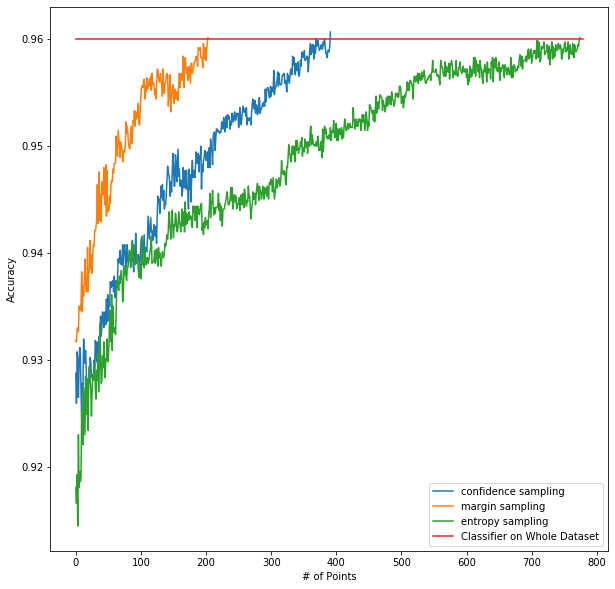

In [47]:
plt.figure(figsize=(10,10))
plt.plot(least_confident_track[0],label='confidence sampling')
plt.plot(margin_sampling_track[0],label='margin sampling')
plt.plot(entropy_track[0],label='entropy sampling')
plt.plot([0.96 for i in range(780)],label='Classifier on Whole Dataset')
plt.xlabel('# of Points')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

In [ ]:
kl_track = active_committee_stream_based(x,y,5,KL_max_disagreement)
vote_track = active_committee_stream_based(x,y,5,vote_entropy)

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Ignored this point from labelling: 302
Ignored this point from labelling: 6438
Ignored this point from labelling: 6270
Ignored this point from labelling: 318
Ignored this point from labelling: 1197
Ignored this point from labelling: 696
Ignored this point from labelling: 452
Ignored this point from labelling: 298
Ignored this point from labelling: 6053
Ignored this point from labelling: 862
Ignored this point from labelling: 5836
Ignored this point from labelling: 2546
Ignored this point from labelling: 4086


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 3518; Accuracy achieved: 0.9414119845188843
Ignored this point from labelling: 6258
Ignored this point from labelling: 212
Ignored this point from labelling: 3213
Ignored this point from labelling: 6176
Ignored this point from labelling: 1071
Ignored this point from labelling: 6951
Ignored this point from labelling: 5561
Ignored this point from labelling: 5597


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 4685; Accuracy achieved: 0.9376751634859202
Ignored this point from labelling: 71
Ignored this point from labelling: 4057
Ignored this point from labelling: 3471
Ignored this point from labelling: 3300
Ignored this point from labelling: 7155
Ignored this point from labelling: 1084
Ignored this point from labelling: 4159
Ignored this point from labelling: 1599
Ignored this point from labelling: 2337
Ignored this point from labelling: 632
Ignored this point from labelling: 7140
Ignored this point from labelling: 4851
Ignored this point from labelling: 2117
Ignored this point from labelling: 2197
Ignored this point from labelling: 3918
Ignored this point from labelling: 1449
Ignored this point from labelling: 4146
Ignored this point from labelling: 2158
Ignored this point from labelling: 2261
Ignored this point from labelling: 6957
Ignored this point from labelling: 4221
Ignored this point from labelling: 4561
Ignored this point from labelling: 5850
Ignored this point from 

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 4062; Accuracy achieved: 0.9415454424129187
Ignored this point from labelling: 168
Ignored this point from labelling: 5292
Ignored this point from labelling: 6001


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 1205; Accuracy achieved: 0.941945816095022
Ignored this point from labelling: 7275
Ignored this point from labelling: 4169
Ignored this point from labelling: 403


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 2899; Accuracy achieved: 0.941011610836781
Ignored this point from labelling: 2503
Ignored this point from labelling: 4043
Ignored this point from labelling: 3404
Ignored this point from labelling: 5344
Ignored this point from labelling: 3627
Ignored this point from labelling: 1821
Ignored this point from labelling: 2487
Ignored this point from labelling: 1004
Ignored this point from labelling: 6293


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 4514; Accuracy achieved: 0.9424796476711598
Ignored this point from labelling: 2883
Ignored this point from labelling: 3303


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 7185; Accuracy achieved: 0.944081142399573
Ignored this point from labelling: 1208
Ignored this point from labelling: 7012
Ignored this point from labelling: 2864
Ignored this point from labelling: 5719
Ignored this point from labelling: 3853
Ignored this point from labelling: 1144
Ignored this point from labelling: 2581
Ignored this point from labelling: 1579
Ignored this point from labelling: 481
Ignored this point from labelling: 3067
Ignored this point from labelling: 893
Ignored this point from labelling: 2142
Ignored this point from labelling: 7358
Ignored this point from labelling: 617
Ignored this point from labelling: 904
Ignored this point from labelling: 5586
Ignored this point from labelling: 966
Ignored this point from labelling: 2831
Ignored this point from labelling: 6300
Ignored this point from labelling: 7316
Ignored this point from labelling: 6240
Ignored this point from labelling: 3945
Ignored this point from labelling: 1662
Ignored this point from lab

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 1532; Accuracy achieved: 0.9412785266248499


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 3614; Accuracy achieved: 0.944081142399573
Ignored this point from labelling: 5926
Ignored this point from labelling: 6783
Ignored this point from labelling: 4710
Ignored this point from labelling: 3913
Ignored this point from labelling: 5031
Ignored this point from labelling: 3207
Ignored this point from labelling: 5271
Ignored this point from labelling: 4854
Ignored this point from labelling: 5251
Ignored this point from labelling: 7459
Ignored this point from labelling: 513
Ignored this point from labelling: 6043
Ignored this point from labelling: 2679
Ignored this point from labelling: 7213
Ignored this point from labelling: 3090
Ignored this point from labelling: 6453


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 4601; Accuracy achieved: 0.9460830108100894
Ignored this point from labelling: 2314
Ignored this point from labelling: 1768
Ignored this point from labelling: 2626
Ignored this point from labelling: 699
Ignored this point from labelling: 1851
Ignored this point from labelling: 1187
Ignored this point from labelling: 2934
Ignored this point from labelling: 1878
Ignored this point from labelling: 1532
Ignored this point from labelling: 1178
Ignored this point from labelling: 5498
Ignored this point from labelling: 4248
Ignored this point from labelling: 1052
Ignored this point from labelling: 3837
Ignored this point from labelling: 1803
Ignored this point from labelling: 6565
Ignored this point from labelling: 6484
Ignored this point from labelling: 6745
Ignored this point from labelling: 2640
Ignored this point from labelling: 6933
Ignored this point from labelling: 5494
Ignored this point from labelling: 2916
Ignored this point from labelling: 5435
Ignored this point fro

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 1362; Accuracy achieved: 0.9439476845055385
Ignored this point from labelling: 417
Ignored this point from labelling: 979
Ignored this point from labelling: 7029


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 2227; Accuracy achieved: 0.9450153476578139
Ignored this point from labelling: 3188
Ignored this point from labelling: 6805
Ignored this point from labelling: 3464
Ignored this point from labelling: 1863
Ignored this point from labelling: 6070
Ignored this point from labelling: 6290
Ignored this point from labelling: 7007
Ignored this point from labelling: 5519
Ignored this point from labelling: 2943
Ignored this point from labelling: 3177


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 2992; Accuracy achieved: 0.9435473108234352
Ignored this point from labelling: 1518
Ignored this point from labelling: 2602
Ignored this point from labelling: 3658
Ignored this point from labelling: 1806
Ignored this point from labelling: 413
Ignored this point from labelling: 6335
Ignored this point from labelling: 3103
Ignored this point from labelling: 5737
Ignored this point from labelling: 2226
Ignored this point from labelling: 7417
Ignored this point from labelling: 7010
Ignored this point from labelling: 4839
Ignored this point from labelling: 4852
Ignored this point from labelling: 956
Ignored this point from labelling: 6425
Ignored this point from labelling: 5269
Ignored this point from labelling: 855
Ignored this point from labelling: 7016
Ignored this point from labelling: 1219
Ignored this point from labelling: 5764
Ignored this point from labelling: 4625
Ignored this point from labelling: 1247
Ignored this point from labelling: 1617
Ignored this point from 

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 1860; Accuracy achieved: 0.9462164687041239
Ignored this point from labelling: 5903
Ignored this point from labelling: 5502
Ignored this point from labelling: 5121
Ignored this point from labelling: 7234
Ignored this point from labelling: 6416
Ignored this point from labelling: 921
Ignored this point from labelling: 1711
Ignored this point from labelling: 3561
Ignored this point from labelling: 7135
Ignored this point from labelling: 6369


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 1865; Accuracy achieved: 0.9452822634458828
Ignored this point from labelling: 3097
Ignored this point from labelling: 4439
Ignored this point from labelling: 79
Ignored this point from labelling: 2318
Ignored this point from labelling: 155
Ignored this point from labelling: 5701
Ignored this point from labelling: 731
Ignored this point from labelling: 5327
Ignored this point from labelling: 1263
Ignored this point from labelling: 5931
Ignored this point from labelling: 2119
Ignored this point from labelling: 5414
Ignored this point from labelling: 7308


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 5888; Accuracy achieved: 0.9466168423862271
Ignored this point from labelling: 6564


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 5726; Accuracy achieved: 0.9460830108100894
Ignored this point from labelling: 4102
Ignored this point from labelling: 4176
Ignored this point from labelling: 3132
Ignored this point from labelling: 1504
Ignored this point from labelling: 3705
Ignored this point from labelling: 6712
Ignored this point from labelling: 6361
Ignored this point from labelling: 2987
Ignored this point from labelling: 3302
Ignored this point from labelling: 6288
Ignored this point from labelling: 6244
Ignored this point from labelling: 7110
Ignored this point from labelling: 231
Ignored this point from labelling: 3266
Ignored this point from labelling: 5345
Ignored this point from labelling: 524
Ignored this point from labelling: 520


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 3166; Accuracy achieved: 0.9479514213265715
Ignored this point from labelling: 4635
Ignored this point from labelling: 3664
Ignored this point from labelling: 765
Ignored this point from labelling: 7043
Ignored this point from labelling: 3824
Ignored this point from labelling: 3815
Ignored this point from labelling: 3592
Ignored this point from labelling: 3803
Ignored this point from labelling: 1159
Ignored this point from labelling: 3712
Ignored this point from labelling: 5748
Ignored this point from labelling: 5275
Ignored this point from labelling: 4547
Ignored this point from labelling: 684
Ignored this point from labelling: 7155
Ignored this point from labelling: 4869
Ignored this point from labelling: 6770
Ignored this point from labelling: 1675
Ignored this point from labelling: 6203
Ignored this point from labelling: 2818
Ignored this point from labelling: 2952
Ignored this point from labelling: 7348
Ignored this point from labelling: 6841
Ignored this point from

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 1389; Accuracy achieved: 0.946883758174296
Ignored this point from labelling: 5048
Ignored this point from labelling: 627
Ignored this point from labelling: 2037
Ignored this point from labelling: 3330
Ignored this point from labelling: 5868
Ignored this point from labelling: 5006
Ignored this point from labelling: 4069
Ignored this point from labelling: 6608
Ignored this point from labelling: 1254
Ignored this point from labelling: 6582
Ignored this point from labelling: 3909
Ignored this point from labelling: 198
Ignored this point from labelling: 1528
Ignored this point from labelling: 543
Ignored this point from labelling: 6559
Ignored this point from labelling: 900
Ignored this point from labelling: 1139
Ignored this point from labelling: 5190
Ignored this point from labelling: 1221
Ignored this point from labelling: 1635
Ignored this point from labelling: 6484
Ignored this point from labelling: 5873
Ignored this point from labelling: 1384
Ignored this point from la

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 4348; Accuracy achieved: 0.9474175897504338
Ignored this point from labelling: 5167
Ignored this point from labelling: 552
Ignored this point from labelling: 6717
Ignored this point from labelling: 7263
Ignored this point from labelling: 6612
Ignored this point from labelling: 2593
Ignored this point from labelling: 4008
Ignored this point from labelling: 1703
Ignored this point from labelling: 5605
Ignored this point from labelling: 6436
Ignored this point from labelling: 6547
Ignored this point from labelling: 7439
Ignored this point from labelling: 763
Ignored this point from labelling: 3661
Ignored this point from labelling: 7341
Ignored this point from labelling: 6146
Ignored this point from labelling: 4297
Ignored this point from labelling: 3437
Ignored this point from labelling: 626
Ignored this point from labelling: 5574
Ignored this point from labelling: 6158
Ignored this point from labelling: 193
Ignored this point from labelling: 5203
Ignored this point from l

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 5123; Accuracy achieved: 0.949019084478847


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 4623; Accuracy achieved: 0.9470172160683304
Ignored this point from labelling: 4456
Ignored this point from labelling: 2756


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 1557; Accuracy achieved: 0.948752168690778
Ignored this point from labelling: 4499
Ignored this point from labelling: 303
Ignored this point from labelling: 5868
Ignored this point from labelling: 2365
Ignored this point from labelling: 5789
Ignored this point from labelling: 3160
Ignored this point from labelling: 5610
Ignored this point from labelling: 7405
Ignored this point from labelling: 6680
Ignored this point from labelling: 1089
Ignored this point from labelling: 7047
Ignored this point from labelling: 4212
Ignored this point from labelling: 5681
Ignored this point from labelling: 5403
Ignored this point from labelling: 4533
Ignored this point from labelling: 4880
Ignored this point from labelling: 2171
Ignored this point from labelling: 1644
Ignored this point from labelling: 5609
Ignored this point from labelling: 3155
Ignored this point from labelling: 918
Ignored this point from labelling: 6858
Ignored this point from labelling: 4757
Ignored this point from 

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 2766; Accuracy achieved: 0.9484852529027092
Ignored this point from labelling: 5625
Ignored this point from labelling: 2124
Ignored this point from labelling: 1515
Ignored this point from labelling: 531
Ignored this point from labelling: 1821
Ignored this point from labelling: 4770
Ignored this point from labelling: 5113
Ignored this point from labelling: 2267
Ignored this point from labelling: 2177


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 1778; Accuracy achieved: 0.947817963432537
Ignored this point from labelling: 2868
Ignored this point from labelling: 4563
Ignored this point from labelling: 2785
Ignored this point from labelling: 697
Ignored this point from labelling: 3839
Ignored this point from labelling: 2912
Ignored this point from labelling: 3117
Ignored this point from labelling: 2802
Ignored this point from labelling: 4427
Ignored this point from labelling: 5612
Ignored this point from labelling: 5535
Ignored this point from labelling: 6748
Ignored this point from labelling: 3289
Ignored this point from labelling: 1467
Ignored this point from labelling: 3528
Ignored this point from labelling: 4129
Ignored this point from labelling: 4190
Ignored this point from labelling: 1012
Ignored this point from labelling: 3014
Ignored this point from labelling: 4204
Ignored this point from labelling: 5707
Ignored this point from labelling: 7078
Ignored this point from labelling: 4843
Ignored this point from

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 6796; Accuracy achieved: 0.9470172160683304
Ignored this point from labelling: 2230
Ignored this point from labelling: 2439
Ignored this point from labelling: 7425
Ignored this point from labelling: 1978
Ignored this point from labelling: 358
Ignored this point from labelling: 3800
Ignored this point from labelling: 5146
Ignored this point from labelling: 5123
Ignored this point from labelling: 2847
Ignored this point from labelling: 2760
Ignored this point from labelling: 7059
Ignored this point from labelling: 2564
Ignored this point from labelling: 3972
Ignored this point from labelling: 3493
Ignored this point from labelling: 3415
Ignored this point from labelling: 1159
Ignored this point from labelling: 4630
Ignored this point from labelling: 3992
Ignored this point from labelling: 1782
Ignored this point from labelling: 1561
Ignored this point from labelling: 3187
Ignored this point from labelling: 7251
Ignored this point from labelling: 704
Ignored this point from

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 7055; Accuracy achieved: 0.9475510476444682
Ignored this point from labelling: 2262
Ignored this point from labelling: 3719
Ignored this point from labelling: 132
Ignored this point from labelling: 411
Ignored this point from labelling: 7297
Ignored this point from labelling: 4498
Ignored this point from labelling: 4315
Ignored this point from labelling: 1969
Ignored this point from labelling: 4829
Ignored this point from labelling: 5029
Ignored this point from labelling: 6126
Ignored this point from labelling: 2589
Ignored this point from labelling: 3464
Ignored this point from labelling: 3701
Ignored this point from labelling: 762
Ignored this point from labelling: 6156
Ignored this point from labelling: 2352
Ignored this point from labelling: 3606
Ignored this point from labelling: 5085
Ignored this point from labelling: 6333
Ignored this point from labelling: 2396
Ignored this point from labelling: 4533
Ignored this point from labelling: 6623
Ignored this point from 

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 944; Accuracy achieved: 0.948752168690778
Ignored this point from labelling: 4385
Ignored this point from labelling: 197
Ignored this point from labelling: 2039
Ignored this point from labelling: 5858
Ignored this point from labelling: 7292
Ignored this point from labelling: 1122
Ignored this point from labelling: 5508
Ignored this point from labelling: 3265
Ignored this point from labelling: 775
Ignored this point from labelling: 147
Ignored this point from labelling: 3675
Ignored this point from labelling: 5828
Ignored this point from labelling: 575
Ignored this point from labelling: 3168
Ignored this point from labelling: 3768
Ignored this point from labelling: 3615
Ignored this point from labelling: 1739
Ignored this point from labelling: 70
Ignored this point from labelling: 7341
Ignored this point from labelling: 2410
Ignored this point from labelling: 4000
Ignored this point from labelling: 5916
Ignored this point from labelling: 2452
Ignored this point from label

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 6309; Accuracy achieved: 0.9492860002669158
Ignored this point from labelling: 5038
Ignored this point from labelling: 7270
Ignored this point from labelling: 6710
Ignored this point from labelling: 4476
Ignored this point from labelling: 4769
Ignored this point from labelling: 4100
Ignored this point from labelling: 1687
Ignored this point from labelling: 4855
Ignored this point from labelling: 2243
Ignored this point from labelling: 1138
Ignored this point from labelling: 5271
Ignored this point from labelling: 2389
Ignored this point from labelling: 4158
Ignored this point from labelling: 7186
Ignored this point from labelling: 3627
Ignored this point from labelling: 4067
Ignored this point from labelling: 5348
Ignored this point from labelling: 3
Ignored this point from labelling: 5742
Ignored this point from labelling: 974
Ignored this point from labelling: 5396
Ignored this point from labelling: 3200
Ignored this point from labelling: 7464
Ignored this point from l

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 3298; Accuracy achieved: 0.9486187107967436
Ignored this point from labelling: 2821
Ignored this point from labelling: 1844


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 3977; Accuracy achieved: 0.9495529160549846
Ignored this point from labelling: 330
Ignored this point from labelling: 6552
Ignored this point from labelling: 5415
Ignored this point from labelling: 1887
Ignored this point from labelling: 4401
Ignored this point from labelling: 5919
Ignored this point from labelling: 645
Ignored this point from labelling: 6596
Ignored this point from labelling: 2041
Ignored this point from labelling: 4253
Ignored this point from labelling: 2982
Ignored this point from labelling: 3252


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 581; Accuracy achieved: 0.9488856265848125
Ignored this point from labelling: 6513
Ignored this point from labelling: 3803
Ignored this point from labelling: 2374
Ignored this point from labelling: 3203
Ignored this point from labelling: 3704
Ignored this point from labelling: 6018
Ignored this point from labelling: 5940
Ignored this point from labelling: 5027
Ignored this point from labelling: 7415
Ignored this point from labelling: 2638
Ignored this point from labelling: 2948
Ignored this point from labelling: 2854
Ignored this point from labelling: 7391
Ignored this point from labelling: 4063
Ignored this point from labelling: 4259
Ignored this point from labelling: 2652
Ignored this point from labelling: 1869


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 2407; Accuracy achieved: 0.9467503002802615
Ignored this point from labelling: 5560
Ignored this point from labelling: 383
Ignored this point from labelling: 1759
Ignored this point from labelling: 5333
Ignored this point from labelling: 333
Ignored this point from labelling: 7415
Ignored this point from labelling: 6870
Ignored this point from labelling: 2912
Ignored this point from labelling: 4865
Ignored this point from labelling: 197
Ignored this point from labelling: 5234
Ignored this point from labelling: 4317
Ignored this point from labelling: 2634
Ignored this point from labelling: 6930
Ignored this point from labelling: 1873
Ignored this point from labelling: 6047
Ignored this point from labelling: 236
Ignored this point from labelling: 7430
Ignored this point from labelling: 7270
Ignored this point from labelling: 5051
Ignored this point from labelling: 2177
Ignored this point from labelling: 158
Ignored this point from labelling: 4054
Ignored this point from la

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 4150; Accuracy achieved: 0.948752168690778
Ignored this point from labelling: 1335
Ignored this point from labelling: 379
Ignored this point from labelling: 7488
Ignored this point from labelling: 4393
Ignored this point from labelling: 1377
Ignored this point from labelling: 6906
Ignored this point from labelling: 6281
Ignored this point from labelling: 4494
Ignored this point from labelling: 3387
Ignored this point from labelling: 1948
Ignored this point from labelling: 7117
Ignored this point from labelling: 4423
Ignored this point from labelling: 6679
Ignored this point from labelling: 3024
Ignored this point from labelling: 77
Ignored this point from labelling: 1371
Ignored this point from labelling: 2597
Ignored this point from labelling: 2787
Ignored this point from labelling: 81
Ignored this point from labelling: 3128
Ignored this point from labelling: 6660
Ignored this point from labelling: 3924
Ignored this point from labelling: 2029
Ignored this point from lab

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 6413; Accuracy achieved: 0.9503536634191913
Ignored this point from labelling: 1092
Ignored this point from labelling: 7050
Ignored this point from labelling: 1171
Ignored this point from labelling: 4761
Ignored this point from labelling: 2483
Ignored this point from labelling: 6521
Ignored this point from labelling: 1900
Ignored this point from labelling: 6486
Ignored this point from labelling: 1161
Ignored this point from labelling: 3221
Ignored this point from labelling: 5546


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 5336; Accuracy achieved: 0.9498198318430535
Ignored this point from labelling: 3916
Ignored this point from labelling: 2581
Ignored this point from labelling: 1430
Ignored this point from labelling: 1964
Ignored this point from labelling: 6694
Ignored this point from labelling: 1132
Ignored this point from labelling: 5958
Ignored this point from labelling: 1350
Ignored this point from labelling: 6163
Ignored this point from labelling: 2430
Ignored this point from labelling: 4999
Ignored this point from labelling: 7397
Ignored this point from labelling: 3314
Ignored this point from labelling: 6782
Ignored this point from labelling: 915
Ignored this point from labelling: 1420
Ignored this point from labelling: 6543
Ignored this point from labelling: 5004
Ignored this point from labelling: 2137
Ignored this point from labelling: 5625
Ignored this point from labelling: 3027
Ignored this point from labelling: 4286
Ignored this point from labelling: 2221
Ignored this point fro

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 4798; Accuracy achieved: 0.9503536634191913
Ignored this point from labelling: 6546
Ignored this point from labelling: 313
Ignored this point from labelling: 6631
Ignored this point from labelling: 3848
Ignored this point from labelling: 4439
Ignored this point from labelling: 602
Ignored this point from labelling: 4979
Ignored this point from labelling: 2154
Ignored this point from labelling: 5538
Ignored this point from labelling: 2045
Ignored this point from labelling: 1733
Ignored this point from labelling: 2639
Ignored this point from labelling: 6032
Ignored this point from labelling: 613
Ignored this point from labelling: 959
Ignored this point from labelling: 2653
Ignored this point from labelling: 4915
Ignored this point from labelling: 6571
Ignored this point from labelling: 6482
Ignored this point from labelling: 3531
Ignored this point from labelling: 4584
Ignored this point from labelling: 1739
Ignored this point from labelling: 1504
Ignored this point from l

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 2110; Accuracy achieved: 0.9507540371012946
Ignored this point from labelling: 1981
Ignored this point from labelling: 6
Ignored this point from labelling: 1335
Ignored this point from labelling: 5335
Ignored this point from labelling: 3795
Ignored this point from labelling: 2210
Ignored this point from labelling: 1236
Ignored this point from labelling: 492
Ignored this point from labelling: 1264
Ignored this point from labelling: 247
Ignored this point from labelling: 5516
Ignored this point from labelling: 4435
Ignored this point from labelling: 6812
Ignored this point from labelling: 5817
Ignored this point from labelling: 3875
Ignored this point from labelling: 2291
Ignored this point from labelling: 7315
Ignored this point from labelling: 4903
Ignored this point from labelling: 4911
Ignored this point from labelling: 7151
Ignored this point from labelling: 1972
Ignored this point from labelling: 1234
Ignored this point from labelling: 3081
Ignored this point from la

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 6597; Accuracy achieved: 0.9502202055251568
Ignored this point from labelling: 3996
Ignored this point from labelling: 5341
Ignored this point from labelling: 2268
Ignored this point from labelling: 7485
Ignored this point from labelling: 825


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 6138; Accuracy achieved: 0.948752168690778
Ignored this point from labelling: 2340
Ignored this point from labelling: 6911
Ignored this point from labelling: 1265
Ignored this point from labelling: 372
Ignored this point from labelling: 6188
Ignored this point from labelling: 4913
Ignored this point from labelling: 2815
Ignored this point from labelling: 6946


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 469; Accuracy achieved: 0.9500867476311223
Ignored this point from labelling: 1091
Ignored this point from labelling: 6633
Ignored this point from labelling: 6369
Ignored this point from labelling: 4234
Ignored this point from labelling: 3962
Ignored this point from labelling: 5329
Ignored this point from labelling: 6918
Ignored this point from labelling: 3078
Ignored this point from labelling: 971
Ignored this point from labelling: 1628
Ignored this point from labelling: 2102
Ignored this point from labelling: 209
Ignored this point from labelling: 2658
Ignored this point from labelling: 336
Ignored this point from labelling: 3557
Ignored this point from labelling: 2364
Ignored this point from labelling: 2156
Ignored this point from labelling: 2408
Ignored this point from labelling: 1394
Ignored this point from labelling: 3650
Ignored this point from labelling: 1487
Ignored this point from labelling: 4758
Ignored this point from labelling: 4036
Ignored this point from l

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 7202; Accuracy achieved: 0.9500867476311223
Ignored this point from labelling: 5532
Ignored this point from labelling: 88
Ignored this point from labelling: 4156
Ignored this point from labelling: 4796
Ignored this point from labelling: 4705


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 2854; Accuracy achieved: 0.9515547844655011
Ignored this point from labelling: 4153
Ignored this point from labelling: 4617
Ignored this point from labelling: 3501
Ignored this point from labelling: 3931
Ignored this point from labelling: 6928
Ignored this point from labelling: 1851
Ignored this point from labelling: 5300
Ignored this point from labelling: 2078
Ignored this point from labelling: 3347
Ignored this point from labelling: 4171
Ignored this point from labelling: 2074


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 2772; Accuracy achieved: 0.95182170025357
Ignored this point from labelling: 6160
Ignored this point from labelling: 2725
Ignored this point from labelling: 5787
Ignored this point from labelling: 5378
Ignored this point from labelling: 2652
Ignored this point from labelling: 4836
Ignored this point from labelling: 5297
Ignored this point from labelling: 3677
Ignored this point from labelling: 6776
Ignored this point from labelling: 5092
Ignored this point from labelling: 2067
Ignored this point from labelling: 4841
Ignored this point from labelling: 198
Ignored this point from labelling: 5457
Ignored this point from labelling: 6949
Ignored this point from labelling: 3758
Ignored this point from labelling: 5094
Ignored this point from labelling: 2103
Ignored this point from labelling: 1349
Ignored this point from labelling: 4039
Ignored this point from labelling: 7465
Ignored this point from labelling: 3040
Ignored this point from labelling: 96
Ignored this point from la

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 1916; Accuracy achieved: 0.9498198318430535
Ignored this point from labelling: 3704
Ignored this point from labelling: 6067
Ignored this point from labelling: 6601


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 3013; Accuracy achieved: 0.946883758174296
Ignored this point from labelling: 5285
Ignored this point from labelling: 712
Ignored this point from labelling: 5575
Ignored this point from labelling: 6373
Ignored this point from labelling: 3162
Ignored this point from labelling: 4830
Ignored this point from labelling: 6802
Ignored this point from labelling: 5179
Ignored this point from labelling: 1578
Ignored this point from labelling: 4138
Ignored this point from labelling: 4783
Ignored this point from labelling: 6231
Ignored this point from labelling: 6465
Ignored this point from labelling: 6772
Ignored this point from labelling: 7262
Ignored this point from labelling: 1754
Ignored this point from labelling: 2742
Ignored this point from labelling: 1074
Ignored this point from labelling: 1113
Ignored this point from labelling: 680
Ignored this point from labelling: 332
Ignored this point from labelling: 4535
Ignored this point from labelling: 6053
Ignored this point from l

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 5499; Accuracy achieved: 0.9479514213265715
Ignored this point from labelling: 1502
Ignored this point from labelling: 1558
Ignored this point from labelling: 5606
Ignored this point from labelling: 2141
Ignored this point from labelling: 6851
Ignored this point from labelling: 3271
Ignored this point from labelling: 6806
Ignored this point from labelling: 5661
Ignored this point from labelling: 980
Ignored this point from labelling: 3656
Ignored this point from labelling: 1193
Ignored this point from labelling: 1665
Ignored this point from labelling: 3808
Ignored this point from labelling: 5896
Ignored this point from labelling: 321
Ignored this point from labelling: 4636
Ignored this point from labelling: 3538
Ignored this point from labelling: 5684
Ignored this point from labelling: 7099
Ignored this point from labelling: 3697
Ignored this point from labelling: 3736
Ignored this point from labelling: 6878


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 7137; Accuracy achieved: 0.9486187107967436
Ignored this point from labelling: 2477
Ignored this point from labelling: 6287
Ignored this point from labelling: 3104
Ignored this point from labelling: 5958
Ignored this point from labelling: 849
Ignored this point from labelling: 3316
Ignored this point from labelling: 217
Ignored this point from labelling: 5777
Ignored this point from labelling: 1138


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 4910; Accuracy achieved: 0.9492860002669158
Ignored this point from labelling: 6277
Ignored this point from labelling: 3879
Ignored this point from labelling: 1196
Ignored this point from labelling: 3804
Ignored this point from labelling: 3962
Ignored this point from labelling: 2964
Ignored this point from labelling: 4322
Ignored this point from labelling: 2314
Ignored this point from labelling: 5955
Ignored this point from labelling: 7036
Ignored this point from labelling: 7433
Ignored this point from labelling: 4929
Ignored this point from labelling: 2690
Ignored this point from labelling: 3494
Ignored this point from labelling: 4867
Ignored this point from labelling: 6595
Ignored this point from labelling: 6380


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 6183; Accuracy achieved: 0.9499532897370879
Ignored this point from labelling: 1877
Ignored this point from labelling: 3463
Ignored this point from labelling: 5358
Ignored this point from labelling: 5698
Ignored this point from labelling: 32
Ignored this point from labelling: 2997
Ignored this point from labelling: 4015
Ignored this point from labelling: 2494
Ignored this point from labelling: 5365
Ignored this point from labelling: 5740
Ignored this point from labelling: 2670
Ignored this point from labelling: 6770
Ignored this point from labelling: 1504
Ignored this point from labelling: 5425
Ignored this point from labelling: 4309
Ignored this point from labelling: 3655
Ignored this point from labelling: 6135
Ignored this point from labelling: 6301
Ignored this point from labelling: 1674
Ignored this point from labelling: 1236
Ignored this point from labelling: 3447
Ignored this point from labelling: 2629
Ignored this point from labelling: 5041
Ignored this point from

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 871; Accuracy achieved: 0.9504871213132257
Ignored this point from labelling: 888
Ignored this point from labelling: 4213
Ignored this point from labelling: 2279
Ignored this point from labelling: 391
Ignored this point from labelling: 7062
Ignored this point from labelling: 4762
Ignored this point from labelling: 3939
Ignored this point from labelling: 4045
Ignored this point from labelling: 4839
Ignored this point from labelling: 671
Ignored this point from labelling: 2874
Ignored this point from labelling: 1304
Ignored this point from labelling: 5677
Ignored this point from labelling: 943
Ignored this point from labelling: 3449
Ignored this point from labelling: 4789
Ignored this point from labelling: 7430
Ignored this point from labelling: 2789
Ignored this point from labelling: 710
Ignored this point from labelling: 4387
Ignored this point from labelling: 400
Ignored this point from labelling: 5562
Ignored this point from labelling: 4504
Ignored this point from labe

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 6961; Accuracy achieved: 0.9496863739490191
Ignored this point from labelling: 3916
Ignored this point from labelling: 6807
Ignored this point from labelling: 5291
Ignored this point from labelling: 579
Ignored this point from labelling: 5263
Ignored this point from labelling: 5252
Ignored this point from labelling: 7398
Ignored this point from labelling: 3019
Ignored this point from labelling: 2215
Ignored this point from labelling: 1238
Ignored this point from labelling: 3530
Ignored this point from labelling: 336
Ignored this point from labelling: 973
Ignored this point from labelling: 1902
Ignored this point from labelling: 3679
Ignored this point from labelling: 6450
Ignored this point from labelling: 699
Ignored this point from labelling: 6063
Ignored this point from labelling: 7050
Ignored this point from labelling: 42
Ignored this point from labelling: 5390
Ignored this point from labelling: 4848
Ignored this point from labelling: 4401
Ignored this point from lab

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 4202; Accuracy achieved: 0.9494194581609502
Ignored this point from labelling: 7111


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 423; Accuracy achieved: 0.9494194581609502
Ignored this point from labelling: 6971
Ignored this point from labelling: 198
Ignored this point from labelling: 1040
Ignored this point from labelling: 3574
Ignored this point from labelling: 1371
Ignored this point from labelling: 4648
Ignored this point from labelling: 422
Ignored this point from labelling: 1189
Ignored this point from labelling: 1839
Ignored this point from labelling: 2206
Ignored this point from labelling: 6497
Ignored this point from labelling: 3349
Ignored this point from labelling: 7375
Ignored this point from labelling: 3380
Ignored this point from labelling: 5762
Ignored this point from labelling: 691


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 6907; Accuracy achieved: 0.9504871213132257


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 4751; Accuracy achieved: 0.9491525423728814
Ignored this point from labelling: 1609
Ignored this point from labelling: 1424
Ignored this point from labelling: 2740
Ignored this point from labelling: 6218
Ignored this point from labelling: 1770
Ignored this point from labelling: 7287
Ignored this point from labelling: 7123
Ignored this point from labelling: 5741
Ignored this point from labelling: 4528
Ignored this point from labelling: 7037
Ignored this point from labelling: 651
Ignored this point from labelling: 6321
Ignored this point from labelling: 1792
Ignored this point from labelling: 2437
Ignored this point from labelling: 3186
Ignored this point from labelling: 2641


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 4825; Accuracy achieved: 0.9503536634191913
Ignored this point from labelling: 1173
Ignored this point from labelling: 3725
Ignored this point from labelling: 2800
Ignored this point from labelling: 557
Ignored this point from labelling: 4638
Ignored this point from labelling: 6672
Ignored this point from labelling: 4472
Ignored this point from labelling: 2532
Ignored this point from labelling: 143
Ignored this point from labelling: 1566
Ignored this point from labelling: 996
Ignored this point from labelling: 4713
Ignored this point from labelling: 5691


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 6463; Accuracy achieved: 0.9492860002669158
Ignored this point from labelling: 1051
Ignored this point from labelling: 5122
Ignored this point from labelling: 275
Ignored this point from labelling: 1815
Ignored this point from labelling: 3372
Ignored this point from labelling: 6822
Ignored this point from labelling: 492
Ignored this point from labelling: 4673
Ignored this point from labelling: 4134
Ignored this point from labelling: 6121
Ignored this point from labelling: 4180
Ignored this point from labelling: 10
Ignored this point from labelling: 4854
Ignored this point from labelling: 1343
Ignored this point from labelling: 2145
Ignored this point from labelling: 2250
Ignored this point from labelling: 6090


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 2350; Accuracy achieved: 0.9498198318430535
Ignored this point from labelling: 7213
Ignored this point from labelling: 3789
Ignored this point from labelling: 1432
Ignored this point from labelling: 5160
Ignored this point from labelling: 6497
Ignored this point from labelling: 6982
Ignored this point from labelling: 4011
Ignored this point from labelling: 2000
Ignored this point from labelling: 1601
Ignored this point from labelling: 3596
Ignored this point from labelling: 2242
Ignored this point from labelling: 4109
Ignored this point from labelling: 2015
Ignored this point from labelling: 373
Ignored this point from labelling: 2192
Ignored this point from labelling: 4508
Ignored this point from labelling: 6186
Ignored this point from labelling: 4050
Ignored this point from labelling: 2088
Ignored this point from labelling: 2902
Ignored this point from labelling: 2958
Ignored this point from labelling: 3686
Ignored this point from labelling: 3182
Ignored this point fro

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 5262; Accuracy achieved: 0.9492860002669158
Ignored this point from labelling: 6596
Ignored this point from labelling: 186
Ignored this point from labelling: 6864
Ignored this point from labelling: 898
Ignored this point from labelling: 684
Ignored this point from labelling: 520
Ignored this point from labelling: 4829
Ignored this point from labelling: 3696
Ignored this point from labelling: 7328
Ignored this point from labelling: 7122
Ignored this point from labelling: 1221
Ignored this point from labelling: 4737


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 3845; Accuracy achieved: 0.9500867476311223
Ignored this point from labelling: 564
Ignored this point from labelling: 5021
Ignored this point from labelling: 3263
Ignored this point from labelling: 2662
Ignored this point from labelling: 6276
Ignored this point from labelling: 500
Ignored this point from labelling: 7291
Ignored this point from labelling: 3539
Ignored this point from labelling: 1771
Ignored this point from labelling: 6743
Ignored this point from labelling: 4116
Ignored this point from labelling: 2738
Ignored this point from labelling: 6671
Ignored this point from labelling: 4438
Ignored this point from labelling: 5985
Ignored this point from labelling: 7031
Ignored this point from labelling: 1705
Ignored this point from labelling: 695
Ignored this point from labelling: 581
Ignored this point from labelling: 5981
Ignored this point from labelling: 2873
Ignored this point from labelling: 3332
Ignored this point from labelling: 6494
Ignored this point from l

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 433; Accuracy achieved: 0.9486187107967436
Ignored this point from labelling: 2160
Ignored this point from labelling: 6898
Ignored this point from labelling: 1623
Ignored this point from labelling: 6920
Ignored this point from labelling: 7008
Ignored this point from labelling: 3014
Ignored this point from labelling: 4197
Ignored this point from labelling: 800


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 4687; Accuracy achieved: 0.9498198318430535
Ignored this point from labelling: 2484
Ignored this point from labelling: 4274
Ignored this point from labelling: 3099
Ignored this point from labelling: 3167
Ignored this point from labelling: 3961
Ignored this point from labelling: 4782
Ignored this point from labelling: 5453
Ignored this point from labelling: 2220
Ignored this point from labelling: 4712
Ignored this point from labelling: 5538
Ignored this point from labelling: 7270
Ignored this point from labelling: 2072
Ignored this point from labelling: 6400
Ignored this point from labelling: 6020
Ignored this point from labelling: 45
Ignored this point from labelling: 4773
Ignored this point from labelling: 2163
Ignored this point from labelling: 3811
Ignored this point from labelling: 2559
Ignored this point from labelling: 5286
Ignored this point from labelling: 4337
Ignored this point from labelling: 1241
Ignored this point from labelling: 1644
Ignored this point from

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 5709; Accuracy achieved: 0.9507540371012946
Ignored this point from labelling: 4646
Ignored this point from labelling: 2514
Ignored this point from labelling: 569
Ignored this point from labelling: 5852
Ignored this point from labelling: 5205
Ignored this point from labelling: 826
Ignored this point from labelling: 7432
Ignored this point from labelling: 5676
Ignored this point from labelling: 6474
Ignored this point from labelling: 4968
Ignored this point from labelling: 1739
Ignored this point from labelling: 5553
Ignored this point from labelling: 5588
Ignored this point from labelling: 4580
Ignored this point from labelling: 6516
Ignored this point from labelling: 5061
Ignored this point from labelling: 2702
Ignored this point from labelling: 485
Ignored this point from labelling: 2076
Ignored this point from labelling: 2696
Ignored this point from labelling: 6814
Ignored this point from labelling: 5850
Ignored this point from labelling: 4152
Ignored this point from 

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 1000; Accuracy achieved: 0.9511544107833978
Ignored this point from labelling: 5210
Ignored this point from labelling: 1765
Ignored this point from labelling: 5838
Ignored this point from labelling: 7304
Ignored this point from labelling: 5681
Ignored this point from labelling: 4245
Ignored this point from labelling: 402
Ignored this point from labelling: 1919
Ignored this point from labelling: 3436
Ignored this point from labelling: 4961
Ignored this point from labelling: 940
Ignored this point from labelling: 1358
Ignored this point from labelling: 3918
Ignored this point from labelling: 1347
Ignored this point from labelling: 3409
Ignored this point from labelling: 807
Ignored this point from labelling: 3787
Ignored this point from labelling: 2403
Ignored this point from labelling: 7020
Ignored this point from labelling: 3391
Ignored this point from labelling: 6526
Ignored this point from labelling: 6498
Ignored this point from labelling: 2747
Ignored this point from 

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 3511; Accuracy achieved: 0.9515547844655011
Ignored this point from labelling: 928
Ignored this point from labelling: 3501
Ignored this point from labelling: 1302
Ignored this point from labelling: 3004
Ignored this point from labelling: 2663
Ignored this point from labelling: 6969
Ignored this point from labelling: 1131
Ignored this point from labelling: 4430
Ignored this point from labelling: 4580
Ignored this point from labelling: 3864
Ignored this point from labelling: 2871
Ignored this point from labelling: 2104
Ignored this point from labelling: 3973
Ignored this point from labelling: 677
Ignored this point from labelling: 2337
Ignored this point from labelling: 3099
Ignored this point from labelling: 2003
Ignored this point from labelling: 5916
Ignored this point from labelling: 3668


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 1724; Accuracy achieved: 0.950887494995329
Ignored this point from labelling: 593
Ignored this point from labelling: 3621
Ignored this point from labelling: 1731
Ignored this point from labelling: 138
Ignored this point from labelling: 4190
Ignored this point from labelling: 1340
Ignored this point from labelling: 6032
Ignored this point from labelling: 4530
Ignored this point from labelling: 450
Ignored this point from labelling: 5386


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 3496; Accuracy achieved: 0.9519551581476045
Ignored this point from labelling: 645
Ignored this point from labelling: 3862
Ignored this point from labelling: 6211
Ignored this point from labelling: 2957
Ignored this point from labelling: 6029
Ignored this point from labelling: 956
Ignored this point from labelling: 5442
Ignored this point from labelling: 7246
Ignored this point from labelling: 148
Ignored this point from labelling: 3208


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 4271; Accuracy achieved: 0.95182170025357
Ignored this point from labelling: 7132
Ignored this point from labelling: 3996
Ignored this point from labelling: 1565
Ignored this point from labelling: 4546
Ignored this point from labelling: 370
Ignored this point from labelling: 2946
Ignored this point from labelling: 6653
Ignored this point from labelling: 4964
Ignored this point from labelling: 203
Ignored this point from labelling: 2420
Ignored this point from labelling: 3481
Ignored this point from labelling: 4591
Ignored this point from labelling: 5495
Ignored this point from labelling: 2156
Ignored this point from labelling: 1523
Ignored this point from labelling: 1244
Ignored this point from labelling: 7184
Ignored this point from labelling: 2108
Ignored this point from labelling: 4187
Ignored this point from labelling: 1653
Ignored this point from labelling: 6347
Ignored this point from labelling: 5038
Ignored this point from labelling: 1014
Ignored this point from l

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 1101; Accuracy achieved: 0.9524889897237422
Ignored this point from labelling: 6351
Ignored this point from labelling: 1607
Ignored this point from labelling: 4355


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 3494; Accuracy achieved: 0.9512878686774323


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 7139; Accuracy achieved: 0.9504871213132257
Ignored this point from labelling: 1494
Ignored this point from labelling: 2666
Ignored this point from labelling: 4874
Ignored this point from labelling: 3245
Ignored this point from labelling: 3272
Ignored this point from labelling: 4394
Ignored this point from labelling: 3088
Ignored this point from labelling: 762
Ignored this point from labelling: 5715
Ignored this point from labelling: 3892
Ignored this point from labelling: 1217
Ignored this point from labelling: 180
Ignored this point from labelling: 6345


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 1489; Accuracy achieved: 0.9510209528893634
Ignored this point from labelling: 3962
Ignored this point from labelling: 6407
Ignored this point from labelling: 112
Ignored this point from labelling: 1193
Ignored this point from labelling: 6645
Ignored this point from labelling: 4168
Ignored this point from labelling: 5343
Ignored this point from labelling: 6354
Ignored this point from labelling: 4853
Ignored this point from labelling: 1854
Ignored this point from labelling: 1012
Ignored this point from labelling: 5153
Ignored this point from labelling: 1766
Ignored this point from labelling: 3128
Ignored this point from labelling: 5425
Ignored this point from labelling: 6991
Ignored this point from labelling: 3504
Ignored this point from labelling: 4854
Ignored this point from labelling: 624
Ignored this point from labelling: 217
Ignored this point from labelling: 7029
Ignored this point from labelling: 1739
Ignored this point from labelling: 6864
Ignored this point from 

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 7167; Accuracy achieved: 0.9511544107833978
Ignored this point from labelling: 345
Ignored this point from labelling: 2485
Ignored this point from labelling: 3674
Ignored this point from labelling: 7457
Ignored this point from labelling: 6361
Ignored this point from labelling: 259
Ignored this point from labelling: 6814
Ignored this point from labelling: 4401
Ignored this point from labelling: 1669
Ignored this point from labelling: 68
Ignored this point from labelling: 3224


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 4982; Accuracy achieved: 0.9528893634058454
Ignored this point from labelling: 4176
Ignored this point from labelling: 5715
Ignored this point from labelling: 4758
Ignored this point from labelling: 2721
Ignored this point from labelling: 4237
Ignored this point from labelling: 4552
Ignored this point from labelling: 3269
Ignored this point from labelling: 1953
Ignored this point from labelling: 132
Ignored this point from labelling: 6076


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 7167; Accuracy achieved: 0.9524889897237422
Ignored this point from labelling: 4420
Ignored this point from labelling: 5829
Ignored this point from labelling: 448
Ignored this point from labelling: 5378
Ignored this point from labelling: 2060
Ignored this point from labelling: 4970
Ignored this point from labelling: 1063
Ignored this point from labelling: 2684
Ignored this point from labelling: 986
Ignored this point from labelling: 3805
Ignored this point from labelling: 82
Ignored this point from labelling: 1062
Ignored this point from labelling: 1749
Ignored this point from labelling: 2351
Ignored this point from labelling: 3570


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 4369; Accuracy achieved: 0.9540904844521554
Ignored this point from labelling: 3908
Ignored this point from labelling: 3565
Ignored this point from labelling: 4139
Ignored this point from labelling: 3664
Ignored this point from labelling: 5523


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 6467; Accuracy achieved: 0.9511544107833978
Ignored this point from labelling: 3150
Ignored this point from labelling: 2867
Ignored this point from labelling: 6326
Ignored this point from labelling: 1446
Ignored this point from labelling: 3090
Ignored this point from labelling: 900
Ignored this point from labelling: 6485
Ignored this point from labelling: 390
Ignored this point from labelling: 4154
Ignored this point from labelling: 477
Ignored this point from labelling: 6722
Ignored this point from labelling: 7416
Ignored this point from labelling: 971
Ignored this point from labelling: 4686
Ignored this point from labelling: 978
Ignored this point from labelling: 7085
Ignored this point from labelling: 3201
Ignored this point from labelling: 5986
Ignored this point from labelling: 18
Ignored this point from labelling: 3063
Ignored this point from labelling: 3727
Ignored this point from labelling: 320
Ignored this point from labelling: 3372
Ignored this point from label

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 4881; Accuracy achieved: 0.9526224476177766
Ignored this point from labelling: 4098
Ignored this point from labelling: 2602
Ignored this point from labelling: 3226
Ignored this point from labelling: 6760
Ignored this point from labelling: 2862
Ignored this point from labelling: 6477
Ignored this point from labelling: 81
Ignored this point from labelling: 4972
Ignored this point from labelling: 2849
Ignored this point from labelling: 439
Ignored this point from labelling: 1196
Ignored this point from labelling: 4573
Ignored this point from labelling: 3830
Ignored this point from labelling: 1850
Ignored this point from labelling: 1928
Ignored this point from labelling: 4130


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 3385; Accuracy achieved: 0.9524889897237422
Ignored this point from labelling: 2689
Ignored this point from labelling: 7064
Ignored this point from labelling: 2908
Ignored this point from labelling: 6539
Ignored this point from labelling: 1397
Ignored this point from labelling: 4787
Ignored this point from labelling: 7428
Ignored this point from labelling: 5664
Ignored this point from labelling: 4257
Ignored this point from labelling: 5916
Ignored this point from labelling: 6174
Ignored this point from labelling: 3030
Ignored this point from labelling: 698
Ignored this point from labelling: 1265
Ignored this point from labelling: 2484
Ignored this point from labelling: 277
Ignored this point from labelling: 4433
Ignored this point from labelling: 2964
Ignored this point from labelling: 5033
Ignored this point from labelling: 2290


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 3960; Accuracy achieved: 0.952755905511811
Ignored this point from labelling: 1465
Ignored this point from labelling: 5320
Ignored this point from labelling: 3901
Ignored this point from labelling: 1148
Ignored this point from labelling: 2513
Ignored this point from labelling: 3339
Ignored this point from labelling: 2661
Ignored this point from labelling: 350
Ignored this point from labelling: 6374


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 5264; Accuracy achieved: 0.9516882423595355
Ignored this point from labelling: 4247
Ignored this point from labelling: 5447
Ignored this point from labelling: 5953
Ignored this point from labelling: 804
Ignored this point from labelling: 3076
Ignored this point from labelling: 691
Ignored this point from labelling: 4890
Ignored this point from labelling: 5218
Ignored this point from labelling: 7096
Ignored this point from labelling: 5578
Ignored this point from labelling: 5774
Ignored this point from labelling: 4629
Ignored this point from labelling: 4267
Ignored this point from labelling: 974
Ignored this point from labelling: 7389
Ignored this point from labelling: 5229
Ignored this point from labelling: 2999
Ignored this point from labelling: 494
Ignored this point from labelling: 3177
Ignored this point from labelling: 6725
Ignored this point from labelling: 7019
Ignored this point from labelling: 4746
Ignored this point from labelling: 4822
Ignored this point from l

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 72; Accuracy achieved: 0.9530228212998799
Ignored this point from labelling: 5527
Ignored this point from labelling: 6459
Ignored this point from labelling: 4395
Ignored this point from labelling: 548
Ignored this point from labelling: 3853
Ignored this point from labelling: 2282
Ignored this point from labelling: 174
Ignored this point from labelling: 4054
Ignored this point from labelling: 1338
Ignored this point from labelling: 513
Ignored this point from labelling: 6092
Ignored this point from labelling: 2217
Ignored this point from labelling: 7197
Ignored this point from labelling: 7040
Ignored this point from labelling: 4194
Ignored this point from labelling: 770
Ignored this point from labelling: 894
Ignored this point from labelling: 7483
Ignored this point from labelling: 2708
Ignored this point from labelling: 5150
Ignored this point from labelling: 3540
Ignored this point from labelling: 4394
Ignored this point from labelling: 6382
Ignored this point from labe

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 3290; Accuracy achieved: 0.9540904844521554
Ignored this point from labelling: 6083
Ignored this point from labelling: 7221
Ignored this point from labelling: 650
Ignored this point from labelling: 407
Ignored this point from labelling: 845
Ignored this point from labelling: 655


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 3792; Accuracy achieved: 0.9520886160416389
Ignored this point from labelling: 355
Ignored this point from labelling: 4258
Ignored this point from labelling: 5563
Ignored this point from labelling: 6135
Ignored this point from labelling: 5996
Ignored this point from labelling: 4924
Ignored this point from labelling: 4294
Ignored this point from labelling: 340
Ignored this point from labelling: 4282
Ignored this point from labelling: 167


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 4837; Accuracy achieved: 0.952755905511811
Ignored this point from labelling: 2059
Ignored this point from labelling: 531
Ignored this point from labelling: 6631
Ignored this point from labelling: 5344
Ignored this point from labelling: 6572
Ignored this point from labelling: 7044
Ignored this point from labelling: 6671
Ignored this point from labelling: 4031
Ignored this point from labelling: 2882


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 1735; Accuracy achieved: 0.9507540371012946
Ignored this point from labelling: 1246
Ignored this point from labelling: 54
Ignored this point from labelling: 1686
Ignored this point from labelling: 5402
Ignored this point from labelling: 7240
Ignored this point from labelling: 5979
Ignored this point from labelling: 817
Ignored this point from labelling: 5226
Ignored this point from labelling: 6131
Ignored this point from labelling: 7330
Ignored this point from labelling: 4367
Ignored this point from labelling: 401
Ignored this point from labelling: 6778


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 4768; Accuracy achieved: 0.9520886160416389
Ignored this point from labelling: 3045
Ignored this point from labelling: 4917
Ignored this point from labelling: 4480
Ignored this point from labelling: 1254
Ignored this point from labelling: 211
Ignored this point from labelling: 1390
Ignored this point from labelling: 675
Ignored this point from labelling: 3761
Ignored this point from labelling: 5899
Ignored this point from labelling: 2259
Ignored this point from labelling: 4800
Ignored this point from labelling: 6230
Ignored this point from labelling: 5856
Ignored this point from labelling: 2897
Ignored this point from labelling: 2427
Ignored this point from labelling: 4289
Ignored this point from labelling: 2531
Ignored this point from labelling: 4382
Ignored this point from labelling: 2530
Ignored this point from labelling: 4563
Ignored this point from labelling: 6587
Ignored this point from labelling: 5436
Ignored this point from labelling: 4930
Ignored this point from

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 693; Accuracy achieved: 0.9523555318297078
Ignored this point from labelling: 5620
Ignored this point from labelling: 3030
Ignored this point from labelling: 2082
Ignored this point from labelling: 2417
Ignored this point from labelling: 3024
Ignored this point from labelling: 5161
Ignored this point from labelling: 6948
Ignored this point from labelling: 1198
Ignored this point from labelling: 624
Ignored this point from labelling: 4368
Ignored this point from labelling: 2154
Ignored this point from labelling: 6003
Ignored this point from labelling: 1759
Ignored this point from labelling: 6848
Ignored this point from labelling: 5688
Ignored this point from labelling: 3021
Ignored this point from labelling: 2640
Ignored this point from labelling: 1604
Ignored this point from labelling: 1704
Ignored this point from labelling: 3317
Ignored this point from labelling: 3728
Ignored this point from labelling: 5851
Ignored this point from labelling: 6987
Ignored this point from

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 6675; Accuracy achieved: 0.952755905511811
Ignored this point from labelling: 3302
Ignored this point from labelling: 6623
Ignored this point from labelling: 2453
Ignored this point from labelling: 7141
Ignored this point from labelling: 7133
Ignored this point from labelling: 1522
Ignored this point from labelling: 684
Ignored this point from labelling: 2853
Ignored this point from labelling: 927
Ignored this point from labelling: 76
Ignored this point from labelling: 2067
Ignored this point from labelling: 4461
Ignored this point from labelling: 7027


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 5519; Accuracy achieved: 0.9526224476177766
Ignored this point from labelling: 6954
Ignored this point from labelling: 660
Ignored this point from labelling: 1011
Ignored this point from labelling: 2529
Ignored this point from labelling: 6617
Ignored this point from labelling: 4030
Ignored this point from labelling: 770
Ignored this point from labelling: 4719
Ignored this point from labelling: 158
Ignored this point from labelling: 1502
Ignored this point from labelling: 1514
Ignored this point from labelling: 6523
Ignored this point from labelling: 835
Ignored this point from labelling: 3028
Ignored this point from labelling: 2259
Ignored this point from labelling: 3224
Ignored this point from labelling: 4827
Ignored this point from labelling: 2311
Ignored this point from labelling: 3912
Ignored this point from labelling: 2064
Ignored this point from labelling: 2508
Ignored this point from labelling: 7419
Ignored this point from labelling: 3102
Ignored this point from l

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 6675; Accuracy achieved: 0.9535566528760177
Ignored this point from labelling: 729
Ignored this point from labelling: 585
Ignored this point from labelling: 1940
Ignored this point from labelling: 2241
Ignored this point from labelling: 5765
Ignored this point from labelling: 4188
Ignored this point from labelling: 6927
Ignored this point from labelling: 539
Ignored this point from labelling: 4826
Ignored this point from labelling: 526
Ignored this point from labelling: 6518
Ignored this point from labelling: 379
Ignored this point from labelling: 6232
Ignored this point from labelling: 3298
Ignored this point from labelling: 6601
Ignored this point from labelling: 4139
Ignored this point from labelling: 78
Ignored this point from labelling: 3550
Ignored this point from labelling: 1138
Ignored this point from labelling: 1701
Ignored this point from labelling: 6328
Ignored this point from labelling: 2418
Ignored this point from labelling: 1472
Ignored this point from labe

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 6363; Accuracy achieved: 0.9532897370879487
Ignored this point from labelling: 459
Ignored this point from labelling: 4787
Ignored this point from labelling: 5048
Ignored this point from labelling: 2446
Ignored this point from labelling: 2397
Ignored this point from labelling: 3504
Ignored this point from labelling: 3286
Ignored this point from labelling: 766
Ignored this point from labelling: 4649
Ignored this point from labelling: 731
Ignored this point from labelling: 1615
Ignored this point from labelling: 5505
Ignored this point from labelling: 4444
Ignored this point from labelling: 3637
Ignored this point from labelling: 217
Ignored this point from labelling: 4139
Ignored this point from labelling: 3618
Ignored this point from labelling: 2307
Ignored this point from labelling: 2762
Ignored this point from labelling: 7067
Ignored this point from labelling: 1734
Ignored this point from labelling: 353
Ignored this point from labelling: 6875
Ignored this point from la

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 469; Accuracy achieved: 0.952755905511811
Ignored this point from labelling: 6745
Ignored this point from labelling: 4307
Ignored this point from labelling: 1436
Ignored this point from labelling: 4862
Ignored this point from labelling: 610
Ignored this point from labelling: 4690
Ignored this point from labelling: 1933
Ignored this point from labelling: 3420
Ignored this point from labelling: 5376
Ignored this point from labelling: 3193
Ignored this point from labelling: 7136
Ignored this point from labelling: 914
Ignored this point from labelling: 7422
Ignored this point from labelling: 1070
Ignored this point from labelling: 4849
Ignored this point from labelling: 2211
Ignored this point from labelling: 4853
Ignored this point from labelling: 2726
Ignored this point from labelling: 6091
Ignored this point from labelling: 2538
Ignored this point from labelling: 5338
Ignored this point from labelling: 3584
Ignored this point from labelling: 4693
Ignored this point from l

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 1816; Accuracy achieved: 0.9536901107700521
Ignored this point from labelling: 2632
Ignored this point from labelling: 2768
Ignored this point from labelling: 2335
Ignored this point from labelling: 2682
Ignored this point from labelling: 6957
Ignored this point from labelling: 6775


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 702; Accuracy achieved: 0.9536901107700521


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 3737; Accuracy achieved: 0.9528893634058454
Ignored this point from labelling: 3489
Ignored this point from labelling: 2371
Ignored this point from labelling: 2449
Ignored this point from labelling: 2168
Ignored this point from labelling: 5097
Ignored this point from labelling: 6072
Ignored this point from labelling: 2516
Ignored this point from labelling: 3500
Ignored this point from labelling: 1532
Ignored this point from labelling: 3130
Ignored this point from labelling: 7277
Ignored this point from labelling: 5371
Ignored this point from labelling: 978
Ignored this point from labelling: 394
Ignored this point from labelling: 1520
Ignored this point from labelling: 3710
Ignored this point from labelling: 3278
Ignored this point from labelling: 1348
Ignored this point from labelling: 1365
Ignored this point from labelling: 4152
Ignored this point from labelling: 5538
Ignored this point from labelling: 7393
Ignored this point from labelling: 851
Ignored this point from 

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 4982; Accuracy achieved: 0.9522220739356733
Ignored this point from labelling: 5315
Ignored this point from labelling: 5285
Ignored this point from labelling: 2493
Ignored this point from labelling: 2278
Ignored this point from labelling: 540
Ignored this point from labelling: 5889
Ignored this point from labelling: 6281
Ignored this point from labelling: 4018
Ignored this point from labelling: 5969


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 6463; Accuracy achieved: 0.9530228212998799
Ignored this point from labelling: 6666
Ignored this point from labelling: 3249
Ignored this point from labelling: 1579
Ignored this point from labelling: 6013
Ignored this point from labelling: 4529
Ignored this point from labelling: 1576
Ignored this point from labelling: 6397
Ignored this point from labelling: 121
Ignored this point from labelling: 1093
Ignored this point from labelling: 3019
Ignored this point from labelling: 4991
Ignored this point from labelling: 513
Ignored this point from labelling: 5897
Ignored this point from labelling: 6314
Ignored this point from labelling: 4574
Ignored this point from labelling: 5493
Ignored this point from labelling: 1131
Ignored this point from labelling: 4850
Ignored this point from labelling: 2714
Ignored this point from labelling: 4695
Ignored this point from labelling: 8
Ignored this point from labelling: 2558
Ignored this point from labelling: 270
Ignored this point from lab

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 2848; Accuracy achieved: 0.9526224476177766
Ignored this point from labelling: 356
Ignored this point from labelling: 2494
Ignored this point from labelling: 7388
Ignored this point from labelling: 711
Ignored this point from labelling: 5767
Ignored this point from labelling: 5352
Ignored this point from labelling: 1469
Ignored this point from labelling: 6289
Ignored this point from labelling: 4111
Ignored this point from labelling: 5640
Ignored this point from labelling: 7122
Ignored this point from labelling: 7268
Ignored this point from labelling: 6396
Ignored this point from labelling: 889
Ignored this point from labelling: 3165
Ignored this point from labelling: 7001
Ignored this point from labelling: 13
Ignored this point from labelling: 6701
Ignored this point from labelling: 2513
Ignored this point from labelling: 1930
Ignored this point from labelling: 2903
Ignored this point from labelling: 1302
Ignored this point from labelling: 7119
Ignored this point from la

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 3605; Accuracy achieved: 0.9536901107700521
Ignored this point from labelling: 3551
Ignored this point from labelling: 1577
Ignored this point from labelling: 4370
Ignored this point from labelling: 6125
Ignored this point from labelling: 7238
Ignored this point from labelling: 1237
Ignored this point from labelling: 5040
Ignored this point from labelling: 3681
Ignored this point from labelling: 4433
Ignored this point from labelling: 782
Ignored this point from labelling: 949
Ignored this point from labelling: 2709
Ignored this point from labelling: 5653
Ignored this point from labelling: 2559
Ignored this point from labelling: 6119
Ignored this point from labelling: 1939
Ignored this point from labelling: 4652
Ignored this point from labelling: 5055
Ignored this point from labelling: 6377
Ignored this point from labelling: 2793
Ignored this point from labelling: 5947
Ignored this point from labelling: 6312
Ignored this point from labelling: 7183
Ignored this point from

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 5181; Accuracy achieved: 0.9523555318297078
Ignored this point from labelling: 5985
Ignored this point from labelling: 1677
Ignored this point from labelling: 5245
Ignored this point from labelling: 2038
Ignored this point from labelling: 1878
Ignored this point from labelling: 6439
Ignored this point from labelling: 948
Ignored this point from labelling: 5943
Ignored this point from labelling: 4447
Ignored this point from labelling: 2635
Ignored this point from labelling: 1495
Ignored this point from labelling: 628
Ignored this point from labelling: 1204
Ignored this point from labelling: 4259
Ignored this point from labelling: 419
Ignored this point from labelling: 3044
Ignored this point from labelling: 7283
Ignored this point from labelling: 2380
Ignored this point from labelling: 2172
Ignored this point from labelling: 4515
Ignored this point from labelling: 879
Ignored this point from labelling: 1292
Ignored this point from labelling: 2792


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 5617; Accuracy achieved: 0.9538235686640865
Ignored this point from labelling: 6220
Ignored this point from labelling: 4630
Ignored this point from labelling: 1272
Ignored this point from labelling: 2172
Ignored this point from labelling: 5588
Ignored this point from labelling: 5117
Ignored this point from labelling: 3756
Ignored this point from labelling: 3091
Ignored this point from labelling: 6621


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 2688; Accuracy achieved: 0.9536901107700521
Ignored this point from labelling: 7379
Ignored this point from labelling: 4582
Ignored this point from labelling: 6466
Ignored this point from labelling: 6983
Ignored this point from labelling: 2433
Ignored this point from labelling: 2330
Ignored this point from labelling: 1758
Ignored this point from labelling: 4781
Ignored this point from labelling: 1689
Ignored this point from labelling: 1070
Ignored this point from labelling: 1869
Ignored this point from labelling: 2344
Ignored this point from labelling: 1008
Ignored this point from labelling: 312
Ignored this point from labelling: 1575
Ignored this point from labelling: 6750
Ignored this point from labelling: 7153
Ignored this point from labelling: 6308
Ignored this point from labelling: 2700
Ignored this point from labelling: 7289
Ignored this point from labelling: 1371
Ignored this point from labelling: 2270
Ignored this point from labelling: 6066
Ignored this point fro

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 5882; Accuracy achieved: 0.9528893634058454
Ignored this point from labelling: 3968
Ignored this point from labelling: 2013
Ignored this point from labelling: 1576
Ignored this point from labelling: 2334
Ignored this point from labelling: 4148
Ignored this point from labelling: 2792


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 2416; Accuracy achieved: 0.9535566528760177


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 2461; Accuracy achieved: 0.9536901107700521
Ignored this point from labelling: 3057
Ignored this point from labelling: 2236
Ignored this point from labelling: 5914
Ignored this point from labelling: 1867
Ignored this point from labelling: 5077
Ignored this point from labelling: 3418
Ignored this point from labelling: 2290
Ignored this point from labelling: 1432
Ignored this point from labelling: 4305
Ignored this point from labelling: 3182
Ignored this point from labelling: 2859
Ignored this point from labelling: 4271
Ignored this point from labelling: 5475
Ignored this point from labelling: 3839
Ignored this point from labelling: 5051
Ignored this point from labelling: 1811
Ignored this point from labelling: 2476
Ignored this point from labelling: 3876
Ignored this point from labelling: 5033
Ignored this point from labelling: 5166
Ignored this point from labelling: 5648


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 5932; Accuracy achieved: 0.9543574002402242
Ignored this point from labelling: 2081
Ignored this point from labelling: 4908
Ignored this point from labelling: 2488
Ignored this point from labelling: 4611
Ignored this point from labelling: 4533
Ignored this point from labelling: 5629
Ignored this point from labelling: 6925
Ignored this point from labelling: 4332
Ignored this point from labelling: 4085
Ignored this point from labelling: 2421
Ignored this point from labelling: 7436
Ignored this point from labelling: 3055
Ignored this point from labelling: 993
Ignored this point from labelling: 1204
Ignored this point from labelling: 225
Ignored this point from labelling: 14
Ignored this point from labelling: 6993
Ignored this point from labelling: 1768
Ignored this point from labelling: 3783
Ignored this point from labelling: 7360
Ignored this point from labelling: 3245
Ignored this point from labelling: 4600
Ignored this point from labelling: 2237
Ignored this point from l

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 6363; Accuracy achieved: 0.9534231949819831
Ignored this point from labelling: 3418
Ignored this point from labelling: 2265
Ignored this point from labelling: 1109
Ignored this point from labelling: 4387
Ignored this point from labelling: 32
Ignored this point from labelling: 207
Ignored this point from labelling: 7236
Ignored this point from labelling: 1221
Ignored this point from labelling: 4682
Ignored this point from labelling: 5262
Ignored this point from labelling: 5731


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 6395; Accuracy achieved: 0.9530228212998799
Ignored this point from labelling: 1221


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 6138; Accuracy achieved: 0.9543574002402242
Ignored this point from labelling: 770
Ignored this point from labelling: 2637
Ignored this point from labelling: 3506
Ignored this point from labelling: 4840
Ignored this point from labelling: 55
Ignored this point from labelling: 4323
Ignored this point from labelling: 3683
Ignored this point from labelling: 3704
Ignored this point from labelling: 744
Ignored this point from labelling: 6833
Ignored this point from labelling: 7399
Ignored this point from labelling: 3293
Ignored this point from labelling: 1563
Ignored this point from labelling: 3138
Ignored this point from labelling: 3548
Ignored this point from labelling: 2686
Ignored this point from labelling: 1772
Ignored this point from labelling: 1462
Ignored this point from labelling: 1409
Ignored this point from labelling: 4791
Ignored this point from labelling: 3010
Ignored this point from labelling: 6643
Ignored this point from labelling: 5670
Ignored this point from l

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 2341; Accuracy achieved: 0.9540904844521554
Ignored this point from labelling: 3964
Ignored this point from labelling: 758
Ignored this point from labelling: 4341
Ignored this point from labelling: 276
Ignored this point from labelling: 6368
Ignored this point from labelling: 3166
Ignored this point from labelling: 3457
Ignored this point from labelling: 2835
Ignored this point from labelling: 450
Ignored this point from labelling: 7302
Ignored this point from labelling: 228
Ignored this point from labelling: 1052
Ignored this point from labelling: 2225
Ignored this point from labelling: 342
Ignored this point from labelling: 4857
Ignored this point from labelling: 3314
Ignored this point from labelling: 2930
Ignored this point from labelling: 2897
Ignored this point from labelling: 1979
Ignored this point from labelling: 2132
Ignored this point from labelling: 5387
Ignored this point from labelling: 6024
Ignored this point from labelling: 5690
Ignored this point from la

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 2688; Accuracy achieved: 0.9542239423461898
Ignored this point from labelling: 5632
Ignored this point from labelling: 1928
Ignored this point from labelling: 4722
Ignored this point from labelling: 3526
Ignored this point from labelling: 4999
Ignored this point from labelling: 719
Ignored this point from labelling: 2734
Ignored this point from labelling: 1895
Ignored this point from labelling: 4244
Ignored this point from labelling: 483
Ignored this point from labelling: 4421
Ignored this point from labelling: 2205
Ignored this point from labelling: 5423
Ignored this point from labelling: 6544
Ignored this point from labelling: 683
Ignored this point from labelling: 6953
Ignored this point from labelling: 2717
Ignored this point from labelling: 4350
Ignored this point from labelling: 2479
Ignored this point from labelling: 4207
Ignored this point from labelling: 2943


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 215; Accuracy achieved: 0.9543574002402242
Ignored this point from labelling: 5658
Ignored this point from labelling: 2155
Ignored this point from labelling: 6955
Ignored this point from labelling: 4360
Ignored this point from labelling: 5872
Ignored this point from labelling: 1488
Ignored this point from labelling: 1635
Ignored this point from labelling: 3156
Ignored this point from labelling: 3586
Ignored this point from labelling: 1039
Ignored this point from labelling: 6015
Ignored this point from labelling: 2170
Ignored this point from labelling: 762
Ignored this point from labelling: 1231
Ignored this point from labelling: 2840
Ignored this point from labelling: 4799
Ignored this point from labelling: 193
Ignored this point from labelling: 1734
Ignored this point from labelling: 1313
Ignored this point from labelling: 5862
Ignored this point from labelling: 1869
Ignored this point from labelling: 7364
Ignored this point from labelling: 5555
Ignored this point from 

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 195; Accuracy achieved: 0.9547577739223275


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 744; Accuracy achieved: 0.9532897370879487
Ignored this point from labelling: 3985
Ignored this point from labelling: 404
Ignored this point from labelling: 1393
Ignored this point from labelling: 1891
Ignored this point from labelling: 2994
Ignored this point from labelling: 229
Ignored this point from labelling: 1760
Ignored this point from labelling: 1180
Ignored this point from labelling: 5748
Ignored this point from labelling: 2636
Ignored this point from labelling: 5364
Ignored this point from labelling: 1758


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 4932; Accuracy achieved: 0.9543574002402242
Ignored this point from labelling: 3
Ignored this point from labelling: 3106
Ignored this point from labelling: 5375
Ignored this point from labelling: 6737
Ignored this point from labelling: 6494
Ignored this point from labelling: 1803
Ignored this point from labelling: 384


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 3768; Accuracy achieved: 0.9543574002402242
Ignored this point from labelling: 2638
Ignored this point from labelling: 4754
Ignored this point from labelling: 2796
Ignored this point from labelling: 7103
Ignored this point from labelling: 292
Ignored this point from labelling: 3515
Ignored this point from labelling: 2897
Ignored this point from labelling: 7259
Ignored this point from labelling: 5151
Ignored this point from labelling: 7473
Ignored this point from labelling: 698
Ignored this point from labelling: 1072


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 990; Accuracy achieved: 0.9540904844521554
Ignored this point from labelling: 1762
Ignored this point from labelling: 371
Ignored this point from labelling: 5839
Ignored this point from labelling: 5480
Ignored this point from labelling: 2800
Ignored this point from labelling: 4017
Ignored this point from labelling: 7447
Ignored this point from labelling: 7451
Ignored this point from labelling: 4499
Ignored this point from labelling: 305
Ignored this point from labelling: 7156
Ignored this point from labelling: 3467
Ignored this point from labelling: 6458
Ignored this point from labelling: 4364
Ignored this point from labelling: 7125
Ignored this point from labelling: 4104
Ignored this point from labelling: 2439
Ignored this point from labelling: 1087
Ignored this point from labelling: 6388
Ignored this point from labelling: 5068
Ignored this point from labelling: 1465
Ignored this point from labelling: 6083
Ignored this point from labelling: 918
Ignored this point from l

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 4727; Accuracy achieved: 0.9540904844521554
Ignored this point from labelling: 6349
Ignored this point from labelling: 1060


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 5584; Accuracy achieved: 0.9534231949819831
Ignored this point from labelling: 504
Ignored this point from labelling: 5839
Ignored this point from labelling: 3773
Ignored this point from labelling: 1950
Ignored this point from labelling: 7122
Ignored this point from labelling: 2061
Ignored this point from labelling: 599
Ignored this point from labelling: 782
Ignored this point from labelling: 6296
Ignored this point from labelling: 4211
Ignored this point from labelling: 5117
Ignored this point from labelling: 5783
Ignored this point from labelling: 6465
Ignored this point from labelling: 6553
Ignored this point from labelling: 1436
Ignored this point from labelling: 6929
Ignored this point from labelling: 1986
Ignored this point from labelling: 4081
Ignored this point from labelling: 1502
Ignored this point from labelling: 1454
Ignored this point from labelling: 4159
Ignored this point from labelling: 5644
Ignored this point from labelling: 4053
Ignored this point from 

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 665; Accuracy achieved: 0.9511544107833978
Ignored this point from labelling: 2539
Ignored this point from labelling: 3424
Ignored this point from labelling: 3117


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 1825; Accuracy achieved: 0.9512878686774323
Ignored this point from labelling: 4861


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 489; Accuracy achieved: 0.952755905511811
Ignored this point from labelling: 4171
Ignored this point from labelling: 2415
Ignored this point from labelling: 1427
Ignored this point from labelling: 4695
Ignored this point from labelling: 6492
Ignored this point from labelling: 5297


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 3533; Accuracy achieved: 0.9528893634058454
Ignored this point from labelling: 3531
Ignored this point from labelling: 1338
Ignored this point from labelling: 5326
Ignored this point from labelling: 2837
Ignored this point from labelling: 3685
Ignored this point from labelling: 7106
Ignored this point from labelling: 7088
Ignored this point from labelling: 6856
Ignored this point from labelling: 3753
Ignored this point from labelling: 3317
Ignored this point from labelling: 3250
Ignored this point from labelling: 660
Ignored this point from labelling: 1675
Ignored this point from labelling: 2089
Ignored this point from labelling: 6057
Ignored this point from labelling: 6405
Ignored this point from labelling: 1762
Ignored this point from labelling: 1643
Ignored this point from labelling: 2285
Ignored this point from labelling: 681
Ignored this point from labelling: 4605
Ignored this point from labelling: 1471
Ignored this point from labelling: 3752
Ignored this point from

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 2816; Accuracy achieved: 0.9526224476177766
Ignored this point from labelling: 2074
Ignored this point from labelling: 6570
Ignored this point from labelling: 6752
Ignored this point from labelling: 3292
Ignored this point from labelling: 3411
Ignored this point from labelling: 2314
Ignored this point from labelling: 2218
Ignored this point from labelling: 4385
Ignored this point from labelling: 4249
Ignored this point from labelling: 5674
Ignored this point from labelling: 4486
Ignored this point from labelling: 4450
Ignored this point from labelling: 5831
Ignored this point from labelling: 4328


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 1273; Accuracy achieved: 0.9524889897237422
Ignored this point from labelling: 898
Ignored this point from labelling: 6197
Ignored this point from labelling: 6663


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 6138; Accuracy achieved: 0.9519551581476045
Ignored this point from labelling: 3515
Ignored this point from labelling: 7391
Ignored this point from labelling: 5478
Ignored this point from labelling: 3008
Ignored this point from labelling: 4582
Ignored this point from labelling: 429
Ignored this point from labelling: 5720
Ignored this point from labelling: 3177
Ignored this point from labelling: 739
Ignored this point from labelling: 4200
Ignored this point from labelling: 4205
Ignored this point from labelling: 5016
Ignored this point from labelling: 757
Ignored this point from labelling: 893
Ignored this point from labelling: 3847
Ignored this point from labelling: 2753
Ignored this point from labelling: 1179
Ignored this point from labelling: 1129
Ignored this point from labelling: 6309
Ignored this point from labelling: 6976
Ignored this point from labelling: 6321
Ignored this point from labelling: 4858
Ignored this point from labelling: 6996
Ignored this point from l

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 3463; Accuracy achieved: 0.9526224476177766
Ignored this point from labelling: 6294
Ignored this point from labelling: 6963
Ignored this point from labelling: 609
Ignored this point from labelling: 5779
Ignored this point from labelling: 1224
Ignored this point from labelling: 2261
Ignored this point from labelling: 2961
Ignored this point from labelling: 6899
Ignored this point from labelling: 4366
Ignored this point from labelling: 813
Ignored this point from labelling: 5088
Ignored this point from labelling: 4743
Ignored this point from labelling: 5656
Ignored this point from labelling: 4269
Ignored this point from labelling: 6912
Ignored this point from labelling: 2370
Ignored this point from labelling: 2546
Ignored this point from labelling: 7429
Ignored this point from labelling: 769
Ignored this point from labelling: 5373
Ignored this point from labelling: 3488
Ignored this point from labelling: 2722
Ignored this point from labelling: 4629
Ignored this point from 

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 445; Accuracy achieved: 0.9516882423595355
Ignored this point from labelling: 147
Ignored this point from labelling: 5295
Ignored this point from labelling: 6287
Ignored this point from labelling: 5916
Ignored this point from labelling: 6621
Ignored this point from labelling: 4704
Ignored this point from labelling: 2567
Ignored this point from labelling: 3762
Ignored this point from labelling: 6880
Ignored this point from labelling: 6993
Ignored this point from labelling: 2376
Ignored this point from labelling: 4572
Ignored this point from labelling: 4631
Ignored this point from labelling: 1921
Ignored this point from labelling: 128
Ignored this point from labelling: 2179
Ignored this point from labelling: 5830
Ignored this point from labelling: 3280
Ignored this point from labelling: 7068
Ignored this point from labelling: 6626
Ignored this point from labelling: 3317
Ignored this point from labelling: 443
Ignored this point from labelling: 6305
Ignored this point from l

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 7166; Accuracy achieved: 0.9515547844655011
Ignored this point from labelling: 647
Ignored this point from labelling: 4035
Ignored this point from labelling: 5479
Ignored this point from labelling: 6424
Ignored this point from labelling: 2434
Ignored this point from labelling: 300
Ignored this point from labelling: 2849
Ignored this point from labelling: 703
Ignored this point from labelling: 4882


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 7447; Accuracy achieved: 0.9534231949819831
Ignored this point from labelling: 5893
Ignored this point from labelling: 2860
Ignored this point from labelling: 1472
Ignored this point from labelling: 4605
Ignored this point from labelling: 4666
Ignored this point from labelling: 488
Ignored this point from labelling: 227
Ignored this point from labelling: 322
Ignored this point from labelling: 4217
Ignored this point from labelling: 5881
Ignored this point from labelling: 5304
Ignored this point from labelling: 4919
Ignored this point from labelling: 438
Ignored this point from labelling: 1578
Ignored this point from labelling: 5967
Ignored this point from labelling: 5769
Ignored this point from labelling: 3584
Ignored this point from labelling: 2694
Ignored this point from labelling: 7012
Ignored this point from labelling: 6279
Ignored this point from labelling: 2452
Ignored this point from labelling: 2201
Ignored this point from labelling: 6872
Ignored this point from l

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 2688; Accuracy achieved: 0.9531562791939143
Ignored this point from labelling: 408
Ignored this point from labelling: 2206
Ignored this point from labelling: 658
Ignored this point from labelling: 6955
Ignored this point from labelling: 4560
Ignored this point from labelling: 4027
Ignored this point from labelling: 1705
Ignored this point from labelling: 4253
Ignored this point from labelling: 4188
Ignored this point from labelling: 5988
Ignored this point from labelling: 5826
Ignored this point from labelling: 6763


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 6701; Accuracy achieved: 0.9535566528760177
Ignored this point from labelling: 3733
Ignored this point from labelling: 6732
Ignored this point from labelling: 5119
Ignored this point from labelling: 1616
Ignored this point from labelling: 6804
Ignored this point from labelling: 4109
Ignored this point from labelling: 3991
Ignored this point from labelling: 1294
Ignored this point from labelling: 2149
Ignored this point from labelling: 3769
Ignored this point from labelling: 5441
Ignored this point from labelling: 7359
Ignored this point from labelling: 3573
Ignored this point from labelling: 547


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 665; Accuracy achieved: 0.9523555318297078
Ignored this point from labelling: 7279
Ignored this point from labelling: 178


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 5707; Accuracy achieved: 0.9530228212998799
Ignored this point from labelling: 1547
Ignored this point from labelling: 5187
Ignored this point from labelling: 5668
Ignored this point from labelling: 21
Ignored this point from labelling: 384
Ignored this point from labelling: 6204
Ignored this point from labelling: 3177
Ignored this point from labelling: 3167
Ignored this point from labelling: 4833
Ignored this point from labelling: 6966
Ignored this point from labelling: 538
Ignored this point from labelling: 2158
Ignored this point from labelling: 5910
Ignored this point from labelling: 3141
Ignored this point from labelling: 4902
Ignored this point from labelling: 2706
Ignored this point from labelling: 3186
Ignored this point from labelling: 3155
Ignored this point from labelling: 5827
Ignored this point from labelling: 6483
Ignored this point from labelling: 2147
Ignored this point from labelling: 630
Ignored this point from labelling: 6055
Ignored this point from la

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 3518; Accuracy achieved: 0.9526224476177766
Ignored this point from labelling: 2595
Ignored this point from labelling: 6479
Ignored this point from labelling: 1209
Ignored this point from labelling: 959
Ignored this point from labelling: 4755
Ignored this point from labelling: 1212
Ignored this point from labelling: 2940
Ignored this point from labelling: 3252
Ignored this point from labelling: 746
Ignored this point from labelling: 983
Ignored this point from labelling: 4704
Ignored this point from labelling: 945
Ignored this point from labelling: 31
Ignored this point from labelling: 6184
Ignored this point from labelling: 3243
Ignored this point from labelling: 3164
Ignored this point from labelling: 133


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 857; Accuracy achieved: 0.9540904844521554
Ignored this point from labelling: 2991
Ignored this point from labelling: 525
Ignored this point from labelling: 5661
Ignored this point from labelling: 6810
Ignored this point from labelling: 2860
Ignored this point from labelling: 3538
Ignored this point from labelling: 2677
Ignored this point from labelling: 3859


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 6242; Accuracy achieved: 0.952755905511811
Ignored this point from labelling: 5626
Ignored this point from labelling: 6132
Ignored this point from labelling: 1780
Ignored this point from labelling: 2304
Ignored this point from labelling: 5738
Ignored this point from labelling: 3892
Ignored this point from labelling: 2387
Ignored this point from labelling: 6618
Ignored this point from labelling: 2826
Ignored this point from labelling: 2052
Ignored this point from labelling: 5085


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 4277; Accuracy achieved: 0.9520886160416389
Ignored this point from labelling: 288
Ignored this point from labelling: 6745


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 4652; Accuracy achieved: 0.9531562791939143
Ignored this point from labelling: 4758
Ignored this point from labelling: 3292
Ignored this point from labelling: 4576
Ignored this point from labelling: 1563
Ignored this point from labelling: 6088
Ignored this point from labelling: 1170
Ignored this point from labelling: 161
Ignored this point from labelling: 230
Ignored this point from labelling: 4118
Ignored this point from labelling: 4060
Ignored this point from labelling: 7195
Ignored this point from labelling: 2736
Ignored this point from labelling: 7120
Ignored this point from labelling: 1606
Ignored this point from labelling: 6248
Ignored this point from labelling: 2295
Ignored this point from labelling: 5121
Ignored this point from labelling: 6553
Ignored this point from labelling: 6450
Ignored this point from labelling: 3455
Ignored this point from labelling: 4974
Ignored this point from labelling: 6804
Ignored this point from labelling: 6758
Ignored this point from

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 4080; Accuracy achieved: 0.9519551581476045
Ignored this point from labelling: 7319
Ignored this point from labelling: 3562
Ignored this point from labelling: 909
Ignored this point from labelling: 822
Ignored this point from labelling: 421
Ignored this point from labelling: 2714
Ignored this point from labelling: 1547
Ignored this point from labelling: 4154
Ignored this point from labelling: 1933
Ignored this point from labelling: 5097
Ignored this point from labelling: 2978
Ignored this point from labelling: 3771
Ignored this point from labelling: 7327
Ignored this point from labelling: 4067
Ignored this point from labelling: 2391
Ignored this point from labelling: 6601
Ignored this point from labelling: 462
Ignored this point from labelling: 3098
Ignored this point from labelling: 2611


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 4202; Accuracy achieved: 0.9530228212998799
Ignored this point from labelling: 370
Ignored this point from labelling: 6642
Ignored this point from labelling: 1214
Ignored this point from labelling: 5930
Ignored this point from labelling: 2512
Ignored this point from labelling: 5892
Ignored this point from labelling: 5352
Ignored this point from labelling: 4778
Ignored this point from labelling: 788


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 3607; Accuracy achieved: 0.9524889897237422


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 6792; Accuracy achieved: 0.9531562791939143
Ignored this point from labelling: 6173
Ignored this point from labelling: 3208
Ignored this point from labelling: 3372
Ignored this point from labelling: 1676
Ignored this point from labelling: 6656
Ignored this point from labelling: 774
Ignored this point from labelling: 4780
Ignored this point from labelling: 144
Ignored this point from labelling: 443
Ignored this point from labelling: 6720
Ignored this point from labelling: 2906
Ignored this point from labelling: 6243
Ignored this point from labelling: 7291
Ignored this point from labelling: 4655
Ignored this point from labelling: 6896
Ignored this point from labelling: 6692
Ignored this point from labelling: 1335
Ignored this point from labelling: 5941
Ignored this point from labelling: 6525
Ignored this point from labelling: 2844
Ignored this point from labelling: 6759
Ignored this point from labelling: 2638
Ignored this point from labelling: 668
Ignored this point from l

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 1954; Accuracy achieved: 0.9523555318297078
Ignored this point from labelling: 5047
Ignored this point from labelling: 5723
Ignored this point from labelling: 6735
Ignored this point from labelling: 1419
Ignored this point from labelling: 6994
Ignored this point from labelling: 3664
Ignored this point from labelling: 6121
Ignored this point from labelling: 2555
Ignored this point from labelling: 2410
Ignored this point from labelling: 1507
Ignored this point from labelling: 2441
Ignored this point from labelling: 7374
Ignored this point from labelling: 7414
Ignored this point from labelling: 6129
Ignored this point from labelling: 763
Ignored this point from labelling: 2105
Ignored this point from labelling: 5672
Ignored this point from labelling: 7252
Ignored this point from labelling: 5398
Ignored this point from labelling: 5230
Ignored this point from labelling: 1982
Ignored this point from labelling: 4754
Ignored this point from labelling: 5641
Ignored this point fro

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 5584; Accuracy achieved: 0.9515547844655011
Ignored this point from labelling: 2104
Ignored this point from labelling: 7026
Ignored this point from labelling: 5096
Ignored this point from labelling: 2049
Ignored this point from labelling: 5301
Ignored this point from labelling: 5250
Ignored this point from labelling: 2838
Ignored this point from labelling: 6882
Ignored this point from labelling: 2997
Ignored this point from labelling: 1081
Ignored this point from labelling: 1330


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 1401; Accuracy achieved: 0.9524889897237422
Ignored this point from labelling: 6874
Ignored this point from labelling: 2078
Ignored this point from labelling: 420


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 4183; Accuracy achieved: 0.9536901107700521
Ignored this point from labelling: 5130
Ignored this point from labelling: 2602
Ignored this point from labelling: 6504
Ignored this point from labelling: 5966
Ignored this point from labelling: 4302
Ignored this point from labelling: 820
Ignored this point from labelling: 914
Ignored this point from labelling: 5425
Ignored this point from labelling: 1094
Ignored this point from labelling: 6628
Ignored this point from labelling: 3430
Ignored this point from labelling: 6777
Ignored this point from labelling: 493
Ignored this point from labelling: 6125
Ignored this point from labelling: 1689
Ignored this point from labelling: 690
Ignored this point from labelling: 5162


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 3609; Accuracy achieved: 0.9534231949819831
Ignored this point from labelling: 5644
Ignored this point from labelling: 6276
Ignored this point from labelling: 3972
Ignored this point from labelling: 7314
Ignored this point from labelling: 2513
Ignored this point from labelling: 6347
Ignored this point from labelling: 1422


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 4707; Accuracy achieved: 0.9531562791939143
Ignored this point from labelling: 4061
Ignored this point from labelling: 1093
Ignored this point from labelling: 3770
Ignored this point from labelling: 7346


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 403; Accuracy achieved: 0.9531562791939143
Ignored this point from labelling: 1874
Ignored this point from labelling: 403
Ignored this point from labelling: 4634
Ignored this point from labelling: 6302
Ignored this point from labelling: 1162
Ignored this point from labelling: 1341
Ignored this point from labelling: 343
Ignored this point from labelling: 3753
Ignored this point from labelling: 5070


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 3436; Accuracy achieved: 0.9526224476177766
Ignored this point from labelling: 1140
Ignored this point from labelling: 4786
Ignored this point from labelling: 1950
Ignored this point from labelling: 6886
Ignored this point from labelling: 4557
Ignored this point from labelling: 2567
Ignored this point from labelling: 6588
Ignored this point from labelling: 4098
Ignored this point from labelling: 6069
Ignored this point from labelling: 4242
Ignored this point from labelling: 1855
Ignored this point from labelling: 1841
Ignored this point from labelling: 7087
Ignored this point from labelling: 1622
Ignored this point from labelling: 1757
Ignored this point from labelling: 4161
Ignored this point from labelling: 6347
Ignored this point from labelling: 518
Ignored this point from labelling: 917
Ignored this point from labelling: 510
Ignored this point from labelling: 6556
Ignored this point from labelling: 4566
Ignored this point from labelling: 6479
Ignored this point from 

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 7182; Accuracy achieved: 0.9530228212998799
Ignored this point from labelling: 2681
Ignored this point from labelling: 1728
Ignored this point from labelling: 4711
Ignored this point from labelling: 2561
Ignored this point from labelling: 2157
Ignored this point from labelling: 2823
Ignored this point from labelling: 380
Ignored this point from labelling: 6854
Ignored this point from labelling: 1983
Ignored this point from labelling: 3842
Ignored this point from labelling: 3470
Ignored this point from labelling: 372
Ignored this point from labelling: 6582
Ignored this point from labelling: 3077
Ignored this point from labelling: 5358
Ignored this point from labelling: 5264
Ignored this point from labelling: 2281
Ignored this point from labelling: 2796
Ignored this point from labelling: 2637
Ignored this point from labelling: 4650
Ignored this point from labelling: 4968
Ignored this point from labelling: 3187
Ignored this point from labelling: 7008
Ignored this point from

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 2254; Accuracy achieved: 0.9526224476177766
Ignored this point from labelling: 1063
Ignored this point from labelling: 1864
Ignored this point from labelling: 1933
Ignored this point from labelling: 7044
Ignored this point from labelling: 5347
Ignored this point from labelling: 6837
Ignored this point from labelling: 5365
Ignored this point from labelling: 6157
Ignored this point from labelling: 3257
Ignored this point from labelling: 4520
Ignored this point from labelling: 2108
Ignored this point from labelling: 4090
Ignored this point from labelling: 1392
Ignored this point from labelling: 7491
Ignored this point from labelling: 94
Ignored this point from labelling: 5908
Ignored this point from labelling: 6875
Ignored this point from labelling: 627


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 1142; Accuracy achieved: 0.9532897370879487
Ignored this point from labelling: 3955
Ignored this point from labelling: 1507
Ignored this point from labelling: 1078
Ignored this point from labelling: 5365
Ignored this point from labelling: 518
Ignored this point from labelling: 5778
Ignored this point from labelling: 624
Ignored this point from labelling: 5728
Ignored this point from labelling: 1152
Ignored this point from labelling: 1766
Ignored this point from labelling: 4261
Ignored this point from labelling: 5533
Ignored this point from labelling: 4491
Ignored this point from labelling: 7439
Ignored this point from labelling: 721
Ignored this point from labelling: 5688
Ignored this point from labelling: 7194
Ignored this point from labelling: 2216
Ignored this point from labelling: 7176
Ignored this point from labelling: 993
Ignored this point from labelling: 3171
Ignored this point from labelling: 2677
Ignored this point from labelling: 4422
Ignored this point from l

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 3449; Accuracy achieved: 0.9539570265581209
Ignored this point from labelling: 233
Ignored this point from labelling: 6716
Ignored this point from labelling: 132
Ignored this point from labelling: 6192
Ignored this point from labelling: 667
Ignored this point from labelling: 378
Ignored this point from labelling: 6069
Ignored this point from labelling: 5583
Ignored this point from labelling: 2052
Ignored this point from labelling: 5886
Ignored this point from labelling: 5685
Ignored this point from labelling: 3888
Ignored this point from labelling: 10
Ignored this point from labelling: 5124


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 1062; Accuracy achieved: 0.9512878686774323
Ignored this point from labelling: 894
Ignored this point from labelling: 147
Ignored this point from labelling: 2419
Ignored this point from labelling: 630
Ignored this point from labelling: 3684
Ignored this point from labelling: 5055
Ignored this point from labelling: 2209
Ignored this point from labelling: 1165
Ignored this point from labelling: 4975
Ignored this point from labelling: 1006
Ignored this point from labelling: 5931
Ignored this point from labelling: 7102
Ignored this point from labelling: 3100
Ignored this point from labelling: 6769
Ignored this point from labelling: 7099
Ignored this point from labelling: 1679
Ignored this point from labelling: 6584
Ignored this point from labelling: 7222
Ignored this point from labelling: 4822
Ignored this point from labelling: 5026
Ignored this point from labelling: 5247


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 3388; Accuracy achieved: 0.9535566528760177
Ignored this point from labelling: 567
Ignored this point from labelling: 642
Ignored this point from labelling: 1574
Ignored this point from labelling: 5185
Ignored this point from labelling: 6107
Ignored this point from labelling: 1859
Ignored this point from labelling: 5511
Ignored this point from labelling: 1539
Ignored this point from labelling: 3691
Ignored this point from labelling: 238
Ignored this point from labelling: 4441
Ignored this point from labelling: 1154
Ignored this point from labelling: 3513
Ignored this point from labelling: 2244
Ignored this point from labelling: 6963
Ignored this point from labelling: 499
Ignored this point from labelling: 3289
Ignored this point from labelling: 6998
Ignored this point from labelling: 6219
Ignored this point from labelling: 2658
Ignored this point from labelling: 3027
Ignored this point from labelling: 1647
Ignored this point from labelling: 5917
Ignored this point from l

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 2298; Accuracy achieved: 0.9546243160282931
Ignored this point from labelling: 6726
Ignored this point from labelling: 6396
Ignored this point from labelling: 6795
Ignored this point from labelling: 4852
Ignored this point from labelling: 6370
Ignored this point from labelling: 5352
Ignored this point from labelling: 6538
Ignored this point from labelling: 1534
Ignored this point from labelling: 4901
Ignored this point from labelling: 6359
Ignored this point from labelling: 6448
Ignored this point from labelling: 6648
Ignored this point from labelling: 1734


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 2305; Accuracy achieved: 0.9544908581342586
Ignored this point from labelling: 1132
Ignored this point from labelling: 6449
Ignored this point from labelling: 1751
Ignored this point from labelling: 6753
Ignored this point from labelling: 4525
Ignored this point from labelling: 4613
Ignored this point from labelling: 6105
Ignored this point from labelling: 1303
Ignored this point from labelling: 2441
Ignored this point from labelling: 2501
Ignored this point from labelling: 5502
Ignored this point from labelling: 451
Ignored this point from labelling: 6104
Ignored this point from labelling: 1127


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 6467; Accuracy achieved: 0.9535566528760177
Ignored this point from labelling: 6255
Ignored this point from labelling: 5909
Ignored this point from labelling: 2446
Ignored this point from labelling: 3763
Ignored this point from labelling: 2225
Ignored this point from labelling: 3758
Ignored this point from labelling: 5451
Ignored this point from labelling: 3381
Ignored this point from labelling: 5073
Ignored this point from labelling: 2035
Ignored this point from labelling: 3122
Ignored this point from labelling: 2866
Ignored this point from labelling: 5655
Ignored this point from labelling: 7321
Ignored this point from labelling: 303
Ignored this point from labelling: 215
Ignored this point from labelling: 7050
Ignored this point from labelling: 6278
Ignored this point from labelling: 4572
Ignored this point from labelling: 2922
Ignored this point from labelling: 5982
Ignored this point from labelling: 3553
Ignored this point from labelling: 734
Ignored this point from 

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 6176; Accuracy achieved: 0.9543574002402242
Ignored this point from labelling: 3346
Ignored this point from labelling: 4822
Ignored this point from labelling: 7153
Ignored this point from labelling: 7076
Ignored this point from labelling: 3243
Ignored this point from labelling: 286
Ignored this point from labelling: 1278
Ignored this point from labelling: 830
Ignored this point from labelling: 459
Ignored this point from labelling: 3324
Ignored this point from labelling: 3287
Ignored this point from labelling: 505
Ignored this point from labelling: 4216
Ignored this point from labelling: 1334
Ignored this point from labelling: 4845
Ignored this point from labelling: 7091


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 1860; Accuracy achieved: 0.9551581476044309
Ignored this point from labelling: 6171


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 3721; Accuracy achieved: 0.9547577739223275
Ignored this point from labelling: 7348
Ignored this point from labelling: 5016
Ignored this point from labelling: 1756
Ignored this point from labelling: 3486
Ignored this point from labelling: 2793
Ignored this point from labelling: 4304
Ignored this point from labelling: 6683
Ignored this point from labelling: 6225
Ignored this point from labelling: 4040
Ignored this point from labelling: 3469
Ignored this point from labelling: 593
Ignored this point from labelling: 2648
Ignored this point from labelling: 2566
Ignored this point from labelling: 1903
Ignored this point from labelling: 1137
Ignored this point from labelling: 3853
Ignored this point from labelling: 6193
Ignored this point from labelling: 1849
Ignored this point from labelling: 2660
Ignored this point from labelling: 4451
Ignored this point from labelling: 4451
Ignored this point from labelling: 1120
Ignored this point from labelling: 1554
Ignored this point fro

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 4183; Accuracy achieved: 0.9546243160282931
Ignored this point from labelling: 2526
Ignored this point from labelling: 3544
Ignored this point from labelling: 288
Ignored this point from labelling: 6975
Ignored this point from labelling: 240
Ignored this point from labelling: 6959
Ignored this point from labelling: 465
Ignored this point from labelling: 4151
Ignored this point from labelling: 6842
Ignored this point from labelling: 4047
Ignored this point from labelling: 2312


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 1286; Accuracy achieved: 0.9543574002402242
Ignored this point from labelling: 3894
Ignored this point from labelling: 3712
Ignored this point from labelling: 3106
Ignored this point from labelling: 6532
Ignored this point from labelling: 3693
Ignored this point from labelling: 6029
Ignored this point from labelling: 3779
Ignored this point from labelling: 4321
Ignored this point from labelling: 1885
Ignored this point from labelling: 7453
Ignored this point from labelling: 4300
Ignored this point from labelling: 6
Ignored this point from labelling: 2838
Ignored this point from labelling: 4701
Ignored this point from labelling: 2837
Ignored this point from labelling: 2638
Ignored this point from labelling: 7202
Ignored this point from labelling: 2516
Ignored this point from labelling: 3225
Ignored this point from labelling: 5054
Ignored this point from labelling: 3939
Ignored this point from labelling: 451
Ignored this point from labelling: 997
Ignored this point from la

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 519; Accuracy achieved: 0.9548912318163619
Ignored this point from labelling: 3288
Ignored this point from labelling: 1739
Ignored this point from labelling: 5608
Ignored this point from labelling: 4044
Ignored this point from labelling: 1657
Ignored this point from labelling: 6833
Ignored this point from labelling: 3001
Ignored this point from labelling: 6763
Ignored this point from labelling: 216
Ignored this point from labelling: 6350
Ignored this point from labelling: 2954
Ignored this point from labelling: 6378
Ignored this point from labelling: 5095
Ignored this point from labelling: 4524
Ignored this point from labelling: 7088
Ignored this point from labelling: 3895
Ignored this point from labelling: 5129
Ignored this point from labelling: 78
Ignored this point from labelling: 7034
Ignored this point from labelling: 3840
Ignored this point from labelling: 7238
Ignored this point from labelling: 4667
Ignored this point from labelling: 6416
Ignored this point from l

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 4497; Accuracy achieved: 0.9566261844388095
Ignored this point from labelling: 5079
Ignored this point from labelling: 884
Ignored this point from labelling: 5854
Ignored this point from labelling: 1972
Ignored this point from labelling: 2803
Ignored this point from labelling: 1208
Ignored this point from labelling: 3405
Ignored this point from labelling: 5868


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 5690; Accuracy achieved: 0.9556919791805686
Ignored this point from labelling: 6532
Ignored this point from labelling: 7438
Ignored this point from labelling: 5078
Ignored this point from labelling: 1347
Ignored this point from labelling: 3927
Ignored this point from labelling: 727
Ignored this point from labelling: 2109
Ignored this point from labelling: 1213
Ignored this point from labelling: 2134
Ignored this point from labelling: 3486
Ignored this point from labelling: 5569
Ignored this point from labelling: 6674
Ignored this point from labelling: 5520
Ignored this point from labelling: 4381
Ignored this point from labelling: 7090
Ignored this point from labelling: 3948
Ignored this point from labelling: 4911
Ignored this point from labelling: 184
Ignored this point from labelling: 2049
Ignored this point from labelling: 2818
Ignored this point from labelling: 2427
Ignored this point from labelling: 45
Ignored this point from labelling: 728


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 1275; Accuracy achieved: 0.9548912318163619


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 1075; Accuracy achieved: 0.9560923528626718
Ignored this point from labelling: 5816
Ignored this point from labelling: 6866
Ignored this point from labelling: 1784
Ignored this point from labelling: 6957
Ignored this point from labelling: 5669
Ignored this point from labelling: 6359
Ignored this point from labelling: 368
Ignored this point from labelling: 1976
Ignored this point from labelling: 4069
Ignored this point from labelling: 1997
Ignored this point from labelling: 2290
Ignored this point from labelling: 2654
Ignored this point from labelling: 3899
Ignored this point from labelling: 537
Ignored this point from labelling: 4426
Ignored this point from labelling: 2107
Ignored this point from labelling: 2002
Ignored this point from labelling: 6979
Ignored this point from labelling: 2378
Ignored this point from labelling: 1441
Ignored this point from labelling: 6046
Ignored this point from labelling: 6063
Ignored this point from labelling: 5121
Ignored this point from

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 644; Accuracy achieved: 0.9540904844521554
Ignored this point from labelling: 6269
Ignored this point from labelling: 5792
Ignored this point from labelling: 3121
Ignored this point from labelling: 5740
Ignored this point from labelling: 2620
Ignored this point from labelling: 2376
Ignored this point from labelling: 459
Ignored this point from labelling: 372
Ignored this point from labelling: 5575
Ignored this point from labelling: 490
Ignored this point from labelling: 237
Ignored this point from labelling: 6062
Ignored this point from labelling: 2066


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 4837; Accuracy achieved: 0.9559588949686374
Ignored this point from labelling: 1420
Ignored this point from labelling: 414
Ignored this point from labelling: 3169


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 4768; Accuracy achieved: 0.9548912318163619
Ignored this point from labelling: 5272
Ignored this point from labelling: 1385
Ignored this point from labelling: 5691
Ignored this point from labelling: 7076
Ignored this point from labelling: 1961
Ignored this point from labelling: 6699
Ignored this point from labelling: 4378
Ignored this point from labelling: 5501
Ignored this point from labelling: 6089
Ignored this point from labelling: 4714
Ignored this point from labelling: 10


/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 212; Accuracy achieved: 0.9550246897103963
Ignored this point from labelling: 6684
Ignored this point from labelling: 2744
Ignored this point from labelling: 2804
Ignored this point from labelling: 7468
Ignored this point from labelling: 4953
Ignored this point from labelling: 2295
Ignored this point from labelling: 1231
Ignored this point from labelling: 465
Ignored this point from labelling: 3743
Ignored this point from labelling: 533
Ignored this point from labelling: 419
Ignored this point from labelling: 5766
Ignored this point from labelling: 6025
Ignored this point from labelling: 1728
Ignored this point from labelling: 16
Ignored this point from labelling: 1713
Ignored this point from labelling: 2494
Ignored this point from labelling: 6527
Ignored this point from labelling: 3718
Ignored this point from labelling: 5922
Ignored this point from labelling: 4427
Ignored this point from labelling: 842
Ignored this point from labelling: 3131
Ignored this point from labe

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 3860; Accuracy achieved: 0.9548912318163619
Ignored this point from labelling: 2777
Ignored this point from labelling: 5965
Ignored this point from labelling: 1217
Ignored this point from labelling: 5054
Ignored this point from labelling: 5576
Ignored this point from labelling: 6264
Ignored this point from labelling: 7470
Ignored this point from labelling: 5723
Ignored this point from labelling: 5234
Ignored this point from labelling: 5394
Ignored this point from labelling: 3985
Ignored this point from labelling: 6743
Ignored this point from labelling: 5082
Ignored this point from labelling: 6359
Ignored this point from labelling: 4654
Ignored this point from labelling: 6564
Ignored this point from labelling: 3329
Ignored this point from labelling: 5304
Ignored this point from labelling: 6310
Ignored this point from labelling: 4435
Ignored this point from labelling: 1092
Ignored this point from labelling: 4437
Ignored this point from labelling: 4875
Ignored this point fr

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Point updated: 6681; Accuracy achieved: 0.9559588949686374
Ignored this point from labelling: 4149
Ignored this point from labelling: 4024
Ignored this point from labelling: 6767
Ignored this point from labelling: 2156
Ignored this point from labelling: 7208
Ignored this point from labelling: 3535
Ignored this point from labelling: 6011
Ignored this point from labelling: 2737
Ignored this point from labelling: 4731
Ignored this point from labelling: 3223
Ignored this point from labelling: 2157
Ignored this point from labelling: 2110
Ignored this point from labelling: 1785
Ignored this point from labelling: 2293
Ignored this point from labelling: 1320
Ignored this point from labelling: 2667
Ignored this point from labelling: 5830
Ignored this point from labelling: 268
Ignored this point from labelling: 4646
Ignored this point from labelling: 605
Ignored this point from labelling: 3656
Ignored this point from labelling: 163
Ignored this point from labelling: 5016
Ignored this point from 

/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rishav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h